In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import style
from IPython.display import display

style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading in the data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
Submission = pd.read_csv('SampleSubmission.csv')

In [3]:
# writing different functions to ensure modularity
#

def check_null(data):
    """This function returns a fraction of the
        null values per feature in the data
    ** Args:
        Data - pandas dataframe
    ** Return:
        decimal value - (sum of null values per feature / sum of data points)
    """
    nan_cols = [col for col in data.columns if data[col].isnull().sum() > 0]
    print(f"Shape: {data.shape}, Number of Columns with NaN: {len(nan_cols)}")
    return data[nan_cols].isnull().sum()/data.shape[0]

def plot_feature_importances(model, data):
    """Returns a plot of the feature importance as scored by the model
    ** Args:
        Data - pandas dataframe
        Model - Algorithm
    ** Return:
        bar plot
    """
    plt.figure(figsize=(20, 15));
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.title(model)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    
    
def categorical_plot(data, hue, cols=None):
    """Return a plot of categorical features in a data
    ** Args:
        Data - pandas dataframe
        Hue - string
        Categorical Columns - list
    ** Return:
        bar plot
    """
    if cols == None:
        cols = [cname for cname in data.columns if data[cname].dtype == 'object' and data[cname].nunique() < 50]
    else:
        pass
    
    for col in cols:
        if col in data.columns:
            sns.countplot(y=col, hue=hue, data=data)
            plt.show()

In [4]:
def get_score(data, target, model=None, scaler=None, split=False):
    """Returns the auc score of a base model
    ** Args:
        model, data, target
    ** Return:
        auc score - float
    """
    from sklearn.metrics import roc_auc_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    
    if not split:
        x_t, x_v, y_t, y_v = train_test_split(data, target, stratify=target, test_size=0.3, random_state=0)
    else:
        pass
    if scaler != None:
        scaler.fit(x_t)
        x_t = scaler.transform(x_t)
        x_v = scaler.transform(x_v)
    else:
        pass
    if model == None:
        model = LogisticRegression().fit(x_t, y_t)
    else:
        pass
    model.fit(x_t, y_t)
    train_score = roc_auc_score(y_t, model.predict_proba(x_t)[:,1])
    test_score = roc_auc_score(y_v, model.predict_proba(x_v)[:,1])
    print(f"Train Score: {train_score:.4f},    Test Score: {test_score:.4f}")

In [5]:
display(train.head(3)), train.shape

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0  Apcnt_1000000       3436.0      0.28505       1.6560          0.0   
1  Apcnt_1000004       3456.0      0.67400       0.2342          0.0   
2  Apcnt_1000008       3276.0      0.53845       3.1510          0.0   

   form_field5  form_field6  form_field7  form_field8  form_field9  \
0        0.000          0.0   10689720.0     252072.0    4272776.0   
1        0.000          0.0     898979.0     497531.0    9073814.0   
2        6.282          NaN     956940.0          NaN     192944.0   

   form_field10  form_field11  form_field12  form_field13  form_field14  \
0    11333126.0     4397256.0     2301324.0     7875694.0      96375139   
1     2533168.0      244292.0     3982971.0     2141445.0      28141427   
2     1079864.0           NaN           NaN           0.0      16576457   

   form_field15  form_field16  form_field17  form_field18  form_field19  \
0   112181765.0           1.0           1.0           1.0           3.0   
1    45169902.0           1.0           1.0           1.0           2.0   
2    22452691.0           NaN           NaN           NaN           0.0   

   form_field20  form_field21  form_field22  form_field23  form_field24  \
0           3.0       134.655           NaN           NaN       134.655   
1           2.0       109.230      11385.24      14584.29        86.685   
2           0.0           NaN           NaN           NaN           NaN   

   form_field25  form_field26  form_field27  form_field28  form_field29  \
0        4000.5       17064.0       11376.0          60.0       17064.0   
1        4161.0       13413.0        8942.0         304.0       13413.0   
2        1597.5        4746.0        3164.0          60.0       15696.0   

   form_field30  form_field31  form_field32  form_field33  form_field34  \
0        5962.0           NaN        1052.0        8.0000           2.0   
1        5780.0           NaN        2554.0       17.5000           0.0   
2           NaN       14508.0          70.0        0.6666           0.0   

   form_field35  form_field36  form_field37  form_field38  form_field39  \
0           NaN          12.0          12.0           4.0           0.0   
1           0.0          16.0          24.0           8.0           0.0   
2           NaN          12.0           0.0           6.0           0.0   

   form_field40  form_field41  form_field42  form_field43  form_field44  \
0           NaN           NaN      0.392854          2.02      0.711632   
1           NaN           NaN      0.314281          8.08      0.183584   
2      149.6805           NaN      0.162965         18.18      0.791136   

   form_field45  form_field46 form_field47  form_field48  form_field49  \
0           0.0           0.0       charge           NaN      1.129518   
1           NaN           0.0       charge     349.80573      1.620483   
2           0.0           0.0       charge           NaN      1.513370   

   form_field50 default_status  
0      0.044335             no  
1      0.322436             no  
2      0.011640            yes

(None, (56000, 52))

In [6]:
train.loc[train['default_status'] == 'yes', 'default_status'] = 1
train.loc[train['default_status'] == 'no', 'default_status'] = 0
train['default_status'] = train['default_status'].astype(int)

In [7]:
#Creating a column for rows with columns missing
train["Num_Cols_NaN"] = train.T.isnull().sum()
test["Num_Cols_NaN"] = test.T.isnull().sum()

In [8]:
train.head(3)

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0  Apcnt_1000000       3436.0      0.28505       1.6560          0.0   
1  Apcnt_1000004       3456.0      0.67400       0.2342          0.0   
2  Apcnt_1000008       3276.0      0.53845       3.1510          0.0   

   form_field5  form_field6  form_field7  form_field8  form_field9  \
0        0.000          0.0   10689720.0     252072.0    4272776.0   
1        0.000          0.0     898979.0     497531.0    9073814.0   
2        6.282          NaN     956940.0          NaN     192944.0   

   form_field10  form_field11  form_field12  form_field13  form_field14  \
0    11333126.0     4397256.0     2301324.0     7875694.0      96375139   
1     2533168.0      244292.0     3982971.0     2141445.0      28141427   
2     1079864.0           NaN           NaN           0.0      16576457   

   form_field15  form_field16  form_field17  form_field18  form_field19  \
0   112181765.0           1.0           1.0           1.0           3.0   
1    45169902.0           1.0           1.0           1.0           2.0   
2    22452691.0           NaN           NaN           NaN           0.0   

   form_field20  form_field21  form_field22  form_field23  form_field24  \
0           3.0       134.655           NaN           NaN       134.655   
1           2.0       109.230      11385.24      14584.29        86.685   
2           0.0           NaN           NaN           NaN           NaN   

   form_field25  form_field26  form_field27  form_field28  form_field29  \
0        4000.5       17064.0       11376.0          60.0       17064.0   
1        4161.0       13413.0        8942.0         304.0       13413.0   
2        1597.5        4746.0        3164.0          60.0       15696.0   

   form_field30  form_field31  form_field32  form_field33  form_field34  \
0        5962.0           NaN        1052.0        8.0000           2.0   
1        5780.0           NaN        2554.0       17.5000           0.0   
2           NaN       14508.0          70.0        0.6666           0.0   

   form_field35  form_field36  form_field37  form_field38  form_field39  \
0           NaN          12.0          12.0           4.0           0.0   
1           0.0          16.0          24.0           8.0           0.0   
2           NaN          12.0           0.0           6.0           0.0   

   form_field40  form_field41  form_field42  form_field43  form_field44  \
0           NaN           NaN      0.392854          2.02      0.711632   
1           NaN           NaN      0.314281          8.08      0.183584   
2      149.6805           NaN      0.162965         18.18      0.791136   

   form_field45  form_field46 form_field47  form_field48  form_field49  \
0           0.0           0.0       charge           NaN      1.129518   
1           NaN           0.0       charge     349.80573      1.620483   
2           0.0           0.0       charge           NaN      1.513370   

   form_field50  default_status  Num_Cols_NaN  
0      0.044335               0             7  
1      0.322436               0             4  
2      0.011640               1            15

In [9]:
check_null(train)

Shape: (56000, 53), Number of Columns with NaN: 48


form_field1     0.045161
form_field2     0.068643
form_field3     0.006339
form_field4     0.006339
form_field5     0.006339
form_field6     0.238571
form_field7     0.092196
form_field8     0.238571
form_field9     0.143000
form_field10    0.006339
form_field11    0.561089
form_field12    0.176696
form_field13    0.105161
form_field15    0.401339
form_field16    0.232786
form_field17    0.199125
form_field18    0.185750
form_field19    0.000071
form_field20    0.006339
form_field21    0.283107
form_field22    0.364286
form_field23    0.502196
form_field24    0.237446
form_field25    0.097321
form_field26    0.132821
form_field27    0.166054
form_field28    0.006339
form_field29    0.006339
form_field30    0.455518
form_field31    0.703714
form_field32    0.097321
form_field33    0.022429
form_field34    0.006339
form_field35    0.413357
form_field36    0.035625
form_field37    0.097321
form_field38    0.006339
form_field39    0.075196
form_field40    0.780875
form_field41    0.682661


In [10]:
#Checking some specific relationships

# plot_cols=['form_field1', 'default_status', 'Num_Cols_NaN', 'form_field42']
# sns.pairplot(train[plot_cols], hue='default_status')

In [11]:
test.head(3)

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0  Apcnt_1000032       3236.0      0.34875      10.2006       0.0000   
1  Apcnt_1000048       3284.0      1.27360       2.9606       9.0198   
2  Apcnt_1000052          NaN      0.27505       0.0600       0.0000   

   form_field5  form_field6  form_field7  form_field8  form_field9  \
0          0.0     418564.0     418564.0     418564.0     540710.0   
1          0.0          0.0    9858816.0      49014.0    1510098.0   
2          0.0          NaN          NaN          NaN          NaN   

   form_field10  form_field11  form_field12  form_field13  form_field14  \
0           0.0     1649749.0        5446.0           0.0      48187375   
1    18308285.0      622789.0     1025793.0     1396510.0      34694910   
2           0.0      118256.0           NaN           NaN      21973443   

   form_field15  form_field16  form_field17  form_field18  form_field19  \
0   114686147.0           0.0           0.0           0.0           0.0   
1    87479487.0           1.0           1.0           1.0           2.0   
2           NaN           NaN           NaN           NaN           0.0   

   form_field20  form_field21  form_field22  form_field23  form_field24  \
0           0.0           NaN           NaN           NaN           NaN   
1           2.0        142.56           NaN           NaN       570.585   
2           0.0           NaN           NaN           NaN           NaN   

   form_field25  form_field26  form_field27  form_field28  form_field29  \
0        1086.0        6204.0        2676.0          60.0       14691.0   
1        3082.5       10221.0        6814.0          60.0       11955.0   
2           NaN           NaN           NaN         852.0        4836.0   

   form_field30  form_field31  form_field32  form_field33  form_field34  \
0        9794.0           NaN         238.0        1.8334           0.0   
1        3528.0           NaN        1216.0       19.5000           3.0   
2           NaN           NaN           NaN        7.8334           0.0   

   form_field35  form_field36  form_field37  form_field38  form_field39  \
0           NaN          22.0           2.0          14.0           0.0   
1           NaN          30.0          18.0          14.0           2.0   
2           NaN           2.0           NaN           0.0           NaN   

   form_field40  form_field41  form_field42  form_field43  form_field44  \
0           NaN           NaN      0.825000          1.01      0.800000   
1           NaN       18.8415      0.507694          4.04      0.623248   
2           NaN           NaN           NaN          0.00           NaN   

   form_field45  form_field46 form_field47  form_field48  form_field49  \
0           NaN           0.0       charge           NaN      0.000000   
1           1.0           0.0      lending           NaN      0.504974   
2           NaN           NaN       charge           NaN      0.000000   

   form_field50  Num_Cols_NaN  
0      0.011221            10  
1      0.043525             6  
2           NaN            32

In [112]:
# Joining train and test together to avoid repeated preprocessing

train['is_train'] = 1
test['is_train'] = 0
all_data = pd.concat([train, test])

train.shape, test.shape, all_data.shape

((56000, 54), (24000, 53), (80000, 54))

# EDA

<AxesSubplot:>

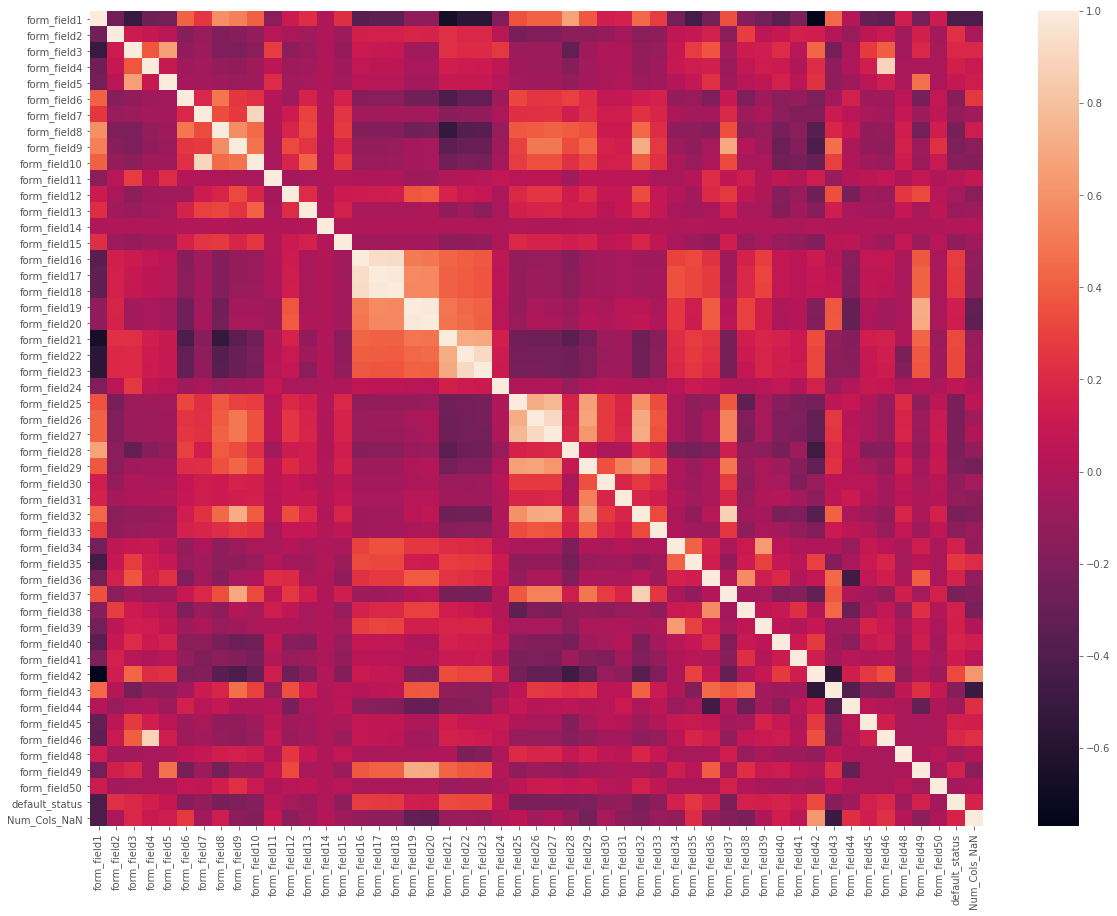

In [113]:
plt.subplots(figsize=(20, 15))
sns.heatmap(train.drop(['is_train'], axis=1).corr())

In [114]:
# generating columns 
all_data['def_on_ff1'] = np.NaN
for i in range(all_data.shape[0]):
    if all_data['form_field1'].iloc[i] <= 3200:
        all_data['def_on_ff1'].iloc[i] = 'most default'
    elif all_data['form_field1'].iloc[i] > 3200 and all_data['form_field1'].iloc[i] <= 3400:
        all_data['def_on_ff1'].iloc[i] = 'more default'
    else:
        all_data['def_on_ff1'].iloc[i] = 'less default'

In [115]:
all_data.loc[train['Num_Cols_NaN'] >= 15, 'def_on_null'] = 'likely default'
all_data.loc[train['Num_Cols_NaN'] < 15, 'def_on_null'] = 'unlikely default'

In [116]:
# Generating columns
all_data['form_field36_44'] = all_data['form_field36'].map(str) + all_data['form_field44'].map(str)
all_data['form_field1_23'] = all_data['form_field1'].map(str) + all_data['form_field23'].map(str)
#all_data['form_field1_22'] = all_data['form_field1'].map(str) + all_data['form_field22'].map(str)
all_data['form_field1_21'] = all_data['form_field1'].map(str) + all_data['form_field21'].map(str)
all_data['form_field1_35'] = all_data['form_field1'].map(str) + all_data['form_field35'].map(str)
#all_data['form_field1_42'] = all_data['form_field1'].map(str) + all_data['form_field42'].map(str) #####
all_data['form_field1_3'] = all_data['form_field1'].map(str) + all_data['form_field3'].map(str)
all_data['form_field21_8'] = all_data['form_field21'].map(str) + all_data['form_field8'].map(str)
#all_data['form_field42_43'] = all_data['form_field42'].map(str) + all_data['form_field43'].map(str)
all_data['form_field28_42'] = all_data['form_field28'].map(str) + all_data['form_field42'].map(str)
all_data['form_field44_49'] = all_data['form_field44'].map(str) + all_data['form_field49'].map(str)
#all_data['form_field9_42'] = all_data['form_field9'].map(str) + all_data['form_field42'].map(str)
all_data['form_field19_20'] = all_data['form_field19'].map(str) + all_data['form_field20'].map(str)
#all_data['form_field45_46'] = all_data['form_field45'].map(str) + all_data['form_field46'].map(str)
all_data['NaN_1'] = all_data['form_field1'].map(str) + all_data['Num_Cols_NaN'].map(str)
all_data['NaN_43'] = all_data['form_field43'].map(str) + all_data['Num_Cols_NaN'].map(str)

In [117]:
# Generating more columns
all_data['f42*f44'] = all_data['form_field42'] * all_data['form_field44']
#all_data['f19*f20'] = all_data['form_field19'] * all_data['form_field20']
all_data['f1/f2'] = all_data['form_field1'] / all_data['form_field2']
#all_data['f1/f3'] = all_data['form_field1'] / all_data['form_field3']
#all_data['f1/f22'] = all_data['form_field1'] / all_data['form_field22']
all_data['f1/f23'] = all_data['form_field1'] / all_data['form_field23']

In [118]:
# Replacing inf
all_data = all_data.replace([np.inf, -np.inf], -999)

In [119]:
all_data['NaN_1'] = all_data['NaN_1'].factorize()[0]
all_data['NaN_43'] = all_data['NaN_43'].factorize()[0]

In [120]:
### DROP ORIGINAL COLUMNS LATER *******

all_data['form_field32+33'] = all_data['form_field33'] + all_data['form_field32']
all_data['form_field6+8'] = all_data['form_field6'] + all_data['form_field8']
all_data['form_field17+18'] = all_data['form_field17'] + all_data['form_field18']
all_data['form_field19+20'] = all_data['form_field19'] + all_data['form_field20']
all_data['form_field4+46'] = all_data['form_field4'] + all_data['form_field46']
all_data['NaN1+43'] = all_data['NaN_1'] + all_data['NaN_43']

In [143]:
all_data.loc[all_data['form_field32+33'] > 2000, 'def_on_ten'] = 'more active'
all_data.loc[all_data['form_field32+33'] > 1000, 'def_on_ten'] = 'active'
all_data.loc[all_data['form_field32+33'] < 1000, 'def_on_ten'] = 'less active'

In [122]:
# all_data.loc[all_data['form_field13'] > 100, 'def_on_payment'] = 'pays more'
# all_data.loc[all_data['form_field13'] <= 100, 'def_on_payment'] = 'pays less'

In [123]:
# all_data['def_comp'] = np.NaN
# for i in range(all_data.shape[0]):
#     if all_data['def_on_ff1'].iloc[i] != 'less default' and all_data['def_on_ten'].iloc[i] == 'less active':
#         all_data['def_comp'].iloc[i] = 'very default prone'
#     elif all_data['def_on_ff1'].iloc[i] != 'less default' and all_data['def_on_payment'].iloc[i] == 'pays less':
#         all_data['def_comp'].iloc[i] = 'default prone'
#     else:
#         all_data['def_comp'].iloc[i] = 'not default prone'

In [145]:
all_data.loc[all_data['is_train']==1].head(3)

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0  Apcnt_1000000       3436.0      0.28505       1.6560          0.0   
1  Apcnt_1000004       3456.0      0.67400       0.2342          0.0   
2  Apcnt_1000008       3276.0      0.53845       3.1510          0.0   

   form_field5  form_field6  form_field7  form_field8  form_field9  \
0        0.000          0.0   10689720.0     252072.0    4272776.0   
1        0.000          0.0     898979.0     497531.0    9073814.0   
2        6.282          NaN     956940.0          NaN     192944.0   

   form_field10  form_field11  form_field12  form_field13  form_field14  \
0    11333126.0     4397256.0     2301324.0     7875694.0      96375139   
1     2533168.0      244292.0     3982971.0     2141445.0      28141427   
2     1079864.0           NaN           NaN           0.0      16576457   

   form_field15  form_field16  form_field17  form_field18  form_field19  \
0   112181765.0           1.0           1.0           1.0           3.0   
1    45169902.0           1.0           1.0           1.0           2.0   
2    22452691.0           NaN           NaN           NaN           0.0   

   form_field20  form_field21  form_field22  form_field23  form_field24  \
0           3.0       134.655           NaN           NaN       134.655   
1           2.0       109.230      11385.24      14584.29        86.685   
2           0.0           NaN           NaN           NaN           NaN   

   form_field25  form_field26  form_field27  form_field28  form_field29  \
0        4000.5       17064.0       11376.0          60.0       17064.0   
1        4161.0       13413.0        8942.0         304.0       13413.0   
2        1597.5        4746.0        3164.0          60.0       15696.0   

   form_field30  form_field31  form_field32  form_field33  form_field34  \
0        5962.0           NaN        1052.0        8.0000           2.0   
1        5780.0           NaN        2554.0       17.5000           0.0   
2           NaN       14508.0          70.0        0.6666           0.0   

   form_field35  form_field36  form_field37  form_field38  form_field39  \
0           NaN          12.0          12.0           4.0           0.0   
1           0.0          16.0          24.0           8.0           0.0   
2           NaN          12.0           0.0           6.0           0.0   

   form_field40  form_field41  form_field42  form_field43  form_field44  \
0           NaN           NaN      0.392854          2.02      0.711632   
1           NaN           NaN      0.314281          8.08      0.183584   
2      149.6805           NaN      0.162965         18.18      0.791136   

   form_field45  form_field46  form_field47  form_field48  form_field49  \
0           0.0           0.0             0           NaN      1.129518   
1           NaN           0.0             0     349.80573      1.620483   
2           0.0           0.0             0           NaN      1.513370   

   form_field50  default_status  Num_Cols_NaN  is_train  def_on_ff1  \
0      0.044335             0.0             7         1       55133   
1      0.322436             0.0             4         1       55133   
2      0.011640             1.0            15         1       19971   

   def_on_null  form_field36_44  form_field1_23  form_field1_21  \
0        63865                2             121               1   
1        63865                1               1               1   
2        16135                1             117              85   

   form_field1_35  form_field1_3  form_field21_8  form_field28_42  \
0             103              1               1               51   
1             269              2               1               23   
2              96              1           18316               12   

   form_field44_49  form_field19_20  NaN_1  NaN_43   f42*f44         f1/f2  \
0                1             3616      0       0  0.279567  12054.025610   
1                1             6661    

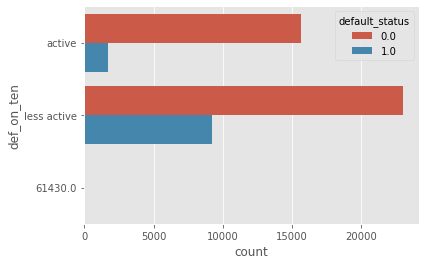

In [144]:
categorical_plot(all_data.loc[all_data['is_train']==1], 'default_status')

In [126]:
#Creating a column for rows with columns missing
all_data["New_Num_Cols_NaN"] = all_data.T.isnull().sum()

In [127]:
## GROUPBY Features
# Get numerical columnns
num_cols = [col for col in all_data.drop(['default_status', 'is_train'], axis=1)
            if all_data[col].dtype != 'object']

for col in num_cols:
    all_data[col + '_def_ff1_mean'] = all_data[col].groupby(all_data['def_on_ff1']).transform('mean')
    all_data[col + '_ff47_mean'] = all_data[col].groupby(all_data['form_field47']).transform('mean')
    all_data[col + '_def_on_ten_mean'] = all_data[col].groupby(all_data['def_on_ten']).transform('mean')
    
    all_data[col + '_def_ff1_sum'] = all_data[col].groupby(all_data['def_on_ff1']).transform('sum')
    all_data[col + '_ff47_sum'] = all_data[col].groupby(all_data['form_field47']).transform('sum')
    all_data[col + '_def_on_ten_sum'] = all_data[col].groupby(all_data['def_on_ten']).transform('sum')

In [128]:
all_data['f47_f1'] = all_data.groupby(by=["form_field47"])[['form_field1']].transform(lambda x: np.mean(x))

In [129]:
# Get the categorical cols
cat_cols = [col for col in all_data.drop(['Applicant_ID'], axis=1)
            if all_data[col].dtype == 'object']
cat_cols.remove('form_field47')
cols_generated = cat_cols

In [130]:
# Encoding the categorical cols
## One Hot encoding
#all_data = pd.concat( [all_data, pd.get_dummies(all_data['form_field47'], prefix='_')], axis=1 )
one_hot_cols = [cname for cname in all_data.columns
                if all_data[cname].nunique() < 10 and all_data[cname].dtype == 'object']
for i in range(len(one_hot_cols)):
    all_data = pd.concat( [all_data, pd.get_dummies(all_data[one_hot_cols[i]], prefix='_')], axis=1 )
#all_data = pd.concat( [all_data, pd.get_dummies(all_data['def_on_ff1'], prefix='_')], axis=1 )

## Label encoding
all_data['form_field47'] = all_data['form_field47'].factorize()[0]
for i in range(len(cols_generated)):
    new_col = cols_generated[i] + '_label'
    all_data[new_col] = all_data[cols_generated[i]].factorize()[0]

# Count encoding
for i in range(len(cols_generated)):
    all_data[cols_generated[i]] = all_data[cols_generated[i]].map(all_data[cols_generated[i]].value_counts())
    
all_data.shape

(80000, 472)

In [131]:
all_data.loc[all_data['is_train']==1].tail(10)

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
55990  Apcnt_999944       3600.0      0.50335       0.0000       0.0000   
55991  Apcnt_999948          NaN      0.22670       0.0000       0.0000   
55992  Apcnt_999952       3504.0      0.39085       0.0980       0.0000   
55993  Apcnt_999960       3556.0      0.69340       0.0736       0.0000   
55994  Apcnt_999964          NaN      0.01465       0.0000       0.0000   
55995  Apcnt_999968       3740.0      0.01730       0.0000       0.0000   
55996  Apcnt_999972       3360.0      2.01145       0.6252       0.0000   
55997  Apcnt_999980       3500.0      0.76640       0.0000       0.0000   
55998  Apcnt_999988       3280.0      0.05235       2.0916       2.2212   
55999  Apcnt_999996       3522.0      0.46930       0.0000       0.0000   

       form_field5  form_field6  form_field7  form_field8  form_field9  \
55990          0.0     755049.0   12006096.0    1927495.0   40139743.0   
55991          0.0          NaN          NaN          NaN          NaN   
55992          0.0       4279.0     500254.0      80912.0    2819472.0   
55993          0.0      96472.0    3469491.0    3469491.0   28291192.0   
55994          0.0          NaN          NaN          NaN          NaN   
55995          0.0     770998.0    9637475.0    4047934.0   11641992.0   
55996          0.0          NaN     927765.0          NaN          NaN   
55997          0.0     118645.0    3662435.0    3662435.0    3585024.0   
55998          0.0          NaN    3458599.0          NaN     115533.0   
55999          0.0      98806.0    2053920.0     523983.0   14903368.0   

       form_field10  form_field11  form_field12  form_field13  form_field14  \
55990    44192734.0           NaN    13006993.0     9823417.0      96375139   
55991           0.0     5994101.0           NaN           NaN       9637475   
55992     1004787.0           NaN     1173613.0      634070.0      48187375   
55993    21997172.0           NaN     2929170.0     1270085.0      21973443   
55994           0.0           NaN           NaN           NaN      34694910   
55995    19910965.0           NaN      983003.0    25985589.0      48187375   
55996     1849306.0      571052.0           NaN           0.0      16576457   
55997      704090.0           NaN     2765401.0     4226874.0      21973443   
55998     3458599.0      508812.0           NaN           0.0      38549900   
55999     5430440.0           NaN     8381783.0     5490346.0      21973443   

       form_field15  form_field16  form_field17  form_field18  form_field19  \
55990   196604490.0           0.0           0.0           0.0           2.0   
55991           NaN           NaN           NaN           NaN           0.0   
55992    80632309.0           0.0           1.0           1.0           4.0   
55993    39441488.0           0.0           0.0           0.0           1.0   
55994           NaN           NaN           NaN           NaN           0.0   
55995    86615907.0           0.0           0.0           0.0           0.0   
55996           NaN           NaN           NaN           0.0           0.0   
55997    87508273.0           0.0           0.0           0.0           2.0   
55998    20238892.0           NaN           NaN           NaN           0.0   
55999    38370960.0           0.0           0.0           0.0           3.0   

       form_field20  form_field21  form_field22  form_field23  form_field24  \
55990           3.0       109.965     11474.715       3853.41        88.815   
55991           0.0           NaN           NaN           NaN           NaN   
55992           4.0       132.255      9003.840           NaN        99.255   
55993           3.0        61.575      7531.800        318.75        28.830   
55994           0.0           NaN           NaN           NaN           NaN   
55995           0.0        31.740      1662.150          0.00        15.810   
55996           1.0           NaN     13350.000           NaN           N

In [132]:
check_null(all_data)

Shape: (80000, 472), Number of Columns with NaN: 182


form_field1                         0.045488
form_field2                         0.069413
form_field3                         0.006262
form_field4                         0.006262
form_field5                         0.006262
form_field6                         0.237050
form_field7                         0.092425
form_field8                         0.237050
form_field9                         0.142600
form_field10                        0.006275
form_field11                        0.560238
form_field12                        0.175975
form_field13                        0.104400
form_field15                        0.400838
form_field16                        0.231375
form_field17                        0.198075
form_field18                        0.184638
form_field19                        0.000050
form_field20                        0.006275
form_field21                        0.282012
form_field22                        0.364050
form_field23                        0.503100
form_field

In [133]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
mm = MinMaxScaler()
rs = RobustScaler()

In [134]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()

In [135]:
# fill_w = ['mean', 'median', 0, -999]
# for i in range(len(fill_w)):
#     target = train['default_status']
#     train_t = all_data.loc[all_data['is_train']==1].drop(['Applicant_ID', 'default_status',
#                                                           'form_field40', 'form_field41', 'form_field31', 'is_train'], axis=1)
#     print('filling null with: ', fill_w[i], '.......')
#     cols = train_t.columns
#     for j in range(len(cols)):
#         if fill_w[i] == 'mean':
#             train_t[cols[j]] = train_t[cols[j]].fillna(train_t[cols[j]].mean())
#         elif fill_w[i] == 'median':
#             train_t[cols[j]] = train_t[cols[j]].fillna(train_t[cols[j]].median())
#             #print('Done with median!')
#         else:
#             train_t[cols[j]] = train_t[cols[j]].fillna(fill_w[i])
#             #print('Done with others!')
#     get_score(train_t, target, gbc)

In [136]:
# Next, do pca, scaling, still do the meanshift stuff to find clusters,
#normalizing and use confusion matrix while combining those predictions

In [137]:
fill_w = [0, -999]
for i in range(len(fill_w)):
    target = train['default_status']
    train_t = all_data.loc[all_data['is_train']==1].drop(['Applicant_ID', 'default_status',
                                                          'form_field40', 'form_field41', 'form_field31', 'is_train'], axis=1)
    print('filling null with: ', fill_w[i], '.......')
    train_t = train_t.fillna(fill_w[i])
    cols = train_t.columns
    get_score(train_t, target, gbc)

filling null with:  0 .......
Train Score: 0.8506,    Test Score: 0.8301
filling null with:  -999 .......
Train Score: 0.8506,    Test Score: 0.8305


In [40]:
all_data = all_data.fillna(-999)

In [41]:
target = train['default_status']
train_data = all_data.loc[all_data['is_train']==1].drop(['Applicant_ID', 'default_status',
                                'form_field40', 'form_field41', 'form_field31', 'is_train'], axis=1)
test_data = all_data.loc[all_data['is_train']==0].drop(['Applicant_ID', 'default_status',
                                'form_field40', 'form_field41', 'form_field31', 'is_train'], axis=1)

In [42]:
# # Normalizing
# from scipy.stats import skew, norm


# # Get skew coeff
# skew_ = all_data[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
# high_skew = skew_[skew_ > 0.5]

# skew_features = pd.DataFrame({'Skewed': high_skew})
# display(skew_features.head(5))

# # Transforming the features with high skew
# for cname in skew_features.index:
#     all_data[cname] = np.log1p(all_data[cname])


# fill_w = ['mean', 'median', 0, -999]
# for i in range(len(fill_w)):
#     target = train['default_status']
#     train_t = all_data.loc[all_data['is_train']==1].drop(['Applicant_ID', 'default_status',
#                                                           'form_field40', 'form_field41', 'form_field31', 'is_train'], axis=1)
#     print('filling null with: ', fill_w[i], '.......')
#     cols = train_t.columns
#     for j in range(len(cols)):
#         if fill_w[i] == 'mean':
#             train_t[cols[j]] = train_t[cols[j]].fillna(train_t[cols[j]].mean())
#         elif fill_w[i] == 'median':
#             train_t[cols[j]] = train_t[cols[j]].fillna(train_t[cols[j]].median())
#             #print('Done with median!')
#         else:
#             train_t[cols[j]] = train_t[cols[j]].fillna(fill_w[i])
#     print('Done!')
#     print('Getting Score ......')
#     get_score(train_t, target, gbc)

In [43]:
from lightgbm import LGBMClassifier
# Performing a grid search on a portion of the data

#importing......
# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer
from time import time

from sklearn.metrics import make_scorer
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score
import pprint
import joblib


#### TUNING CATBOOST
# Reporting util for different optimizers
def report_perf(optimizer, X, y, title, callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start, 
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

roc_auc = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

clf = CatBoostClassifier(thread_count=2,
                         loss_function='Logloss',
                        
                         od_type = 'Iter',
                         verbose= False
                        )

search_spaces = {'iterations': Integer(10, 1000),
                 'depth': Integer(1, 8),
                 'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                 'random_strength': Real(1e-9, 10, 'log-uniform'),
                 'bagging_temperature': Real(0.0, 1.0),
                 'border_count': Integer(1, 255),
                 'l2_leaf_reg': Integer(2, 30),
                 'scale_pos_weight':Real(0.01, 1.0, 'uniform')}

# Setting up BayesSearchCV
opt = BayesSearchCV(clf,
                    search_spaces,
                    scoring=roc_auc,
                    cv=skf,
                    n_iter=100,
                    n_jobs=1,  # use just 1 job with CatBoost in order to avoid segmentation fault
                    return_train_score=False,
                    refit=True,
                    optimizer_kwargs={'base_estimator': 'GP'},
                    random_state=42)

best_params = report_perf(opt, train_data, target,'CatBoost', 
                          callbacks=[VerboseCallback(100), 
                                     DeadlineStopper(60*10)])

Iteration No: 1 started. Searching for the next optimal point.
Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 343.1333
Function value obtained: -0.8391
Current minimum: -0.8391
Iteration No: 2 started. Searching for the next optimal point.
CatBoost took 419.13 seconds,  candidates checked: 1, best CV score: 0.839 ± 0.003
Best parameters:
OrderedDict([('bagging_temperature', 0.41010395885331385),
             ('border_count', 186),
             ('depth', 8),
             ('iterations', 323),
             ('l2_leaf_reg', 21),
             ('learning_rate', 0.0673344419215237),
             ('random_strength', 3.230824361824754e-06),
             ('scale_pos_weight', 0.7421091918485163)])



In [45]:
#n_estimators is set to a "large value". 
import lightgbm as lgb
#The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)


# set up hyperparameter search
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
search_spaces ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

lgb_best_params = report_perf(opt, train_data, target,'LightGBM', 
                          callbacks=[VerboseCallback(100), 
                                     DeadlineStopper(60*10)])

Iteration No: 1 started. Searching for the next optimal point.
Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 396.6418
Function value obtained: -0.8391
Current minimum: -0.8391
Iteration No: 2 started. Searching for the next optimal point.
LightGBM took 485.96 seconds,  candidates checked: 1, best CV score: 0.839 ± 0.003
Best parameters:
OrderedDict([('bagging_temperature', 0.41010395885331385),
             ('border_count', 186),
             ('depth', 8),
             ('iterations', 323),
             ('l2_leaf_reg', 21),
             ('learning_rate', 0.0673344419215237),
             ('random_strength', 3.230824361824754e-06),
             ('scale_pos_weight', 0.7421091918485163)])



In [ ]:
# #### TUNING LIGHTGBM
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.20, random_state=314, stratify=target)
# #Preparing learning rate shrinkages
# def learning_rate_010_decay_power_099(current_iter):
#     base_learning_rate = 0.1
#     lr = base_learning_rate  * np.power(.99, current_iter)
#     return lr if lr > 1e-3 else 1e-3

# def learning_rate_010_decay_power_0995(current_iter):
#     base_learning_rate = 0.1
#     lr = base_learning_rate  * np.power(.995, current_iter)
#     return lr if lr > 1e-3 else 1e-3

# def learning_rate_005_decay_power_099(current_iter):
#     base_learning_rate = 0.05
#     lr = base_learning_rate  * np.power(.99, current_iter)
#     return lr if lr > 1e-3 else 1e-3

# # Use test subset for early stopping criterion
# import lightgbm as lgb
# fit_params={"early_stopping_rounds":30, 
#             "eval_metric" : 'auc', 
#             "eval_set" : [(X_test,y_test)],
#             'eval_names': ['valid'],
#             #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
#             'verbose': 100,
#             'categorical_feature': 'auto'}

# # set up hyperparameter search
# from scipy.stats import randint as sp_randint
# from scipy.stats import uniform as sp_uniform
# param_test ={'num_leaves': sp_randint(6, 50), 
#              'min_child_samples': sp_randint(100, 500), 
#              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#              'subsample': sp_uniform(loc=0.2, scale=0.8), 
#              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
#              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

# #This parameter defines the number of HP points to be tested
# n_HP_points_to_test = 100

# import lightgbm as lgb
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# #n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
# clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
# gs = RandomizedSearchCV(
#     estimator=clf, param_distributions=param_test, 
#     n_iter=n_HP_points_to_test,
#     scoring='roc_auc',
#     cv=3,
#     refit=True,
#     random_state=314,
#     verbose=True)

# #Optimisation
# gs.fit(X_train, y_train, **fit_params)
# print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

In [72]:
best_params['iterations'] = 1000
lgb_best_params['iterations'] = 1000

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target, stratify=target, random_state=42, test_size=.25)
K = test_data

bags = 15
seed = 0
bag_predictions_scaled = np.zeros((X_test.shape[0],2))
bag_test_scaled = np.zeros((K.shape[0], 2))

for i in range(bags):
    print(f"Iteration Number {i+1}")
    cat  = CatBoostClassifier(n_estimators=5000, eval_metric='AUC', learning_rate=0.1, use_best_model=True, random_state=seed + i*42)
    cat.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100, verbose=True)
    predictions = cat.predict_proba(X_test)[:,1]
    bag_predictions_scaled[:,0]+= predictions
    bag_test_scaled[:,0]+= cat.predict_proba(K)[:,1]
    print(f"AUC for Cat {round(roc_auc_score(y_test, cat.predict_proba(X_test)[:,1]), 6)}")
    
    reg  = LGBMClassifier(learning_rate=0.1, n_estimators=5000, n_jobs=-1, random_state=seed + i*42)
    reg.fit(X_train,y_train, eval_metric='AUC', eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100, verbose=False)
    
    predictions = reg.predict_proba(X_test)[:,1]
    bag_predictions_scaled[:,1]+= predictions
    bag_test_scaled[:,1]+= reg.predict_proba(K)[:,1]
    print(f"AUC for light {round(roc_auc_score(y_test, reg.predict_proba(X_test)[:,1]), 6)}")
    
    print()
    print()
bag_predictions_scaled/= bags
bag_test_scaled/= bags
print(roc_auc_score(y_test, bag_predictions_scaled[:,0]))
print(roc_auc_score(y_test, bag_predictions_scaled[:,1]))

Iteration Number 1
0:	test: 0.7910539	test1: 0.7911014	best: 0.7911014 (0)	total: 50.7ms	remaining: 4m 13s
1:	test: 0.8017809	test1: 0.8017677	best: 0.8017677 (1)	total: 87.3ms	remaining: 3m 38s
2:	test: 0.8109393	test1: 0.8099281	best: 0.8099281 (2)	total: 138ms	remaining: 3m 49s
3:	test: 0.8140984	test1: 0.8130248	best: 0.8130248 (3)	total: 191ms	remaining: 3m 58s
4:	test: 0.8142263	test1: 0.8129601	best: 0.8130248 (3)	total: 261ms	remaining: 4m 20s
5:	test: 0.8160572	test1: 0.8140309	best: 0.8140309 (5)	total: 331ms	remaining: 4m 35s
6:	test: 0.8166618	test1: 0.8144240	best: 0.8144240 (6)	total: 389ms	remaining: 4m 37s
7:	test: 0.8169868	test1: 0.8145887	best: 0.8145887 (7)	total: 443ms	remaining: 4m 36s
8:	test: 0.8165489	test1: 0.8139302	best: 0.8145887 (7)	total: 512ms	remaining: 4m 43s
9:	test: 0.8166743	test1: 0.8142662	best: 0.8145887 (7)	total: 573ms	remaining: 4m 45s
10:	test: 0.8170926	test1: 0.8145829	best: 0.8145887 (7)	total: 619ms	remaining: 4m 40s
11:	test: 0.8168582	t

93:	test: 0.8274645	test1: 0.8246173	best: 0.8246173 (93)	total: 4.72s	remaining: 4m 6s
94:	test: 0.8276205	test1: 0.8248276	best: 0.8248276 (94)	total: 4.76s	remaining: 4m 5s
95:	test: 0.8276549	test1: 0.8248534	best: 0.8248534 (95)	total: 4.81s	remaining: 4m 5s
96:	test: 0.8277389	test1: 0.8249450	best: 0.8249450 (96)	total: 4.85s	remaining: 4m 4s
97:	test: 0.8279066	test1: 0.8251367	best: 0.8251367 (97)	total: 4.88s	remaining: 4m 4s
98:	test: 0.8279610	test1: 0.8251892	best: 0.8251892 (98)	total: 4.92s	remaining: 4m 3s
99:	test: 0.8280210	test1: 0.8252235	best: 0.8252235 (99)	total: 4.98s	remaining: 4m 3s
100:	test: 0.8280405	test1: 0.8252530	best: 0.8252530 (100)	total: 5.02s	remaining: 4m 3s
101:	test: 0.8281372	test1: 0.8253552	best: 0.8253552 (101)	total: 5.05s	remaining: 4m 2s
102:	test: 0.8282746	test1: 0.8255503	best: 0.8255503 (102)	total: 5.09s	remaining: 4m 2s
103:	test: 0.8283148	test1: 0.8255962	best: 0.8255962 (103)	total: 5.13s	remaining: 4m 1s
104:	test: 0.8284059	tes

187:	test: 0.8330539	test1: 0.8299029	best: 0.8299029 (187)	total: 9.69s	remaining: 4m 7s
188:	test: 0.8330968	test1: 0.8299135	best: 0.8299135 (188)	total: 9.76s	remaining: 4m 8s
189:	test: 0.8331337	test1: 0.8299411	best: 0.8299411 (189)	total: 9.82s	remaining: 4m 8s
190:	test: 0.8331981	test1: 0.8299985	best: 0.8299985 (190)	total: 9.88s	remaining: 4m 8s
191:	test: 0.8332450	test1: 0.8300598	best: 0.8300598 (191)	total: 9.94s	remaining: 4m 8s
192:	test: 0.8332773	test1: 0.8300959	best: 0.8300959 (192)	total: 10s	remaining: 4m 8s
193:	test: 0.8333271	test1: 0.8301582	best: 0.8301582 (193)	total: 10.1s	remaining: 4m 9s
194:	test: 0.8333633	test1: 0.8301809	best: 0.8301809 (194)	total: 10.1s	remaining: 4m 9s
195:	test: 0.8334101	test1: 0.8302156	best: 0.8302156 (195)	total: 10.2s	remaining: 4m 9s
196:	test: 0.8334584	test1: 0.8302636	best: 0.8302636 (196)	total: 10.2s	remaining: 4m 9s
197:	test: 0.8334797	test1: 0.8302742	best: 0.8302742 (197)	total: 10.3s	remaining: 4m 9s
198:	test: 0

279:	test: 0.8365188	test1: 0.8328094	best: 0.8328094 (279)	total: 14.5s	remaining: 4m 4s
280:	test: 0.8365577	test1: 0.8328426	best: 0.8328426 (280)	total: 14.6s	remaining: 4m 4s
281:	test: 0.8365915	test1: 0.8328780	best: 0.8328780 (281)	total: 14.6s	remaining: 4m 4s
282:	test: 0.8366187	test1: 0.8329037	best: 0.8329037 (282)	total: 14.7s	remaining: 4m 4s
283:	test: 0.8366451	test1: 0.8329247	best: 0.8329247 (283)	total: 14.7s	remaining: 4m 4s
284:	test: 0.8366828	test1: 0.8329716	best: 0.8329716 (284)	total: 14.7s	remaining: 4m 3s
285:	test: 0.8367099	test1: 0.8329891	best: 0.8329891 (285)	total: 14.8s	remaining: 4m 3s
286:	test: 0.8367360	test1: 0.8330125	best: 0.8330125 (286)	total: 14.8s	remaining: 4m 3s
287:	test: 0.8367712	test1: 0.8330331	best: 0.8330331 (287)	total: 14.9s	remaining: 4m 3s
288:	test: 0.8368158	test1: 0.8330643	best: 0.8330643 (288)	total: 14.9s	remaining: 4m 3s
289:	test: 0.8368574	test1: 0.8330905	best: 0.8330905 (289)	total: 15s	remaining: 4m 3s
290:	test: 0

372:	test: 0.8393351	test1: 0.8347486	best: 0.8347486 (372)	total: 19s	remaining: 3m 56s
373:	test: 0.8393507	test1: 0.8347624	best: 0.8347624 (373)	total: 19.1s	remaining: 3m 55s
374:	test: 0.8393795	test1: 0.8347687	best: 0.8347687 (374)	total: 19.1s	remaining: 3m 55s
375:	test: 0.8394139	test1: 0.8347785	best: 0.8347785 (375)	total: 19.2s	remaining: 3m 55s
376:	test: 0.8394458	test1: 0.8348028	best: 0.8348028 (376)	total: 19.2s	remaining: 3m 55s
377:	test: 0.8394746	test1: 0.8348208	best: 0.8348208 (377)	total: 19.3s	remaining: 3m 55s
378:	test: 0.8395032	test1: 0.8348260	best: 0.8348260 (378)	total: 19.3s	remaining: 3m 55s
379:	test: 0.8395254	test1: 0.8348391	best: 0.8348391 (379)	total: 19.4s	remaining: 3m 55s
380:	test: 0.8395572	test1: 0.8348607	best: 0.8348607 (380)	total: 19.4s	remaining: 3m 55s
381:	test: 0.8395824	test1: 0.8348593	best: 0.8348607 (380)	total: 19.5s	remaining: 3m 55s
382:	test: 0.8396049	test1: 0.8348740	best: 0.8348740 (382)	total: 19.5s	remaining: 3m 55s
3

464:	test: 0.8415297	test1: 0.8359464	best: 0.8359464 (464)	total: 23.1s	remaining: 3m 45s
465:	test: 0.8415596	test1: 0.8359515	best: 0.8359515 (465)	total: 23.1s	remaining: 3m 45s
466:	test: 0.8416011	test1: 0.8359808	best: 0.8359808 (466)	total: 23.2s	remaining: 3m 45s
467:	test: 0.8416176	test1: 0.8359934	best: 0.8359934 (467)	total: 23.3s	remaining: 3m 45s
468:	test: 0.8416571	test1: 0.8360174	best: 0.8360174 (468)	total: 23.3s	remaining: 3m 45s
469:	test: 0.8416739	test1: 0.8360270	best: 0.8360270 (469)	total: 23.4s	remaining: 3m 45s
470:	test: 0.8417065	test1: 0.8360579	best: 0.8360579 (470)	total: 23.4s	remaining: 3m 45s
471:	test: 0.8417261	test1: 0.8360712	best: 0.8360712 (471)	total: 23.5s	remaining: 3m 45s
472:	test: 0.8417519	test1: 0.8360915	best: 0.8360915 (472)	total: 23.5s	remaining: 3m 45s
473:	test: 0.8417852	test1: 0.8361192	best: 0.8361192 (473)	total: 23.6s	remaining: 3m 45s
474:	test: 0.8418100	test1: 0.8361414	best: 0.8361414 (474)	total: 23.6s	remaining: 3m 44s

555:	test: 0.8437511	test1: 0.8370228	best: 0.8370228 (555)	total: 27.8s	remaining: 3m 42s
556:	test: 0.8437616	test1: 0.8370257	best: 0.8370257 (556)	total: 27.9s	remaining: 3m 42s
557:	test: 0.8437738	test1: 0.8370304	best: 0.8370304 (557)	total: 27.9s	remaining: 3m 42s
558:	test: 0.8437840	test1: 0.8370386	best: 0.8370386 (558)	total: 28s	remaining: 3m 42s
559:	test: 0.8438065	test1: 0.8370474	best: 0.8370474 (559)	total: 28s	remaining: 3m 42s
560:	test: 0.8438413	test1: 0.8370709	best: 0.8370709 (560)	total: 28.1s	remaining: 3m 42s
561:	test: 0.8438579	test1: 0.8370803	best: 0.8370803 (561)	total: 28.1s	remaining: 3m 42s
562:	test: 0.8438837	test1: 0.8370804	best: 0.8370804 (562)	total: 28.2s	remaining: 3m 42s
563:	test: 0.8439052	test1: 0.8370932	best: 0.8370932 (563)	total: 28.2s	remaining: 3m 41s
564:	test: 0.8439305	test1: 0.8371072	best: 0.8371072 (564)	total: 28.3s	remaining: 3m 41s
565:	test: 0.8439645	test1: 0.8371225	best: 0.8371225 (565)	total: 28.3s	remaining: 3m 41s
566

647:	test: 0.8457611	test1: 0.8380317	best: 0.8380317 (647)	total: 32.2s	remaining: 3m 36s
648:	test: 0.8457860	test1: 0.8380410	best: 0.8380410 (648)	total: 32.3s	remaining: 3m 36s
649:	test: 0.8458155	test1: 0.8380549	best: 0.8380549 (649)	total: 32.3s	remaining: 3m 36s
650:	test: 0.8458321	test1: 0.8380656	best: 0.8380656 (650)	total: 32.4s	remaining: 3m 36s
651:	test: 0.8458540	test1: 0.8380763	best: 0.8380763 (651)	total: 32.4s	remaining: 3m 36s
652:	test: 0.8458757	test1: 0.8380832	best: 0.8380832 (652)	total: 32.5s	remaining: 3m 36s
653:	test: 0.8458866	test1: 0.8380857	best: 0.8380857 (653)	total: 32.5s	remaining: 3m 36s
654:	test: 0.8459019	test1: 0.8380872	best: 0.8380872 (654)	total: 32.6s	remaining: 3m 36s
655:	test: 0.8459348	test1: 0.8380935	best: 0.8380935 (655)	total: 32.6s	remaining: 3m 36s
656:	test: 0.8459446	test1: 0.8380921	best: 0.8380935 (655)	total: 32.7s	remaining: 3m 36s
657:	test: 0.8459589	test1: 0.8381047	best: 0.8381047 (657)	total: 32.7s	remaining: 3m 35s

739:	test: 0.8475301	test1: 0.8387409	best: 0.8387415 (738)	total: 36.5s	remaining: 3m 30s
740:	test: 0.8475519	test1: 0.8387536	best: 0.8387536 (740)	total: 36.6s	remaining: 3m 30s
741:	test: 0.8475767	test1: 0.8387646	best: 0.8387646 (741)	total: 36.6s	remaining: 3m 30s
742:	test: 0.8475970	test1: 0.8387692	best: 0.8387692 (742)	total: 36.7s	remaining: 3m 30s
743:	test: 0.8476102	test1: 0.8387764	best: 0.8387764 (743)	total: 36.7s	remaining: 3m 29s
744:	test: 0.8476292	test1: 0.8387781	best: 0.8387781 (744)	total: 36.7s	remaining: 3m 29s
745:	test: 0.8476493	test1: 0.8387831	best: 0.8387831 (745)	total: 36.8s	remaining: 3m 29s
746:	test: 0.8476767	test1: 0.8388064	best: 0.8388064 (746)	total: 36.8s	remaining: 3m 29s
747:	test: 0.8476946	test1: 0.8388129	best: 0.8388129 (747)	total: 36.9s	remaining: 3m 29s
748:	test: 0.8477122	test1: 0.8388154	best: 0.8388154 (748)	total: 36.9s	remaining: 3m 29s
749:	test: 0.8477193	test1: 0.8388172	best: 0.8388172 (749)	total: 37s	remaining: 3m 29s
7

830:	test: 0.8492829	test1: 0.8394021	best: 0.8394065 (828)	total: 41.5s	remaining: 3m 28s
831:	test: 0.8493078	test1: 0.8394161	best: 0.8394161 (831)	total: 41.6s	remaining: 3m 28s
832:	test: 0.8493212	test1: 0.8394214	best: 0.8394214 (832)	total: 41.6s	remaining: 3m 28s
833:	test: 0.8493398	test1: 0.8394370	best: 0.8394370 (833)	total: 41.7s	remaining: 3m 28s
834:	test: 0.8493710	test1: 0.8394475	best: 0.8394475 (834)	total: 41.7s	remaining: 3m 28s
835:	test: 0.8493864	test1: 0.8394546	best: 0.8394546 (835)	total: 41.8s	remaining: 3m 28s
836:	test: 0.8494078	test1: 0.8394598	best: 0.8394598 (836)	total: 41.8s	remaining: 3m 28s
837:	test: 0.8494215	test1: 0.8394669	best: 0.8394669 (837)	total: 41.9s	remaining: 3m 28s
838:	test: 0.8494417	test1: 0.8394665	best: 0.8394669 (837)	total: 41.9s	remaining: 3m 28s
839:	test: 0.8494498	test1: 0.8394720	best: 0.8394720 (839)	total: 42s	remaining: 3m 28s
840:	test: 0.8494591	test1: 0.8394728	best: 0.8394728 (840)	total: 42.1s	remaining: 3m 27s
8

922:	test: 0.8509434	test1: 0.8399064	best: 0.8399064 (922)	total: 46.4s	remaining: 3m 24s
923:	test: 0.8509656	test1: 0.8399178	best: 0.8399178 (923)	total: 46.4s	remaining: 3m 24s
924:	test: 0.8509734	test1: 0.8399145	best: 0.8399178 (923)	total: 46.5s	remaining: 3m 24s
925:	test: 0.8509932	test1: 0.8399212	best: 0.8399212 (925)	total: 46.5s	remaining: 3m 24s
926:	test: 0.8510078	test1: 0.8399273	best: 0.8399273 (926)	total: 46.6s	remaining: 3m 24s
927:	test: 0.8510297	test1: 0.8399391	best: 0.8399391 (927)	total: 46.6s	remaining: 3m 24s
928:	test: 0.8510498	test1: 0.8399502	best: 0.8399502 (928)	total: 46.7s	remaining: 3m 24s
929:	test: 0.8510692	test1: 0.8399521	best: 0.8399521 (929)	total: 46.8s	remaining: 3m 24s
930:	test: 0.8510819	test1: 0.8399553	best: 0.8399553 (930)	total: 46.8s	remaining: 3m 24s
931:	test: 0.8511033	test1: 0.8399581	best: 0.8399581 (931)	total: 46.8s	remaining: 3m 24s
932:	test: 0.8511151	test1: 0.8399571	best: 0.8399581 (931)	total: 46.9s	remaining: 3m 24s

1013:	test: 0.8525518	test1: 0.8403932	best: 0.8403932 (1013)	total: 50.7s	remaining: 3m 19s
1014:	test: 0.8525716	test1: 0.8403902	best: 0.8403932 (1013)	total: 50.8s	remaining: 3m 19s
1015:	test: 0.8525935	test1: 0.8404047	best: 0.8404047 (1015)	total: 50.8s	remaining: 3m 19s
1016:	test: 0.8526165	test1: 0.8404140	best: 0.8404140 (1016)	total: 50.9s	remaining: 3m 19s
1017:	test: 0.8526401	test1: 0.8404159	best: 0.8404159 (1017)	total: 50.9s	remaining: 3m 19s
1018:	test: 0.8526704	test1: 0.8404243	best: 0.8404243 (1018)	total: 51s	remaining: 3m 19s
1019:	test: 0.8526802	test1: 0.8404280	best: 0.8404280 (1019)	total: 51s	remaining: 3m 19s
1020:	test: 0.8526850	test1: 0.8404260	best: 0.8404280 (1019)	total: 51.1s	remaining: 3m 18s
1021:	test: 0.8527103	test1: 0.8404259	best: 0.8404280 (1019)	total: 51.1s	remaining: 3m 18s
1022:	test: 0.8527275	test1: 0.8404345	best: 0.8404345 (1022)	total: 51.2s	remaining: 3m 18s
1023:	test: 0.8527442	test1: 0.8404361	best: 0.8404361 (1023)	total: 51.2s

1102:	test: 0.8542842	test1: 0.8408327	best: 0.8408327 (1102)	total: 55.4s	remaining: 3m 15s
1103:	test: 0.8543151	test1: 0.8408424	best: 0.8408424 (1103)	total: 55.4s	remaining: 3m 15s
1104:	test: 0.8543356	test1: 0.8408424	best: 0.8408424 (1104)	total: 55.5s	remaining: 3m 15s
1105:	test: 0.8543453	test1: 0.8408470	best: 0.8408470 (1105)	total: 55.5s	remaining: 3m 15s
1106:	test: 0.8543662	test1: 0.8408534	best: 0.8408534 (1106)	total: 55.6s	remaining: 3m 15s
1107:	test: 0.8543852	test1: 0.8408576	best: 0.8408576 (1107)	total: 55.7s	remaining: 3m 15s
1108:	test: 0.8544150	test1: 0.8408636	best: 0.8408636 (1108)	total: 55.7s	remaining: 3m 15s
1109:	test: 0.8544330	test1: 0.8408721	best: 0.8408721 (1109)	total: 55.8s	remaining: 3m 15s
1110:	test: 0.8544429	test1: 0.8408770	best: 0.8408770 (1110)	total: 55.9s	remaining: 3m 15s
1111:	test: 0.8544665	test1: 0.8408710	best: 0.8408770 (1110)	total: 55.9s	remaining: 3m 15s
1112:	test: 0.8544811	test1: 0.8408765	best: 0.8408770 (1110)	total: 5

1193:	test: 0.8560605	test1: 0.8412401	best: 0.8412401 (1193)	total: 1m	remaining: 3m 13s
1194:	test: 0.8560929	test1: 0.8412508	best: 0.8412508 (1194)	total: 1m	remaining: 3m 13s
1195:	test: 0.8561109	test1: 0.8412527	best: 0.8412527 (1195)	total: 1m	remaining: 3m 13s
1196:	test: 0.8561304	test1: 0.8412638	best: 0.8412638 (1196)	total: 1m	remaining: 3m 13s
1197:	test: 0.8561496	test1: 0.8412716	best: 0.8412716 (1197)	total: 1m	remaining: 3m 13s
1198:	test: 0.8561753	test1: 0.8412859	best: 0.8412859 (1198)	total: 1m 1s	remaining: 3m 13s
1199:	test: 0.8562007	test1: 0.8412853	best: 0.8412859 (1198)	total: 1m 1s	remaining: 3m 13s
1200:	test: 0.8562160	test1: 0.8412928	best: 0.8412928 (1200)	total: 1m 1s	remaining: 3m 13s
1201:	test: 0.8562349	test1: 0.8412973	best: 0.8412973 (1201)	total: 1m 1s	remaining: 3m 13s
1202:	test: 0.8562626	test1: 0.8412986	best: 0.8412986 (1202)	total: 1m 1s	remaining: 3m 13s
1203:	test: 0.8562821	test1: 0.8413146	best: 0.8413146 (1203)	total: 1m 1s	remaining:

1284:	test: 0.8579422	test1: 0.8415737	best: 0.8415771 (1277)	total: 1m 5s	remaining: 3m 9s
1285:	test: 0.8579695	test1: 0.8415717	best: 0.8415771 (1277)	total: 1m 5s	remaining: 3m 9s
1286:	test: 0.8579887	test1: 0.8415714	best: 0.8415771 (1277)	total: 1m 5s	remaining: 3m 9s
1287:	test: 0.8580033	test1: 0.8415803	best: 0.8415803 (1287)	total: 1m 5s	remaining: 3m 9s
1288:	test: 0.8580150	test1: 0.8415813	best: 0.8415813 (1288)	total: 1m 5s	remaining: 3m 9s
1289:	test: 0.8580441	test1: 0.8415827	best: 0.8415827 (1289)	total: 1m 5s	remaining: 3m 9s
1290:	test: 0.8580624	test1: 0.8415835	best: 0.8415835 (1290)	total: 1m 5s	remaining: 3m 9s
1291:	test: 0.8580715	test1: 0.8415937	best: 0.8415937 (1291)	total: 1m 5s	remaining: 3m 8s
1292:	test: 0.8580969	test1: 0.8416078	best: 0.8416078 (1292)	total: 1m 5s	remaining: 3m 8s
1293:	test: 0.8581133	test1: 0.8416165	best: 0.8416165 (1293)	total: 1m 5s	remaining: 3m 8s
1294:	test: 0.8581397	test1: 0.8416135	best: 0.8416165 (1293)	total: 1m 5s	remai

1374:	test: 0.8597201	test1: 0.8419020	best: 0.8419020 (1374)	total: 1m 10s	remaining: 3m 4s
1375:	test: 0.8597378	test1: 0.8419045	best: 0.8419045 (1375)	total: 1m 10s	remaining: 3m 4s
1376:	test: 0.8597637	test1: 0.8419038	best: 0.8419045 (1375)	total: 1m 10s	remaining: 3m 4s
1377:	test: 0.8597808	test1: 0.8419070	best: 0.8419070 (1377)	total: 1m 10s	remaining: 3m 4s
1378:	test: 0.8597976	test1: 0.8419136	best: 0.8419136 (1378)	total: 1m 10s	remaining: 3m 4s
1379:	test: 0.8598179	test1: 0.8419236	best: 0.8419236 (1379)	total: 1m 10s	remaining: 3m 4s
1380:	test: 0.8598328	test1: 0.8419270	best: 0.8419270 (1380)	total: 1m 10s	remaining: 3m 4s
1381:	test: 0.8598443	test1: 0.8419285	best: 0.8419285 (1381)	total: 1m 10s	remaining: 3m 4s
1382:	test: 0.8598698	test1: 0.8419377	best: 0.8419377 (1382)	total: 1m 10s	remaining: 3m 4s
1383:	test: 0.8598899	test1: 0.8419386	best: 0.8419386 (1383)	total: 1m 10s	remaining: 3m 4s
1384:	test: 0.8598992	test1: 0.8419428	best: 0.8419428 (1384)	total: 1

1464:	test: 0.8613626	test1: 0.8421385	best: 0.8421386 (1463)	total: 1m 14s	remaining: 2m 59s
1465:	test: 0.8613908	test1: 0.8421506	best: 0.8421506 (1465)	total: 1m 14s	remaining: 2m 59s
1466:	test: 0.8614119	test1: 0.8421532	best: 0.8421532 (1466)	total: 1m 14s	remaining: 2m 59s
1467:	test: 0.8614291	test1: 0.8421575	best: 0.8421575 (1467)	total: 1m 14s	remaining: 2m 59s
1468:	test: 0.8614501	test1: 0.8421605	best: 0.8421605 (1468)	total: 1m 14s	remaining: 2m 59s
1469:	test: 0.8614654	test1: 0.8421616	best: 0.8421616 (1469)	total: 1m 14s	remaining: 2m 58s
1470:	test: 0.8614793	test1: 0.8421638	best: 0.8421638 (1470)	total: 1m 14s	remaining: 2m 58s
1471:	test: 0.8614959	test1: 0.8421612	best: 0.8421638 (1470)	total: 1m 14s	remaining: 2m 58s
1472:	test: 0.8615117	test1: 0.8421631	best: 0.8421638 (1470)	total: 1m 14s	remaining: 2m 58s
1473:	test: 0.8615423	test1: 0.8421696	best: 0.8421696 (1473)	total: 1m 14s	remaining: 2m 58s
1474:	test: 0.8615688	test1: 0.8421732	best: 0.8421732 (1474

1555:	test: 0.8631314	test1: 0.8423990	best: 0.8424026 (1554)	total: 1m 18s	remaining: 2m 53s
1556:	test: 0.8631554	test1: 0.8424074	best: 0.8424074 (1556)	total: 1m 18s	remaining: 2m 53s
1557:	test: 0.8631767	test1: 0.8424077	best: 0.8424077 (1557)	total: 1m 18s	remaining: 2m 53s
1558:	test: 0.8631956	test1: 0.8424163	best: 0.8424163 (1558)	total: 1m 18s	remaining: 2m 53s
1559:	test: 0.8632234	test1: 0.8424190	best: 0.8424190 (1559)	total: 1m 18s	remaining: 2m 53s
1560:	test: 0.8632465	test1: 0.8424215	best: 0.8424215 (1560)	total: 1m 18s	remaining: 2m 53s
1561:	test: 0.8632619	test1: 0.8424262	best: 0.8424262 (1561)	total: 1m 18s	remaining: 2m 53s
1562:	test: 0.8632787	test1: 0.8424366	best: 0.8424366 (1562)	total: 1m 18s	remaining: 2m 53s
1563:	test: 0.8632901	test1: 0.8424369	best: 0.8424369 (1563)	total: 1m 18s	remaining: 2m 52s
1564:	test: 0.8633043	test1: 0.8424336	best: 0.8424369 (1563)	total: 1m 18s	remaining: 2m 52s
1565:	test: 0.8633295	test1: 0.8424387	best: 0.8424387 (1565

1644:	test: 0.8647228	test1: 0.8425545	best: 0.8425610 (1636)	total: 1m 22s	remaining: 2m 48s
1645:	test: 0.8647434	test1: 0.8425596	best: 0.8425610 (1636)	total: 1m 22s	remaining: 2m 48s
1646:	test: 0.8647513	test1: 0.8425624	best: 0.8425624 (1646)	total: 1m 22s	remaining: 2m 48s
1647:	test: 0.8647697	test1: 0.8425612	best: 0.8425624 (1646)	total: 1m 22s	remaining: 2m 48s
1648:	test: 0.8647766	test1: 0.8425592	best: 0.8425624 (1646)	total: 1m 22s	remaining: 2m 48s
1649:	test: 0.8648011	test1: 0.8425576	best: 0.8425624 (1646)	total: 1m 22s	remaining: 2m 47s
1650:	test: 0.8648220	test1: 0.8425599	best: 0.8425624 (1646)	total: 1m 22s	remaining: 2m 47s
1651:	test: 0.8648408	test1: 0.8425621	best: 0.8425624 (1646)	total: 1m 22s	remaining: 2m 47s
1652:	test: 0.8648467	test1: 0.8425677	best: 0.8425677 (1652)	total: 1m 22s	remaining: 2m 47s
1653:	test: 0.8648642	test1: 0.8425637	best: 0.8425677 (1652)	total: 1m 22s	remaining: 2m 47s
1654:	test: 0.8648835	test1: 0.8425724	best: 0.8425724 (1654

1734:	test: 0.8661936	test1: 0.8426465	best: 0.8426495 (1729)	total: 1m 26s	remaining: 2m 43s
1735:	test: 0.8662133	test1: 0.8426458	best: 0.8426495 (1729)	total: 1m 27s	remaining: 2m 43s
1736:	test: 0.8662261	test1: 0.8426477	best: 0.8426495 (1729)	total: 1m 27s	remaining: 2m 43s
1737:	test: 0.8662542	test1: 0.8426461	best: 0.8426495 (1729)	total: 1m 27s	remaining: 2m 43s
1738:	test: 0.8662778	test1: 0.8426526	best: 0.8426526 (1738)	total: 1m 27s	remaining: 2m 43s
1739:	test: 0.8662984	test1: 0.8426549	best: 0.8426549 (1739)	total: 1m 27s	remaining: 2m 43s
1740:	test: 0.8663198	test1: 0.8426509	best: 0.8426549 (1739)	total: 1m 27s	remaining: 2m 43s
1741:	test: 0.8663384	test1: 0.8426547	best: 0.8426549 (1739)	total: 1m 27s	remaining: 2m 43s
1742:	test: 0.8663561	test1: 0.8426617	best: 0.8426617 (1742)	total: 1m 27s	remaining: 2m 43s
1743:	test: 0.8663811	test1: 0.8426619	best: 0.8426619 (1743)	total: 1m 27s	remaining: 2m 43s
1744:	test: 0.8664034	test1: 0.8426620	best: 0.8426620 (1744

1823:	test: 0.8678065	test1: 0.8428213	best: 0.8428219 (1822)	total: 1m 31s	remaining: 2m 39s
1824:	test: 0.8678314	test1: 0.8428203	best: 0.8428219 (1822)	total: 1m 31s	remaining: 2m 39s
1825:	test: 0.8678527	test1: 0.8428225	best: 0.8428225 (1825)	total: 1m 31s	remaining: 2m 39s
1826:	test: 0.8678705	test1: 0.8428250	best: 0.8428250 (1826)	total: 1m 31s	remaining: 2m 39s
1827:	test: 0.8678889	test1: 0.8428240	best: 0.8428250 (1826)	total: 1m 31s	remaining: 2m 39s
1828:	test: 0.8679028	test1: 0.8428265	best: 0.8428265 (1828)	total: 1m 31s	remaining: 2m 39s
1829:	test: 0.8679276	test1: 0.8428339	best: 0.8428339 (1829)	total: 1m 31s	remaining: 2m 39s
1830:	test: 0.8679401	test1: 0.8428368	best: 0.8428368 (1830)	total: 1m 31s	remaining: 2m 39s
1831:	test: 0.8679625	test1: 0.8428343	best: 0.8428368 (1830)	total: 1m 31s	remaining: 2m 39s
1832:	test: 0.8679876	test1: 0.8428316	best: 0.8428368 (1830)	total: 1m 32s	remaining: 2m 39s
1833:	test: 0.8680054	test1: 0.8428306	best: 0.8428368 (1830

1914:	test: 0.8693711	test1: 0.8429273	best: 0.8429361 (1910)	total: 1m 35s	remaining: 2m 34s
1915:	test: 0.8693960	test1: 0.8429259	best: 0.8429361 (1910)	total: 1m 35s	remaining: 2m 34s
1916:	test: 0.8694158	test1: 0.8429197	best: 0.8429361 (1910)	total: 1m 35s	remaining: 2m 34s
1917:	test: 0.8694321	test1: 0.8429215	best: 0.8429361 (1910)	total: 1m 35s	remaining: 2m 34s
1918:	test: 0.8694482	test1: 0.8429202	best: 0.8429361 (1910)	total: 1m 35s	remaining: 2m 34s
1919:	test: 0.8694689	test1: 0.8429183	best: 0.8429361 (1910)	total: 1m 36s	remaining: 2m 34s
1920:	test: 0.8694796	test1: 0.8429165	best: 0.8429361 (1910)	total: 1m 36s	remaining: 2m 33s
1921:	test: 0.8694951	test1: 0.8429172	best: 0.8429361 (1910)	total: 1m 36s	remaining: 2m 33s
1922:	test: 0.8695105	test1: 0.8429172	best: 0.8429361 (1910)	total: 1m 36s	remaining: 2m 33s
1923:	test: 0.8695269	test1: 0.8429153	best: 0.8429361 (1910)	total: 1m 36s	remaining: 2m 33s
1924:	test: 0.8695360	test1: 0.8429109	best: 0.8429361 (1910

2003:	test: 0.8709073	test1: 0.8430599	best: 0.8430628 (2001)	total: 1m 40s	remaining: 2m 29s
2004:	test: 0.8709330	test1: 0.8430627	best: 0.8430628 (2001)	total: 1m 40s	remaining: 2m 29s
2005:	test: 0.8709459	test1: 0.8430671	best: 0.8430671 (2005)	total: 1m 40s	remaining: 2m 29s
2006:	test: 0.8709711	test1: 0.8430584	best: 0.8430671 (2005)	total: 1m 40s	remaining: 2m 29s
2007:	test: 0.8709881	test1: 0.8430541	best: 0.8430671 (2005)	total: 1m 40s	remaining: 2m 29s
2008:	test: 0.8709982	test1: 0.8430510	best: 0.8430671 (2005)	total: 1m 40s	remaining: 2m 29s
2009:	test: 0.8710133	test1: 0.8430535	best: 0.8430671 (2005)	total: 1m 40s	remaining: 2m 29s
2010:	test: 0.8710261	test1: 0.8430581	best: 0.8430671 (2005)	total: 1m 40s	remaining: 2m 29s
2011:	test: 0.8710437	test1: 0.8430539	best: 0.8430671 (2005)	total: 1m 40s	remaining: 2m 29s
2012:	test: 0.8710671	test1: 0.8430571	best: 0.8430671 (2005)	total: 1m 40s	remaining: 2m 29s
2013:	test: 0.8710808	test1: 0.8430558	best: 0.8430671 (2005

2095:	test: 0.8724512	test1: 0.8430797	best: 0.8431023 (2039)	total: 1m 44s	remaining: 2m 25s
2096:	test: 0.8724632	test1: 0.8430824	best: 0.8431023 (2039)	total: 1m 44s	remaining: 2m 25s
2097:	test: 0.8724810	test1: 0.8430841	best: 0.8431023 (2039)	total: 1m 44s	remaining: 2m 25s
2098:	test: 0.8724954	test1: 0.8430837	best: 0.8431023 (2039)	total: 1m 44s	remaining: 2m 25s
2099:	test: 0.8725164	test1: 0.8430889	best: 0.8431023 (2039)	total: 1m 45s	remaining: 2m 25s
2100:	test: 0.8725279	test1: 0.8430828	best: 0.8431023 (2039)	total: 1m 45s	remaining: 2m 24s
2101:	test: 0.8725433	test1: 0.8430803	best: 0.8431023 (2039)	total: 1m 45s	remaining: 2m 24s
2102:	test: 0.8725696	test1: 0.8430881	best: 0.8431023 (2039)	total: 1m 45s	remaining: 2m 24s
2103:	test: 0.8725845	test1: 0.8430845	best: 0.8431023 (2039)	total: 1m 45s	remaining: 2m 24s
2104:	test: 0.8726012	test1: 0.8430896	best: 0.8431023 (2039)	total: 1m 45s	remaining: 2m 24s
2105:	test: 0.8726221	test1: 0.8430906	best: 0.8431023 (2039

2185:	test: 0.8739024	test1: 0.8431381	best: 0.8431517 (2174)	total: 1m 48s	remaining: 2m 20s
2186:	test: 0.8739201	test1: 0.8431445	best: 0.8431517 (2174)	total: 1m 48s	remaining: 2m 20s
2187:	test: 0.8739286	test1: 0.8431471	best: 0.8431517 (2174)	total: 1m 49s	remaining: 2m 20s
2188:	test: 0.8739450	test1: 0.8431455	best: 0.8431517 (2174)	total: 1m 49s	remaining: 2m 20s
2189:	test: 0.8739639	test1: 0.8431499	best: 0.8431517 (2174)	total: 1m 49s	remaining: 2m 20s
2190:	test: 0.8739801	test1: 0.8431515	best: 0.8431517 (2174)	total: 1m 49s	remaining: 2m 20s
2191:	test: 0.8739925	test1: 0.8431516	best: 0.8431517 (2174)	total: 1m 49s	remaining: 2m 19s
2192:	test: 0.8740078	test1: 0.8431524	best: 0.8431524 (2192)	total: 1m 49s	remaining: 2m 19s
2193:	test: 0.8740220	test1: 0.8431464	best: 0.8431524 (2192)	total: 1m 49s	remaining: 2m 19s
2194:	test: 0.8740362	test1: 0.8431469	best: 0.8431524 (2192)	total: 1m 49s	remaining: 2m 19s
2195:	test: 0.8740503	test1: 0.8431442	best: 0.8431524 (2192

2274:	test: 0.8753355	test1: 0.8431904	best: 0.8431958 (2271)	total: 1m 53s	remaining: 2m 15s
2275:	test: 0.8753440	test1: 0.8431808	best: 0.8431958 (2271)	total: 1m 53s	remaining: 2m 15s
2276:	test: 0.8753576	test1: 0.8431829	best: 0.8431958 (2271)	total: 1m 53s	remaining: 2m 15s
2277:	test: 0.8753681	test1: 0.8431850	best: 0.8431958 (2271)	total: 1m 53s	remaining: 2m 15s
2278:	test: 0.8753806	test1: 0.8431852	best: 0.8431958 (2271)	total: 1m 53s	remaining: 2m 15s
2279:	test: 0.8754057	test1: 0.8431841	best: 0.8431958 (2271)	total: 1m 53s	remaining: 2m 15s
2280:	test: 0.8754212	test1: 0.8431803	best: 0.8431958 (2271)	total: 1m 53s	remaining: 2m 15s
2281:	test: 0.8754384	test1: 0.8431796	best: 0.8431958 (2271)	total: 1m 53s	remaining: 2m 15s
2282:	test: 0.8754560	test1: 0.8431786	best: 0.8431958 (2271)	total: 1m 53s	remaining: 2m 15s
2283:	test: 0.8754697	test1: 0.8431756	best: 0.8431958 (2271)	total: 1m 53s	remaining: 2m 15s
2284:	test: 0.8754962	test1: 0.8431814	best: 0.8431958 (2271

2364:	test: 0.8767131	test1: 0.8431598	best: 0.8431958 (2271)	total: 1m 57s	remaining: 2m 10s
2365:	test: 0.8767313	test1: 0.8431695	best: 0.8431958 (2271)	total: 1m 57s	remaining: 2m 10s
2366:	test: 0.8767496	test1: 0.8431711	best: 0.8431958 (2271)	total: 1m 57s	remaining: 2m 10s
2367:	test: 0.8767610	test1: 0.8431677	best: 0.8431958 (2271)	total: 1m 57s	remaining: 2m 10s
2368:	test: 0.8767834	test1: 0.8431803	best: 0.8431958 (2271)	total: 1m 57s	remaining: 2m 10s
2369:	test: 0.8768074	test1: 0.8431793	best: 0.8431958 (2271)	total: 1m 57s	remaining: 2m 10s
2370:	test: 0.8768195	test1: 0.8431823	best: 0.8431958 (2271)	total: 1m 57s	remaining: 2m 10s
2371:	test: 0.8768374	test1: 0.8431821	best: 0.8431958 (2271)	total: 1m 57s	remaining: 2m 10s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8431957783
bestIteration = 2271

Shrink model to first 2272 iterations.
AUC for Cat 0.843196
AUC for light 0.841904


Iteration Number 2
0:	test: 0.7920183	test1: 0.7902604	best: 

82:	test: 0.8267746	test1: 0.8237699	best: 0.8237699 (82)	total: 3.75s	remaining: 3m 42s
83:	test: 0.8268182	test1: 0.8238007	best: 0.8238007 (83)	total: 3.8s	remaining: 3m 42s
84:	test: 0.8268813	test1: 0.8239351	best: 0.8239351 (84)	total: 3.84s	remaining: 3m 42s
85:	test: 0.8269697	test1: 0.8240320	best: 0.8240320 (85)	total: 3.88s	remaining: 3m 41s
86:	test: 0.8270784	test1: 0.8240952	best: 0.8240952 (86)	total: 3.92s	remaining: 3m 41s
87:	test: 0.8272153	test1: 0.8242306	best: 0.8242306 (87)	total: 3.96s	remaining: 3m 41s
88:	test: 0.8272452	test1: 0.8242810	best: 0.8242810 (88)	total: 4.01s	remaining: 3m 41s
89:	test: 0.8272776	test1: 0.8243103	best: 0.8243103 (89)	total: 4.05s	remaining: 3m 40s
90:	test: 0.8273430	test1: 0.8244048	best: 0.8244048 (90)	total: 4.09s	remaining: 3m 40s
91:	test: 0.8273965	test1: 0.8244292	best: 0.8244292 (91)	total: 4.13s	remaining: 3m 40s
92:	test: 0.8274720	test1: 0.8244620	best: 0.8244620 (92)	total: 4.17s	remaining: 3m 40s
93:	test: 0.8275669	te

174:	test: 0.8322329	test1: 0.8290638	best: 0.8290638 (174)	total: 7.65s	remaining: 3m 30s
175:	test: 0.8323072	test1: 0.8291170	best: 0.8291170 (175)	total: 7.69s	remaining: 3m 30s
176:	test: 0.8323615	test1: 0.8291799	best: 0.8291799 (176)	total: 7.73s	remaining: 3m 30s
177:	test: 0.8323970	test1: 0.8291921	best: 0.8291921 (177)	total: 7.77s	remaining: 3m 30s
178:	test: 0.8324461	test1: 0.8292445	best: 0.8292445 (178)	total: 7.81s	remaining: 3m 30s
179:	test: 0.8325202	test1: 0.8293285	best: 0.8293285 (179)	total: 7.84s	remaining: 3m 30s
180:	test: 0.8325820	test1: 0.8293713	best: 0.8293713 (180)	total: 7.89s	remaining: 3m 30s
181:	test: 0.8326084	test1: 0.8293842	best: 0.8293842 (181)	total: 7.92s	remaining: 3m 29s
182:	test: 0.8326740	test1: 0.8294408	best: 0.8294408 (182)	total: 7.96s	remaining: 3m 29s
183:	test: 0.8327336	test1: 0.8295197	best: 0.8295197 (183)	total: 8s	remaining: 3m 29s
184:	test: 0.8327938	test1: 0.8295631	best: 0.8295631 (184)	total: 8.04s	remaining: 3m 29s
18

265:	test: 0.8359348	test1: 0.8322161	best: 0.8322161 (265)	total: 11.7s	remaining: 3m 28s
266:	test: 0.8359711	test1: 0.8322302	best: 0.8322302 (266)	total: 11.8s	remaining: 3m 28s
267:	test: 0.8360233	test1: 0.8322757	best: 0.8322757 (267)	total: 11.8s	remaining: 3m 28s
268:	test: 0.8360528	test1: 0.8322751	best: 0.8322757 (267)	total: 11.9s	remaining: 3m 28s
269:	test: 0.8360832	test1: 0.8323088	best: 0.8323088 (269)	total: 11.9s	remaining: 3m 28s
270:	test: 0.8361076	test1: 0.8323201	best: 0.8323201 (270)	total: 11.9s	remaining: 3m 28s
271:	test: 0.8361440	test1: 0.8323575	best: 0.8323575 (271)	total: 12s	remaining: 3m 28s
272:	test: 0.8361743	test1: 0.8323899	best: 0.8323899 (272)	total: 12s	remaining: 3m 28s
273:	test: 0.8361932	test1: 0.8323951	best: 0.8323951 (273)	total: 12.1s	remaining: 3m 28s
274:	test: 0.8362317	test1: 0.8324254	best: 0.8324254 (274)	total: 12.1s	remaining: 3m 28s
275:	test: 0.8362576	test1: 0.8324539	best: 0.8324539 (275)	total: 12.2s	remaining: 3m 28s
276

361:	test: 0.8387967	test1: 0.8342591	best: 0.8342591 (361)	total: 15.7s	remaining: 3m 20s
362:	test: 0.8388251	test1: 0.8342779	best: 0.8342779 (362)	total: 15.7s	remaining: 3m 20s
363:	test: 0.8388449	test1: 0.8342922	best: 0.8342922 (363)	total: 15.7s	remaining: 3m 20s
364:	test: 0.8388660	test1: 0.8343138	best: 0.8343138 (364)	total: 15.8s	remaining: 3m 20s
365:	test: 0.8388880	test1: 0.8343319	best: 0.8343319 (365)	total: 15.8s	remaining: 3m 19s
366:	test: 0.8389231	test1: 0.8343610	best: 0.8343610 (366)	total: 15.8s	remaining: 3m 19s
367:	test: 0.8389520	test1: 0.8343820	best: 0.8343820 (367)	total: 15.9s	remaining: 3m 19s
368:	test: 0.8389789	test1: 0.8343945	best: 0.8343945 (368)	total: 15.9s	remaining: 3m 19s
369:	test: 0.8390035	test1: 0.8344077	best: 0.8344077 (369)	total: 15.9s	remaining: 3m 19s
370:	test: 0.8390241	test1: 0.8344166	best: 0.8344166 (370)	total: 16s	remaining: 3m 19s
371:	test: 0.8390667	test1: 0.8344427	best: 0.8344427 (371)	total: 16s	remaining: 3m 19s
372

455:	test: 0.8413916	test1: 0.8358871	best: 0.8358871 (455)	total: 19.4s	remaining: 3m 13s
456:	test: 0.8414131	test1: 0.8358913	best: 0.8358913 (456)	total: 19.5s	remaining: 3m 13s
457:	test: 0.8414360	test1: 0.8358960	best: 0.8358960 (457)	total: 19.5s	remaining: 3m 13s
458:	test: 0.8414573	test1: 0.8359079	best: 0.8359079 (458)	total: 19.6s	remaining: 3m 13s
459:	test: 0.8415006	test1: 0.8359291	best: 0.8359291 (459)	total: 19.6s	remaining: 3m 13s
460:	test: 0.8415233	test1: 0.8359371	best: 0.8359371 (460)	total: 19.7s	remaining: 3m 13s
461:	test: 0.8415535	test1: 0.8359499	best: 0.8359499 (461)	total: 19.7s	remaining: 3m 13s
462:	test: 0.8415716	test1: 0.8359643	best: 0.8359643 (462)	total: 19.8s	remaining: 3m 13s
463:	test: 0.8415880	test1: 0.8359751	best: 0.8359751 (463)	total: 19.8s	remaining: 3m 13s
464:	test: 0.8416044	test1: 0.8359880	best: 0.8359880 (464)	total: 19.9s	remaining: 3m 13s
465:	test: 0.8416436	test1: 0.8360248	best: 0.8360248 (465)	total: 19.9s	remaining: 3m 13s

550:	test: 0.8435589	test1: 0.8370214	best: 0.8370214 (550)	total: 23.3s	remaining: 3m 8s
551:	test: 0.8435807	test1: 0.8370294	best: 0.8370294 (551)	total: 23.4s	remaining: 3m 8s
552:	test: 0.8436122	test1: 0.8370521	best: 0.8370521 (552)	total: 23.4s	remaining: 3m 8s
553:	test: 0.8436366	test1: 0.8370683	best: 0.8370683 (553)	total: 23.4s	remaining: 3m 8s
554:	test: 0.8436534	test1: 0.8370736	best: 0.8370736 (554)	total: 23.5s	remaining: 3m 7s
555:	test: 0.8436752	test1: 0.8370873	best: 0.8370873 (555)	total: 23.5s	remaining: 3m 7s
556:	test: 0.8436999	test1: 0.8371009	best: 0.8371009 (556)	total: 23.5s	remaining: 3m 7s
557:	test: 0.8437234	test1: 0.8371012	best: 0.8371012 (557)	total: 23.6s	remaining: 3m 7s
558:	test: 0.8437373	test1: 0.8371054	best: 0.8371054 (558)	total: 23.6s	remaining: 3m 7s
559:	test: 0.8437555	test1: 0.8371099	best: 0.8371099 (559)	total: 23.7s	remaining: 3m 7s
560:	test: 0.8437660	test1: 0.8371190	best: 0.8371190 (560)	total: 23.7s	remaining: 3m 7s
561:	test:

645:	test: 0.8455680	test1: 0.8380391	best: 0.8380391 (645)	total: 27.5s	remaining: 3m 5s
646:	test: 0.8455812	test1: 0.8380469	best: 0.8380469 (646)	total: 27.5s	remaining: 3m 5s
647:	test: 0.8456096	test1: 0.8380619	best: 0.8380619 (647)	total: 27.6s	remaining: 3m 5s
648:	test: 0.8456292	test1: 0.8380670	best: 0.8380670 (648)	total: 27.6s	remaining: 3m 5s
649:	test: 0.8456485	test1: 0.8380803	best: 0.8380803 (649)	total: 27.7s	remaining: 3m 5s
650:	test: 0.8456705	test1: 0.8380900	best: 0.8380900 (650)	total: 27.7s	remaining: 3m 5s
651:	test: 0.8456879	test1: 0.8381017	best: 0.8381017 (651)	total: 27.7s	remaining: 3m 4s
652:	test: 0.8457169	test1: 0.8381138	best: 0.8381138 (652)	total: 27.8s	remaining: 3m 4s
653:	test: 0.8457371	test1: 0.8381233	best: 0.8381233 (653)	total: 27.8s	remaining: 3m 4s
654:	test: 0.8457529	test1: 0.8381274	best: 0.8381274 (654)	total: 27.9s	remaining: 3m 4s
655:	test: 0.8457674	test1: 0.8381369	best: 0.8381369 (655)	total: 27.9s	remaining: 3m 4s
656:	test:

738:	test: 0.8473648	test1: 0.8388450	best: 0.8388450 (738)	total: 31.3s	remaining: 3m
739:	test: 0.8473880	test1: 0.8388594	best: 0.8388594 (739)	total: 31.3s	remaining: 3m
740:	test: 0.8474008	test1: 0.8388654	best: 0.8388654 (740)	total: 31.3s	remaining: 3m
741:	test: 0.8474141	test1: 0.8388687	best: 0.8388687 (741)	total: 31.4s	remaining: 3m
742:	test: 0.8474382	test1: 0.8388745	best: 0.8388745 (742)	total: 31.4s	remaining: 3m
743:	test: 0.8474661	test1: 0.8388679	best: 0.8388745 (742)	total: 31.5s	remaining: 2m 59s
744:	test: 0.8474810	test1: 0.8388736	best: 0.8388745 (742)	total: 31.5s	remaining: 2m 59s
745:	test: 0.8474981	test1: 0.8388843	best: 0.8388843 (745)	total: 31.5s	remaining: 2m 59s
746:	test: 0.8475328	test1: 0.8388982	best: 0.8388982 (746)	total: 31.6s	remaining: 2m 59s
747:	test: 0.8475634	test1: 0.8389145	best: 0.8389145 (747)	total: 31.6s	remaining: 2m 59s
748:	test: 0.8475867	test1: 0.8389207	best: 0.8389207 (748)	total: 31.7s	remaining: 2m 59s
749:	test: 0.847597

833:	test: 0.8492205	test1: 0.8395101	best: 0.8395119 (832)	total: 35.2s	remaining: 2m 55s
834:	test: 0.8492379	test1: 0.8395184	best: 0.8395184 (834)	total: 35.2s	remaining: 2m 55s
835:	test: 0.8492470	test1: 0.8395159	best: 0.8395184 (834)	total: 35.3s	remaining: 2m 55s
836:	test: 0.8492643	test1: 0.8395175	best: 0.8395184 (834)	total: 35.3s	remaining: 2m 55s
837:	test: 0.8492679	test1: 0.8395188	best: 0.8395188 (837)	total: 35.4s	remaining: 2m 55s
838:	test: 0.8492904	test1: 0.8395343	best: 0.8395343 (838)	total: 35.4s	remaining: 2m 55s
839:	test: 0.8493101	test1: 0.8395486	best: 0.8395486 (839)	total: 35.5s	remaining: 2m 55s
840:	test: 0.8493263	test1: 0.8395482	best: 0.8395486 (839)	total: 35.5s	remaining: 2m 55s
841:	test: 0.8493463	test1: 0.8395569	best: 0.8395569 (841)	total: 35.6s	remaining: 2m 55s
842:	test: 0.8493548	test1: 0.8395633	best: 0.8395633 (842)	total: 35.6s	remaining: 2m 55s
843:	test: 0.8493675	test1: 0.8395701	best: 0.8395701 (843)	total: 35.7s	remaining: 2m 55s

925:	test: 0.8507780	test1: 0.8400112	best: 0.8400112 (925)	total: 39s	remaining: 2m 51s
926:	test: 0.8507907	test1: 0.8400189	best: 0.8400189 (926)	total: 39s	remaining: 2m 51s
927:	test: 0.8508185	test1: 0.8400257	best: 0.8400257 (927)	total: 39.1s	remaining: 2m 51s
928:	test: 0.8508364	test1: 0.8400379	best: 0.8400379 (928)	total: 39.1s	remaining: 2m 51s
929:	test: 0.8508487	test1: 0.8400398	best: 0.8400398 (929)	total: 39.2s	remaining: 2m 51s
930:	test: 0.8508623	test1: 0.8400356	best: 0.8400398 (929)	total: 39.2s	remaining: 2m 51s
931:	test: 0.8508750	test1: 0.8400420	best: 0.8400420 (931)	total: 39.3s	remaining: 2m 51s
932:	test: 0.8509074	test1: 0.8400511	best: 0.8400511 (932)	total: 39.3s	remaining: 2m 51s
933:	test: 0.8509158	test1: 0.8400522	best: 0.8400522 (933)	total: 39.3s	remaining: 2m 51s
934:	test: 0.8509475	test1: 0.8400704	best: 0.8400704 (934)	total: 39.4s	remaining: 2m 51s
935:	test: 0.8509657	test1: 0.8400777	best: 0.8400777 (935)	total: 39.4s	remaining: 2m 51s
936

1016:	test: 0.8523809	test1: 0.8404255	best: 0.8404255 (1016)	total: 43.6s	remaining: 2m 50s
1017:	test: 0.8524046	test1: 0.8404301	best: 0.8404301 (1017)	total: 43.6s	remaining: 2m 50s
1018:	test: 0.8524190	test1: 0.8404366	best: 0.8404366 (1018)	total: 43.7s	remaining: 2m 50s
1019:	test: 0.8524336	test1: 0.8404363	best: 0.8404366 (1018)	total: 43.7s	remaining: 2m 50s
1020:	test: 0.8524535	test1: 0.8404413	best: 0.8404413 (1020)	total: 43.8s	remaining: 2m 50s
1021:	test: 0.8524614	test1: 0.8404403	best: 0.8404413 (1020)	total: 43.8s	remaining: 2m 50s
1022:	test: 0.8524797	test1: 0.8404456	best: 0.8404456 (1022)	total: 43.9s	remaining: 2m 50s
1023:	test: 0.8525107	test1: 0.8404549	best: 0.8404549 (1023)	total: 43.9s	remaining: 2m 50s
1024:	test: 0.8525306	test1: 0.8404618	best: 0.8404618 (1024)	total: 44s	remaining: 2m 50s
1025:	test: 0.8525517	test1: 0.8404699	best: 0.8404699 (1025)	total: 44s	remaining: 2m 50s
1026:	test: 0.8525675	test1: 0.8404791	best: 0.8404791 (1026)	total: 44.1s

1105:	test: 0.8540877	test1: 0.8408575	best: 0.8408575 (1105)	total: 47.7s	remaining: 2m 47s
1106:	test: 0.8540972	test1: 0.8408630	best: 0.8408630 (1106)	total: 47.8s	remaining: 2m 47s
1107:	test: 0.8541303	test1: 0.8408673	best: 0.8408673 (1107)	total: 47.8s	remaining: 2m 47s
1108:	test: 0.8541406	test1: 0.8408627	best: 0.8408673 (1107)	total: 47.9s	remaining: 2m 47s
1109:	test: 0.8541613	test1: 0.8408724	best: 0.8408724 (1109)	total: 47.9s	remaining: 2m 47s
1110:	test: 0.8541714	test1: 0.8408787	best: 0.8408787 (1110)	total: 47.9s	remaining: 2m 47s
1111:	test: 0.8541953	test1: 0.8408854	best: 0.8408854 (1111)	total: 48s	remaining: 2m 47s
1112:	test: 0.8542147	test1: 0.8408874	best: 0.8408874 (1112)	total: 48s	remaining: 2m 47s
1113:	test: 0.8542290	test1: 0.8408999	best: 0.8408999 (1113)	total: 48.1s	remaining: 2m 47s
1114:	test: 0.8542374	test1: 0.8408996	best: 0.8408999 (1113)	total: 48.1s	remaining: 2m 47s
1115:	test: 0.8542559	test1: 0.8409070	best: 0.8409070 (1115)	total: 48.1s

1196:	test: 0.8559087	test1: 0.8411700	best: 0.8411700 (1196)	total: 51.5s	remaining: 2m 43s
1197:	test: 0.8559255	test1: 0.8411733	best: 0.8411733 (1197)	total: 51.6s	remaining: 2m 43s
1198:	test: 0.8559482	test1: 0.8411764	best: 0.8411764 (1198)	total: 51.6s	remaining: 2m 43s
1199:	test: 0.8559633	test1: 0.8411751	best: 0.8411764 (1198)	total: 51.7s	remaining: 2m 43s
1200:	test: 0.8559848	test1: 0.8411844	best: 0.8411844 (1200)	total: 51.7s	remaining: 2m 43s
1201:	test: 0.8560119	test1: 0.8411812	best: 0.8411844 (1200)	total: 51.8s	remaining: 2m 43s
1202:	test: 0.8560322	test1: 0.8411757	best: 0.8411844 (1200)	total: 51.8s	remaining: 2m 43s
1203:	test: 0.8560497	test1: 0.8411820	best: 0.8411844 (1200)	total: 51.9s	remaining: 2m 43s
1204:	test: 0.8560735	test1: 0.8411904	best: 0.8411904 (1204)	total: 51.9s	remaining: 2m 43s
1205:	test: 0.8560975	test1: 0.8411864	best: 0.8411904 (1204)	total: 52s	remaining: 2m 43s
1206:	test: 0.8561145	test1: 0.8411878	best: 0.8411904 (1204)	total: 52s

1285:	test: 0.8576459	test1: 0.8414924	best: 0.8414924 (1285)	total: 55.7s	remaining: 2m 40s
1286:	test: 0.8576600	test1: 0.8414926	best: 0.8414926 (1286)	total: 55.8s	remaining: 2m 41s
1287:	test: 0.8576813	test1: 0.8414986	best: 0.8414986 (1287)	total: 55.9s	remaining: 2m 40s
1288:	test: 0.8577046	test1: 0.8415034	best: 0.8415034 (1288)	total: 55.9s	remaining: 2m 40s
1289:	test: 0.8577296	test1: 0.8415076	best: 0.8415076 (1289)	total: 56s	remaining: 2m 40s
1290:	test: 0.8577531	test1: 0.8415136	best: 0.8415136 (1290)	total: 56s	remaining: 2m 40s
1291:	test: 0.8577713	test1: 0.8415170	best: 0.8415170 (1291)	total: 56.1s	remaining: 2m 40s
1292:	test: 0.8577904	test1: 0.8415176	best: 0.8415176 (1292)	total: 56.2s	remaining: 2m 40s
1293:	test: 0.8578133	test1: 0.8415236	best: 0.8415236 (1293)	total: 56.2s	remaining: 2m 41s
1294:	test: 0.8578359	test1: 0.8415206	best: 0.8415236 (1293)	total: 56.3s	remaining: 2m 41s
1295:	test: 0.8578613	test1: 0.8415266	best: 0.8415266 (1295)	total: 56.4s

1378:	test: 0.8594972	test1: 0.8417563	best: 0.8417569 (1377)	total: 1m	remaining: 2m 39s
1379:	test: 0.8595128	test1: 0.8417624	best: 0.8417624 (1379)	total: 1m	remaining: 2m 39s
1380:	test: 0.8595410	test1: 0.8417641	best: 0.8417641 (1380)	total: 1m	remaining: 2m 39s
1381:	test: 0.8595605	test1: 0.8417661	best: 0.8417661 (1381)	total: 1m	remaining: 2m 39s
1382:	test: 0.8595782	test1: 0.8417622	best: 0.8417661 (1381)	total: 1m	remaining: 2m 39s
1383:	test: 0.8596026	test1: 0.8417681	best: 0.8417681 (1383)	total: 1m	remaining: 2m 39s
1384:	test: 0.8596203	test1: 0.8417728	best: 0.8417728 (1384)	total: 1m	remaining: 2m 39s
1385:	test: 0.8596497	test1: 0.8417810	best: 0.8417810 (1385)	total: 1m	remaining: 2m 39s
1386:	test: 0.8596764	test1: 0.8417802	best: 0.8417810 (1385)	total: 1m 1s	remaining: 2m 39s
1387:	test: 0.8597011	test1: 0.8417705	best: 0.8417810 (1385)	total: 1m 1s	remaining: 2m 38s
1388:	test: 0.8597222	test1: 0.8417772	best: 0.8417810 (1385)	total: 1m 1s	remaining: 2m 38s
1

1467:	test: 0.8612184	test1: 0.8419576	best: 0.8419576 (1467)	total: 1m 5s	remaining: 2m 36s
1468:	test: 0.8612503	test1: 0.8419597	best: 0.8419597 (1468)	total: 1m 5s	remaining: 2m 36s
1469:	test: 0.8612614	test1: 0.8419647	best: 0.8419647 (1469)	total: 1m 5s	remaining: 2m 36s
1470:	test: 0.8612934	test1: 0.8419672	best: 0.8419672 (1470)	total: 1m 5s	remaining: 2m 36s
1471:	test: 0.8613218	test1: 0.8419844	best: 0.8419844 (1471)	total: 1m 5s	remaining: 2m 36s
1472:	test: 0.8613417	test1: 0.8419818	best: 0.8419844 (1471)	total: 1m 5s	remaining: 2m 36s
1473:	test: 0.8613637	test1: 0.8419915	best: 0.8419915 (1473)	total: 1m 5s	remaining: 2m 36s
1474:	test: 0.8613871	test1: 0.8419877	best: 0.8419915 (1473)	total: 1m 5s	remaining: 2m 36s
1475:	test: 0.8614041	test1: 0.8419888	best: 0.8419915 (1473)	total: 1m 5s	remaining: 2m 36s
1476:	test: 0.8614292	test1: 0.8419924	best: 0.8419924 (1476)	total: 1m 5s	remaining: 2m 36s
1477:	test: 0.8614569	test1: 0.8419937	best: 0.8419937 (1477)	total: 1

1560:	test: 0.8630434	test1: 0.8422675	best: 0.8422675 (1560)	total: 1m 9s	remaining: 2m 32s
1561:	test: 0.8630605	test1: 0.8422644	best: 0.8422675 (1560)	total: 1m 9s	remaining: 2m 32s
1562:	test: 0.8630896	test1: 0.8422634	best: 0.8422675 (1560)	total: 1m 9s	remaining: 2m 32s
1563:	test: 0.8631055	test1: 0.8422655	best: 0.8422675 (1560)	total: 1m 9s	remaining: 2m 32s
1564:	test: 0.8631247	test1: 0.8422624	best: 0.8422675 (1560)	total: 1m 9s	remaining: 2m 32s
1565:	test: 0.8631433	test1: 0.8422601	best: 0.8422675 (1560)	total: 1m 9s	remaining: 2m 32s
1566:	test: 0.8631680	test1: 0.8422613	best: 0.8422675 (1560)	total: 1m 9s	remaining: 2m 32s
1567:	test: 0.8631898	test1: 0.8422609	best: 0.8422675 (1560)	total: 1m 9s	remaining: 2m 32s
1568:	test: 0.8632124	test1: 0.8422630	best: 0.8422675 (1560)	total: 1m 9s	remaining: 2m 32s
1569:	test: 0.8632196	test1: 0.8422673	best: 0.8422675 (1560)	total: 1m 9s	remaining: 2m 32s
1570:	test: 0.8632370	test1: 0.8422642	best: 0.8422675 (1560)	total: 1

1648:	test: 0.8646718	test1: 0.8424137	best: 0.8424137 (1648)	total: 1m 12s	remaining: 2m 28s
1649:	test: 0.8646923	test1: 0.8424131	best: 0.8424137 (1648)	total: 1m 13s	remaining: 2m 28s
1650:	test: 0.8647112	test1: 0.8424186	best: 0.8424186 (1650)	total: 1m 13s	remaining: 2m 28s
1651:	test: 0.8647364	test1: 0.8424314	best: 0.8424314 (1651)	total: 1m 13s	remaining: 2m 28s
1652:	test: 0.8647480	test1: 0.8424376	best: 0.8424376 (1652)	total: 1m 13s	remaining: 2m 28s
1653:	test: 0.8647569	test1: 0.8424437	best: 0.8424437 (1653)	total: 1m 13s	remaining: 2m 28s
1654:	test: 0.8647723	test1: 0.8424435	best: 0.8424437 (1653)	total: 1m 13s	remaining: 2m 28s
1655:	test: 0.8647788	test1: 0.8424428	best: 0.8424437 (1653)	total: 1m 13s	remaining: 2m 27s
1656:	test: 0.8647840	test1: 0.8424417	best: 0.8424437 (1653)	total: 1m 13s	remaining: 2m 27s
1657:	test: 0.8648071	test1: 0.8424470	best: 0.8424470 (1657)	total: 1m 13s	remaining: 2m 27s
1658:	test: 0.8648305	test1: 0.8424479	best: 0.8424479 (1658

1737:	test: 0.8662568	test1: 0.8426024	best: 0.8426063 (1729)	total: 1m 17s	remaining: 2m 25s
1738:	test: 0.8662689	test1: 0.8426016	best: 0.8426063 (1729)	total: 1m 17s	remaining: 2m 25s
1739:	test: 0.8662828	test1: 0.8426043	best: 0.8426063 (1729)	total: 1m 17s	remaining: 2m 25s
1740:	test: 0.8663038	test1: 0.8426005	best: 0.8426063 (1729)	total: 1m 17s	remaining: 2m 25s
1741:	test: 0.8663156	test1: 0.8425940	best: 0.8426063 (1729)	total: 1m 17s	remaining: 2m 25s
1742:	test: 0.8663336	test1: 0.8425970	best: 0.8426063 (1729)	total: 1m 17s	remaining: 2m 25s
1743:	test: 0.8663530	test1: 0.8425992	best: 0.8426063 (1729)	total: 1m 17s	remaining: 2m 25s
1744:	test: 0.8663790	test1: 0.8425957	best: 0.8426063 (1729)	total: 1m 17s	remaining: 2m 25s
1745:	test: 0.8664078	test1: 0.8425951	best: 0.8426063 (1729)	total: 1m 17s	remaining: 2m 25s
1746:	test: 0.8664318	test1: 0.8426035	best: 0.8426063 (1729)	total: 1m 17s	remaining: 2m 25s
1747:	test: 0.8664557	test1: 0.8425977	best: 0.8426063 (1729

1828:	test: 0.8678683	test1: 0.8426887	best: 0.8426956 (1813)	total: 1m 21s	remaining: 2m 21s
1829:	test: 0.8678931	test1: 0.8426891	best: 0.8426956 (1813)	total: 1m 21s	remaining: 2m 21s
1830:	test: 0.8679107	test1: 0.8426887	best: 0.8426956 (1813)	total: 1m 21s	remaining: 2m 21s
1831:	test: 0.8679151	test1: 0.8426917	best: 0.8426956 (1813)	total: 1m 21s	remaining: 2m 21s
1832:	test: 0.8679251	test1: 0.8426873	best: 0.8426956 (1813)	total: 1m 21s	remaining: 2m 21s
1833:	test: 0.8679445	test1: 0.8426831	best: 0.8426956 (1813)	total: 1m 21s	remaining: 2m 21s
1834:	test: 0.8679612	test1: 0.8426781	best: 0.8426956 (1813)	total: 1m 22s	remaining: 2m 21s
1835:	test: 0.8679859	test1: 0.8426793	best: 0.8426956 (1813)	total: 1m 22s	remaining: 2m 21s
1836:	test: 0.8680068	test1: 0.8426860	best: 0.8426956 (1813)	total: 1m 22s	remaining: 2m 21s
1837:	test: 0.8680128	test1: 0.8426865	best: 0.8426956 (1813)	total: 1m 22s	remaining: 2m 21s
1838:	test: 0.8680314	test1: 0.8426903	best: 0.8426956 (1813

1919:	test: 0.8694286	test1: 0.8428213	best: 0.8428330 (1916)	total: 1m 25s	remaining: 2m 17s
1920:	test: 0.8694432	test1: 0.8428270	best: 0.8428330 (1916)	total: 1m 25s	remaining: 2m 17s
1921:	test: 0.8694599	test1: 0.8428257	best: 0.8428330 (1916)	total: 1m 25s	remaining: 2m 17s
1922:	test: 0.8694784	test1: 0.8428306	best: 0.8428330 (1916)	total: 1m 25s	remaining: 2m 17s
1923:	test: 0.8695020	test1: 0.8428276	best: 0.8428330 (1916)	total: 1m 25s	remaining: 2m 17s
1924:	test: 0.8695260	test1: 0.8428225	best: 0.8428330 (1916)	total: 1m 26s	remaining: 2m 17s
1925:	test: 0.8695439	test1: 0.8428212	best: 0.8428330 (1916)	total: 1m 26s	remaining: 2m 17s
1926:	test: 0.8695666	test1: 0.8428211	best: 0.8428330 (1916)	total: 1m 26s	remaining: 2m 17s
1927:	test: 0.8695861	test1: 0.8428207	best: 0.8428330 (1916)	total: 1m 26s	remaining: 2m 17s
1928:	test: 0.8696028	test1: 0.8428198	best: 0.8428330 (1916)	total: 1m 26s	remaining: 2m 17s
1929:	test: 0.8696168	test1: 0.8428148	best: 0.8428330 (1916

2008:	test: 0.8710584	test1: 0.8428420	best: 0.8428572 (1961)	total: 1m 30s	remaining: 2m 14s
2009:	test: 0.8710655	test1: 0.8428454	best: 0.8428572 (1961)	total: 1m 30s	remaining: 2m 14s
2010:	test: 0.8710812	test1: 0.8428513	best: 0.8428572 (1961)	total: 1m 30s	remaining: 2m 14s
2011:	test: 0.8710949	test1: 0.8428473	best: 0.8428572 (1961)	total: 1m 30s	remaining: 2m 14s
2012:	test: 0.8711085	test1: 0.8428502	best: 0.8428572 (1961)	total: 1m 30s	remaining: 2m 14s
2013:	test: 0.8711282	test1: 0.8428498	best: 0.8428572 (1961)	total: 1m 30s	remaining: 2m 14s
2014:	test: 0.8711502	test1: 0.8428599	best: 0.8428599 (2014)	total: 1m 30s	remaining: 2m 14s
2015:	test: 0.8711693	test1: 0.8428542	best: 0.8428599 (2014)	total: 1m 30s	remaining: 2m 13s
2016:	test: 0.8711810	test1: 0.8428534	best: 0.8428599 (2014)	total: 1m 30s	remaining: 2m 13s
2017:	test: 0.8711923	test1: 0.8428609	best: 0.8428609 (2017)	total: 1m 30s	remaining: 2m 13s
2018:	test: 0.8712079	test1: 0.8428568	best: 0.8428609 (2017

2099:	test: 0.8724983	test1: 0.8429412	best: 0.8429461 (2098)	total: 1m 34s	remaining: 2m 10s
2100:	test: 0.8725182	test1: 0.8429385	best: 0.8429461 (2098)	total: 1m 34s	remaining: 2m 10s
2101:	test: 0.8725327	test1: 0.8429382	best: 0.8429461 (2098)	total: 1m 34s	remaining: 2m 10s
2102:	test: 0.8725448	test1: 0.8429339	best: 0.8429461 (2098)	total: 1m 34s	remaining: 2m 10s
2103:	test: 0.8725686	test1: 0.8429425	best: 0.8429461 (2098)	total: 1m 34s	remaining: 2m 10s
2104:	test: 0.8725841	test1: 0.8429440	best: 0.8429461 (2098)	total: 1m 34s	remaining: 2m 10s
2105:	test: 0.8726056	test1: 0.8429459	best: 0.8429461 (2098)	total: 1m 34s	remaining: 2m 10s
2106:	test: 0.8726225	test1: 0.8429473	best: 0.8429473 (2106)	total: 1m 34s	remaining: 2m 9s
2107:	test: 0.8726382	test1: 0.8429450	best: 0.8429473 (2106)	total: 1m 34s	remaining: 2m 9s
2108:	test: 0.8726575	test1: 0.8429442	best: 0.8429473 (2106)	total: 1m 34s	remaining: 2m 9s
2109:	test: 0.8726738	test1: 0.8429461	best: 0.8429473 (2106)	t

2191:	test: 0.8739824	test1: 0.8430258	best: 0.8430267 (2190)	total: 1m 38s	remaining: 2m 6s
2192:	test: 0.8739992	test1: 0.8430267	best: 0.8430267 (2192)	total: 1m 38s	remaining: 2m 6s
2193:	test: 0.8740245	test1: 0.8430238	best: 0.8430267 (2192)	total: 1m 38s	remaining: 2m 6s
2194:	test: 0.8740450	test1: 0.8430221	best: 0.8430267 (2192)	total: 1m 38s	remaining: 2m 5s
2195:	test: 0.8740679	test1: 0.8430288	best: 0.8430288 (2195)	total: 1m 38s	remaining: 2m 5s
2196:	test: 0.8740871	test1: 0.8430317	best: 0.8430317 (2196)	total: 1m 38s	remaining: 2m 5s
2197:	test: 0.8741064	test1: 0.8430347	best: 0.8430347 (2197)	total: 1m 38s	remaining: 2m 5s
2198:	test: 0.8741214	test1: 0.8430300	best: 0.8430347 (2197)	total: 1m 38s	remaining: 2m 5s
2199:	test: 0.8741338	test1: 0.8430291	best: 0.8430347 (2197)	total: 1m 38s	remaining: 2m 5s
2200:	test: 0.8741519	test1: 0.8430254	best: 0.8430347 (2197)	total: 1m 38s	remaining: 2m 5s
2201:	test: 0.8741674	test1: 0.8430202	best: 0.8430347 (2197)	total: 1

2282:	test: 0.8753912	test1: 0.8430773	best: 0.8430940 (2274)	total: 1m 42s	remaining: 2m 1s
2283:	test: 0.8754110	test1: 0.8430764	best: 0.8430940 (2274)	total: 1m 42s	remaining: 2m 1s
2284:	test: 0.8754274	test1: 0.8430791	best: 0.8430940 (2274)	total: 1m 42s	remaining: 2m 1s
2285:	test: 0.8754469	test1: 0.8430778	best: 0.8430940 (2274)	total: 1m 42s	remaining: 2m 1s
2286:	test: 0.8754602	test1: 0.8430797	best: 0.8430940 (2274)	total: 1m 42s	remaining: 2m 1s
2287:	test: 0.8754806	test1: 0.8430715	best: 0.8430940 (2274)	total: 1m 42s	remaining: 2m 1s
2288:	test: 0.8754980	test1: 0.8430714	best: 0.8430940 (2274)	total: 1m 42s	remaining: 2m 1s
2289:	test: 0.8755123	test1: 0.8430679	best: 0.8430940 (2274)	total: 1m 42s	remaining: 2m 1s
2290:	test: 0.8755224	test1: 0.8430643	best: 0.8430940 (2274)	total: 1m 42s	remaining: 2m 1s
2291:	test: 0.8755378	test1: 0.8430690	best: 0.8430940 (2274)	total: 1m 42s	remaining: 2m 1s
2292:	test: 0.8755402	test1: 0.8430696	best: 0.8430940 (2274)	total: 1

2372:	test: 0.8768427	test1: 0.8431578	best: 0.8431671 (2366)	total: 1m 47s	remaining: 1m 58s
2373:	test: 0.8768519	test1: 0.8431528	best: 0.8431671 (2366)	total: 1m 47s	remaining: 1m 58s
2374:	test: 0.8768698	test1: 0.8431564	best: 0.8431671 (2366)	total: 1m 47s	remaining: 1m 58s
2375:	test: 0.8768862	test1: 0.8431521	best: 0.8431671 (2366)	total: 1m 47s	remaining: 1m 58s
2376:	test: 0.8768899	test1: 0.8431527	best: 0.8431671 (2366)	total: 1m 47s	remaining: 1m 58s
2377:	test: 0.8769027	test1: 0.8431519	best: 0.8431671 (2366)	total: 1m 47s	remaining: 1m 58s
2378:	test: 0.8769159	test1: 0.8431548	best: 0.8431671 (2366)	total: 1m 47s	remaining: 1m 58s
2379:	test: 0.8769364	test1: 0.8431587	best: 0.8431671 (2366)	total: 1m 47s	remaining: 1m 58s
2380:	test: 0.8769507	test1: 0.8431593	best: 0.8431671 (2366)	total: 1m 47s	remaining: 1m 58s
2381:	test: 0.8769683	test1: 0.8431645	best: 0.8431671 (2366)	total: 1m 47s	remaining: 1m 58s
2382:	test: 0.8769829	test1: 0.8431663	best: 0.8431671 (2366

2465:	test: 0.8782753	test1: 0.8432700	best: 0.8432700 (2465)	total: 1m 51s	remaining: 1m 54s
2466:	test: 0.8782821	test1: 0.8432689	best: 0.8432700 (2465)	total: 1m 51s	remaining: 1m 54s
2467:	test: 0.8783016	test1: 0.8432732	best: 0.8432732 (2467)	total: 1m 51s	remaining: 1m 54s
2468:	test: 0.8783246	test1: 0.8432684	best: 0.8432732 (2467)	total: 1m 51s	remaining: 1m 54s
2469:	test: 0.8783389	test1: 0.8432734	best: 0.8432734 (2469)	total: 1m 51s	remaining: 1m 54s
2470:	test: 0.8783548	test1: 0.8432719	best: 0.8432734 (2469)	total: 1m 52s	remaining: 1m 54s
2471:	test: 0.8783754	test1: 0.8432726	best: 0.8432734 (2469)	total: 1m 52s	remaining: 1m 54s
2472:	test: 0.8783860	test1: 0.8432723	best: 0.8432734 (2469)	total: 1m 52s	remaining: 1m 54s
2473:	test: 0.8783991	test1: 0.8432671	best: 0.8432734 (2469)	total: 1m 52s	remaining: 1m 54s
2474:	test: 0.8784136	test1: 0.8432678	best: 0.8432734 (2469)	total: 1m 52s	remaining: 1m 54s
2475:	test: 0.8784264	test1: 0.8432667	best: 0.8432734 (2469

2555:	test: 0.8796895	test1: 0.8433133	best: 0.8433344 (2534)	total: 1m 55s	remaining: 1m 50s
2556:	test: 0.8796981	test1: 0.8433164	best: 0.8433344 (2534)	total: 1m 56s	remaining: 1m 50s
2557:	test: 0.8797168	test1: 0.8433153	best: 0.8433344 (2534)	total: 1m 56s	remaining: 1m 50s
2558:	test: 0.8797317	test1: 0.8433175	best: 0.8433344 (2534)	total: 1m 56s	remaining: 1m 50s
2559:	test: 0.8797397	test1: 0.8433200	best: 0.8433344 (2534)	total: 1m 56s	remaining: 1m 50s
2560:	test: 0.8797604	test1: 0.8433258	best: 0.8433344 (2534)	total: 1m 56s	remaining: 1m 50s
2561:	test: 0.8797781	test1: 0.8433184	best: 0.8433344 (2534)	total: 1m 56s	remaining: 1m 50s
2562:	test: 0.8797930	test1: 0.8433214	best: 0.8433344 (2534)	total: 1m 56s	remaining: 1m 50s
2563:	test: 0.8798005	test1: 0.8433182	best: 0.8433344 (2534)	total: 1m 56s	remaining: 1m 50s
2564:	test: 0.8798214	test1: 0.8433190	best: 0.8433344 (2534)	total: 1m 56s	remaining: 1m 50s
2565:	test: 0.8798421	test1: 0.8433201	best: 0.8433344 (2534

2643:	test: 0.8810290	test1: 0.8433442	best: 0.8433494 (2639)	total: 2m	remaining: 1m 47s
2644:	test: 0.8810428	test1: 0.8433441	best: 0.8433494 (2639)	total: 2m	remaining: 1m 47s
2645:	test: 0.8810708	test1: 0.8433518	best: 0.8433518 (2645)	total: 2m	remaining: 1m 47s
2646:	test: 0.8810816	test1: 0.8433475	best: 0.8433518 (2645)	total: 2m	remaining: 1m 47s
2647:	test: 0.8810999	test1: 0.8433482	best: 0.8433518 (2645)	total: 2m	remaining: 1m 47s
2648:	test: 0.8811180	test1: 0.8433428	best: 0.8433518 (2645)	total: 2m	remaining: 1m 47s
2649:	test: 0.8811268	test1: 0.8433433	best: 0.8433518 (2645)	total: 2m	remaining: 1m 46s
2650:	test: 0.8811460	test1: 0.8433436	best: 0.8433518 (2645)	total: 2m	remaining: 1m 46s
2651:	test: 0.8811597	test1: 0.8433464	best: 0.8433518 (2645)	total: 2m	remaining: 1m 46s
2652:	test: 0.8811618	test1: 0.8433468	best: 0.8433518 (2645)	total: 2m	remaining: 1m 46s
2653:	test: 0.8811842	test1: 0.8433484	best: 0.8433518 (2645)	total: 2m	remaining: 1m 46s
2654:	test

2733:	test: 0.8823651	test1: 0.8434026	best: 0.8434031 (2715)	total: 2m 4s	remaining: 1m 43s
2734:	test: 0.8823914	test1: 0.8434104	best: 0.8434104 (2734)	total: 2m 4s	remaining: 1m 43s
2735:	test: 0.8824064	test1: 0.8434141	best: 0.8434141 (2735)	total: 2m 5s	remaining: 1m 43s
2736:	test: 0.8824186	test1: 0.8434160	best: 0.8434160 (2736)	total: 2m 5s	remaining: 1m 43s
2737:	test: 0.8824354	test1: 0.8434210	best: 0.8434210 (2737)	total: 2m 5s	remaining: 1m 43s
2738:	test: 0.8824534	test1: 0.8434251	best: 0.8434251 (2738)	total: 2m 5s	remaining: 1m 43s
2739:	test: 0.8824745	test1: 0.8434265	best: 0.8434265 (2739)	total: 2m 5s	remaining: 1m 43s
2740:	test: 0.8824897	test1: 0.8434270	best: 0.8434270 (2740)	total: 2m 5s	remaining: 1m 43s
2741:	test: 0.8825068	test1: 0.8434355	best: 0.8434355 (2741)	total: 2m 5s	remaining: 1m 43s
2742:	test: 0.8825180	test1: 0.8434307	best: 0.8434355 (2741)	total: 2m 5s	remaining: 1m 43s
2743:	test: 0.8825322	test1: 0.8434345	best: 0.8434355 (2741)	total: 2

2825:	test: 0.8837135	test1: 0.8434059	best: 0.8434355 (2741)	total: 2m 8s	remaining: 1m 39s
2826:	test: 0.8837268	test1: 0.8434053	best: 0.8434355 (2741)	total: 2m 9s	remaining: 1m 39s
2827:	test: 0.8837389	test1: 0.8434040	best: 0.8434355 (2741)	total: 2m 9s	remaining: 1m 39s
2828:	test: 0.8837527	test1: 0.8434034	best: 0.8434355 (2741)	total: 2m 9s	remaining: 1m 39s
2829:	test: 0.8837696	test1: 0.8434028	best: 0.8434355 (2741)	total: 2m 9s	remaining: 1m 39s
2830:	test: 0.8837820	test1: 0.8433977	best: 0.8434355 (2741)	total: 2m 9s	remaining: 1m 38s
2831:	test: 0.8837935	test1: 0.8433972	best: 0.8434355 (2741)	total: 2m 9s	remaining: 1m 38s
2832:	test: 0.8838081	test1: 0.8433962	best: 0.8434355 (2741)	total: 2m 9s	remaining: 1m 38s
2833:	test: 0.8838232	test1: 0.8433985	best: 0.8434355 (2741)	total: 2m 9s	remaining: 1m 38s
2834:	test: 0.8838370	test1: 0.8433986	best: 0.8434355 (2741)	total: 2m 9s	remaining: 1m 38s
2835:	test: 0.8838533	test1: 0.8434002	best: 0.8434355 (2741)	total: 2

75:	test: 0.8255308	test1: 0.8223093	best: 0.8223816 (74)	total: 3.42s	remaining: 3m 41s
76:	test: 0.8255390	test1: 0.8223741	best: 0.8223816 (74)	total: 3.47s	remaining: 3m 42s
77:	test: 0.8256827	test1: 0.8225127	best: 0.8225127 (77)	total: 3.53s	remaining: 3m 42s
78:	test: 0.8257460	test1: 0.8225691	best: 0.8225691 (78)	total: 3.57s	remaining: 3m 42s
79:	test: 0.8258292	test1: 0.8226128	best: 0.8226128 (79)	total: 3.62s	remaining: 3m 42s
80:	test: 0.8259113	test1: 0.8227182	best: 0.8227182 (80)	total: 3.66s	remaining: 3m 42s
81:	test: 0.8260262	test1: 0.8228350	best: 0.8228350 (81)	total: 3.7s	remaining: 3m 42s
82:	test: 0.8260889	test1: 0.8229049	best: 0.8229049 (82)	total: 3.75s	remaining: 3m 42s
83:	test: 0.8262393	test1: 0.8230874	best: 0.8230874 (83)	total: 3.79s	remaining: 3m 42s
84:	test: 0.8262870	test1: 0.8231711	best: 0.8231711 (84)	total: 3.85s	remaining: 3m 42s
85:	test: 0.8263963	test1: 0.8232813	best: 0.8232813 (85)	total: 3.9s	remaining: 3m 42s
86:	test: 0.8264864	tes

167:	test: 0.8318725	test1: 0.8288125	best: 0.8288125 (167)	total: 7.61s	remaining: 3m 38s
168:	test: 0.8319155	test1: 0.8288400	best: 0.8288400 (168)	total: 7.64s	remaining: 3m 38s
169:	test: 0.8319531	test1: 0.8288615	best: 0.8288615 (169)	total: 7.68s	remaining: 3m 38s
170:	test: 0.8319896	test1: 0.8288888	best: 0.8288888 (170)	total: 7.72s	remaining: 3m 38s
171:	test: 0.8320596	test1: 0.8289695	best: 0.8289695 (171)	total: 7.76s	remaining: 3m 37s
172:	test: 0.8321118	test1: 0.8289945	best: 0.8289945 (172)	total: 7.8s	remaining: 3m 37s
173:	test: 0.8321584	test1: 0.8290403	best: 0.8290403 (173)	total: 7.84s	remaining: 3m 37s
174:	test: 0.8322021	test1: 0.8290688	best: 0.8290688 (174)	total: 7.88s	remaining: 3m 37s
175:	test: 0.8322568	test1: 0.8291207	best: 0.8291207 (175)	total: 7.93s	remaining: 3m 37s
176:	test: 0.8323157	test1: 0.8291709	best: 0.8291709 (176)	total: 7.97s	remaining: 3m 37s
177:	test: 0.8323766	test1: 0.8292093	best: 0.8292093 (177)	total: 8.01s	remaining: 3m 36s


260:	test: 0.8357262	test1: 0.8321792	best: 0.8321792 (260)	total: 11.3s	remaining: 3m 24s
261:	test: 0.8357501	test1: 0.8321918	best: 0.8321918 (261)	total: 11.3s	remaining: 3m 24s
262:	test: 0.8357778	test1: 0.8322147	best: 0.8322147 (262)	total: 11.3s	remaining: 3m 24s
263:	test: 0.8358119	test1: 0.8322427	best: 0.8322427 (263)	total: 11.4s	remaining: 3m 24s
264:	test: 0.8358215	test1: 0.8322446	best: 0.8322446 (264)	total: 11.4s	remaining: 3m 23s
265:	test: 0.8358511	test1: 0.8322593	best: 0.8322593 (265)	total: 11.5s	remaining: 3m 23s
266:	test: 0.8358880	test1: 0.8322766	best: 0.8322766 (266)	total: 11.5s	remaining: 3m 24s
267:	test: 0.8359216	test1: 0.8322782	best: 0.8322782 (267)	total: 11.6s	remaining: 3m 24s
268:	test: 0.8359564	test1: 0.8323038	best: 0.8323038 (268)	total: 11.6s	remaining: 3m 24s
269:	test: 0.8359921	test1: 0.8323294	best: 0.8323294 (269)	total: 11.6s	remaining: 3m 23s
270:	test: 0.8360316	test1: 0.8323513	best: 0.8323513 (270)	total: 11.7s	remaining: 3m 24s

351:	test: 0.8384215	test1: 0.8340649	best: 0.8340649 (351)	total: 15s	remaining: 3m 17s
352:	test: 0.8384572	test1: 0.8340838	best: 0.8340838 (352)	total: 15s	remaining: 3m 17s
353:	test: 0.8384826	test1: 0.8340984	best: 0.8340984 (353)	total: 15.1s	remaining: 3m 17s
354:	test: 0.8385053	test1: 0.8341153	best: 0.8341153 (354)	total: 15.1s	remaining: 3m 17s
355:	test: 0.8385426	test1: 0.8341303	best: 0.8341303 (355)	total: 15.1s	remaining: 3m 17s
356:	test: 0.8385544	test1: 0.8341429	best: 0.8341429 (356)	total: 15.2s	remaining: 3m 17s
357:	test: 0.8385807	test1: 0.8341596	best: 0.8341596 (357)	total: 15.2s	remaining: 3m 17s
358:	test: 0.8386160	test1: 0.8341815	best: 0.8341815 (358)	total: 15.3s	remaining: 3m 17s
359:	test: 0.8386408	test1: 0.8341822	best: 0.8341822 (359)	total: 15.3s	remaining: 3m 17s
360:	test: 0.8386659	test1: 0.8342061	best: 0.8342061 (360)	total: 15.3s	remaining: 3m 17s
361:	test: 0.8386929	test1: 0.8342295	best: 0.8342295 (361)	total: 15.4s	remaining: 3m 17s
362

444:	test: 0.8408721	test1: 0.8356510	best: 0.8356510 (444)	total: 18.9s	remaining: 3m 13s
445:	test: 0.8408889	test1: 0.8356710	best: 0.8356710 (445)	total: 18.9s	remaining: 3m 13s
446:	test: 0.8409041	test1: 0.8356817	best: 0.8356817 (446)	total: 19s	remaining: 3m 13s
447:	test: 0.8409263	test1: 0.8356953	best: 0.8356953 (447)	total: 19s	remaining: 3m 13s
448:	test: 0.8409494	test1: 0.8357221	best: 0.8357221 (448)	total: 19.1s	remaining: 3m 13s
449:	test: 0.8409771	test1: 0.8357354	best: 0.8357354 (449)	total: 19.1s	remaining: 3m 13s
450:	test: 0.8409988	test1: 0.8357531	best: 0.8357531 (450)	total: 19.2s	remaining: 3m 13s
451:	test: 0.8410304	test1: 0.8357806	best: 0.8357806 (451)	total: 19.2s	remaining: 3m 13s
452:	test: 0.8410683	test1: 0.8358079	best: 0.8358079 (452)	total: 19.3s	remaining: 3m 13s
453:	test: 0.8410877	test1: 0.8358223	best: 0.8358223 (453)	total: 19.3s	remaining: 3m 13s
454:	test: 0.8411141	test1: 0.8358300	best: 0.8358300 (454)	total: 19.3s	remaining: 3m 13s
455

535:	test: 0.8430524	test1: 0.8368736	best: 0.8368736 (535)	total: 23.1s	remaining: 3m 12s
536:	test: 0.8430855	test1: 0.8368913	best: 0.8368913 (536)	total: 23.1s	remaining: 3m 12s
537:	test: 0.8431036	test1: 0.8369043	best: 0.8369043 (537)	total: 23.2s	remaining: 3m 12s
538:	test: 0.8431171	test1: 0.8369167	best: 0.8369167 (538)	total: 23.2s	remaining: 3m 12s
539:	test: 0.8431410	test1: 0.8369257	best: 0.8369257 (539)	total: 23.2s	remaining: 3m 11s
540:	test: 0.8431705	test1: 0.8369376	best: 0.8369376 (540)	total: 23.3s	remaining: 3m 11s
541:	test: 0.8431867	test1: 0.8369441	best: 0.8369441 (541)	total: 23.3s	remaining: 3m 11s
542:	test: 0.8432121	test1: 0.8369596	best: 0.8369596 (542)	total: 23.4s	remaining: 3m 11s
543:	test: 0.8432295	test1: 0.8369647	best: 0.8369647 (543)	total: 23.4s	remaining: 3m 11s
544:	test: 0.8432571	test1: 0.8369723	best: 0.8369723 (544)	total: 23.4s	remaining: 3m 11s
545:	test: 0.8432733	test1: 0.8369829	best: 0.8369829 (545)	total: 23.5s	remaining: 3m 11s

628:	test: 0.8451339	test1: 0.8378698	best: 0.8378698 (628)	total: 26.6s	remaining: 3m 5s
629:	test: 0.8451510	test1: 0.8378791	best: 0.8378791 (629)	total: 26.7s	remaining: 3m 5s
630:	test: 0.8451656	test1: 0.8378865	best: 0.8378865 (630)	total: 26.7s	remaining: 3m 4s
631:	test: 0.8451864	test1: 0.8378937	best: 0.8378937 (631)	total: 26.7s	remaining: 3m 4s
632:	test: 0.8452144	test1: 0.8379050	best: 0.8379050 (632)	total: 26.8s	remaining: 3m 4s
633:	test: 0.8452376	test1: 0.8379129	best: 0.8379129 (633)	total: 26.8s	remaining: 3m 4s
634:	test: 0.8452524	test1: 0.8379185	best: 0.8379185 (634)	total: 26.9s	remaining: 3m 4s
635:	test: 0.8452738	test1: 0.8379248	best: 0.8379248 (635)	total: 26.9s	remaining: 3m 4s
636:	test: 0.8452853	test1: 0.8379292	best: 0.8379292 (636)	total: 26.9s	remaining: 3m 4s
637:	test: 0.8453038	test1: 0.8379359	best: 0.8379359 (637)	total: 27s	remaining: 3m 4s
638:	test: 0.8453217	test1: 0.8379465	best: 0.8379465 (638)	total: 27s	remaining: 3m 4s
639:	test: 0.8

720:	test: 0.8469756	test1: 0.8386779	best: 0.8386779 (720)	total: 30.1s	remaining: 2m 58s
721:	test: 0.8469948	test1: 0.8386835	best: 0.8386835 (721)	total: 30.2s	remaining: 2m 58s
722:	test: 0.8470091	test1: 0.8386925	best: 0.8386925 (722)	total: 30.2s	remaining: 2m 58s
723:	test: 0.8470304	test1: 0.8387006	best: 0.8387006 (723)	total: 30.2s	remaining: 2m 58s
724:	test: 0.8470577	test1: 0.8387172	best: 0.8387172 (724)	total: 30.3s	remaining: 2m 58s
725:	test: 0.8470877	test1: 0.8387290	best: 0.8387290 (725)	total: 30.3s	remaining: 2m 58s
726:	test: 0.8471052	test1: 0.8387394	best: 0.8387394 (726)	total: 30.3s	remaining: 2m 58s
727:	test: 0.8471353	test1: 0.8387568	best: 0.8387568 (727)	total: 30.4s	remaining: 2m 58s
728:	test: 0.8471492	test1: 0.8387678	best: 0.8387678 (728)	total: 30.4s	remaining: 2m 58s
729:	test: 0.8471770	test1: 0.8387896	best: 0.8387896 (729)	total: 30.5s	remaining: 2m 58s
730:	test: 0.8472040	test1: 0.8388021	best: 0.8388021 (730)	total: 30.5s	remaining: 2m 58s

812:	test: 0.8487596	test1: 0.8393422	best: 0.8393422 (812)	total: 33.6s	remaining: 2m 53s
813:	test: 0.8487843	test1: 0.8393612	best: 0.8393612 (813)	total: 33.7s	remaining: 2m 53s
814:	test: 0.8487952	test1: 0.8393703	best: 0.8393703 (814)	total: 33.7s	remaining: 2m 53s
815:	test: 0.8488112	test1: 0.8393767	best: 0.8393767 (815)	total: 33.8s	remaining: 2m 53s
816:	test: 0.8488312	test1: 0.8393928	best: 0.8393928 (816)	total: 33.8s	remaining: 2m 53s
817:	test: 0.8488563	test1: 0.8393984	best: 0.8393984 (817)	total: 33.8s	remaining: 2m 53s
818:	test: 0.8488868	test1: 0.8394170	best: 0.8394170 (818)	total: 33.9s	remaining: 2m 52s
819:	test: 0.8489099	test1: 0.8394317	best: 0.8394317 (819)	total: 33.9s	remaining: 2m 52s
820:	test: 0.8489236	test1: 0.8394309	best: 0.8394317 (819)	total: 34s	remaining: 2m 52s
821:	test: 0.8489547	test1: 0.8394468	best: 0.8394468 (821)	total: 34s	remaining: 2m 52s
822:	test: 0.8489658	test1: 0.8394533	best: 0.8394533 (822)	total: 34s	remaining: 2m 52s
823:	

907:	test: 0.8503969	test1: 0.8399191	best: 0.8399191 (907)	total: 37.7s	remaining: 2m 49s
908:	test: 0.8504057	test1: 0.8399204	best: 0.8399204 (908)	total: 37.7s	remaining: 2m 49s
909:	test: 0.8504314	test1: 0.8399298	best: 0.8399298 (909)	total: 37.8s	remaining: 2m 49s
910:	test: 0.8504444	test1: 0.8399301	best: 0.8399301 (910)	total: 37.8s	remaining: 2m 49s
911:	test: 0.8504481	test1: 0.8399269	best: 0.8399301 (910)	total: 37.9s	remaining: 2m 49s
912:	test: 0.8504652	test1: 0.8399350	best: 0.8399350 (912)	total: 37.9s	remaining: 2m 49s
913:	test: 0.8504914	test1: 0.8399401	best: 0.8399401 (913)	total: 37.9s	remaining: 2m 49s
914:	test: 0.8505171	test1: 0.8399521	best: 0.8399521 (914)	total: 38s	remaining: 2m 49s
915:	test: 0.8505378	test1: 0.8399563	best: 0.8399563 (915)	total: 38s	remaining: 2m 49s
916:	test: 0.8505554	test1: 0.8399566	best: 0.8399566 (916)	total: 38.1s	remaining: 2m 49s
917:	test: 0.8505693	test1: 0.8399663	best: 0.8399663 (917)	total: 38.1s	remaining: 2m 49s
918

1001:	test: 0.8520854	test1: 0.8404350	best: 0.8404350 (1001)	total: 41.3s	remaining: 2m 44s
1002:	test: 0.8521150	test1: 0.8404398	best: 0.8404398 (1002)	total: 41.4s	remaining: 2m 44s
1003:	test: 0.8521451	test1: 0.8404546	best: 0.8404546 (1003)	total: 41.4s	remaining: 2m 44s
1004:	test: 0.8521693	test1: 0.8404568	best: 0.8404568 (1004)	total: 41.4s	remaining: 2m 44s
1005:	test: 0.8521819	test1: 0.8404651	best: 0.8404651 (1005)	total: 41.5s	remaining: 2m 44s
1006:	test: 0.8522010	test1: 0.8404686	best: 0.8404686 (1006)	total: 41.5s	remaining: 2m 44s
1007:	test: 0.8522119	test1: 0.8404760	best: 0.8404760 (1007)	total: 41.6s	remaining: 2m 44s
1008:	test: 0.8522279	test1: 0.8404746	best: 0.8404760 (1007)	total: 41.6s	remaining: 2m 44s
1009:	test: 0.8522446	test1: 0.8404774	best: 0.8404774 (1009)	total: 41.6s	remaining: 2m 44s
1010:	test: 0.8522687	test1: 0.8404854	best: 0.8404854 (1010)	total: 41.7s	remaining: 2m 44s
1011:	test: 0.8522939	test1: 0.8404863	best: 0.8404863 (1011)	total: 4

1091:	test: 0.8538015	test1: 0.8408923	best: 0.8408923 (1091)	total: 44.8s	remaining: 2m 40s
1092:	test: 0.8538194	test1: 0.8409008	best: 0.8409008 (1092)	total: 44.8s	remaining: 2m 40s
1093:	test: 0.8538338	test1: 0.8409035	best: 0.8409035 (1093)	total: 44.8s	remaining: 2m 40s
1094:	test: 0.8538625	test1: 0.8409181	best: 0.8409181 (1094)	total: 44.9s	remaining: 2m 40s
1095:	test: 0.8538738	test1: 0.8409205	best: 0.8409205 (1095)	total: 44.9s	remaining: 2m 40s
1096:	test: 0.8538827	test1: 0.8409286	best: 0.8409286 (1096)	total: 45s	remaining: 2m 39s
1097:	test: 0.8539058	test1: 0.8409413	best: 0.8409413 (1097)	total: 45s	remaining: 2m 39s
1098:	test: 0.8539285	test1: 0.8409458	best: 0.8409458 (1098)	total: 45s	remaining: 2m 39s
1099:	test: 0.8539606	test1: 0.8409478	best: 0.8409478 (1099)	total: 45.1s	remaining: 2m 39s
1100:	test: 0.8539799	test1: 0.8409513	best: 0.8409513 (1100)	total: 45.1s	remaining: 2m 39s
1101:	test: 0.8539989	test1: 0.8409580	best: 0.8409580 (1101)	total: 45.1s	r

1181:	test: 0.8555599	test1: 0.8412697	best: 0.8412697 (1181)	total: 48.2s	remaining: 2m 35s
1182:	test: 0.8555744	test1: 0.8412726	best: 0.8412726 (1182)	total: 48.2s	remaining: 2m 35s
1183:	test: 0.8555999	test1: 0.8412711	best: 0.8412726 (1182)	total: 48.2s	remaining: 2m 35s
1184:	test: 0.8556130	test1: 0.8412737	best: 0.8412737 (1184)	total: 48.3s	remaining: 2m 35s
1185:	test: 0.8556243	test1: 0.8412786	best: 0.8412786 (1185)	total: 48.3s	remaining: 2m 35s
1186:	test: 0.8556404	test1: 0.8412812	best: 0.8412812 (1186)	total: 48.3s	remaining: 2m 35s
1187:	test: 0.8556609	test1: 0.8412810	best: 0.8412812 (1186)	total: 48.4s	remaining: 2m 35s
1188:	test: 0.8556828	test1: 0.8412804	best: 0.8412812 (1186)	total: 48.4s	remaining: 2m 35s
1189:	test: 0.8557063	test1: 0.8412931	best: 0.8412931 (1189)	total: 48.5s	remaining: 2m 35s
1190:	test: 0.8557312	test1: 0.8412999	best: 0.8412999 (1190)	total: 48.5s	remaining: 2m 35s
1191:	test: 0.8557623	test1: 0.8413046	best: 0.8413046 (1191)	total: 4

1272:	test: 0.8572728	test1: 0.8415538	best: 0.8415542 (1270)	total: 51.8s	remaining: 2m 31s
1273:	test: 0.8572964	test1: 0.8415599	best: 0.8415599 (1273)	total: 51.9s	remaining: 2m 31s
1274:	test: 0.8573268	test1: 0.8415577	best: 0.8415599 (1273)	total: 51.9s	remaining: 2m 31s
1275:	test: 0.8573375	test1: 0.8415632	best: 0.8415632 (1275)	total: 52s	remaining: 2m 31s
1276:	test: 0.8573659	test1: 0.8415726	best: 0.8415726 (1276)	total: 52s	remaining: 2m 31s
1277:	test: 0.8573784	test1: 0.8415806	best: 0.8415806 (1277)	total: 52s	remaining: 2m 31s
1278:	test: 0.8574031	test1: 0.8415897	best: 0.8415897 (1278)	total: 52.1s	remaining: 2m 31s
1279:	test: 0.8574220	test1: 0.8415923	best: 0.8415923 (1279)	total: 52.1s	remaining: 2m 31s
1280:	test: 0.8574402	test1: 0.8415885	best: 0.8415923 (1279)	total: 52.2s	remaining: 2m 31s
1281:	test: 0.8574612	test1: 0.8415881	best: 0.8415923 (1279)	total: 52.2s	remaining: 2m 31s
1282:	test: 0.8574879	test1: 0.8415848	best: 0.8415923 (1279)	total: 52.3s	r

1364:	test: 0.8591527	test1: 0.8418840	best: 0.8418840 (1364)	total: 55.7s	remaining: 2m 28s
1365:	test: 0.8591677	test1: 0.8418863	best: 0.8418863 (1365)	total: 55.7s	remaining: 2m 28s
1366:	test: 0.8591914	test1: 0.8418910	best: 0.8418910 (1366)	total: 55.7s	remaining: 2m 28s
1367:	test: 0.8592096	test1: 0.8418959	best: 0.8418959 (1367)	total: 55.8s	remaining: 2m 28s
1368:	test: 0.8592293	test1: 0.8418994	best: 0.8418994 (1368)	total: 55.8s	remaining: 2m 28s
1369:	test: 0.8592413	test1: 0.8419043	best: 0.8419043 (1369)	total: 55.9s	remaining: 2m 28s
1370:	test: 0.8592530	test1: 0.8419051	best: 0.8419051 (1370)	total: 55.9s	remaining: 2m 27s
1371:	test: 0.8592722	test1: 0.8418969	best: 0.8419051 (1370)	total: 55.9s	remaining: 2m 27s
1372:	test: 0.8592850	test1: 0.8418921	best: 0.8419051 (1370)	total: 56s	remaining: 2m 27s
1373:	test: 0.8593094	test1: 0.8418894	best: 0.8419051 (1370)	total: 56s	remaining: 2m 27s
1374:	test: 0.8593324	test1: 0.8418946	best: 0.8419051 (1370)	total: 56.1s

1456:	test: 0.8609825	test1: 0.8420912	best: 0.8421001 (1445)	total: 59.7s	remaining: 2m 25s
1457:	test: 0.8610050	test1: 0.8420976	best: 0.8421001 (1445)	total: 59.7s	remaining: 2m 25s
1458:	test: 0.8610298	test1: 0.8420903	best: 0.8421001 (1445)	total: 59.8s	remaining: 2m 25s
1459:	test: 0.8610563	test1: 0.8421028	best: 0.8421028 (1459)	total: 59.8s	remaining: 2m 25s
1460:	test: 0.8610670	test1: 0.8421061	best: 0.8421061 (1460)	total: 59.8s	remaining: 2m 24s
1461:	test: 0.8610877	test1: 0.8421049	best: 0.8421061 (1460)	total: 59.9s	remaining: 2m 24s
1462:	test: 0.8611088	test1: 0.8421113	best: 0.8421113 (1462)	total: 59.9s	remaining: 2m 24s
1463:	test: 0.8611324	test1: 0.8421133	best: 0.8421133 (1463)	total: 60s	remaining: 2m 24s
1464:	test: 0.8611417	test1: 0.8421163	best: 0.8421163 (1464)	total: 1m	remaining: 2m 24s
1465:	test: 0.8611598	test1: 0.8421219	best: 0.8421219 (1465)	total: 1m	remaining: 2m 24s
1466:	test: 0.8611771	test1: 0.8421198	best: 0.8421219 (1465)	total: 1m	remain

1547:	test: 0.8627016	test1: 0.8422708	best: 0.8422708 (1547)	total: 1m 3s	remaining: 2m 21s
1548:	test: 0.8627263	test1: 0.8422653	best: 0.8422708 (1547)	total: 1m 3s	remaining: 2m 21s
1549:	test: 0.8627484	test1: 0.8422744	best: 0.8422744 (1549)	total: 1m 3s	remaining: 2m 21s
1550:	test: 0.8627672	test1: 0.8422797	best: 0.8422797 (1550)	total: 1m 3s	remaining: 2m 21s
1551:	test: 0.8627938	test1: 0.8422886	best: 0.8422886 (1551)	total: 1m 3s	remaining: 2m 21s
1552:	test: 0.8628012	test1: 0.8422894	best: 0.8422894 (1552)	total: 1m 3s	remaining: 2m 21s
1553:	test: 0.8628171	test1: 0.8422944	best: 0.8422944 (1553)	total: 1m 3s	remaining: 2m 21s
1554:	test: 0.8628334	test1: 0.8422951	best: 0.8422951 (1554)	total: 1m 3s	remaining: 2m 21s
1555:	test: 0.8628566	test1: 0.8423007	best: 0.8423007 (1555)	total: 1m 3s	remaining: 2m 21s
1556:	test: 0.8628700	test1: 0.8422978	best: 0.8423007 (1555)	total: 1m 3s	remaining: 2m 21s
1557:	test: 0.8628971	test1: 0.8422968	best: 0.8423007 (1555)	total: 1

1638:	test: 0.8643038	test1: 0.8424137	best: 0.8424137 (1638)	total: 1m 7s	remaining: 2m 18s
1639:	test: 0.8643276	test1: 0.8424173	best: 0.8424173 (1639)	total: 1m 7s	remaining: 2m 18s
1640:	test: 0.8643488	test1: 0.8424203	best: 0.8424203 (1640)	total: 1m 7s	remaining: 2m 18s
1641:	test: 0.8643694	test1: 0.8424224	best: 0.8424224 (1641)	total: 1m 7s	remaining: 2m 18s
1642:	test: 0.8643822	test1: 0.8424156	best: 0.8424224 (1641)	total: 1m 7s	remaining: 2m 18s
1643:	test: 0.8643931	test1: 0.8424049	best: 0.8424224 (1641)	total: 1m 7s	remaining: 2m 17s
1644:	test: 0.8644202	test1: 0.8424061	best: 0.8424224 (1641)	total: 1m 7s	remaining: 2m 17s
1645:	test: 0.8644465	test1: 0.8424014	best: 0.8424224 (1641)	total: 1m 7s	remaining: 2m 17s
1646:	test: 0.8644626	test1: 0.8423982	best: 0.8424224 (1641)	total: 1m 7s	remaining: 2m 17s
1647:	test: 0.8644802	test1: 0.8424111	best: 0.8424224 (1641)	total: 1m 7s	remaining: 2m 17s
1648:	test: 0.8644910	test1: 0.8424165	best: 0.8424224 (1641)	total: 1

1729:	test: 0.8659432	test1: 0.8425059	best: 0.8425214 (1719)	total: 1m 11s	remaining: 2m 14s
1730:	test: 0.8659571	test1: 0.8425097	best: 0.8425214 (1719)	total: 1m 11s	remaining: 2m 14s
1731:	test: 0.8659715	test1: 0.8425101	best: 0.8425214 (1719)	total: 1m 11s	remaining: 2m 14s
1732:	test: 0.8659862	test1: 0.8425064	best: 0.8425214 (1719)	total: 1m 11s	remaining: 2m 14s
1733:	test: 0.8660067	test1: 0.8425096	best: 0.8425214 (1719)	total: 1m 11s	remaining: 2m 14s
1734:	test: 0.8660241	test1: 0.8425144	best: 0.8425214 (1719)	total: 1m 11s	remaining: 2m 14s
1735:	test: 0.8660313	test1: 0.8425189	best: 0.8425214 (1719)	total: 1m 11s	remaining: 2m 14s
1736:	test: 0.8660506	test1: 0.8425186	best: 0.8425214 (1719)	total: 1m 11s	remaining: 2m 14s
1737:	test: 0.8660669	test1: 0.8425272	best: 0.8425272 (1737)	total: 1m 11s	remaining: 2m 14s
1738:	test: 0.8660896	test1: 0.8425289	best: 0.8425289 (1738)	total: 1m 11s	remaining: 2m 14s
1739:	test: 0.8661149	test1: 0.8425307	best: 0.8425307 (1739

1818:	test: 0.8675522	test1: 0.8426255	best: 0.8426274 (1811)	total: 1m 14s	remaining: 2m 10s
1819:	test: 0.8675653	test1: 0.8426224	best: 0.8426274 (1811)	total: 1m 14s	remaining: 2m 10s
1820:	test: 0.8675860	test1: 0.8426228	best: 0.8426274 (1811)	total: 1m 14s	remaining: 2m 10s
1821:	test: 0.8676060	test1: 0.8426194	best: 0.8426274 (1811)	total: 1m 14s	remaining: 2m 10s
1822:	test: 0.8676150	test1: 0.8426223	best: 0.8426274 (1811)	total: 1m 14s	remaining: 2m 10s
1823:	test: 0.8676419	test1: 0.8426244	best: 0.8426274 (1811)	total: 1m 14s	remaining: 2m 10s
1824:	test: 0.8676681	test1: 0.8426274	best: 0.8426274 (1824)	total: 1m 14s	remaining: 2m 10s
1825:	test: 0.8676885	test1: 0.8426258	best: 0.8426274 (1824)	total: 1m 14s	remaining: 2m 10s
1826:	test: 0.8677136	test1: 0.8426349	best: 0.8426349 (1826)	total: 1m 14s	remaining: 2m 9s
1827:	test: 0.8677232	test1: 0.8426454	best: 0.8426454 (1827)	total: 1m 14s	remaining: 2m 9s
1828:	test: 0.8677462	test1: 0.8426542	best: 0.8426542 (1828)	

1907:	test: 0.8691116	test1: 0.8426833	best: 0.8426833 (1907)	total: 1m 18s	remaining: 2m 6s
1908:	test: 0.8691323	test1: 0.8426825	best: 0.8426833 (1907)	total: 1m 18s	remaining: 2m 6s
1909:	test: 0.8691555	test1: 0.8426897	best: 0.8426897 (1909)	total: 1m 18s	remaining: 2m 6s
1910:	test: 0.8691700	test1: 0.8426879	best: 0.8426897 (1909)	total: 1m 18s	remaining: 2m 6s
1911:	test: 0.8691841	test1: 0.8426931	best: 0.8426931 (1911)	total: 1m 18s	remaining: 2m 6s
1912:	test: 0.8692049	test1: 0.8426982	best: 0.8426982 (1912)	total: 1m 18s	remaining: 2m 6s
1913:	test: 0.8692265	test1: 0.8426945	best: 0.8426982 (1912)	total: 1m 18s	remaining: 2m 6s
1914:	test: 0.8692427	test1: 0.8426993	best: 0.8426993 (1914)	total: 1m 18s	remaining: 2m 6s
1915:	test: 0.8692573	test1: 0.8426975	best: 0.8426993 (1914)	total: 1m 18s	remaining: 2m 6s
1916:	test: 0.8692750	test1: 0.8427027	best: 0.8427027 (1916)	total: 1m 18s	remaining: 2m 6s
1917:	test: 0.8692953	test1: 0.8427030	best: 0.8427030 (1917)	total: 1

1996:	test: 0.8706017	test1: 0.8427375	best: 0.8427468 (1993)	total: 1m 21s	remaining: 2m 2s
1997:	test: 0.8706241	test1: 0.8427360	best: 0.8427468 (1993)	total: 1m 21s	remaining: 2m 2s
1998:	test: 0.8706410	test1: 0.8427329	best: 0.8427468 (1993)	total: 1m 21s	remaining: 2m 2s
1999:	test: 0.8706456	test1: 0.8427349	best: 0.8427468 (1993)	total: 1m 21s	remaining: 2m 2s
2000:	test: 0.8706668	test1: 0.8427429	best: 0.8427468 (1993)	total: 1m 21s	remaining: 2m 2s
2001:	test: 0.8706780	test1: 0.8427352	best: 0.8427468 (1993)	total: 1m 21s	remaining: 2m 2s
2002:	test: 0.8707007	test1: 0.8427403	best: 0.8427468 (1993)	total: 1m 21s	remaining: 2m 2s
2003:	test: 0.8707183	test1: 0.8427434	best: 0.8427468 (1993)	total: 1m 21s	remaining: 2m 2s
2004:	test: 0.8707380	test1: 0.8427425	best: 0.8427468 (1993)	total: 1m 21s	remaining: 2m 2s
2005:	test: 0.8707577	test1: 0.8427441	best: 0.8427468 (1993)	total: 1m 22s	remaining: 2m 2s
2006:	test: 0.8707714	test1: 0.8427378	best: 0.8427468 (1993)	total: 1

2089:	test: 0.8721540	test1: 0.8428710	best: 0.8428853 (2064)	total: 1m 26s	remaining: 1m 59s
2090:	test: 0.8721645	test1: 0.8428733	best: 0.8428853 (2064)	total: 1m 26s	remaining: 1m 59s
2091:	test: 0.8721800	test1: 0.8428712	best: 0.8428853 (2064)	total: 1m 26s	remaining: 1m 59s
2092:	test: 0.8721976	test1: 0.8428724	best: 0.8428853 (2064)	total: 1m 26s	remaining: 1m 59s
2093:	test: 0.8722257	test1: 0.8428694	best: 0.8428853 (2064)	total: 1m 26s	remaining: 1m 59s
2094:	test: 0.8722322	test1: 0.8428649	best: 0.8428853 (2064)	total: 1m 26s	remaining: 1m 59s
2095:	test: 0.8722421	test1: 0.8428666	best: 0.8428853 (2064)	total: 1m 26s	remaining: 1m 59s
2096:	test: 0.8722540	test1: 0.8428583	best: 0.8428853 (2064)	total: 1m 26s	remaining: 1m 59s
2097:	test: 0.8722666	test1: 0.8428559	best: 0.8428853 (2064)	total: 1m 26s	remaining: 1m 59s
2098:	test: 0.8722928	test1: 0.8428526	best: 0.8428853 (2064)	total: 1m 26s	remaining: 1m 59s
2099:	test: 0.8723008	test1: 0.8428534	best: 0.8428853 (2064

2178:	test: 0.8735420	test1: 0.8428646	best: 0.8428908 (2152)	total: 1m 30s	remaining: 1m 56s
2179:	test: 0.8735515	test1: 0.8428679	best: 0.8428908 (2152)	total: 1m 30s	remaining: 1m 56s
2180:	test: 0.8735684	test1: 0.8428700	best: 0.8428908 (2152)	total: 1m 30s	remaining: 1m 56s
2181:	test: 0.8735860	test1: 0.8428679	best: 0.8428908 (2152)	total: 1m 30s	remaining: 1m 56s
2182:	test: 0.8735971	test1: 0.8428661	best: 0.8428908 (2152)	total: 1m 30s	remaining: 1m 56s
2183:	test: 0.8736135	test1: 0.8428631	best: 0.8428908 (2152)	total: 1m 30s	remaining: 1m 56s
2184:	test: 0.8736324	test1: 0.8428618	best: 0.8428908 (2152)	total: 1m 30s	remaining: 1m 56s
2185:	test: 0.8736458	test1: 0.8428567	best: 0.8428908 (2152)	total: 1m 30s	remaining: 1m 56s
2186:	test: 0.8736654	test1: 0.8428611	best: 0.8428908 (2152)	total: 1m 30s	remaining: 1m 56s
2187:	test: 0.8736790	test1: 0.8428600	best: 0.8428908 (2152)	total: 1m 30s	remaining: 1m 56s
2188:	test: 0.8736909	test1: 0.8428626	best: 0.8428908 (2152

2270:	test: 0.8750481	test1: 0.8429117	best: 0.8429156 (2264)	total: 1m 34s	remaining: 1m 53s
2271:	test: 0.8750676	test1: 0.8429134	best: 0.8429156 (2264)	total: 1m 34s	remaining: 1m 53s
2272:	test: 0.8750809	test1: 0.8429162	best: 0.8429162 (2272)	total: 1m 34s	remaining: 1m 53s
2273:	test: 0.8750952	test1: 0.8429155	best: 0.8429162 (2272)	total: 1m 34s	remaining: 1m 53s
2274:	test: 0.8751054	test1: 0.8429163	best: 0.8429163 (2274)	total: 1m 34s	remaining: 1m 53s
2275:	test: 0.8751148	test1: 0.8429226	best: 0.8429226 (2275)	total: 1m 34s	remaining: 1m 53s
2276:	test: 0.8751303	test1: 0.8429248	best: 0.8429248 (2276)	total: 1m 34s	remaining: 1m 53s
2277:	test: 0.8751485	test1: 0.8429232	best: 0.8429248 (2276)	total: 1m 34s	remaining: 1m 53s
2278:	test: 0.8751721	test1: 0.8429206	best: 0.8429248 (2276)	total: 1m 34s	remaining: 1m 53s
2279:	test: 0.8751979	test1: 0.8429240	best: 0.8429248 (2276)	total: 1m 34s	remaining: 1m 53s
2280:	test: 0.8752102	test1: 0.8429200	best: 0.8429248 (2276

2362:	test: 0.8765657	test1: 0.8429653	best: 0.8429772 (2340)	total: 1m 38s	remaining: 1m 49s
2363:	test: 0.8765807	test1: 0.8429650	best: 0.8429772 (2340)	total: 1m 38s	remaining: 1m 49s
2364:	test: 0.8766032	test1: 0.8429704	best: 0.8429772 (2340)	total: 1m 38s	remaining: 1m 49s
2365:	test: 0.8766248	test1: 0.8429753	best: 0.8429772 (2340)	total: 1m 38s	remaining: 1m 49s
2366:	test: 0.8766373	test1: 0.8429778	best: 0.8429778 (2366)	total: 1m 38s	remaining: 1m 49s
2367:	test: 0.8766535	test1: 0.8429736	best: 0.8429778 (2366)	total: 1m 38s	remaining: 1m 49s
2368:	test: 0.8766681	test1: 0.8429764	best: 0.8429778 (2366)	total: 1m 38s	remaining: 1m 49s
2369:	test: 0.8766920	test1: 0.8429741	best: 0.8429778 (2366)	total: 1m 38s	remaining: 1m 49s
2370:	test: 0.8767094	test1: 0.8429754	best: 0.8429778 (2366)	total: 1m 38s	remaining: 1m 49s
2371:	test: 0.8767224	test1: 0.8429789	best: 0.8429789 (2371)	total: 1m 38s	remaining: 1m 49s
2372:	test: 0.8767446	test1: 0.8429851	best: 0.8429851 (2372

2454:	test: 0.8780365	test1: 0.8429970	best: 0.8430003 (2448)	total: 1m 42s	remaining: 1m 46s
2455:	test: 0.8780507	test1: 0.8429955	best: 0.8430003 (2448)	total: 1m 42s	remaining: 1m 46s
2456:	test: 0.8780652	test1: 0.8430032	best: 0.8430032 (2456)	total: 1m 42s	remaining: 1m 46s
2457:	test: 0.8780776	test1: 0.8430056	best: 0.8430056 (2457)	total: 1m 42s	remaining: 1m 45s
2458:	test: 0.8780942	test1: 0.8430131	best: 0.8430131 (2458)	total: 1m 42s	remaining: 1m 45s
2459:	test: 0.8781158	test1: 0.8430118	best: 0.8430131 (2458)	total: 1m 42s	remaining: 1m 45s
2460:	test: 0.8781248	test1: 0.8430127	best: 0.8430131 (2458)	total: 1m 42s	remaining: 1m 45s
2461:	test: 0.8781361	test1: 0.8430107	best: 0.8430131 (2458)	total: 1m 42s	remaining: 1m 45s
2462:	test: 0.8781603	test1: 0.8430147	best: 0.8430147 (2462)	total: 1m 42s	remaining: 1m 45s
2463:	test: 0.8781803	test1: 0.8430165	best: 0.8430165 (2463)	total: 1m 42s	remaining: 1m 45s
2464:	test: 0.8781956	test1: 0.8430223	best: 0.8430223 (2464

2546:	test: 0.8794516	test1: 0.8430449	best: 0.8430457 (2535)	total: 1m 46s	remaining: 1m 42s
2547:	test: 0.8794666	test1: 0.8430445	best: 0.8430457 (2535)	total: 1m 46s	remaining: 1m 42s
2548:	test: 0.8794840	test1: 0.8430440	best: 0.8430457 (2535)	total: 1m 46s	remaining: 1m 42s
2549:	test: 0.8795008	test1: 0.8430419	best: 0.8430457 (2535)	total: 1m 46s	remaining: 1m 42s
2550:	test: 0.8795140	test1: 0.8430423	best: 0.8430457 (2535)	total: 1m 46s	remaining: 1m 42s
2551:	test: 0.8795192	test1: 0.8430437	best: 0.8430457 (2535)	total: 1m 46s	remaining: 1m 42s
2552:	test: 0.8795280	test1: 0.8430405	best: 0.8430457 (2535)	total: 1m 46s	remaining: 1m 42s
2553:	test: 0.8795385	test1: 0.8430379	best: 0.8430457 (2535)	total: 1m 46s	remaining: 1m 42s
2554:	test: 0.8795576	test1: 0.8430377	best: 0.8430457 (2535)	total: 1m 47s	remaining: 1m 42s
2555:	test: 0.8795816	test1: 0.8430464	best: 0.8430464 (2555)	total: 1m 47s	remaining: 1m 42s
2556:	test: 0.8796027	test1: 0.8430416	best: 0.8430464 (2555

2637:	test: 0.8808417	test1: 0.8431007	best: 0.8431253 (2633)	total: 1m 50s	remaining: 1m 39s
2638:	test: 0.8808609	test1: 0.8431035	best: 0.8431253 (2633)	total: 1m 50s	remaining: 1m 39s
2639:	test: 0.8808784	test1: 0.8431062	best: 0.8431253 (2633)	total: 1m 50s	remaining: 1m 39s
2640:	test: 0.8808942	test1: 0.8431152	best: 0.8431253 (2633)	total: 1m 50s	remaining: 1m 39s
2641:	test: 0.8809115	test1: 0.8431128	best: 0.8431253 (2633)	total: 1m 50s	remaining: 1m 39s
2642:	test: 0.8809262	test1: 0.8431145	best: 0.8431253 (2633)	total: 1m 51s	remaining: 1m 39s
2643:	test: 0.8809332	test1: 0.8431124	best: 0.8431253 (2633)	total: 1m 51s	remaining: 1m 38s
2644:	test: 0.8809488	test1: 0.8431161	best: 0.8431253 (2633)	total: 1m 51s	remaining: 1m 38s
2645:	test: 0.8809599	test1: 0.8431132	best: 0.8431253 (2633)	total: 1m 51s	remaining: 1m 38s
2646:	test: 0.8809763	test1: 0.8431129	best: 0.8431253 (2633)	total: 1m 51s	remaining: 1m 38s
2647:	test: 0.8809988	test1: 0.8431139	best: 0.8431253 (2633

2728:	test: 0.8822040	test1: 0.8431554	best: 0.8431707 (2723)	total: 1m 54s	remaining: 1m 35s
2729:	test: 0.8822122	test1: 0.8431514	best: 0.8431707 (2723)	total: 1m 54s	remaining: 1m 35s
2730:	test: 0.8822272	test1: 0.8431508	best: 0.8431707 (2723)	total: 1m 54s	remaining: 1m 35s
2731:	test: 0.8822421	test1: 0.8431460	best: 0.8431707 (2723)	total: 1m 54s	remaining: 1m 35s
2732:	test: 0.8822575	test1: 0.8431464	best: 0.8431707 (2723)	total: 1m 54s	remaining: 1m 35s
2733:	test: 0.8822825	test1: 0.8431411	best: 0.8431707 (2723)	total: 1m 54s	remaining: 1m 35s
2734:	test: 0.8822965	test1: 0.8431415	best: 0.8431707 (2723)	total: 1m 54s	remaining: 1m 35s
2735:	test: 0.8823201	test1: 0.8431397	best: 0.8431707 (2723)	total: 1m 54s	remaining: 1m 35s
2736:	test: 0.8823337	test1: 0.8431405	best: 0.8431707 (2723)	total: 1m 54s	remaining: 1m 35s
2737:	test: 0.8823522	test1: 0.8431430	best: 0.8431707 (2723)	total: 1m 55s	remaining: 1m 35s
2738:	test: 0.8823642	test1: 0.8431371	best: 0.8431707 (2723

2819:	test: 0.8835511	test1: 0.8432026	best: 0.8432098 (2818)	total: 1m 59s	remaining: 1m 32s
2820:	test: 0.8835635	test1: 0.8431972	best: 0.8432098 (2818)	total: 1m 59s	remaining: 1m 32s
2821:	test: 0.8835646	test1: 0.8431980	best: 0.8432098 (2818)	total: 1m 59s	remaining: 1m 31s
2822:	test: 0.8835760	test1: 0.8432022	best: 0.8432098 (2818)	total: 1m 59s	remaining: 1m 31s
2823:	test: 0.8835896	test1: 0.8432028	best: 0.8432098 (2818)	total: 1m 59s	remaining: 1m 31s
2824:	test: 0.8836075	test1: 0.8432005	best: 0.8432098 (2818)	total: 1m 59s	remaining: 1m 31s
2825:	test: 0.8836211	test1: 0.8432004	best: 0.8432098 (2818)	total: 1m 59s	remaining: 1m 31s
2826:	test: 0.8836329	test1: 0.8431998	best: 0.8432098 (2818)	total: 1m 59s	remaining: 1m 31s
2827:	test: 0.8836491	test1: 0.8431970	best: 0.8432098 (2818)	total: 1m 59s	remaining: 1m 31s
2828:	test: 0.8836625	test1: 0.8431926	best: 0.8432098 (2818)	total: 1m 59s	remaining: 1m 31s
2829:	test: 0.8836768	test1: 0.8431921	best: 0.8432098 (2818

2908:	test: 0.8847632	test1: 0.8432572	best: 0.8432598 (2898)	total: 2m 2s	remaining: 1m 28s
2909:	test: 0.8847782	test1: 0.8432556	best: 0.8432598 (2898)	total: 2m 2s	remaining: 1m 28s
2910:	test: 0.8847842	test1: 0.8432548	best: 0.8432598 (2898)	total: 2m 2s	remaining: 1m 28s
2911:	test: 0.8847984	test1: 0.8432511	best: 0.8432598 (2898)	total: 2m 2s	remaining: 1m 28s
2912:	test: 0.8848100	test1: 0.8432522	best: 0.8432598 (2898)	total: 2m 3s	remaining: 1m 28s
2913:	test: 0.8848282	test1: 0.8432505	best: 0.8432598 (2898)	total: 2m 3s	remaining: 1m 28s
2914:	test: 0.8848382	test1: 0.8432505	best: 0.8432598 (2898)	total: 2m 3s	remaining: 1m 28s
2915:	test: 0.8848500	test1: 0.8432460	best: 0.8432598 (2898)	total: 2m 3s	remaining: 1m 28s
2916:	test: 0.8848675	test1: 0.8432483	best: 0.8432598 (2898)	total: 2m 3s	remaining: 1m 27s
2917:	test: 0.8848759	test1: 0.8432471	best: 0.8432598 (2898)	total: 2m 3s	remaining: 1m 27s
2918:	test: 0.8848844	test1: 0.8432458	best: 0.8432598 (2898)	total: 2

Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8432598095
bestIteration = 2898

Shrink model to first 2899 iterations.
AUC for Cat 0.84326
AUC for light 0.841904


Iteration Number 4
0:	test: 0.7930601	test1: 0.7867758	best: 0.7867758 (0)	total: 71.8ms	remaining: 5m 59s
1:	test: 0.8011458	test1: 0.7957160	best: 0.7957160 (1)	total: 116ms	remaining: 4m 50s
2:	test: 0.8062134	test1: 0.8015073	best: 0.8015073 (2)	total: 171ms	remaining: 4m 44s
3:	test: 0.8105011	test1: 0.8058562	best: 0.8058562 (3)	total: 211ms	remaining: 4m 23s
4:	test: 0.8115722	test1: 0.8074730	best: 0.8074730 (4)	total: 255ms	remaining: 4m 14s
5:	test: 0.8125123	test1: 0.8081298	best: 0.8081298 (5)	total: 299ms	remaining: 4m 9s
6:	test: 0.8129405	test1: 0.8086661	best: 0.8086661 (6)	total: 340ms	remaining: 4m 2s
7:	test: 0.8151319	test1: 0.8107565	best: 0.8107565 (7)	total: 384ms	remaining: 3m 59s
8:	test: 0.8156636	test1: 0.8112088	best: 0.8112088 (8)	total: 424ms	remaining: 3m 55s
9:	test: 0.81

93:	test: 0.8274744	test1: 0.8240358	best: 0.8240644 (92)	total: 4.07s	remaining: 3m 32s
94:	test: 0.8275456	test1: 0.8241262	best: 0.8241262 (94)	total: 4.11s	remaining: 3m 32s
95:	test: 0.8276074	test1: 0.8241421	best: 0.8241421 (95)	total: 4.16s	remaining: 3m 32s
96:	test: 0.8277117	test1: 0.8242008	best: 0.8242008 (96)	total: 4.22s	remaining: 3m 33s
97:	test: 0.8277843	test1: 0.8242853	best: 0.8242853 (97)	total: 4.26s	remaining: 3m 33s
98:	test: 0.8278866	test1: 0.8243973	best: 0.8243973 (98)	total: 4.3s	remaining: 3m 33s
99:	test: 0.8279836	test1: 0.8244494	best: 0.8244494 (99)	total: 4.35s	remaining: 3m 33s
100:	test: 0.8279900	test1: 0.8244558	best: 0.8244558 (100)	total: 4.38s	remaining: 3m 32s
101:	test: 0.8281064	test1: 0.8246041	best: 0.8246041 (101)	total: 4.43s	remaining: 3m 32s
102:	test: 0.8282056	test1: 0.8246569	best: 0.8246569 (102)	total: 4.47s	remaining: 3m 32s
103:	test: 0.8282972	test1: 0.8247517	best: 0.8247517 (103)	total: 4.52s	remaining: 3m 32s
104:	test: 0.8

185:	test: 0.8330018	test1: 0.8293456	best: 0.8293456 (185)	total: 8.13s	remaining: 3m 30s
186:	test: 0.8330460	test1: 0.8293913	best: 0.8293913 (186)	total: 8.17s	remaining: 3m 30s
187:	test: 0.8330773	test1: 0.8294102	best: 0.8294102 (187)	total: 8.21s	remaining: 3m 30s
188:	test: 0.8331209	test1: 0.8294929	best: 0.8294929 (188)	total: 8.25s	remaining: 3m 30s
189:	test: 0.8331522	test1: 0.8295117	best: 0.8295117 (189)	total: 8.29s	remaining: 3m 29s
190:	test: 0.8332135	test1: 0.8295797	best: 0.8295797 (190)	total: 8.34s	remaining: 3m 29s
191:	test: 0.8332473	test1: 0.8296124	best: 0.8296124 (191)	total: 8.38s	remaining: 3m 29s
192:	test: 0.8332713	test1: 0.8296232	best: 0.8296232 (192)	total: 8.42s	remaining: 3m 29s
193:	test: 0.8332930	test1: 0.8296495	best: 0.8296495 (193)	total: 8.46s	remaining: 3m 29s
194:	test: 0.8333454	test1: 0.8297349	best: 0.8297349 (194)	total: 8.5s	remaining: 3m 29s
195:	test: 0.8333838	test1: 0.8297639	best: 0.8297639 (195)	total: 8.54s	remaining: 3m 29s


277:	test: 0.8365718	test1: 0.8324463	best: 0.8324463 (277)	total: 12.4s	remaining: 3m 30s
278:	test: 0.8366163	test1: 0.8324938	best: 0.8324938 (278)	total: 12.5s	remaining: 3m 30s
279:	test: 0.8366667	test1: 0.8325437	best: 0.8325437 (279)	total: 12.5s	remaining: 3m 30s
280:	test: 0.8366968	test1: 0.8325772	best: 0.8325772 (280)	total: 12.6s	remaining: 3m 30s
281:	test: 0.8367259	test1: 0.8325978	best: 0.8325978 (281)	total: 12.6s	remaining: 3m 31s
282:	test: 0.8367637	test1: 0.8326121	best: 0.8326121 (282)	total: 12.7s	remaining: 3m 31s
283:	test: 0.8367987	test1: 0.8326237	best: 0.8326237 (283)	total: 12.7s	remaining: 3m 31s
284:	test: 0.8368216	test1: 0.8326457	best: 0.8326457 (284)	total: 12.8s	remaining: 3m 31s
285:	test: 0.8368446	test1: 0.8326673	best: 0.8326673 (285)	total: 12.8s	remaining: 3m 31s
286:	test: 0.8368736	test1: 0.8326894	best: 0.8326894 (286)	total: 12.9s	remaining: 3m 31s
287:	test: 0.8368882	test1: 0.8327044	best: 0.8327044 (287)	total: 12.9s	remaining: 3m 31s

370:	test: 0.8393076	test1: 0.8343568	best: 0.8343568 (370)	total: 16.8s	remaining: 3m 30s
371:	test: 0.8393300	test1: 0.8343681	best: 0.8343681 (371)	total: 16.9s	remaining: 3m 30s
372:	test: 0.8393472	test1: 0.8343849	best: 0.8343849 (372)	total: 16.9s	remaining: 3m 30s
373:	test: 0.8393737	test1: 0.8344078	best: 0.8344078 (373)	total: 17s	remaining: 3m 29s
374:	test: 0.8394054	test1: 0.8344226	best: 0.8344226 (374)	total: 17s	remaining: 3m 29s
375:	test: 0.8394298	test1: 0.8344332	best: 0.8344332 (375)	total: 17.1s	remaining: 3m 29s
376:	test: 0.8394555	test1: 0.8344532	best: 0.8344532 (376)	total: 17.1s	remaining: 3m 29s
377:	test: 0.8394863	test1: 0.8344712	best: 0.8344712 (377)	total: 17.1s	remaining: 3m 29s
378:	test: 0.8395126	test1: 0.8344769	best: 0.8344769 (378)	total: 17.2s	remaining: 3m 29s
379:	test: 0.8395399	test1: 0.8344883	best: 0.8344883 (379)	total: 17.2s	remaining: 3m 29s
380:	test: 0.8395790	test1: 0.8345253	best: 0.8345253 (380)	total: 17.3s	remaining: 3m 29s
381

463:	test: 0.8416090	test1: 0.8357742	best: 0.8357742 (463)	total: 21.3s	remaining: 3m 28s
464:	test: 0.8416313	test1: 0.8357873	best: 0.8357873 (464)	total: 21.4s	remaining: 3m 28s
465:	test: 0.8416494	test1: 0.8357961	best: 0.8357961 (465)	total: 21.4s	remaining: 3m 28s
466:	test: 0.8416781	test1: 0.8358106	best: 0.8358106 (466)	total: 21.5s	remaining: 3m 28s
467:	test: 0.8417054	test1: 0.8358273	best: 0.8358273 (467)	total: 21.5s	remaining: 3m 28s
468:	test: 0.8417373	test1: 0.8358469	best: 0.8358469 (468)	total: 21.6s	remaining: 3m 28s
469:	test: 0.8417566	test1: 0.8358561	best: 0.8358561 (469)	total: 21.6s	remaining: 3m 28s
470:	test: 0.8417881	test1: 0.8358704	best: 0.8358704 (470)	total: 21.6s	remaining: 3m 28s
471:	test: 0.8418111	test1: 0.8358847	best: 0.8358847 (471)	total: 21.7s	remaining: 3m 28s
472:	test: 0.8418258	test1: 0.8358891	best: 0.8358891 (472)	total: 21.7s	remaining: 3m 28s
473:	test: 0.8418515	test1: 0.8359036	best: 0.8359036 (473)	total: 21.8s	remaining: 3m 28s

555:	test: 0.8437424	test1: 0.8369266	best: 0.8369266 (555)	total: 25.4s	remaining: 3m 23s
556:	test: 0.8437623	test1: 0.8369375	best: 0.8369375 (556)	total: 25.4s	remaining: 3m 22s
557:	test: 0.8437879	test1: 0.8369524	best: 0.8369524 (557)	total: 25.5s	remaining: 3m 22s
558:	test: 0.8438206	test1: 0.8369752	best: 0.8369752 (558)	total: 25.5s	remaining: 3m 22s
559:	test: 0.8438478	test1: 0.8369816	best: 0.8369816 (559)	total: 25.6s	remaining: 3m 22s
560:	test: 0.8438782	test1: 0.8370093	best: 0.8370093 (560)	total: 25.6s	remaining: 3m 22s
561:	test: 0.8439031	test1: 0.8370214	best: 0.8370214 (561)	total: 25.7s	remaining: 3m 22s
562:	test: 0.8439294	test1: 0.8370251	best: 0.8370251 (562)	total: 25.7s	remaining: 3m 22s
563:	test: 0.8439423	test1: 0.8370273	best: 0.8370273 (563)	total: 25.7s	remaining: 3m 22s
564:	test: 0.8439771	test1: 0.8370468	best: 0.8370468 (564)	total: 25.8s	remaining: 3m 22s
565:	test: 0.8440111	test1: 0.8370624	best: 0.8370624 (565)	total: 25.8s	remaining: 3m 22s

646:	test: 0.8457238	test1: 0.8378691	best: 0.8378691 (646)	total: 29.9s	remaining: 3m 21s
647:	test: 0.8457509	test1: 0.8378695	best: 0.8378695 (647)	total: 29.9s	remaining: 3m 20s
648:	test: 0.8457663	test1: 0.8378814	best: 0.8378814 (648)	total: 30s	remaining: 3m 20s
649:	test: 0.8457888	test1: 0.8378911	best: 0.8378911 (649)	total: 30s	remaining: 3m 20s
650:	test: 0.8458105	test1: 0.8379006	best: 0.8379006 (650)	total: 30s	remaining: 3m 20s
651:	test: 0.8458309	test1: 0.8379079	best: 0.8379079 (651)	total: 30.1s	remaining: 3m 20s
652:	test: 0.8458411	test1: 0.8379200	best: 0.8379200 (652)	total: 30.1s	remaining: 3m 20s
653:	test: 0.8458698	test1: 0.8379395	best: 0.8379395 (653)	total: 30.2s	remaining: 3m 20s
654:	test: 0.8458875	test1: 0.8379546	best: 0.8379546 (654)	total: 30.2s	remaining: 3m 20s
655:	test: 0.8458989	test1: 0.8379579	best: 0.8379579 (655)	total: 30.2s	remaining: 3m 20s
656:	test: 0.8459109	test1: 0.8379650	best: 0.8379650 (656)	total: 30.3s	remaining: 3m 20s
657:	

741:	test: 0.8475972	test1: 0.8386934	best: 0.8386934 (741)	total: 33.9s	remaining: 3m 14s
742:	test: 0.8476154	test1: 0.8386948	best: 0.8386948 (742)	total: 34s	remaining: 3m 14s
743:	test: 0.8476408	test1: 0.8387078	best: 0.8387078 (743)	total: 34s	remaining: 3m 14s
744:	test: 0.8476562	test1: 0.8387171	best: 0.8387171 (744)	total: 34.1s	remaining: 3m 14s
745:	test: 0.8476771	test1: 0.8387188	best: 0.8387188 (745)	total: 34.1s	remaining: 3m 14s
746:	test: 0.8477006	test1: 0.8387253	best: 0.8387253 (746)	total: 34.1s	remaining: 3m 14s
747:	test: 0.8477215	test1: 0.8387354	best: 0.8387354 (747)	total: 34.2s	remaining: 3m 14s
748:	test: 0.8477457	test1: 0.8387532	best: 0.8387532 (748)	total: 34.2s	remaining: 3m 14s
749:	test: 0.8477580	test1: 0.8387568	best: 0.8387568 (749)	total: 34.3s	remaining: 3m 14s
750:	test: 0.8477715	test1: 0.8387676	best: 0.8387676 (750)	total: 34.3s	remaining: 3m 14s
751:	test: 0.8477772	test1: 0.8387702	best: 0.8387702 (751)	total: 34.3s	remaining: 3m 13s
752

835:	test: 0.8493803	test1: 0.8392389	best: 0.8392389 (835)	total: 37.7s	remaining: 3m 7s
836:	test: 0.8494085	test1: 0.8392482	best: 0.8392482 (836)	total: 37.8s	remaining: 3m 7s
837:	test: 0.8494400	test1: 0.8392574	best: 0.8392574 (837)	total: 37.9s	remaining: 3m 7s
838:	test: 0.8494638	test1: 0.8392592	best: 0.8392592 (838)	total: 37.9s	remaining: 3m 8s
839:	test: 0.8494794	test1: 0.8392674	best: 0.8392674 (839)	total: 38s	remaining: 3m 8s
840:	test: 0.8495028	test1: 0.8392761	best: 0.8392761 (840)	total: 38s	remaining: 3m 7s
841:	test: 0.8495160	test1: 0.8392889	best: 0.8392889 (841)	total: 38s	remaining: 3m 7s
842:	test: 0.8495292	test1: 0.8392924	best: 0.8392924 (842)	total: 38.1s	remaining: 3m 7s
843:	test: 0.8495430	test1: 0.8392990	best: 0.8392990 (843)	total: 38.1s	remaining: 3m 7s
844:	test: 0.8495619	test1: 0.8393036	best: 0.8393036 (844)	total: 38.2s	remaining: 3m 7s
845:	test: 0.8495741	test1: 0.8393132	best: 0.8393132 (845)	total: 38.2s	remaining: 3m 7s
846:	test: 0.849

928:	test: 0.8510754	test1: 0.8398045	best: 0.8398045 (928)	total: 41.7s	remaining: 3m 2s
929:	test: 0.8510904	test1: 0.8398115	best: 0.8398115 (929)	total: 41.8s	remaining: 3m 2s
930:	test: 0.8511143	test1: 0.8398222	best: 0.8398222 (930)	total: 41.8s	remaining: 3m 2s
931:	test: 0.8511426	test1: 0.8398231	best: 0.8398231 (931)	total: 41.8s	remaining: 3m 2s
932:	test: 0.8511470	test1: 0.8398301	best: 0.8398301 (932)	total: 41.9s	remaining: 3m 2s
933:	test: 0.8511580	test1: 0.8398252	best: 0.8398301 (932)	total: 41.9s	remaining: 3m 2s
934:	test: 0.8511842	test1: 0.8398326	best: 0.8398326 (934)	total: 42s	remaining: 3m 2s
935:	test: 0.8512004	test1: 0.8398442	best: 0.8398442 (935)	total: 42s	remaining: 3m 2s
936:	test: 0.8512055	test1: 0.8398462	best: 0.8398462 (936)	total: 42s	remaining: 3m 2s
937:	test: 0.8512264	test1: 0.8398505	best: 0.8398505 (937)	total: 42.1s	remaining: 3m 2s
938:	test: 0.8512523	test1: 0.8398603	best: 0.8398603 (938)	total: 42.1s	remaining: 3m 2s
939:	test: 0.851

1021:	test: 0.8527073	test1: 0.8402478	best: 0.8402478 (1021)	total: 46.3s	remaining: 3m
1022:	test: 0.8527393	test1: 0.8402582	best: 0.8402582 (1022)	total: 46.4s	remaining: 3m
1023:	test: 0.8527546	test1: 0.8402578	best: 0.8402582 (1022)	total: 46.4s	remaining: 3m
1024:	test: 0.8527826	test1: 0.8402650	best: 0.8402650 (1024)	total: 46.5s	remaining: 3m
1025:	test: 0.8528052	test1: 0.8402639	best: 0.8402650 (1024)	total: 46.5s	remaining: 3m
1026:	test: 0.8528161	test1: 0.8402645	best: 0.8402650 (1024)	total: 46.5s	remaining: 3m
1027:	test: 0.8528346	test1: 0.8402700	best: 0.8402700 (1027)	total: 46.6s	remaining: 3m
1028:	test: 0.8528595	test1: 0.8402710	best: 0.8402710 (1028)	total: 46.6s	remaining: 2m 59s
1029:	test: 0.8528791	test1: 0.8402815	best: 0.8402815 (1029)	total: 46.7s	remaining: 2m 59s
1030:	test: 0.8529089	test1: 0.8402924	best: 0.8402924 (1030)	total: 46.7s	remaining: 2m 59s
1031:	test: 0.8529130	test1: 0.8402964	best: 0.8402964 (1031)	total: 46.8s	remaining: 2m 59s
1032:

1114:	test: 0.8544529	test1: 0.8406980	best: 0.8406980 (1114)	total: 50.3s	remaining: 2m 55s
1115:	test: 0.8544597	test1: 0.8407002	best: 0.8407002 (1115)	total: 50.4s	remaining: 2m 55s
1116:	test: 0.8544710	test1: 0.8407019	best: 0.8407019 (1116)	total: 50.4s	remaining: 2m 55s
1117:	test: 0.8544874	test1: 0.8407055	best: 0.8407055 (1117)	total: 50.4s	remaining: 2m 55s
1118:	test: 0.8544990	test1: 0.8407092	best: 0.8407092 (1118)	total: 50.5s	remaining: 2m 55s
1119:	test: 0.8545151	test1: 0.8407097	best: 0.8407097 (1119)	total: 50.5s	remaining: 2m 55s
1120:	test: 0.8545272	test1: 0.8407124	best: 0.8407124 (1120)	total: 50.6s	remaining: 2m 54s
1121:	test: 0.8545385	test1: 0.8407119	best: 0.8407124 (1120)	total: 50.6s	remaining: 2m 54s
1122:	test: 0.8545619	test1: 0.8407156	best: 0.8407156 (1122)	total: 50.6s	remaining: 2m 54s
1123:	test: 0.8545832	test1: 0.8407188	best: 0.8407188 (1123)	total: 50.7s	remaining: 2m 54s
1124:	test: 0.8546001	test1: 0.8407226	best: 0.8407226 (1124)	total: 5

1203:	test: 0.8561577	test1: 0.8410141	best: 0.8410163 (1202)	total: 53.8s	remaining: 2m 49s
1204:	test: 0.8561792	test1: 0.8410168	best: 0.8410168 (1204)	total: 53.8s	remaining: 2m 49s
1205:	test: 0.8561918	test1: 0.8410192	best: 0.8410192 (1205)	total: 53.8s	remaining: 2m 49s
1206:	test: 0.8562089	test1: 0.8410233	best: 0.8410233 (1206)	total: 53.9s	remaining: 2m 49s
1207:	test: 0.8562275	test1: 0.8410295	best: 0.8410295 (1207)	total: 53.9s	remaining: 2m 49s
1208:	test: 0.8562400	test1: 0.8410387	best: 0.8410387 (1208)	total: 54s	remaining: 2m 49s
1209:	test: 0.8562605	test1: 0.8410413	best: 0.8410413 (1209)	total: 54s	remaining: 2m 49s
1210:	test: 0.8562853	test1: 0.8410482	best: 0.8410482 (1210)	total: 54s	remaining: 2m 49s
1211:	test: 0.8562998	test1: 0.8410439	best: 0.8410482 (1210)	total: 54.1s	remaining: 2m 48s
1212:	test: 0.8563234	test1: 0.8410492	best: 0.8410492 (1212)	total: 54.1s	remaining: 2m 48s
1213:	test: 0.8563376	test1: 0.8410527	best: 0.8410527 (1213)	total: 54.1s	r

1292:	test: 0.8578741	test1: 0.8412980	best: 0.8413001 (1289)	total: 57.2s	remaining: 2m 44s
1293:	test: 0.8578929	test1: 0.8413011	best: 0.8413011 (1293)	total: 57.2s	remaining: 2m 43s
1294:	test: 0.8579233	test1: 0.8413023	best: 0.8413023 (1294)	total: 57.3s	remaining: 2m 43s
1295:	test: 0.8579492	test1: 0.8413043	best: 0.8413043 (1295)	total: 57.3s	remaining: 2m 43s
1296:	test: 0.8579708	test1: 0.8413117	best: 0.8413117 (1296)	total: 57.4s	remaining: 2m 43s
1297:	test: 0.8579906	test1: 0.8413171	best: 0.8413171 (1297)	total: 57.4s	remaining: 2m 43s
1298:	test: 0.8580207	test1: 0.8413264	best: 0.8413264 (1298)	total: 57.5s	remaining: 2m 43s
1299:	test: 0.8580447	test1: 0.8413259	best: 0.8413264 (1298)	total: 57.5s	remaining: 2m 43s
1300:	test: 0.8580706	test1: 0.8413360	best: 0.8413360 (1300)	total: 57.5s	remaining: 2m 43s
1301:	test: 0.8580847	test1: 0.8413486	best: 0.8413486 (1301)	total: 57.6s	remaining: 2m 43s
1302:	test: 0.8581024	test1: 0.8413550	best: 0.8413550 (1302)	total: 5

1383:	test: 0.8596018	test1: 0.8416199	best: 0.8416199 (1383)	total: 1m 1s	remaining: 2m 40s
1384:	test: 0.8596208	test1: 0.8416278	best: 0.8416278 (1384)	total: 1m 1s	remaining: 2m 40s
1385:	test: 0.8596363	test1: 0.8416276	best: 0.8416278 (1384)	total: 1m 1s	remaining: 2m 40s
1386:	test: 0.8596512	test1: 0.8416268	best: 0.8416278 (1384)	total: 1m 1s	remaining: 2m 40s
1387:	test: 0.8596754	test1: 0.8416302	best: 0.8416302 (1387)	total: 1m 1s	remaining: 2m 40s
1388:	test: 0.8596821	test1: 0.8416294	best: 0.8416302 (1387)	total: 1m 1s	remaining: 2m 40s
1389:	test: 0.8596936	test1: 0.8416331	best: 0.8416331 (1389)	total: 1m 1s	remaining: 2m 40s
1390:	test: 0.8597129	test1: 0.8416357	best: 0.8416357 (1390)	total: 1m 1s	remaining: 2m 40s
1391:	test: 0.8597400	test1: 0.8416353	best: 0.8416357 (1390)	total: 1m 1s	remaining: 2m 40s
1392:	test: 0.8597489	test1: 0.8416366	best: 0.8416366 (1392)	total: 1m 1s	remaining: 2m 39s
1393:	test: 0.8597676	test1: 0.8416374	best: 0.8416374 (1393)	total: 1

1473:	test: 0.8612734	test1: 0.8417928	best: 0.8417928 (1473)	total: 1m 5s	remaining: 2m 35s
1474:	test: 0.8612900	test1: 0.8417956	best: 0.8417956 (1474)	total: 1m 5s	remaining: 2m 35s
1475:	test: 0.8613079	test1: 0.8417986	best: 0.8417986 (1475)	total: 1m 5s	remaining: 2m 35s
1476:	test: 0.8613132	test1: 0.8417990	best: 0.8417990 (1476)	total: 1m 5s	remaining: 2m 35s
1477:	test: 0.8613261	test1: 0.8418038	best: 0.8418038 (1477)	total: 1m 5s	remaining: 2m 35s
1478:	test: 0.8613543	test1: 0.8418074	best: 0.8418074 (1478)	total: 1m 5s	remaining: 2m 35s
1479:	test: 0.8613694	test1: 0.8418115	best: 0.8418115 (1479)	total: 1m 5s	remaining: 2m 35s
1480:	test: 0.8613929	test1: 0.8418093	best: 0.8418115 (1479)	total: 1m 5s	remaining: 2m 35s
1481:	test: 0.8614082	test1: 0.8418128	best: 0.8418128 (1481)	total: 1m 5s	remaining: 2m 35s
1482:	test: 0.8614340	test1: 0.8418110	best: 0.8418128 (1481)	total: 1m 5s	remaining: 2m 35s
1483:	test: 0.8614500	test1: 0.8418199	best: 0.8418199 (1483)	total: 1

1566:	test: 0.8629698	test1: 0.8419965	best: 0.8419965 (1566)	total: 1m 8s	remaining: 2m 30s
1567:	test: 0.8629890	test1: 0.8420017	best: 0.8420017 (1567)	total: 1m 8s	remaining: 2m 30s
1568:	test: 0.8630083	test1: 0.8420078	best: 0.8420078 (1568)	total: 1m 8s	remaining: 2m 30s
1569:	test: 0.8630296	test1: 0.8420133	best: 0.8420133 (1569)	total: 1m 8s	remaining: 2m 30s
1570:	test: 0.8630445	test1: 0.8420152	best: 0.8420152 (1570)	total: 1m 8s	remaining: 2m 30s
1571:	test: 0.8630615	test1: 0.8420252	best: 0.8420252 (1571)	total: 1m 8s	remaining: 2m 30s
1572:	test: 0.8630936	test1: 0.8420219	best: 0.8420252 (1571)	total: 1m 9s	remaining: 2m 30s
1573:	test: 0.8631156	test1: 0.8420282	best: 0.8420282 (1573)	total: 1m 9s	remaining: 2m 30s
1574:	test: 0.8631333	test1: 0.8420266	best: 0.8420282 (1573)	total: 1m 9s	remaining: 2m 30s
1575:	test: 0.8631487	test1: 0.8420315	best: 0.8420315 (1575)	total: 1m 9s	remaining: 2m 30s
1576:	test: 0.8631527	test1: 0.8420307	best: 0.8420315 (1575)	total: 1

1654:	test: 0.8645733	test1: 0.8421581	best: 0.8421581 (1654)	total: 1m 12s	remaining: 2m 26s
1655:	test: 0.8645903	test1: 0.8421581	best: 0.8421581 (1654)	total: 1m 12s	remaining: 2m 26s
1656:	test: 0.8646089	test1: 0.8421680	best: 0.8421680 (1656)	total: 1m 12s	remaining: 2m 26s
1657:	test: 0.8646409	test1: 0.8421778	best: 0.8421778 (1657)	total: 1m 12s	remaining: 2m 26s
1658:	test: 0.8646575	test1: 0.8421806	best: 0.8421806 (1658)	total: 1m 12s	remaining: 2m 26s
1659:	test: 0.8646766	test1: 0.8421757	best: 0.8421806 (1658)	total: 1m 12s	remaining: 2m 26s
1660:	test: 0.8646915	test1: 0.8421759	best: 0.8421806 (1658)	total: 1m 12s	remaining: 2m 25s
1661:	test: 0.8647151	test1: 0.8421889	best: 0.8421889 (1661)	total: 1m 12s	remaining: 2m 25s
1662:	test: 0.8647380	test1: 0.8421866	best: 0.8421889 (1661)	total: 1m 12s	remaining: 2m 25s
1663:	test: 0.8647598	test1: 0.8421828	best: 0.8421889 (1661)	total: 1m 12s	remaining: 2m 25s
1664:	test: 0.8647832	test1: 0.8421897	best: 0.8421897 (1664

1744:	test: 0.8662658	test1: 0.8423166	best: 0.8423210 (1742)	total: 1m 16s	remaining: 2m 23s
1745:	test: 0.8662886	test1: 0.8423275	best: 0.8423275 (1745)	total: 1m 16s	remaining: 2m 23s
1746:	test: 0.8662957	test1: 0.8423284	best: 0.8423284 (1746)	total: 1m 17s	remaining: 2m 23s
1747:	test: 0.8663206	test1: 0.8423373	best: 0.8423373 (1747)	total: 1m 17s	remaining: 2m 23s
1748:	test: 0.8663256	test1: 0.8423394	best: 0.8423394 (1748)	total: 1m 17s	remaining: 2m 23s
1749:	test: 0.8663273	test1: 0.8423400	best: 0.8423400 (1749)	total: 1m 17s	remaining: 2m 23s
1750:	test: 0.8663431	test1: 0.8423395	best: 0.8423400 (1749)	total: 1m 17s	remaining: 2m 23s
1751:	test: 0.8663572	test1: 0.8423349	best: 0.8423400 (1749)	total: 1m 17s	remaining: 2m 23s
1752:	test: 0.8663761	test1: 0.8423399	best: 0.8423400 (1749)	total: 1m 17s	remaining: 2m 23s
1753:	test: 0.8663921	test1: 0.8423363	best: 0.8423400 (1749)	total: 1m 17s	remaining: 2m 23s
1754:	test: 0.8664031	test1: 0.8423422	best: 0.8423422 (1754

1832:	test: 0.8677633	test1: 0.8424599	best: 0.8424710 (1817)	total: 1m 21s	remaining: 2m 21s
1833:	test: 0.8677811	test1: 0.8424651	best: 0.8424710 (1817)	total: 1m 22s	remaining: 2m 21s
1834:	test: 0.8678083	test1: 0.8424655	best: 0.8424710 (1817)	total: 1m 22s	remaining: 2m 21s
1835:	test: 0.8678215	test1: 0.8424618	best: 0.8424710 (1817)	total: 1m 22s	remaining: 2m 21s
1836:	test: 0.8678335	test1: 0.8424592	best: 0.8424710 (1817)	total: 1m 22s	remaining: 2m 21s
1837:	test: 0.8678548	test1: 0.8424656	best: 0.8424710 (1817)	total: 1m 22s	remaining: 2m 21s
1838:	test: 0.8678698	test1: 0.8424635	best: 0.8424710 (1817)	total: 1m 22s	remaining: 2m 21s
1839:	test: 0.8678955	test1: 0.8424622	best: 0.8424710 (1817)	total: 1m 22s	remaining: 2m 21s
1840:	test: 0.8679164	test1: 0.8424591	best: 0.8424710 (1817)	total: 1m 22s	remaining: 2m 21s
1841:	test: 0.8679215	test1: 0.8424556	best: 0.8424710 (1817)	total: 1m 22s	remaining: 2m 21s
1842:	test: 0.8679297	test1: 0.8424579	best: 0.8424710 (1817

1922:	test: 0.8693292	test1: 0.8424957	best: 0.8424965 (1885)	total: 1m 26s	remaining: 2m 18s
1923:	test: 0.8693507	test1: 0.8424923	best: 0.8424965 (1885)	total: 1m 26s	remaining: 2m 18s
1924:	test: 0.8693694	test1: 0.8424943	best: 0.8424965 (1885)	total: 1m 26s	remaining: 2m 18s
1925:	test: 0.8693809	test1: 0.8424953	best: 0.8424965 (1885)	total: 1m 26s	remaining: 2m 18s
1926:	test: 0.8693931	test1: 0.8424977	best: 0.8424977 (1926)	total: 1m 26s	remaining: 2m 18s
1927:	test: 0.8694061	test1: 0.8424959	best: 0.8424977 (1926)	total: 1m 26s	remaining: 2m 17s
1928:	test: 0.8694278	test1: 0.8425027	best: 0.8425027 (1928)	total: 1m 26s	remaining: 2m 17s
1929:	test: 0.8694438	test1: 0.8425124	best: 0.8425124 (1929)	total: 1m 26s	remaining: 2m 17s
1930:	test: 0.8694520	test1: 0.8425124	best: 0.8425124 (1929)	total: 1m 26s	remaining: 2m 17s
1931:	test: 0.8694771	test1: 0.8425139	best: 0.8425139 (1931)	total: 1m 26s	remaining: 2m 17s
1932:	test: 0.8694845	test1: 0.8425183	best: 0.8425183 (1932

2012:	test: 0.8708982	test1: 0.8425917	best: 0.8425917 (2012)	total: 1m 31s	remaining: 2m 15s
2013:	test: 0.8709151	test1: 0.8425932	best: 0.8425932 (2013)	total: 1m 31s	remaining: 2m 15s
2014:	test: 0.8709266	test1: 0.8425903	best: 0.8425932 (2013)	total: 1m 31s	remaining: 2m 15s
2015:	test: 0.8709363	test1: 0.8425923	best: 0.8425932 (2013)	total: 1m 31s	remaining: 2m 15s
2016:	test: 0.8709567	test1: 0.8425941	best: 0.8425941 (2016)	total: 1m 31s	remaining: 2m 15s
2017:	test: 0.8709794	test1: 0.8425984	best: 0.8425984 (2017)	total: 1m 31s	remaining: 2m 15s
2018:	test: 0.8709938	test1: 0.8425928	best: 0.8425984 (2017)	total: 1m 31s	remaining: 2m 15s
2019:	test: 0.8710094	test1: 0.8425858	best: 0.8425984 (2017)	total: 1m 31s	remaining: 2m 15s
2020:	test: 0.8710270	test1: 0.8425876	best: 0.8425984 (2017)	total: 1m 31s	remaining: 2m 15s
2021:	test: 0.8710383	test1: 0.8425884	best: 0.8425984 (2017)	total: 1m 31s	remaining: 2m 15s
2022:	test: 0.8710427	test1: 0.8425925	best: 0.8425984 (2017

2102:	test: 0.8723656	test1: 0.8426271	best: 0.8426468 (2065)	total: 1m 36s	remaining: 2m 12s
2103:	test: 0.8723873	test1: 0.8426270	best: 0.8426468 (2065)	total: 1m 36s	remaining: 2m 12s
2104:	test: 0.8723924	test1: 0.8426287	best: 0.8426468 (2065)	total: 1m 36s	remaining: 2m 12s
2105:	test: 0.8724101	test1: 0.8426278	best: 0.8426468 (2065)	total: 1m 36s	remaining: 2m 12s
2106:	test: 0.8724250	test1: 0.8426224	best: 0.8426468 (2065)	total: 1m 36s	remaining: 2m 12s
2107:	test: 0.8724417	test1: 0.8426234	best: 0.8426468 (2065)	total: 1m 36s	remaining: 2m 12s
2108:	test: 0.8724648	test1: 0.8426286	best: 0.8426468 (2065)	total: 1m 36s	remaining: 2m 12s
2109:	test: 0.8724787	test1: 0.8426236	best: 0.8426468 (2065)	total: 1m 36s	remaining: 2m 12s
2110:	test: 0.8724994	test1: 0.8426126	best: 0.8426468 (2065)	total: 1m 36s	remaining: 2m 12s
2111:	test: 0.8725112	test1: 0.8426122	best: 0.8426468 (2065)	total: 1m 36s	remaining: 2m 12s
2112:	test: 0.8725364	test1: 0.8426059	best: 0.8426468 (2065

2191:	test: 0.8738308	test1: 0.8426807	best: 0.8427050 (2174)	total: 1m 41s	remaining: 2m 9s
2192:	test: 0.8738405	test1: 0.8426820	best: 0.8427050 (2174)	total: 1m 41s	remaining: 2m 9s
2193:	test: 0.8738518	test1: 0.8426753	best: 0.8427050 (2174)	total: 1m 41s	remaining: 2m 9s
2194:	test: 0.8738621	test1: 0.8426690	best: 0.8427050 (2174)	total: 1m 41s	remaining: 2m 9s
2195:	test: 0.8738790	test1: 0.8426676	best: 0.8427050 (2174)	total: 1m 41s	remaining: 2m 9s
2196:	test: 0.8738917	test1: 0.8426656	best: 0.8427050 (2174)	total: 1m 41s	remaining: 2m 9s
2197:	test: 0.8739051	test1: 0.8426647	best: 0.8427050 (2174)	total: 1m 41s	remaining: 2m 9s
2198:	test: 0.8739197	test1: 0.8426648	best: 0.8427050 (2174)	total: 1m 41s	remaining: 2m 9s
2199:	test: 0.8739374	test1: 0.8426663	best: 0.8427050 (2174)	total: 1m 41s	remaining: 2m 9s
2200:	test: 0.8739540	test1: 0.8426693	best: 0.8427050 (2174)	total: 1m 41s	remaining: 2m 9s
2201:	test: 0.8739702	test1: 0.8426668	best: 0.8427050 (2174)	total: 1

6:	test: 0.8156034	test1: 0.8133637	best: 0.8133637 (6)	total: 306ms	remaining: 3m 38s
7:	test: 0.8161295	test1: 0.8132651	best: 0.8133637 (6)	total: 356ms	remaining: 3m 42s
8:	test: 0.8167334	test1: 0.8137891	best: 0.8137891 (8)	total: 398ms	remaining: 3m 40s
9:	test: 0.8174686	test1: 0.8145692	best: 0.8145692 (9)	total: 444ms	remaining: 3m 41s
10:	test: 0.8178537	test1: 0.8147566	best: 0.8147566 (10)	total: 500ms	remaining: 3m 46s
11:	test: 0.8179924	test1: 0.8148531	best: 0.8148531 (11)	total: 541ms	remaining: 3m 45s
12:	test: 0.8180780	test1: 0.8148429	best: 0.8148531 (11)	total: 583ms	remaining: 3m 43s
13:	test: 0.8184536	test1: 0.8150114	best: 0.8150114 (13)	total: 623ms	remaining: 3m 41s
14:	test: 0.8186886	test1: 0.8153276	best: 0.8153276 (14)	total: 687ms	remaining: 3m 48s
15:	test: 0.8188824	test1: 0.8154463	best: 0.8154463 (15)	total: 747ms	remaining: 3m 52s
16:	test: 0.8190145	test1: 0.8156399	best: 0.8156399 (16)	total: 794ms	remaining: 3m 52s
17:	test: 0.8192953	test1: 0.

101:	test: 0.8279419	test1: 0.8249604	best: 0.8249604 (101)	total: 4.59s	remaining: 3m 40s
102:	test: 0.8280214	test1: 0.8250740	best: 0.8250740 (102)	total: 4.65s	remaining: 3m 41s
103:	test: 0.8280835	test1: 0.8250877	best: 0.8250877 (103)	total: 4.69s	remaining: 3m 40s
104:	test: 0.8282054	test1: 0.8252075	best: 0.8252075 (104)	total: 4.73s	remaining: 3m 40s
105:	test: 0.8282751	test1: 0.8252629	best: 0.8252629 (105)	total: 4.78s	remaining: 3m 40s
106:	test: 0.8283324	test1: 0.8253516	best: 0.8253516 (106)	total: 4.82s	remaining: 3m 40s
107:	test: 0.8284213	test1: 0.8254332	best: 0.8254332 (107)	total: 4.85s	remaining: 3m 39s
108:	test: 0.8285013	test1: 0.8255151	best: 0.8255151 (108)	total: 4.89s	remaining: 3m 39s
109:	test: 0.8285489	test1: 0.8255341	best: 0.8255341 (109)	total: 4.94s	remaining: 3m 39s
110:	test: 0.8286291	test1: 0.8255961	best: 0.8255961 (110)	total: 4.98s	remaining: 3m 39s
111:	test: 0.8287109	test1: 0.8256735	best: 0.8256735 (111)	total: 5.02s	remaining: 3m 39s

194:	test: 0.8332780	test1: 0.8299991	best: 0.8299991 (194)	total: 8.44s	remaining: 3m 28s
195:	test: 0.8333232	test1: 0.8300411	best: 0.8300411 (195)	total: 8.5s	remaining: 3m 28s
196:	test: 0.8333728	test1: 0.8300901	best: 0.8300901 (196)	total: 8.56s	remaining: 3m 28s
197:	test: 0.8334163	test1: 0.8301431	best: 0.8301431 (197)	total: 8.62s	remaining: 3m 29s
198:	test: 0.8334628	test1: 0.8301790	best: 0.8301790 (198)	total: 8.67s	remaining: 3m 29s
199:	test: 0.8335176	test1: 0.8302216	best: 0.8302216 (199)	total: 8.71s	remaining: 3m 29s
200:	test: 0.8335626	test1: 0.8302640	best: 0.8302640 (200)	total: 8.76s	remaining: 3m 29s
201:	test: 0.8336268	test1: 0.8303212	best: 0.8303212 (201)	total: 8.8s	remaining: 3m 29s
202:	test: 0.8336949	test1: 0.8303960	best: 0.8303960 (202)	total: 8.84s	remaining: 3m 28s
203:	test: 0.8337419	test1: 0.8304099	best: 0.8304099 (203)	total: 8.88s	remaining: 3m 28s
204:	test: 0.8337883	test1: 0.8304465	best: 0.8304465 (204)	total: 8.93s	remaining: 3m 28s
2

286:	test: 0.8367556	test1: 0.8328820	best: 0.8328820 (286)	total: 13s	remaining: 3m 33s
287:	test: 0.8367962	test1: 0.8329193	best: 0.8329193 (287)	total: 13s	remaining: 3m 33s
288:	test: 0.8368263	test1: 0.8329496	best: 0.8329496 (288)	total: 13.1s	remaining: 3m 33s
289:	test: 0.8368669	test1: 0.8329756	best: 0.8329756 (289)	total: 13.1s	remaining: 3m 33s
290:	test: 0.8368948	test1: 0.8330059	best: 0.8330059 (290)	total: 13.2s	remaining: 3m 33s
291:	test: 0.8369249	test1: 0.8330154	best: 0.8330154 (291)	total: 13.2s	remaining: 3m 33s
292:	test: 0.8369646	test1: 0.8330354	best: 0.8330354 (292)	total: 13.3s	remaining: 3m 33s
293:	test: 0.8369921	test1: 0.8330735	best: 0.8330735 (293)	total: 13.3s	remaining: 3m 33s
294:	test: 0.8370101	test1: 0.8330762	best: 0.8330762 (294)	total: 13.4s	remaining: 3m 33s
295:	test: 0.8370407	test1: 0.8330996	best: 0.8330996 (295)	total: 13.4s	remaining: 3m 33s
296:	test: 0.8370711	test1: 0.8331230	best: 0.8331230 (296)	total: 13.5s	remaining: 3m 33s
297

380:	test: 0.8394701	test1: 0.8347864	best: 0.8347864 (380)	total: 17.3s	remaining: 3m 29s
381:	test: 0.8394994	test1: 0.8348166	best: 0.8348166 (381)	total: 17.4s	remaining: 3m 29s
382:	test: 0.8395223	test1: 0.8348353	best: 0.8348353 (382)	total: 17.4s	remaining: 3m 29s
383:	test: 0.8395536	test1: 0.8348534	best: 0.8348534 (383)	total: 17.4s	remaining: 3m 29s
384:	test: 0.8395813	test1: 0.8348707	best: 0.8348707 (384)	total: 17.5s	remaining: 3m 29s
385:	test: 0.8396012	test1: 0.8348956	best: 0.8348956 (385)	total: 17.5s	remaining: 3m 29s
386:	test: 0.8396306	test1: 0.8349167	best: 0.8349167 (386)	total: 17.6s	remaining: 3m 29s
387:	test: 0.8396495	test1: 0.8349272	best: 0.8349272 (387)	total: 17.6s	remaining: 3m 29s
388:	test: 0.8396736	test1: 0.8349377	best: 0.8349377 (388)	total: 17.7s	remaining: 3m 29s
389:	test: 0.8397120	test1: 0.8349526	best: 0.8349526 (389)	total: 17.7s	remaining: 3m 29s
390:	test: 0.8397440	test1: 0.8349631	best: 0.8349631 (390)	total: 17.8s	remaining: 3m 29s

471:	test: 0.8416890	test1: 0.8360746	best: 0.8360746 (471)	total: 21.3s	remaining: 3m 24s
472:	test: 0.8417111	test1: 0.8360871	best: 0.8360871 (472)	total: 21.3s	remaining: 3m 24s
473:	test: 0.8417293	test1: 0.8361055	best: 0.8361055 (473)	total: 21.4s	remaining: 3m 24s
474:	test: 0.8417537	test1: 0.8361211	best: 0.8361211 (474)	total: 21.4s	remaining: 3m 24s
475:	test: 0.8417742	test1: 0.8361356	best: 0.8361356 (475)	total: 21.5s	remaining: 3m 24s
476:	test: 0.8417935	test1: 0.8361425	best: 0.8361425 (476)	total: 21.5s	remaining: 3m 24s
477:	test: 0.8418141	test1: 0.8361478	best: 0.8361478 (477)	total: 21.6s	remaining: 3m 24s
478:	test: 0.8418414	test1: 0.8361739	best: 0.8361739 (478)	total: 21.6s	remaining: 3m 23s
479:	test: 0.8418719	test1: 0.8361887	best: 0.8361887 (479)	total: 21.6s	remaining: 3m 23s
480:	test: 0.8418843	test1: 0.8361918	best: 0.8361918 (480)	total: 21.7s	remaining: 3m 23s
481:	test: 0.8419073	test1: 0.8362061	best: 0.8362061 (481)	total: 21.7s	remaining: 3m 23s

564:	test: 0.8437962	test1: 0.8371890	best: 0.8371890 (564)	total: 25.5s	remaining: 3m 20s
565:	test: 0.8438223	test1: 0.8372014	best: 0.8372014 (565)	total: 25.6s	remaining: 3m 20s
566:	test: 0.8438423	test1: 0.8372104	best: 0.8372104 (566)	total: 25.6s	remaining: 3m 20s
567:	test: 0.8438651	test1: 0.8372149	best: 0.8372149 (567)	total: 25.6s	remaining: 3m 19s
568:	test: 0.8438828	test1: 0.8372266	best: 0.8372266 (568)	total: 25.7s	remaining: 3m 19s
569:	test: 0.8439063	test1: 0.8372331	best: 0.8372331 (569)	total: 25.7s	remaining: 3m 19s
570:	test: 0.8439337	test1: 0.8372462	best: 0.8372462 (570)	total: 25.8s	remaining: 3m 19s
571:	test: 0.8439543	test1: 0.8372520	best: 0.8372520 (571)	total: 25.8s	remaining: 3m 19s
572:	test: 0.8439721	test1: 0.8372604	best: 0.8372604 (572)	total: 25.8s	remaining: 3m 19s
573:	test: 0.8439965	test1: 0.8372793	best: 0.8372793 (573)	total: 25.9s	remaining: 3m 19s
574:	test: 0.8440124	test1: 0.8372875	best: 0.8372875 (574)	total: 25.9s	remaining: 3m 19s

657:	test: 0.8457861	test1: 0.8380695	best: 0.8380695 (657)	total: 30.4s	remaining: 3m 20s
658:	test: 0.8458120	test1: 0.8380805	best: 0.8380805 (658)	total: 30.4s	remaining: 3m 20s
659:	test: 0.8458328	test1: 0.8380870	best: 0.8380870 (659)	total: 30.5s	remaining: 3m 20s
660:	test: 0.8458580	test1: 0.8380910	best: 0.8380910 (660)	total: 30.6s	remaining: 3m 20s
661:	test: 0.8458760	test1: 0.8380933	best: 0.8380933 (661)	total: 30.6s	remaining: 3m 20s
662:	test: 0.8458911	test1: 0.8381020	best: 0.8381020 (662)	total: 30.7s	remaining: 3m 20s
663:	test: 0.8459086	test1: 0.8381112	best: 0.8381112 (663)	total: 30.7s	remaining: 3m 20s
664:	test: 0.8459299	test1: 0.8381140	best: 0.8381140 (664)	total: 30.8s	remaining: 3m 20s
665:	test: 0.8459504	test1: 0.8381093	best: 0.8381140 (664)	total: 30.8s	remaining: 3m 20s
666:	test: 0.8459807	test1: 0.8381108	best: 0.8381140 (664)	total: 30.9s	remaining: 3m 20s
667:	test: 0.8459985	test1: 0.8381076	best: 0.8381140 (664)	total: 30.9s	remaining: 3m 20s

749:	test: 0.8475650	test1: 0.8387290	best: 0.8387290 (749)	total: 35.9s	remaining: 3m 23s
750:	test: 0.8475854	test1: 0.8387290	best: 0.8387290 (749)	total: 36s	remaining: 3m 23s
751:	test: 0.8476024	test1: 0.8387364	best: 0.8387364 (751)	total: 36.1s	remaining: 3m 23s
752:	test: 0.8476184	test1: 0.8387409	best: 0.8387409 (752)	total: 36.1s	remaining: 3m 23s
753:	test: 0.8476391	test1: 0.8387505	best: 0.8387505 (753)	total: 36.2s	remaining: 3m 23s
754:	test: 0.8476531	test1: 0.8387567	best: 0.8387567 (754)	total: 36.3s	remaining: 3m 24s
755:	test: 0.8476791	test1: 0.8387693	best: 0.8387693 (755)	total: 36.4s	remaining: 3m 24s
756:	test: 0.8476917	test1: 0.8387755	best: 0.8387755 (756)	total: 36.4s	remaining: 3m 24s
757:	test: 0.8477239	test1: 0.8387831	best: 0.8387831 (757)	total: 36.5s	remaining: 3m 24s
758:	test: 0.8477394	test1: 0.8387964	best: 0.8387964 (758)	total: 36.6s	remaining: 3m 24s
759:	test: 0.8477686	test1: 0.8388106	best: 0.8388106 (759)	total: 36.6s	remaining: 3m 24s
7

842:	test: 0.8493637	test1: 0.8394628	best: 0.8394628 (842)	total: 42.5s	remaining: 3m 29s
843:	test: 0.8493786	test1: 0.8394652	best: 0.8394652 (843)	total: 42.6s	remaining: 3m 29s
844:	test: 0.8493991	test1: 0.8394722	best: 0.8394722 (844)	total: 42.7s	remaining: 3m 30s
845:	test: 0.8494151	test1: 0.8394746	best: 0.8394746 (845)	total: 42.8s	remaining: 3m 30s
846:	test: 0.8494455	test1: 0.8394965	best: 0.8394965 (846)	total: 42.9s	remaining: 3m 30s
847:	test: 0.8494640	test1: 0.8394963	best: 0.8394965 (846)	total: 43s	remaining: 3m 30s
848:	test: 0.8494828	test1: 0.8395035	best: 0.8395035 (848)	total: 43s	remaining: 3m 30s
849:	test: 0.8495087	test1: 0.8395204	best: 0.8395204 (849)	total: 43.1s	remaining: 3m 30s
850:	test: 0.8495411	test1: 0.8395320	best: 0.8395320 (850)	total: 43.2s	remaining: 3m 30s
851:	test: 0.8495542	test1: 0.8395393	best: 0.8395393 (851)	total: 43.3s	remaining: 3m 30s
852:	test: 0.8495683	test1: 0.8395416	best: 0.8395416 (852)	total: 43.4s	remaining: 3m 31s
853

935:	test: 0.8511115	test1: 0.8401109	best: 0.8401109 (935)	total: 48.2s	remaining: 3m 29s
936:	test: 0.8511311	test1: 0.8401067	best: 0.8401109 (935)	total: 48.2s	remaining: 3m 29s
937:	test: 0.8511575	test1: 0.8401111	best: 0.8401111 (937)	total: 48.3s	remaining: 3m 29s
938:	test: 0.8511720	test1: 0.8401143	best: 0.8401143 (938)	total: 48.3s	remaining: 3m 29s
939:	test: 0.8511746	test1: 0.8401182	best: 0.8401182 (939)	total: 48.4s	remaining: 3m 28s
940:	test: 0.8512042	test1: 0.8401314	best: 0.8401314 (940)	total: 48.4s	remaining: 3m 28s
941:	test: 0.8512152	test1: 0.8401340	best: 0.8401340 (941)	total: 48.5s	remaining: 3m 28s
942:	test: 0.8512387	test1: 0.8401491	best: 0.8401491 (942)	total: 48.5s	remaining: 3m 28s
943:	test: 0.8512549	test1: 0.8401546	best: 0.8401546 (943)	total: 48.6s	remaining: 3m 28s
944:	test: 0.8512712	test1: 0.8401575	best: 0.8401575 (944)	total: 48.6s	remaining: 3m 28s
945:	test: 0.8512841	test1: 0.8401608	best: 0.8401608 (945)	total: 48.7s	remaining: 3m 28s

1028:	test: 0.8527670	test1: 0.8405701	best: 0.8405701 (1028)	total: 53.2s	remaining: 3m 25s
1029:	test: 0.8527802	test1: 0.8405693	best: 0.8405701 (1028)	total: 53.3s	remaining: 3m 25s
1030:	test: 0.8528014	test1: 0.8405702	best: 0.8405702 (1030)	total: 53.3s	remaining: 3m 25s
1031:	test: 0.8528190	test1: 0.8405735	best: 0.8405735 (1031)	total: 53.4s	remaining: 3m 25s
1032:	test: 0.8528328	test1: 0.8405718	best: 0.8405735 (1031)	total: 53.4s	remaining: 3m 25s
1033:	test: 0.8528475	test1: 0.8405813	best: 0.8405813 (1033)	total: 53.5s	remaining: 3m 25s
1034:	test: 0.8528740	test1: 0.8405860	best: 0.8405860 (1034)	total: 53.5s	remaining: 3m 25s
1035:	test: 0.8528923	test1: 0.8405873	best: 0.8405873 (1035)	total: 53.6s	remaining: 3m 24s
1036:	test: 0.8529034	test1: 0.8405920	best: 0.8405920 (1036)	total: 53.6s	remaining: 3m 24s
1037:	test: 0.8529215	test1: 0.8405854	best: 0.8405920 (1036)	total: 53.6s	remaining: 3m 24s
1038:	test: 0.8529313	test1: 0.8405946	best: 0.8405946 (1038)	total: 5

1120:	test: 0.8544843	test1: 0.8410312	best: 0.8410312 (1120)	total: 57.5s	remaining: 3m 18s
1121:	test: 0.8545030	test1: 0.8410327	best: 0.8410327 (1121)	total: 57.5s	remaining: 3m 18s
1122:	test: 0.8545131	test1: 0.8410374	best: 0.8410374 (1122)	total: 57.5s	remaining: 3m 18s
1123:	test: 0.8545391	test1: 0.8410542	best: 0.8410542 (1123)	total: 57.6s	remaining: 3m 18s
1124:	test: 0.8545674	test1: 0.8410576	best: 0.8410576 (1124)	total: 57.6s	remaining: 3m 18s
1125:	test: 0.8545890	test1: 0.8410571	best: 0.8410576 (1124)	total: 57.7s	remaining: 3m 18s
1126:	test: 0.8546123	test1: 0.8410642	best: 0.8410642 (1126)	total: 57.7s	remaining: 3m 18s
1127:	test: 0.8546256	test1: 0.8410677	best: 0.8410677 (1127)	total: 57.8s	remaining: 3m 18s
1128:	test: 0.8546508	test1: 0.8410687	best: 0.8410687 (1128)	total: 57.8s	remaining: 3m 18s
1129:	test: 0.8546706	test1: 0.8410772	best: 0.8410772 (1129)	total: 57.8s	remaining: 3m 18s
1130:	test: 0.8546918	test1: 0.8410843	best: 0.8410843 (1130)	total: 5

1211:	test: 0.8562871	test1: 0.8413937	best: 0.8413937 (1211)	total: 1m 1s	remaining: 3m 13s
1212:	test: 0.8562992	test1: 0.8414038	best: 0.8414038 (1212)	total: 1m 1s	remaining: 3m 12s
1213:	test: 0.8563325	test1: 0.8414129	best: 0.8414129 (1213)	total: 1m 1s	remaining: 3m 12s
1214:	test: 0.8563520	test1: 0.8414142	best: 0.8414142 (1214)	total: 1m 1s	remaining: 3m 12s
1215:	test: 0.8563686	test1: 0.8414159	best: 0.8414159 (1215)	total: 1m 1s	remaining: 3m 12s
1216:	test: 0.8563841	test1: 0.8414157	best: 0.8414159 (1215)	total: 1m 1s	remaining: 3m 12s
1217:	test: 0.8564068	test1: 0.8414240	best: 0.8414240 (1217)	total: 1m 2s	remaining: 3m 12s
1218:	test: 0.8564239	test1: 0.8414300	best: 0.8414300 (1218)	total: 1m 2s	remaining: 3m 12s
1219:	test: 0.8564443	test1: 0.8414319	best: 0.8414319 (1219)	total: 1m 2s	remaining: 3m 12s
1220:	test: 0.8564635	test1: 0.8414327	best: 0.8414327 (1220)	total: 1m 2s	remaining: 3m 12s
1221:	test: 0.8564761	test1: 0.8414360	best: 0.8414360 (1221)	total: 1

1301:	test: 0.8580906	test1: 0.8416941	best: 0.8416981 (1300)	total: 1m 5s	remaining: 3m 5s
1302:	test: 0.8581100	test1: 0.8416967	best: 0.8416981 (1300)	total: 1m 5s	remaining: 3m 5s
1303:	test: 0.8581207	test1: 0.8416969	best: 0.8416981 (1300)	total: 1m 5s	remaining: 3m 5s
1304:	test: 0.8581328	test1: 0.8416928	best: 0.8416981 (1300)	total: 1m 5s	remaining: 3m 5s
1305:	test: 0.8581518	test1: 0.8416919	best: 0.8416981 (1300)	total: 1m 5s	remaining: 3m 5s
1306:	test: 0.8581763	test1: 0.8416940	best: 0.8416981 (1300)	total: 1m 5s	remaining: 3m 5s
1307:	test: 0.8581968	test1: 0.8416998	best: 0.8416998 (1307)	total: 1m 5s	remaining: 3m 5s
1308:	test: 0.8582189	test1: 0.8417068	best: 0.8417068 (1308)	total: 1m 5s	remaining: 3m 5s
1309:	test: 0.8582259	test1: 0.8417104	best: 0.8417104 (1309)	total: 1m 5s	remaining: 3m 5s
1310:	test: 0.8582541	test1: 0.8417087	best: 0.8417104 (1309)	total: 1m 5s	remaining: 3m 5s
1311:	test: 0.8582712	test1: 0.8417119	best: 0.8417119 (1311)	total: 1m 5s	remai

1392:	test: 0.8598235	test1: 0.8419928	best: 0.8419928 (1392)	total: 1m 9s	remaining: 3m
1393:	test: 0.8598380	test1: 0.8419994	best: 0.8419994 (1393)	total: 1m 9s	remaining: 3m
1394:	test: 0.8598547	test1: 0.8420076	best: 0.8420076 (1394)	total: 1m 9s	remaining: 3m
1395:	test: 0.8598660	test1: 0.8420030	best: 0.8420076 (1394)	total: 1m 9s	remaining: 3m
1396:	test: 0.8598863	test1: 0.8420021	best: 0.8420076 (1394)	total: 1m 9s	remaining: 3m
1397:	test: 0.8598985	test1: 0.8420078	best: 0.8420078 (1397)	total: 1m 9s	remaining: 3m
1398:	test: 0.8599326	test1: 0.8420104	best: 0.8420104 (1398)	total: 1m 9s	remaining: 3m
1399:	test: 0.8599531	test1: 0.8420135	best: 0.8420135 (1399)	total: 1m 10s	remaining: 3m
1400:	test: 0.8599696	test1: 0.8420167	best: 0.8420167 (1400)	total: 1m 10s	remaining: 3m
1401:	test: 0.8599783	test1: 0.8420235	best: 0.8420235 (1401)	total: 1m 10s	remaining: 2m 59s
1402:	test: 0.8600071	test1: 0.8420262	best: 0.8420262 (1402)	total: 1m 10s	remaining: 2m 59s
1403:	tes

1483:	test: 0.8616628	test1: 0.8421780	best: 0.8421811 (1475)	total: 1m 13s	remaining: 2m 54s
1484:	test: 0.8616695	test1: 0.8421810	best: 0.8421811 (1475)	total: 1m 13s	remaining: 2m 54s
1485:	test: 0.8616848	test1: 0.8421820	best: 0.8421820 (1485)	total: 1m 13s	remaining: 2m 54s
1486:	test: 0.8617023	test1: 0.8421896	best: 0.8421896 (1486)	total: 1m 13s	remaining: 2m 54s
1487:	test: 0.8617191	test1: 0.8421937	best: 0.8421937 (1487)	total: 1m 13s	remaining: 2m 54s
1488:	test: 0.8617439	test1: 0.8421875	best: 0.8421937 (1487)	total: 1m 13s	remaining: 2m 54s
1489:	test: 0.8617524	test1: 0.8421962	best: 0.8421962 (1489)	total: 1m 14s	remaining: 2m 54s
1490:	test: 0.8617590	test1: 0.8422086	best: 0.8422086 (1490)	total: 1m 14s	remaining: 2m 54s
1491:	test: 0.8617917	test1: 0.8422113	best: 0.8422113 (1491)	total: 1m 14s	remaining: 2m 54s
1492:	test: 0.8618113	test1: 0.8422109	best: 0.8422113 (1491)	total: 1m 14s	remaining: 2m 54s
1493:	test: 0.8618295	test1: 0.8422186	best: 0.8422186 (1493

1573:	test: 0.8632381	test1: 0.8424110	best: 0.8424157 (1572)	total: 1m 18s	remaining: 2m 51s
1574:	test: 0.8632573	test1: 0.8424136	best: 0.8424157 (1572)	total: 1m 18s	remaining: 2m 51s
1575:	test: 0.8632846	test1: 0.8424150	best: 0.8424157 (1572)	total: 1m 18s	remaining: 2m 51s
1576:	test: 0.8633083	test1: 0.8424154	best: 0.8424157 (1572)	total: 1m 18s	remaining: 2m 51s
1577:	test: 0.8633269	test1: 0.8424241	best: 0.8424241 (1577)	total: 1m 18s	remaining: 2m 51s
1578:	test: 0.8633466	test1: 0.8424221	best: 0.8424241 (1577)	total: 1m 19s	remaining: 2m 51s
1579:	test: 0.8633637	test1: 0.8424215	best: 0.8424241 (1577)	total: 1m 19s	remaining: 2m 51s
1580:	test: 0.8633881	test1: 0.8424235	best: 0.8424241 (1577)	total: 1m 19s	remaining: 2m 51s
1581:	test: 0.8634014	test1: 0.8424260	best: 0.8424260 (1581)	total: 1m 19s	remaining: 2m 51s
1582:	test: 0.8634219	test1: 0.8424332	best: 0.8424332 (1582)	total: 1m 19s	remaining: 2m 50s
1583:	test: 0.8634368	test1: 0.8424275	best: 0.8424332 (1582

1663:	test: 0.8648625	test1: 0.8425662	best: 0.8425662 (1663)	total: 1m 23s	remaining: 2m 47s
1664:	test: 0.8648809	test1: 0.8425748	best: 0.8425748 (1664)	total: 1m 23s	remaining: 2m 47s
1665:	test: 0.8649023	test1: 0.8425770	best: 0.8425770 (1665)	total: 1m 23s	remaining: 2m 47s
1666:	test: 0.8649269	test1: 0.8425878	best: 0.8425878 (1666)	total: 1m 23s	remaining: 2m 47s
1667:	test: 0.8649470	test1: 0.8425903	best: 0.8425903 (1667)	total: 1m 23s	remaining: 2m 47s
1668:	test: 0.8649634	test1: 0.8425896	best: 0.8425903 (1667)	total: 1m 23s	remaining: 2m 47s
1669:	test: 0.8649843	test1: 0.8425895	best: 0.8425903 (1667)	total: 1m 23s	remaining: 2m 47s
1670:	test: 0.8650024	test1: 0.8425950	best: 0.8425950 (1670)	total: 1m 23s	remaining: 2m 47s
1671:	test: 0.8650171	test1: 0.8425941	best: 0.8425950 (1670)	total: 1m 23s	remaining: 2m 47s
1672:	test: 0.8650317	test1: 0.8425975	best: 0.8425975 (1672)	total: 1m 23s	remaining: 2m 46s
1673:	test: 0.8650453	test1: 0.8426004	best: 0.8426004 (1673

1752:	test: 0.8665076	test1: 0.8427439	best: 0.8427454 (1751)	total: 1m 28s	remaining: 2m 43s
1753:	test: 0.8665199	test1: 0.8427369	best: 0.8427454 (1751)	total: 1m 28s	remaining: 2m 43s
1754:	test: 0.8665337	test1: 0.8427428	best: 0.8427454 (1751)	total: 1m 28s	remaining: 2m 43s
1755:	test: 0.8665422	test1: 0.8427425	best: 0.8427454 (1751)	total: 1m 28s	remaining: 2m 43s
1756:	test: 0.8665584	test1: 0.8427473	best: 0.8427473 (1756)	total: 1m 28s	remaining: 2m 43s
1757:	test: 0.8665654	test1: 0.8427522	best: 0.8427522 (1757)	total: 1m 28s	remaining: 2m 43s
1758:	test: 0.8665761	test1: 0.8427524	best: 0.8427524 (1758)	total: 1m 28s	remaining: 2m 43s
1759:	test: 0.8665924	test1: 0.8427563	best: 0.8427563 (1759)	total: 1m 28s	remaining: 2m 43s
1760:	test: 0.8665998	test1: 0.8427606	best: 0.8427606 (1760)	total: 1m 28s	remaining: 2m 43s
1761:	test: 0.8666187	test1: 0.8427614	best: 0.8427614 (1761)	total: 1m 28s	remaining: 2m 43s
1762:	test: 0.8666461	test1: 0.8427652	best: 0.8427652 (1762

1841:	test: 0.8680832	test1: 0.8428558	best: 0.8428558 (1841)	total: 1m 32s	remaining: 2m 39s
1842:	test: 0.8681054	test1: 0.8428542	best: 0.8428558 (1841)	total: 1m 32s	remaining: 2m 39s
1843:	test: 0.8681327	test1: 0.8428479	best: 0.8428558 (1841)	total: 1m 33s	remaining: 2m 39s
1844:	test: 0.8681389	test1: 0.8428473	best: 0.8428558 (1841)	total: 1m 33s	remaining: 2m 39s
1845:	test: 0.8681621	test1: 0.8428509	best: 0.8428558 (1841)	total: 1m 33s	remaining: 2m 39s
1846:	test: 0.8681718	test1: 0.8428564	best: 0.8428564 (1846)	total: 1m 33s	remaining: 2m 39s
1847:	test: 0.8681910	test1: 0.8428582	best: 0.8428582 (1847)	total: 1m 33s	remaining: 2m 39s
1848:	test: 0.8682174	test1: 0.8428630	best: 0.8428630 (1848)	total: 1m 33s	remaining: 2m 39s
1849:	test: 0.8682409	test1: 0.8428630	best: 0.8428630 (1848)	total: 1m 33s	remaining: 2m 38s
1850:	test: 0.8682579	test1: 0.8428651	best: 0.8428651 (1850)	total: 1m 33s	remaining: 2m 38s
1851:	test: 0.8682720	test1: 0.8428654	best: 0.8428654 (1851

1931:	test: 0.8697031	test1: 0.8429735	best: 0.8429787 (1930)	total: 1m 37s	remaining: 2m 34s
1932:	test: 0.8697125	test1: 0.8429741	best: 0.8429787 (1930)	total: 1m 37s	remaining: 2m 34s
1933:	test: 0.8697308	test1: 0.8429733	best: 0.8429787 (1930)	total: 1m 37s	remaining: 2m 34s
1934:	test: 0.8697343	test1: 0.8429745	best: 0.8429787 (1930)	total: 1m 37s	remaining: 2m 34s
1935:	test: 0.8697455	test1: 0.8429758	best: 0.8429787 (1930)	total: 1m 37s	remaining: 2m 34s
1936:	test: 0.8697543	test1: 0.8429788	best: 0.8429788 (1936)	total: 1m 37s	remaining: 2m 34s
1937:	test: 0.8697773	test1: 0.8429780	best: 0.8429788 (1936)	total: 1m 37s	remaining: 2m 34s
1938:	test: 0.8697895	test1: 0.8429824	best: 0.8429824 (1938)	total: 1m 37s	remaining: 2m 34s
1939:	test: 0.8698108	test1: 0.8429832	best: 0.8429832 (1939)	total: 1m 37s	remaining: 2m 34s
1940:	test: 0.8698197	test1: 0.8429858	best: 0.8429858 (1940)	total: 1m 37s	remaining: 2m 33s
1941:	test: 0.8698319	test1: 0.8429824	best: 0.8429858 (1940

2019:	test: 0.8712122	test1: 0.8430421	best: 0.8430625 (1992)	total: 1m 41s	remaining: 2m 29s
2020:	test: 0.8712174	test1: 0.8430369	best: 0.8430625 (1992)	total: 1m 41s	remaining: 2m 29s
2021:	test: 0.8712333	test1: 0.8430423	best: 0.8430625 (1992)	total: 1m 41s	remaining: 2m 29s
2022:	test: 0.8712547	test1: 0.8430397	best: 0.8430625 (1992)	total: 1m 41s	remaining: 2m 29s
2023:	test: 0.8712696	test1: 0.8430452	best: 0.8430625 (1992)	total: 1m 41s	remaining: 2m 29s
2024:	test: 0.8712858	test1: 0.8430466	best: 0.8430625 (1992)	total: 1m 41s	remaining: 2m 29s
2025:	test: 0.8713054	test1: 0.8430474	best: 0.8430625 (1992)	total: 1m 41s	remaining: 2m 29s
2026:	test: 0.8713201	test1: 0.8430512	best: 0.8430625 (1992)	total: 1m 41s	remaining: 2m 29s
2027:	test: 0.8713306	test1: 0.8430445	best: 0.8430625 (1992)	total: 1m 41s	remaining: 2m 29s
2028:	test: 0.8713538	test1: 0.8430516	best: 0.8430625 (1992)	total: 1m 41s	remaining: 2m 28s
2029:	test: 0.8713689	test1: 0.8430569	best: 0.8430625 (1992

2108:	test: 0.8726828	test1: 0.8431588	best: 0.8431600 (2102)	total: 1m 45s	remaining: 2m 24s
2109:	test: 0.8726950	test1: 0.8431631	best: 0.8431631 (2109)	total: 1m 45s	remaining: 2m 24s
2110:	test: 0.8727051	test1: 0.8431557	best: 0.8431631 (2109)	total: 1m 45s	remaining: 2m 24s
2111:	test: 0.8727110	test1: 0.8431547	best: 0.8431631 (2109)	total: 1m 45s	remaining: 2m 24s
2112:	test: 0.8727371	test1: 0.8431572	best: 0.8431631 (2109)	total: 1m 45s	remaining: 2m 24s
2113:	test: 0.8727571	test1: 0.8431637	best: 0.8431637 (2113)	total: 1m 45s	remaining: 2m 24s
2114:	test: 0.8727676	test1: 0.8431634	best: 0.8431637 (2113)	total: 1m 45s	remaining: 2m 24s
2115:	test: 0.8727833	test1: 0.8431660	best: 0.8431660 (2115)	total: 1m 45s	remaining: 2m 24s
2116:	test: 0.8728015	test1: 0.8431682	best: 0.8431682 (2116)	total: 1m 45s	remaining: 2m 24s
2117:	test: 0.8728143	test1: 0.8431687	best: 0.8431687 (2117)	total: 1m 45s	remaining: 2m 24s
2118:	test: 0.8728361	test1: 0.8431772	best: 0.8431772 (2118

2198:	test: 0.8741527	test1: 0.8431971	best: 0.8431971 (2198)	total: 1m 50s	remaining: 2m 20s
2199:	test: 0.8741731	test1: 0.8431937	best: 0.8431971 (2198)	total: 1m 50s	remaining: 2m 20s
2200:	test: 0.8741875	test1: 0.8431885	best: 0.8431971 (2198)	total: 1m 50s	remaining: 2m 20s
2201:	test: 0.8742083	test1: 0.8431966	best: 0.8431971 (2198)	total: 1m 50s	remaining: 2m 20s
2202:	test: 0.8742177	test1: 0.8431960	best: 0.8431971 (2198)	total: 1m 50s	remaining: 2m 20s
2203:	test: 0.8742345	test1: 0.8431997	best: 0.8431997 (2203)	total: 1m 50s	remaining: 2m 20s
2204:	test: 0.8742493	test1: 0.8432032	best: 0.8432032 (2204)	total: 1m 50s	remaining: 2m 20s
2205:	test: 0.8742667	test1: 0.8432109	best: 0.8432109 (2205)	total: 1m 50s	remaining: 2m 20s
2206:	test: 0.8742752	test1: 0.8432066	best: 0.8432109 (2205)	total: 1m 50s	remaining: 2m 20s
2207:	test: 0.8742924	test1: 0.8432041	best: 0.8432109 (2205)	total: 1m 50s	remaining: 2m 20s
2208:	test: 0.8743235	test1: 0.8432043	best: 0.8432109 (2205

2287:	test: 0.8755394	test1: 0.8432329	best: 0.8432342 (2253)	total: 1m 54s	remaining: 2m 16s
2288:	test: 0.8755516	test1: 0.8432299	best: 0.8432342 (2253)	total: 1m 55s	remaining: 2m 16s
2289:	test: 0.8755646	test1: 0.8432318	best: 0.8432342 (2253)	total: 1m 55s	remaining: 2m 16s
2290:	test: 0.8755843	test1: 0.8432394	best: 0.8432394 (2290)	total: 1m 55s	remaining: 2m 16s
2291:	test: 0.8756000	test1: 0.8432403	best: 0.8432403 (2291)	total: 1m 55s	remaining: 2m 16s
2292:	test: 0.8756114	test1: 0.8432442	best: 0.8432442 (2292)	total: 1m 55s	remaining: 2m 16s
2293:	test: 0.8756260	test1: 0.8432468	best: 0.8432468 (2293)	total: 1m 55s	remaining: 2m 15s
2294:	test: 0.8756416	test1: 0.8432436	best: 0.8432468 (2293)	total: 1m 55s	remaining: 2m 15s
2295:	test: 0.8756571	test1: 0.8432440	best: 0.8432468 (2293)	total: 1m 55s	remaining: 2m 15s
2296:	test: 0.8756739	test1: 0.8432463	best: 0.8432468 (2293)	total: 1m 55s	remaining: 2m 15s
2297:	test: 0.8756787	test1: 0.8432495	best: 0.8432495 (2297

2375:	test: 0.8768567	test1: 0.8433058	best: 0.8433098 (2374)	total: 1m 59s	remaining: 2m 11s
2376:	test: 0.8768771	test1: 0.8433096	best: 0.8433098 (2374)	total: 1m 59s	remaining: 2m 11s
2377:	test: 0.8768912	test1: 0.8433025	best: 0.8433098 (2374)	total: 1m 59s	remaining: 2m 11s
2378:	test: 0.8769071	test1: 0.8433031	best: 0.8433098 (2374)	total: 1m 59s	remaining: 2m 11s
2379:	test: 0.8769248	test1: 0.8433118	best: 0.8433118 (2379)	total: 1m 59s	remaining: 2m 11s
2380:	test: 0.8769392	test1: 0.8433149	best: 0.8433149 (2380)	total: 1m 59s	remaining: 2m 11s
2381:	test: 0.8769563	test1: 0.8433247	best: 0.8433247 (2381)	total: 1m 59s	remaining: 2m 11s
2382:	test: 0.8769593	test1: 0.8433245	best: 0.8433247 (2381)	total: 1m 59s	remaining: 2m 11s
2383:	test: 0.8769710	test1: 0.8433261	best: 0.8433261 (2383)	total: 1m 59s	remaining: 2m 11s
2384:	test: 0.8769929	test1: 0.8433278	best: 0.8433278 (2384)	total: 1m 59s	remaining: 2m 11s
2385:	test: 0.8770081	test1: 0.8433233	best: 0.8433278 (2384

2467:	test: 0.8783285	test1: 0.8433716	best: 0.8433779 (2462)	total: 2m 4s	remaining: 2m 7s
2468:	test: 0.8783435	test1: 0.8433755	best: 0.8433779 (2462)	total: 2m 4s	remaining: 2m 7s
2469:	test: 0.8783568	test1: 0.8433810	best: 0.8433810 (2469)	total: 2m 4s	remaining: 2m 7s
2470:	test: 0.8783721	test1: 0.8433841	best: 0.8433841 (2470)	total: 2m 4s	remaining: 2m 7s
2471:	test: 0.8783893	test1: 0.8433830	best: 0.8433841 (2470)	total: 2m 4s	remaining: 2m 7s
2472:	test: 0.8784059	test1: 0.8433843	best: 0.8433843 (2472)	total: 2m 4s	remaining: 2m 7s
2473:	test: 0.8784163	test1: 0.8433867	best: 0.8433867 (2473)	total: 2m 4s	remaining: 2m 7s
2474:	test: 0.8784377	test1: 0.8433848	best: 0.8433867 (2473)	total: 2m 4s	remaining: 2m 7s
2475:	test: 0.8784501	test1: 0.8433789	best: 0.8433867 (2473)	total: 2m 4s	remaining: 2m 6s
2476:	test: 0.8784680	test1: 0.8433874	best: 0.8433874 (2476)	total: 2m 4s	remaining: 2m 6s
2477:	test: 0.8784840	test1: 0.8433892	best: 0.8433892 (2477)	total: 2m 4s	remai

2557:	test: 0.8797160	test1: 0.8433999	best: 0.8434109 (2552)	total: 2m 8s	remaining: 2m 3s
2558:	test: 0.8797321	test1: 0.8434066	best: 0.8434109 (2552)	total: 2m 8s	remaining: 2m 2s
2559:	test: 0.8797488	test1: 0.8434053	best: 0.8434109 (2552)	total: 2m 8s	remaining: 2m 2s
2560:	test: 0.8797577	test1: 0.8434050	best: 0.8434109 (2552)	total: 2m 8s	remaining: 2m 2s
2561:	test: 0.8797693	test1: 0.8434035	best: 0.8434109 (2552)	total: 2m 9s	remaining: 2m 2s
2562:	test: 0.8797811	test1: 0.8434054	best: 0.8434109 (2552)	total: 2m 9s	remaining: 2m 2s
2563:	test: 0.8797919	test1: 0.8434024	best: 0.8434109 (2552)	total: 2m 9s	remaining: 2m 2s
2564:	test: 0.8798082	test1: 0.8434073	best: 0.8434109 (2552)	total: 2m 9s	remaining: 2m 2s
2565:	test: 0.8798190	test1: 0.8434095	best: 0.8434109 (2552)	total: 2m 9s	remaining: 2m 2s
2566:	test: 0.8798303	test1: 0.8434105	best: 0.8434109 (2552)	total: 2m 9s	remaining: 2m 2s
2567:	test: 0.8798531	test1: 0.8434093	best: 0.8434109 (2552)	total: 2m 9s	remai

2647:	test: 0.8810590	test1: 0.8434329	best: 0.8434397 (2586)	total: 2m 13s	remaining: 1m 58s
2648:	test: 0.8810698	test1: 0.8434362	best: 0.8434397 (2586)	total: 2m 13s	remaining: 1m 58s
2649:	test: 0.8810860	test1: 0.8434330	best: 0.8434397 (2586)	total: 2m 13s	remaining: 1m 58s
2650:	test: 0.8810976	test1: 0.8434339	best: 0.8434397 (2586)	total: 2m 13s	remaining: 1m 57s
2651:	test: 0.8811097	test1: 0.8434337	best: 0.8434397 (2586)	total: 2m 13s	remaining: 1m 57s
2652:	test: 0.8811239	test1: 0.8434377	best: 0.8434397 (2586)	total: 2m 13s	remaining: 1m 57s
2653:	test: 0.8811312	test1: 0.8434392	best: 0.8434397 (2586)	total: 2m 13s	remaining: 1m 57s
2654:	test: 0.8811512	test1: 0.8434441	best: 0.8434441 (2654)	total: 2m 13s	remaining: 1m 57s
2655:	test: 0.8811681	test1: 0.8434409	best: 0.8434441 (2654)	total: 2m 13s	remaining: 1m 57s
2656:	test: 0.8811833	test1: 0.8434383	best: 0.8434441 (2654)	total: 2m 13s	remaining: 1m 57s
2657:	test: 0.8811989	test1: 0.8434359	best: 0.8434441 (2654

2737:	test: 0.8824133	test1: 0.8434961	best: 0.8435005 (2730)	total: 2m 17s	remaining: 1m 53s
2738:	test: 0.8824253	test1: 0.8434953	best: 0.8435005 (2730)	total: 2m 17s	remaining: 1m 53s
2739:	test: 0.8824391	test1: 0.8434928	best: 0.8435005 (2730)	total: 2m 17s	remaining: 1m 53s
2740:	test: 0.8824511	test1: 0.8434943	best: 0.8435005 (2730)	total: 2m 17s	remaining: 1m 53s
2741:	test: 0.8824715	test1: 0.8434959	best: 0.8435005 (2730)	total: 2m 17s	remaining: 1m 53s
2742:	test: 0.8824871	test1: 0.8434998	best: 0.8435005 (2730)	total: 2m 17s	remaining: 1m 53s
2743:	test: 0.8825036	test1: 0.8435068	best: 0.8435068 (2743)	total: 2m 17s	remaining: 1m 53s
2744:	test: 0.8825231	test1: 0.8435093	best: 0.8435093 (2744)	total: 2m 17s	remaining: 1m 53s
2745:	test: 0.8825343	test1: 0.8435148	best: 0.8435148 (2745)	total: 2m 17s	remaining: 1m 53s
2746:	test: 0.8825434	test1: 0.8435152	best: 0.8435152 (2746)	total: 2m 17s	remaining: 1m 52s
2747:	test: 0.8825615	test1: 0.8435187	best: 0.8435187 (2747

2825:	test: 0.8837145	test1: 0.8435738	best: 0.8435796 (2821)	total: 2m 21s	remaining: 1m 49s
2826:	test: 0.8837262	test1: 0.8435739	best: 0.8435796 (2821)	total: 2m 21s	remaining: 1m 49s
2827:	test: 0.8837472	test1: 0.8435775	best: 0.8435796 (2821)	total: 2m 21s	remaining: 1m 49s
2828:	test: 0.8837604	test1: 0.8435775	best: 0.8435796 (2821)	total: 2m 21s	remaining: 1m 48s
2829:	test: 0.8837732	test1: 0.8435850	best: 0.8435850 (2829)	total: 2m 22s	remaining: 1m 48s
2830:	test: 0.8837933	test1: 0.8435902	best: 0.8435902 (2830)	total: 2m 22s	remaining: 1m 48s
2831:	test: 0.8838105	test1: 0.8435866	best: 0.8435902 (2830)	total: 2m 22s	remaining: 1m 48s
2832:	test: 0.8838181	test1: 0.8435830	best: 0.8435902 (2830)	total: 2m 22s	remaining: 1m 48s
2833:	test: 0.8838314	test1: 0.8435838	best: 0.8435902 (2830)	total: 2m 22s	remaining: 1m 48s
2834:	test: 0.8838395	test1: 0.8435858	best: 0.8435902 (2830)	total: 2m 22s	remaining: 1m 48s
2835:	test: 0.8838529	test1: 0.8435925	best: 0.8435925 (2835

2913:	test: 0.8849778	test1: 0.8435831	best: 0.8435925 (2835)	total: 2m 25s	remaining: 1m 44s
2914:	test: 0.8849891	test1: 0.8435791	best: 0.8435925 (2835)	total: 2m 26s	remaining: 1m 44s
2915:	test: 0.8850074	test1: 0.8435817	best: 0.8435925 (2835)	total: 2m 26s	remaining: 1m 44s
2916:	test: 0.8850222	test1: 0.8435807	best: 0.8435925 (2835)	total: 2m 26s	remaining: 1m 44s
2917:	test: 0.8850360	test1: 0.8435765	best: 0.8435925 (2835)	total: 2m 26s	remaining: 1m 44s
2918:	test: 0.8850510	test1: 0.8435789	best: 0.8435925 (2835)	total: 2m 26s	remaining: 1m 44s
2919:	test: 0.8850710	test1: 0.8435736	best: 0.8435925 (2835)	total: 2m 26s	remaining: 1m 44s
2920:	test: 0.8850825	test1: 0.8435709	best: 0.8435925 (2835)	total: 2m 26s	remaining: 1m 44s
2921:	test: 0.8850943	test1: 0.8435719	best: 0.8435925 (2835)	total: 2m 26s	remaining: 1m 44s
2922:	test: 0.8851071	test1: 0.8435697	best: 0.8435925 (2835)	total: 2m 26s	remaining: 1m 44s
2923:	test: 0.8851237	test1: 0.8435667	best: 0.8435925 (2835

66:	test: 0.8256873	test1: 0.8231863	best: 0.8231863 (66)	total: 3.21s	remaining: 3m 56s
67:	test: 0.8257399	test1: 0.8232149	best: 0.8232149 (67)	total: 3.26s	remaining: 3m 56s
68:	test: 0.8258626	test1: 0.8232537	best: 0.8232537 (68)	total: 3.3s	remaining: 3m 55s
69:	test: 0.8259678	test1: 0.8233766	best: 0.8233766 (69)	total: 3.35s	remaining: 3m 56s
70:	test: 0.8259740	test1: 0.8234133	best: 0.8234133 (70)	total: 3.41s	remaining: 3m 56s
71:	test: 0.8260676	test1: 0.8234934	best: 0.8234934 (71)	total: 3.46s	remaining: 3m 56s
72:	test: 0.8262265	test1: 0.8236409	best: 0.8236409 (72)	total: 3.5s	remaining: 3m 56s
73:	test: 0.8262869	test1: 0.8237193	best: 0.8237193 (73)	total: 3.54s	remaining: 3m 56s
74:	test: 0.8263550	test1: 0.8237328	best: 0.8237328 (74)	total: 3.6s	remaining: 3m 56s
75:	test: 0.8263893	test1: 0.8236530	best: 0.8237328 (74)	total: 3.65s	remaining: 3m 56s
76:	test: 0.8264788	test1: 0.8237398	best: 0.8237398 (76)	total: 3.69s	remaining: 3m 56s
77:	test: 0.8265227	test

159:	test: 0.8316259	test1: 0.8287449	best: 0.8287449 (159)	total: 7.3s	remaining: 3m 40s
160:	test: 0.8316774	test1: 0.8287939	best: 0.8287939 (160)	total: 7.34s	remaining: 3m 40s
161:	test: 0.8317548	test1: 0.8288559	best: 0.8288559 (161)	total: 7.38s	remaining: 3m 40s
162:	test: 0.8317896	test1: 0.8289020	best: 0.8289020 (162)	total: 7.42s	remaining: 3m 40s
163:	test: 0.8318542	test1: 0.8289835	best: 0.8289835 (163)	total: 7.46s	remaining: 3m 39s
164:	test: 0.8319101	test1: 0.8290288	best: 0.8290288 (164)	total: 7.5s	remaining: 3m 39s
165:	test: 0.8319758	test1: 0.8291059	best: 0.8291059 (165)	total: 7.55s	remaining: 3m 39s
166:	test: 0.8320226	test1: 0.8291484	best: 0.8291484 (166)	total: 7.59s	remaining: 3m 39s
167:	test: 0.8320981	test1: 0.8292421	best: 0.8292421 (167)	total: 7.63s	remaining: 3m 39s
168:	test: 0.8321515	test1: 0.8292790	best: 0.8292790 (168)	total: 7.67s	remaining: 3m 39s
169:	test: 0.8321789	test1: 0.8292836	best: 0.8292836 (169)	total: 7.71s	remaining: 3m 39s
1

252:	test: 0.8354768	test1: 0.8320821	best: 0.8320821 (252)	total: 11.2s	remaining: 3m 30s
253:	test: 0.8355229	test1: 0.8321292	best: 0.8321292 (253)	total: 11.3s	remaining: 3m 30s
254:	test: 0.8355549	test1: 0.8321497	best: 0.8321497 (254)	total: 11.3s	remaining: 3m 30s
255:	test: 0.8355839	test1: 0.8321843	best: 0.8321843 (255)	total: 11.3s	remaining: 3m 30s
256:	test: 0.8356270	test1: 0.8321972	best: 0.8321972 (256)	total: 11.4s	remaining: 3m 29s
257:	test: 0.8356740	test1: 0.8322245	best: 0.8322245 (257)	total: 11.4s	remaining: 3m 30s
258:	test: 0.8357085	test1: 0.8322625	best: 0.8322625 (258)	total: 11.5s	remaining: 3m 29s
259:	test: 0.8357478	test1: 0.8322854	best: 0.8322854 (259)	total: 11.5s	remaining: 3m 29s
260:	test: 0.8357809	test1: 0.8323199	best: 0.8323199 (260)	total: 11.5s	remaining: 3m 29s
261:	test: 0.8357968	test1: 0.8323360	best: 0.8323360 (261)	total: 11.6s	remaining: 3m 29s
262:	test: 0.8358329	test1: 0.8323649	best: 0.8323649 (262)	total: 11.6s	remaining: 3m 29s

345:	test: 0.8383240	test1: 0.8340849	best: 0.8340849 (345)	total: 15.1s	remaining: 3m 23s
346:	test: 0.8383445	test1: 0.8341078	best: 0.8341078 (346)	total: 15.1s	remaining: 3m 23s
347:	test: 0.8383691	test1: 0.8341318	best: 0.8341318 (347)	total: 15.2s	remaining: 3m 23s
348:	test: 0.8383860	test1: 0.8341380	best: 0.8341380 (348)	total: 15.2s	remaining: 3m 22s
349:	test: 0.8384032	test1: 0.8341462	best: 0.8341462 (349)	total: 15.3s	remaining: 3m 22s
350:	test: 0.8384151	test1: 0.8341551	best: 0.8341551 (350)	total: 15.3s	remaining: 3m 22s
351:	test: 0.8384376	test1: 0.8341708	best: 0.8341708 (351)	total: 15.4s	remaining: 3m 22s
352:	test: 0.8384797	test1: 0.8342075	best: 0.8342075 (352)	total: 15.4s	remaining: 3m 22s
353:	test: 0.8385043	test1: 0.8342199	best: 0.8342199 (353)	total: 15.4s	remaining: 3m 22s
354:	test: 0.8385482	test1: 0.8342530	best: 0.8342530 (354)	total: 15.5s	remaining: 3m 22s
355:	test: 0.8385783	test1: 0.8342604	best: 0.8342604 (355)	total: 15.5s	remaining: 3m 22s

436:	test: 0.8407612	test1: 0.8355756	best: 0.8355756 (436)	total: 19.3s	remaining: 3m 21s
437:	test: 0.8408015	test1: 0.8356020	best: 0.8356020 (437)	total: 19.3s	remaining: 3m 21s
438:	test: 0.8408354	test1: 0.8356301	best: 0.8356301 (438)	total: 19.4s	remaining: 3m 21s
439:	test: 0.8408566	test1: 0.8356419	best: 0.8356419 (439)	total: 19.4s	remaining: 3m 21s
440:	test: 0.8408841	test1: 0.8356607	best: 0.8356607 (440)	total: 19.5s	remaining: 3m 21s
441:	test: 0.8409105	test1: 0.8356802	best: 0.8356802 (441)	total: 19.5s	remaining: 3m 21s
442:	test: 0.8409315	test1: 0.8356803	best: 0.8356803 (442)	total: 19.6s	remaining: 3m 21s
443:	test: 0.8409475	test1: 0.8356916	best: 0.8356916 (443)	total: 19.6s	remaining: 3m 21s
444:	test: 0.8409661	test1: 0.8356975	best: 0.8356975 (444)	total: 19.6s	remaining: 3m 21s
445:	test: 0.8409900	test1: 0.8357181	best: 0.8357181 (445)	total: 19.7s	remaining: 3m 21s
446:	test: 0.8410086	test1: 0.8357329	best: 0.8357329 (446)	total: 19.7s	remaining: 3m 21s

530:	test: 0.8429969	test1: 0.8368931	best: 0.8368931 (530)	total: 23.3s	remaining: 3m 16s
531:	test: 0.8430112	test1: 0.8369075	best: 0.8369075 (531)	total: 23.3s	remaining: 3m 16s
532:	test: 0.8430240	test1: 0.8369207	best: 0.8369207 (532)	total: 23.4s	remaining: 3m 15s
533:	test: 0.8430607	test1: 0.8369361	best: 0.8369361 (533)	total: 23.4s	remaining: 3m 15s
534:	test: 0.8430805	test1: 0.8369479	best: 0.8369479 (534)	total: 23.5s	remaining: 3m 15s
535:	test: 0.8431091	test1: 0.8369730	best: 0.8369730 (535)	total: 23.5s	remaining: 3m 15s
536:	test: 0.8431441	test1: 0.8369954	best: 0.8369954 (536)	total: 23.5s	remaining: 3m 15s
537:	test: 0.8431711	test1: 0.8370202	best: 0.8370202 (537)	total: 23.6s	remaining: 3m 15s
538:	test: 0.8431877	test1: 0.8370316	best: 0.8370316 (538)	total: 23.6s	remaining: 3m 15s
539:	test: 0.8432208	test1: 0.8370418	best: 0.8370418 (539)	total: 23.7s	remaining: 3m 15s
540:	test: 0.8432380	test1: 0.8370436	best: 0.8370436 (540)	total: 23.7s	remaining: 3m 15s

624:	test: 0.8450160	test1: 0.8379348	best: 0.8379348 (624)	total: 27.2s	remaining: 3m 10s
625:	test: 0.8450385	test1: 0.8379448	best: 0.8379448 (625)	total: 27.2s	remaining: 3m 10s
626:	test: 0.8450650	test1: 0.8379595	best: 0.8379595 (626)	total: 27.2s	remaining: 3m 10s
627:	test: 0.8450850	test1: 0.8379750	best: 0.8379750 (627)	total: 27.3s	remaining: 3m 9s
628:	test: 0.8451061	test1: 0.8379842	best: 0.8379842 (628)	total: 27.3s	remaining: 3m 9s
629:	test: 0.8451125	test1: 0.8379928	best: 0.8379928 (629)	total: 27.4s	remaining: 3m 9s
630:	test: 0.8451303	test1: 0.8380070	best: 0.8380070 (630)	total: 27.4s	remaining: 3m 9s
631:	test: 0.8451518	test1: 0.8380084	best: 0.8380084 (631)	total: 27.5s	remaining: 3m 9s
632:	test: 0.8451766	test1: 0.8380142	best: 0.8380142 (632)	total: 27.5s	remaining: 3m 9s
633:	test: 0.8451969	test1: 0.8380344	best: 0.8380344 (633)	total: 27.5s	remaining: 3m 9s
634:	test: 0.8452023	test1: 0.8380370	best: 0.8380370 (634)	total: 27.6s	remaining: 3m 9s
635:	te

720:	test: 0.8469681	test1: 0.8388237	best: 0.8388237 (720)	total: 31.1s	remaining: 3m 4s
721:	test: 0.8469863	test1: 0.8388255	best: 0.8388255 (721)	total: 31.1s	remaining: 3m 4s
722:	test: 0.8470055	test1: 0.8388414	best: 0.8388414 (722)	total: 31.2s	remaining: 3m 4s
723:	test: 0.8470189	test1: 0.8388460	best: 0.8388460 (723)	total: 31.2s	remaining: 3m 4s
724:	test: 0.8470357	test1: 0.8388405	best: 0.8388460 (723)	total: 31.3s	remaining: 3m 4s
725:	test: 0.8470608	test1: 0.8388545	best: 0.8388545 (725)	total: 31.3s	remaining: 3m 4s
726:	test: 0.8470782	test1: 0.8388616	best: 0.8388616 (726)	total: 31.3s	remaining: 3m 4s
727:	test: 0.8471008	test1: 0.8388769	best: 0.8388769 (727)	total: 31.4s	remaining: 3m 4s
728:	test: 0.8471101	test1: 0.8388814	best: 0.8388814 (728)	total: 31.4s	remaining: 3m 4s
729:	test: 0.8471267	test1: 0.8388807	best: 0.8388814 (728)	total: 31.5s	remaining: 3m 4s
730:	test: 0.8471432	test1: 0.8388977	best: 0.8388977 (730)	total: 31.5s	remaining: 3m 4s
731:	test:

813:	test: 0.8486181	test1: 0.8393756	best: 0.8393756 (813)	total: 35.3s	remaining: 3m 1s
814:	test: 0.8486339	test1: 0.8393874	best: 0.8393874 (814)	total: 35.3s	remaining: 3m 1s
815:	test: 0.8486602	test1: 0.8393818	best: 0.8393874 (814)	total: 35.4s	remaining: 3m 1s
816:	test: 0.8486796	test1: 0.8393835	best: 0.8393874 (814)	total: 35.4s	remaining: 3m 1s
817:	test: 0.8487099	test1: 0.8393929	best: 0.8393929 (817)	total: 35.5s	remaining: 3m 1s
818:	test: 0.8487284	test1: 0.8393993	best: 0.8393993 (818)	total: 35.5s	remaining: 3m 1s
819:	test: 0.8487401	test1: 0.8394062	best: 0.8394062 (819)	total: 35.6s	remaining: 3m 1s
820:	test: 0.8487717	test1: 0.8394143	best: 0.8394143 (820)	total: 35.6s	remaining: 3m 1s
821:	test: 0.8487921	test1: 0.8394145	best: 0.8394145 (821)	total: 35.7s	remaining: 3m 1s
822:	test: 0.8488072	test1: 0.8394158	best: 0.8394158 (822)	total: 35.7s	remaining: 3m 1s
823:	test: 0.8488283	test1: 0.8394287	best: 0.8394287 (823)	total: 35.8s	remaining: 3m 1s
824:	test:

908:	test: 0.8503686	test1: 0.8398941	best: 0.8398941 (908)	total: 39.3s	remaining: 2m 56s
909:	test: 0.8503827	test1: 0.8398958	best: 0.8398958 (909)	total: 39.3s	remaining: 2m 56s
910:	test: 0.8504149	test1: 0.8398884	best: 0.8398958 (909)	total: 39.4s	remaining: 2m 56s
911:	test: 0.8504241	test1: 0.8398887	best: 0.8398958 (909)	total: 39.4s	remaining: 2m 56s
912:	test: 0.8504387	test1: 0.8398884	best: 0.8398958 (909)	total: 39.5s	remaining: 2m 56s
913:	test: 0.8504496	test1: 0.8398969	best: 0.8398969 (913)	total: 39.5s	remaining: 2m 56s
914:	test: 0.8504681	test1: 0.8399062	best: 0.8399062 (914)	total: 39.5s	remaining: 2m 56s
915:	test: 0.8504881	test1: 0.8399120	best: 0.8399120 (915)	total: 39.6s	remaining: 2m 56s
916:	test: 0.8505171	test1: 0.8399260	best: 0.8399260 (916)	total: 39.6s	remaining: 2m 56s
917:	test: 0.8505394	test1: 0.8399423	best: 0.8399423 (917)	total: 39.7s	remaining: 2m 56s
918:	test: 0.8505570	test1: 0.8399448	best: 0.8399448 (918)	total: 39.7s	remaining: 2m 56s

1002:	test: 0.8520964	test1: 0.8404210	best: 0.8404210 (1002)	total: 43.1s	remaining: 2m 51s
1003:	test: 0.8521232	test1: 0.8404269	best: 0.8404269 (1003)	total: 43.2s	remaining: 2m 51s
1004:	test: 0.8521352	test1: 0.8404247	best: 0.8404269 (1003)	total: 43.2s	remaining: 2m 51s
1005:	test: 0.8521425	test1: 0.8404256	best: 0.8404269 (1003)	total: 43.3s	remaining: 2m 51s
1006:	test: 0.8521536	test1: 0.8404256	best: 0.8404269 (1003)	total: 43.3s	remaining: 2m 51s
1007:	test: 0.8521795	test1: 0.8404348	best: 0.8404348 (1007)	total: 43.3s	remaining: 2m 51s
1008:	test: 0.8522060	test1: 0.8404505	best: 0.8404505 (1008)	total: 43.4s	remaining: 2m 51s
1009:	test: 0.8522319	test1: 0.8404617	best: 0.8404617 (1009)	total: 43.4s	remaining: 2m 51s
1010:	test: 0.8522530	test1: 0.8404717	best: 0.8404717 (1010)	total: 43.5s	remaining: 2m 51s
1011:	test: 0.8522769	test1: 0.8404855	best: 0.8404855 (1011)	total: 43.5s	remaining: 2m 51s
1012:	test: 0.8522890	test1: 0.8404923	best: 0.8404923 (1012)	total: 4

1092:	test: 0.8537749	test1: 0.8408705	best: 0.8408705 (1092)	total: 46.8s	remaining: 2m 47s
1093:	test: 0.8537941	test1: 0.8408710	best: 0.8408710 (1093)	total: 46.9s	remaining: 2m 47s
1094:	test: 0.8538095	test1: 0.8408714	best: 0.8408714 (1094)	total: 46.9s	remaining: 2m 47s
1095:	test: 0.8538262	test1: 0.8408775	best: 0.8408775 (1095)	total: 47s	remaining: 2m 47s
1096:	test: 0.8538435	test1: 0.8408813	best: 0.8408813 (1096)	total: 47s	remaining: 2m 47s
1097:	test: 0.8538784	test1: 0.8408867	best: 0.8408867 (1097)	total: 47s	remaining: 2m 47s
1098:	test: 0.8538906	test1: 0.8408834	best: 0.8408867 (1097)	total: 47.1s	remaining: 2m 47s
1099:	test: 0.8539014	test1: 0.8408820	best: 0.8408867 (1097)	total: 47.1s	remaining: 2m 47s
1100:	test: 0.8539178	test1: 0.8408887	best: 0.8408887 (1100)	total: 47.2s	remaining: 2m 47s
1101:	test: 0.8539444	test1: 0.8408862	best: 0.8408887 (1100)	total: 47.2s	remaining: 2m 46s
1102:	test: 0.8539615	test1: 0.8408846	best: 0.8408887 (1100)	total: 47.2s	r

1181:	test: 0.8554461	test1: 0.8411290	best: 0.8411290 (1181)	total: 50.8s	remaining: 2m 44s
1182:	test: 0.8554610	test1: 0.8411313	best: 0.8411313 (1182)	total: 50.8s	remaining: 2m 44s
1183:	test: 0.8554806	test1: 0.8411408	best: 0.8411408 (1183)	total: 50.9s	remaining: 2m 43s
1184:	test: 0.8555035	test1: 0.8411438	best: 0.8411438 (1184)	total: 50.9s	remaining: 2m 43s
1185:	test: 0.8555262	test1: 0.8411483	best: 0.8411483 (1185)	total: 51s	remaining: 2m 43s
1186:	test: 0.8555541	test1: 0.8411578	best: 0.8411578 (1186)	total: 51s	remaining: 2m 43s
1187:	test: 0.8555756	test1: 0.8411587	best: 0.8411587 (1187)	total: 51.1s	remaining: 2m 43s
1188:	test: 0.8555967	test1: 0.8411674	best: 0.8411674 (1188)	total: 51.1s	remaining: 2m 43s
1189:	test: 0.8556094	test1: 0.8411746	best: 0.8411746 (1189)	total: 51.1s	remaining: 2m 43s
1190:	test: 0.8556295	test1: 0.8411777	best: 0.8411777 (1190)	total: 51.2s	remaining: 2m 43s
1191:	test: 0.8556520	test1: 0.8411811	best: 0.8411811 (1191)	total: 51.2s

1270:	test: 0.8571886	test1: 0.8414567	best: 0.8414597 (1269)	total: 54.6s	remaining: 2m 40s
1271:	test: 0.8572068	test1: 0.8414547	best: 0.8414597 (1269)	total: 54.6s	remaining: 2m 40s
1272:	test: 0.8572251	test1: 0.8414587	best: 0.8414597 (1269)	total: 54.7s	remaining: 2m 40s
1273:	test: 0.8572469	test1: 0.8414580	best: 0.8414597 (1269)	total: 54.7s	remaining: 2m 39s
1274:	test: 0.8572637	test1: 0.8414634	best: 0.8414634 (1274)	total: 54.7s	remaining: 2m 39s
1275:	test: 0.8572832	test1: 0.8414556	best: 0.8414634 (1274)	total: 54.8s	remaining: 2m 39s
1276:	test: 0.8573008	test1: 0.8414514	best: 0.8414634 (1274)	total: 54.8s	remaining: 2m 39s
1277:	test: 0.8573189	test1: 0.8414456	best: 0.8414634 (1274)	total: 54.9s	remaining: 2m 39s
1278:	test: 0.8573316	test1: 0.8414481	best: 0.8414634 (1274)	total: 54.9s	remaining: 2m 39s
1279:	test: 0.8573502	test1: 0.8414518	best: 0.8414634 (1274)	total: 54.9s	remaining: 2m 39s
1280:	test: 0.8573582	test1: 0.8414479	best: 0.8414634 (1274)	total: 5

1359:	test: 0.8589513	test1: 0.8416764	best: 0.8416764 (1359)	total: 58.2s	remaining: 2m 35s
1360:	test: 0.8589756	test1: 0.8416773	best: 0.8416773 (1360)	total: 58.2s	remaining: 2m 35s
1361:	test: 0.8589922	test1: 0.8416791	best: 0.8416791 (1361)	total: 58.3s	remaining: 2m 35s
1362:	test: 0.8590073	test1: 0.8416769	best: 0.8416791 (1361)	total: 58.3s	remaining: 2m 35s
1363:	test: 0.8590398	test1: 0.8416802	best: 0.8416802 (1363)	total: 58.4s	remaining: 2m 35s
1364:	test: 0.8590593	test1: 0.8416792	best: 0.8416802 (1363)	total: 58.4s	remaining: 2m 35s
1365:	test: 0.8590756	test1: 0.8416844	best: 0.8416844 (1365)	total: 58.4s	remaining: 2m 35s
1366:	test: 0.8590926	test1: 0.8416937	best: 0.8416937 (1366)	total: 58.5s	remaining: 2m 35s
1367:	test: 0.8591117	test1: 0.8416963	best: 0.8416963 (1367)	total: 58.5s	remaining: 2m 35s
1368:	test: 0.8591363	test1: 0.8417017	best: 0.8417017 (1368)	total: 58.6s	remaining: 2m 35s
1369:	test: 0.8591656	test1: 0.8417033	best: 0.8417033 (1369)	total: 5

1449:	test: 0.8606928	test1: 0.8419650	best: 0.8419650 (1449)	total: 1m 1s	remaining: 2m 31s
1450:	test: 0.8607078	test1: 0.8419718	best: 0.8419718 (1450)	total: 1m 1s	remaining: 2m 31s
1451:	test: 0.8607342	test1: 0.8419729	best: 0.8419729 (1451)	total: 1m 1s	remaining: 2m 31s
1452:	test: 0.8607575	test1: 0.8419791	best: 0.8419791 (1452)	total: 1m 1s	remaining: 2m 31s
1453:	test: 0.8607805	test1: 0.8419804	best: 0.8419804 (1453)	total: 1m 2s	remaining: 2m 31s
1454:	test: 0.8608106	test1: 0.8419828	best: 0.8419828 (1454)	total: 1m 2s	remaining: 2m 31s
1455:	test: 0.8608223	test1: 0.8419869	best: 0.8419869 (1455)	total: 1m 2s	remaining: 2m 31s
1456:	test: 0.8608393	test1: 0.8419896	best: 0.8419896 (1456)	total: 1m 2s	remaining: 2m 31s
1457:	test: 0.8608573	test1: 0.8419884	best: 0.8419896 (1456)	total: 1m 2s	remaining: 2m 31s
1458:	test: 0.8608809	test1: 0.8419941	best: 0.8419941 (1458)	total: 1m 2s	remaining: 2m 31s
1459:	test: 0.8608968	test1: 0.8419958	best: 0.8419958 (1459)	total: 1

1540:	test: 0.8624561	test1: 0.8422552	best: 0.8422585 (1538)	total: 1m 5s	remaining: 2m 27s
1541:	test: 0.8624835	test1: 0.8422546	best: 0.8422585 (1538)	total: 1m 5s	remaining: 2m 27s
1542:	test: 0.8625059	test1: 0.8422612	best: 0.8422612 (1542)	total: 1m 5s	remaining: 2m 27s
1543:	test: 0.8625230	test1: 0.8422644	best: 0.8422644 (1543)	total: 1m 6s	remaining: 2m 27s
1544:	test: 0.8625502	test1: 0.8422568	best: 0.8422644 (1543)	total: 1m 6s	remaining: 2m 27s
1545:	test: 0.8625695	test1: 0.8422567	best: 0.8422644 (1543)	total: 1m 6s	remaining: 2m 27s
1546:	test: 0.8625830	test1: 0.8422572	best: 0.8422644 (1543)	total: 1m 6s	remaining: 2m 27s
1547:	test: 0.8626043	test1: 0.8422618	best: 0.8422644 (1543)	total: 1m 6s	remaining: 2m 27s
1548:	test: 0.8626223	test1: 0.8422630	best: 0.8422644 (1543)	total: 1m 6s	remaining: 2m 27s
1549:	test: 0.8626352	test1: 0.8422720	best: 0.8422720 (1549)	total: 1m 6s	remaining: 2m 27s
1550:	test: 0.8626491	test1: 0.8422752	best: 0.8422752 (1550)	total: 1

1632:	test: 0.8641488	test1: 0.8423668	best: 0.8423668 (1632)	total: 1m 9s	remaining: 2m 23s
1633:	test: 0.8641557	test1: 0.8423662	best: 0.8423668 (1632)	total: 1m 9s	remaining: 2m 23s
1634:	test: 0.8641707	test1: 0.8423751	best: 0.8423751 (1634)	total: 1m 9s	remaining: 2m 23s
1635:	test: 0.8641960	test1: 0.8423624	best: 0.8423751 (1634)	total: 1m 9s	remaining: 2m 23s
1636:	test: 0.8642118	test1: 0.8423576	best: 0.8423751 (1634)	total: 1m 9s	remaining: 2m 23s
1637:	test: 0.8642235	test1: 0.8423658	best: 0.8423751 (1634)	total: 1m 10s	remaining: 2m 23s
1638:	test: 0.8642466	test1: 0.8423685	best: 0.8423751 (1634)	total: 1m 10s	remaining: 2m 23s
1639:	test: 0.8642598	test1: 0.8423683	best: 0.8423751 (1634)	total: 1m 10s	remaining: 2m 23s
1640:	test: 0.8642815	test1: 0.8423731	best: 0.8423751 (1634)	total: 1m 10s	remaining: 2m 23s
1641:	test: 0.8642983	test1: 0.8423730	best: 0.8423751 (1634)	total: 1m 10s	remaining: 2m 23s
1642:	test: 0.8643294	test1: 0.8423674	best: 0.8423751 (1634)	tot

1720:	test: 0.8657185	test1: 0.8425268	best: 0.8425313 (1718)	total: 1m 13s	remaining: 2m 19s
1721:	test: 0.8657474	test1: 0.8425245	best: 0.8425313 (1718)	total: 1m 13s	remaining: 2m 19s
1722:	test: 0.8657631	test1: 0.8425292	best: 0.8425313 (1718)	total: 1m 13s	remaining: 2m 19s
1723:	test: 0.8657930	test1: 0.8425263	best: 0.8425313 (1718)	total: 1m 13s	remaining: 2m 19s
1724:	test: 0.8658031	test1: 0.8425377	best: 0.8425377 (1724)	total: 1m 13s	remaining: 2m 19s
1725:	test: 0.8658161	test1: 0.8425387	best: 0.8425387 (1725)	total: 1m 13s	remaining: 2m 19s
1726:	test: 0.8658310	test1: 0.8425398	best: 0.8425398 (1726)	total: 1m 13s	remaining: 2m 19s
1727:	test: 0.8658509	test1: 0.8425397	best: 0.8425398 (1726)	total: 1m 13s	remaining: 2m 19s
1728:	test: 0.8658590	test1: 0.8425426	best: 0.8425426 (1728)	total: 1m 13s	remaining: 2m 19s
1729:	test: 0.8658746	test1: 0.8425491	best: 0.8425491 (1729)	total: 1m 13s	remaining: 2m 19s
1730:	test: 0.8658797	test1: 0.8425549	best: 0.8425549 (1730

1810:	test: 0.8672657	test1: 0.8426576	best: 0.8426576 (1810)	total: 1m 17s	remaining: 2m 15s
1811:	test: 0.8672711	test1: 0.8426580	best: 0.8426580 (1811)	total: 1m 17s	remaining: 2m 15s
1812:	test: 0.8672933	test1: 0.8426558	best: 0.8426580 (1811)	total: 1m 17s	remaining: 2m 15s
1813:	test: 0.8673087	test1: 0.8426588	best: 0.8426588 (1813)	total: 1m 17s	remaining: 2m 15s
1814:	test: 0.8673220	test1: 0.8426587	best: 0.8426588 (1813)	total: 1m 17s	remaining: 2m 15s
1815:	test: 0.8673422	test1: 0.8426604	best: 0.8426604 (1815)	total: 1m 17s	remaining: 2m 15s
1816:	test: 0.8673567	test1: 0.8426590	best: 0.8426604 (1815)	total: 1m 17s	remaining: 2m 15s
1817:	test: 0.8673803	test1: 0.8426684	best: 0.8426684 (1817)	total: 1m 17s	remaining: 2m 15s
1818:	test: 0.8674032	test1: 0.8426739	best: 0.8426739 (1818)	total: 1m 17s	remaining: 2m 15s
1819:	test: 0.8674187	test1: 0.8426777	best: 0.8426777 (1819)	total: 1m 17s	remaining: 2m 15s
1820:	test: 0.8674478	test1: 0.8426708	best: 0.8426777 (1819

1900:	test: 0.8688887	test1: 0.8427082	best: 0.8427082 (1900)	total: 1m 21s	remaining: 2m 12s
1901:	test: 0.8688937	test1: 0.8427095	best: 0.8427095 (1901)	total: 1m 21s	remaining: 2m 12s
1902:	test: 0.8689111	test1: 0.8427130	best: 0.8427130 (1902)	total: 1m 21s	remaining: 2m 11s
1903:	test: 0.8689248	test1: 0.8427099	best: 0.8427130 (1902)	total: 1m 21s	remaining: 2m 11s
1904:	test: 0.8689445	test1: 0.8427082	best: 0.8427130 (1902)	total: 1m 21s	remaining: 2m 11s
1905:	test: 0.8689553	test1: 0.8427141	best: 0.8427141 (1905)	total: 1m 21s	remaining: 2m 11s
1906:	test: 0.8689741	test1: 0.8427210	best: 0.8427210 (1906)	total: 1m 21s	remaining: 2m 11s
1907:	test: 0.8689945	test1: 0.8427219	best: 0.8427219 (1907)	total: 1m 21s	remaining: 2m 11s
1908:	test: 0.8690087	test1: 0.8427241	best: 0.8427241 (1908)	total: 1m 21s	remaining: 2m 11s
1909:	test: 0.8690259	test1: 0.8427289	best: 0.8427289 (1909)	total: 1m 21s	remaining: 2m 11s
1910:	test: 0.8690451	test1: 0.8427281	best: 0.8427289 (1909

1990:	test: 0.8704714	test1: 0.8427256	best: 0.8427436 (1915)	total: 1m 25s	remaining: 2m 8s
1991:	test: 0.8704962	test1: 0.8427321	best: 0.8427436 (1915)	total: 1m 25s	remaining: 2m 8s
1992:	test: 0.8705187	test1: 0.8427366	best: 0.8427436 (1915)	total: 1m 25s	remaining: 2m 8s
1993:	test: 0.8705357	test1: 0.8427366	best: 0.8427436 (1915)	total: 1m 25s	remaining: 2m 8s
1994:	test: 0.8705538	test1: 0.8427418	best: 0.8427436 (1915)	total: 1m 25s	remaining: 2m 8s
1995:	test: 0.8705727	test1: 0.8427426	best: 0.8427436 (1915)	total: 1m 25s	remaining: 2m 8s
1996:	test: 0.8705829	test1: 0.8427449	best: 0.8427449 (1996)	total: 1m 25s	remaining: 2m 8s
1997:	test: 0.8706061	test1: 0.8427445	best: 0.8427449 (1996)	total: 1m 25s	remaining: 2m 8s
1998:	test: 0.8706224	test1: 0.8427481	best: 0.8427481 (1998)	total: 1m 25s	remaining: 2m 8s
1999:	test: 0.8706440	test1: 0.8427492	best: 0.8427492 (1999)	total: 1m 25s	remaining: 2m 8s
2000:	test: 0.8706714	test1: 0.8427492	best: 0.8427492 (1999)	total: 1

2081:	test: 0.8720124	test1: 0.8428268	best: 0.8428331 (2071)	total: 1m 28s	remaining: 2m 4s
2082:	test: 0.8720166	test1: 0.8428321	best: 0.8428331 (2071)	total: 1m 28s	remaining: 2m 4s
2083:	test: 0.8720374	test1: 0.8428302	best: 0.8428331 (2071)	total: 1m 28s	remaining: 2m 4s
2084:	test: 0.8720510	test1: 0.8428284	best: 0.8428331 (2071)	total: 1m 28s	remaining: 2m 4s
2085:	test: 0.8720682	test1: 0.8428241	best: 0.8428331 (2071)	total: 1m 28s	remaining: 2m 4s
2086:	test: 0.8720899	test1: 0.8428291	best: 0.8428331 (2071)	total: 1m 28s	remaining: 2m 4s
2087:	test: 0.8721023	test1: 0.8428323	best: 0.8428331 (2071)	total: 1m 29s	remaining: 2m 4s
2088:	test: 0.8721206	test1: 0.8428368	best: 0.8428368 (2088)	total: 1m 29s	remaining: 2m 4s
2089:	test: 0.8721372	test1: 0.8428325	best: 0.8428368 (2088)	total: 1m 29s	remaining: 2m 4s
2090:	test: 0.8721489	test1: 0.8428294	best: 0.8428368 (2088)	total: 1m 29s	remaining: 2m 3s
2091:	test: 0.8721649	test1: 0.8428317	best: 0.8428368 (2088)	total: 1

2171:	test: 0.8734602	test1: 0.8429304	best: 0.8429315 (2167)	total: 1m 32s	remaining: 2m
2172:	test: 0.8734778	test1: 0.8429334	best: 0.8429334 (2172)	total: 1m 32s	remaining: 2m
2173:	test: 0.8734928	test1: 0.8429365	best: 0.8429365 (2173)	total: 1m 32s	remaining: 2m
2174:	test: 0.8735027	test1: 0.8429397	best: 0.8429397 (2174)	total: 1m 32s	remaining: 2m
2175:	test: 0.8735095	test1: 0.8429355	best: 0.8429397 (2174)	total: 1m 32s	remaining: 2m
2176:	test: 0.8735224	test1: 0.8429369	best: 0.8429397 (2174)	total: 1m 32s	remaining: 2m
2177:	test: 0.8735444	test1: 0.8429345	best: 0.8429397 (2174)	total: 1m 32s	remaining: 2m
2178:	test: 0.8735607	test1: 0.8429321	best: 0.8429397 (2174)	total: 1m 32s	remaining: 2m
2179:	test: 0.8735679	test1: 0.8429314	best: 0.8429397 (2174)	total: 1m 32s	remaining: 2m
2180:	test: 0.8735855	test1: 0.8429318	best: 0.8429397 (2174)	total: 1m 32s	remaining: 1m 59s
2181:	test: 0.8736060	test1: 0.8429340	best: 0.8429397 (2174)	total: 1m 32s	remaining: 1m 59s
21

2259:	test: 0.8748399	test1: 0.8430436	best: 0.8430457 (2252)	total: 1m 36s	remaining: 1m 56s
2260:	test: 0.8748517	test1: 0.8430468	best: 0.8430468 (2260)	total: 1m 36s	remaining: 1m 56s
2261:	test: 0.8748621	test1: 0.8430426	best: 0.8430468 (2260)	total: 1m 36s	remaining: 1m 56s
2262:	test: 0.8748794	test1: 0.8430452	best: 0.8430468 (2260)	total: 1m 36s	remaining: 1m 56s
2263:	test: 0.8748972	test1: 0.8430552	best: 0.8430552 (2263)	total: 1m 36s	remaining: 1m 56s
2264:	test: 0.8749219	test1: 0.8430530	best: 0.8430552 (2263)	total: 1m 36s	remaining: 1m 56s
2265:	test: 0.8749431	test1: 0.8430613	best: 0.8430613 (2265)	total: 1m 36s	remaining: 1m 56s
2266:	test: 0.8749524	test1: 0.8430618	best: 0.8430618 (2266)	total: 1m 36s	remaining: 1m 56s
2267:	test: 0.8749683	test1: 0.8430575	best: 0.8430618 (2266)	total: 1m 36s	remaining: 1m 56s
2268:	test: 0.8749818	test1: 0.8430560	best: 0.8430618 (2266)	total: 1m 36s	remaining: 1m 56s
2269:	test: 0.8749960	test1: 0.8430515	best: 0.8430618 (2266

2347:	test: 0.8762279	test1: 0.8430745	best: 0.8430802 (2343)	total: 1m 40s	remaining: 1m 53s
2348:	test: 0.8762361	test1: 0.8430745	best: 0.8430802 (2343)	total: 1m 40s	remaining: 1m 53s
2349:	test: 0.8762414	test1: 0.8430786	best: 0.8430802 (2343)	total: 1m 40s	remaining: 1m 53s
2350:	test: 0.8762606	test1: 0.8430802	best: 0.8430802 (2343)	total: 1m 40s	remaining: 1m 53s
2351:	test: 0.8762697	test1: 0.8430815	best: 0.8430815 (2351)	total: 1m 40s	remaining: 1m 53s
2352:	test: 0.8762832	test1: 0.8430768	best: 0.8430815 (2351)	total: 1m 40s	remaining: 1m 53s
2353:	test: 0.8762888	test1: 0.8430757	best: 0.8430815 (2351)	total: 1m 40s	remaining: 1m 53s
2354:	test: 0.8763040	test1: 0.8430717	best: 0.8430815 (2351)	total: 1m 40s	remaining: 1m 53s
2355:	test: 0.8763218	test1: 0.8430736	best: 0.8430815 (2351)	total: 1m 40s	remaining: 1m 53s
2356:	test: 0.8763288	test1: 0.8430745	best: 0.8430815 (2351)	total: 1m 40s	remaining: 1m 52s
2357:	test: 0.8763456	test1: 0.8430772	best: 0.8430815 (2351

2435:	test: 0.8775297	test1: 0.8431364	best: 0.8431404 (2434)	total: 1m 44s	remaining: 1m 49s
2436:	test: 0.8775504	test1: 0.8431428	best: 0.8431428 (2436)	total: 1m 44s	remaining: 1m 49s
2437:	test: 0.8775665	test1: 0.8431403	best: 0.8431428 (2436)	total: 1m 44s	remaining: 1m 49s
2438:	test: 0.8775887	test1: 0.8431413	best: 0.8431428 (2436)	total: 1m 44s	remaining: 1m 49s
2439:	test: 0.8776035	test1: 0.8431428	best: 0.8431428 (2439)	total: 1m 44s	remaining: 1m 49s
2440:	test: 0.8776239	test1: 0.8431447	best: 0.8431447 (2440)	total: 1m 44s	remaining: 1m 49s
2441:	test: 0.8776362	test1: 0.8431415	best: 0.8431447 (2440)	total: 1m 44s	remaining: 1m 49s
2442:	test: 0.8776498	test1: 0.8431493	best: 0.8431493 (2442)	total: 1m 44s	remaining: 1m 49s
2443:	test: 0.8776602	test1: 0.8431480	best: 0.8431493 (2442)	total: 1m 44s	remaining: 1m 49s
2444:	test: 0.8776715	test1: 0.8431419	best: 0.8431493 (2442)	total: 1m 44s	remaining: 1m 49s
2445:	test: 0.8776894	test1: 0.8431520	best: 0.8431520 (2445

2525:	test: 0.8788844	test1: 0.8431681	best: 0.8431790 (2497)	total: 1m 47s	remaining: 1m 45s
2526:	test: 0.8789026	test1: 0.8431637	best: 0.8431790 (2497)	total: 1m 47s	remaining: 1m 45s
2527:	test: 0.8789193	test1: 0.8431578	best: 0.8431790 (2497)	total: 1m 47s	remaining: 1m 45s
2528:	test: 0.8789379	test1: 0.8431558	best: 0.8431790 (2497)	total: 1m 47s	remaining: 1m 45s
2529:	test: 0.8789471	test1: 0.8431510	best: 0.8431790 (2497)	total: 1m 47s	remaining: 1m 45s
2530:	test: 0.8789666	test1: 0.8431532	best: 0.8431790 (2497)	total: 1m 47s	remaining: 1m 45s
2531:	test: 0.8789777	test1: 0.8431518	best: 0.8431790 (2497)	total: 1m 47s	remaining: 1m 45s
2532:	test: 0.8789930	test1: 0.8431525	best: 0.8431790 (2497)	total: 1m 48s	remaining: 1m 45s
2533:	test: 0.8790040	test1: 0.8431585	best: 0.8431790 (2497)	total: 1m 48s	remaining: 1m 45s
2534:	test: 0.8790221	test1: 0.8431568	best: 0.8431790 (2497)	total: 1m 48s	remaining: 1m 45s
2535:	test: 0.8790346	test1: 0.8431536	best: 0.8431790 (2497

2613:	test: 0.8801794	test1: 0.8431933	best: 0.8432008 (2608)	total: 1m 51s	remaining: 1m 41s
2614:	test: 0.8801884	test1: 0.8431873	best: 0.8432008 (2608)	total: 1m 51s	remaining: 1m 41s
2615:	test: 0.8801971	test1: 0.8431846	best: 0.8432008 (2608)	total: 1m 51s	remaining: 1m 41s
2616:	test: 0.8802160	test1: 0.8431855	best: 0.8432008 (2608)	total: 1m 51s	remaining: 1m 41s
2617:	test: 0.8802380	test1: 0.8431884	best: 0.8432008 (2608)	total: 1m 51s	remaining: 1m 41s
2618:	test: 0.8802575	test1: 0.8431919	best: 0.8432008 (2608)	total: 1m 51s	remaining: 1m 41s
2619:	test: 0.8802665	test1: 0.8431935	best: 0.8432008 (2608)	total: 1m 51s	remaining: 1m 41s
2620:	test: 0.8802906	test1: 0.8432016	best: 0.8432016 (2620)	total: 1m 51s	remaining: 1m 41s
2621:	test: 0.8803043	test1: 0.8432002	best: 0.8432016 (2620)	total: 1m 51s	remaining: 1m 41s
2622:	test: 0.8803101	test1: 0.8431963	best: 0.8432016 (2620)	total: 1m 51s	remaining: 1m 41s
2623:	test: 0.8803218	test1: 0.8431957	best: 0.8432016 (2620

2702:	test: 0.8815415	test1: 0.8432018	best: 0.8432110 (2683)	total: 1m 55s	remaining: 1m 38s
2703:	test: 0.8815631	test1: 0.8431974	best: 0.8432110 (2683)	total: 1m 55s	remaining: 1m 38s
2704:	test: 0.8815833	test1: 0.8431943	best: 0.8432110 (2683)	total: 1m 55s	remaining: 1m 38s
2705:	test: 0.8816033	test1: 0.8431859	best: 0.8432110 (2683)	total: 1m 55s	remaining: 1m 38s
2706:	test: 0.8816145	test1: 0.8431896	best: 0.8432110 (2683)	total: 1m 55s	remaining: 1m 38s
2707:	test: 0.8816306	test1: 0.8431943	best: 0.8432110 (2683)	total: 1m 55s	remaining: 1m 37s
2708:	test: 0.8816484	test1: 0.8431995	best: 0.8432110 (2683)	total: 1m 55s	remaining: 1m 37s
2709:	test: 0.8816615	test1: 0.8431962	best: 0.8432110 (2683)	total: 1m 55s	remaining: 1m 37s
2710:	test: 0.8816751	test1: 0.8432039	best: 0.8432110 (2683)	total: 1m 55s	remaining: 1m 37s
2711:	test: 0.8816899	test1: 0.8432078	best: 0.8432110 (2683)	total: 1m 55s	remaining: 1m 37s
2712:	test: 0.8817043	test1: 0.8432095	best: 0.8432110 (2683

2791:	test: 0.8828362	test1: 0.8432080	best: 0.8432182 (2782)	total: 1m 59s	remaining: 1m 34s
2792:	test: 0.8828523	test1: 0.8432058	best: 0.8432182 (2782)	total: 1m 59s	remaining: 1m 34s
2793:	test: 0.8828772	test1: 0.8432094	best: 0.8432182 (2782)	total: 1m 59s	remaining: 1m 34s
2794:	test: 0.8828895	test1: 0.8432104	best: 0.8432182 (2782)	total: 1m 59s	remaining: 1m 34s
2795:	test: 0.8829104	test1: 0.8432108	best: 0.8432182 (2782)	total: 1m 59s	remaining: 1m 34s
2796:	test: 0.8829241	test1: 0.8432142	best: 0.8432182 (2782)	total: 1m 59s	remaining: 1m 34s
2797:	test: 0.8829318	test1: 0.8432153	best: 0.8432182 (2782)	total: 1m 59s	remaining: 1m 34s
2798:	test: 0.8829468	test1: 0.8432106	best: 0.8432182 (2782)	total: 1m 59s	remaining: 1m 33s
2799:	test: 0.8829667	test1: 0.8432082	best: 0.8432182 (2782)	total: 1m 59s	remaining: 1m 33s
2800:	test: 0.8829810	test1: 0.8432168	best: 0.8432182 (2782)	total: 1m 59s	remaining: 1m 33s
2801:	test: 0.8829977	test1: 0.8432221	best: 0.8432221 (2801

2882:	test: 0.8841468	test1: 0.8432532	best: 0.8432560 (2881)	total: 2m 2s	remaining: 1m 30s
2883:	test: 0.8841649	test1: 0.8432574	best: 0.8432574 (2883)	total: 2m 2s	remaining: 1m 30s
2884:	test: 0.8841843	test1: 0.8432636	best: 0.8432636 (2884)	total: 2m 3s	remaining: 1m 30s
2885:	test: 0.8841962	test1: 0.8432609	best: 0.8432636 (2884)	total: 2m 3s	remaining: 1m 30s
2886:	test: 0.8842138	test1: 0.8432650	best: 0.8432650 (2886)	total: 2m 3s	remaining: 1m 30s
2887:	test: 0.8842297	test1: 0.8432634	best: 0.8432650 (2886)	total: 2m 3s	remaining: 1m 30s
2888:	test: 0.8842435	test1: 0.8432605	best: 0.8432650 (2886)	total: 2m 3s	remaining: 1m 30s
2889:	test: 0.8842541	test1: 0.8432556	best: 0.8432650 (2886)	total: 2m 3s	remaining: 1m 29s
2890:	test: 0.8842678	test1: 0.8432569	best: 0.8432650 (2886)	total: 2m 3s	remaining: 1m 29s
2891:	test: 0.8842876	test1: 0.8432555	best: 0.8432650 (2886)	total: 2m 3s	remaining: 1m 29s
2892:	test: 0.8843030	test1: 0.8432502	best: 0.8432650 (2886)	total: 2

2976:	test: 0.8855376	test1: 0.8432805	best: 0.8432908 (2975)	total: 2m 6s	remaining: 1m 26s
2977:	test: 0.8855511	test1: 0.8432857	best: 0.8432908 (2975)	total: 2m 6s	remaining: 1m 26s
2978:	test: 0.8855682	test1: 0.8432948	best: 0.8432948 (2978)	total: 2m 6s	remaining: 1m 26s
2979:	test: 0.8855772	test1: 0.8432940	best: 0.8432948 (2978)	total: 2m 6s	remaining: 1m 26s
2980:	test: 0.8855950	test1: 0.8432961	best: 0.8432961 (2980)	total: 2m 6s	remaining: 1m 26s
2981:	test: 0.8856081	test1: 0.8432980	best: 0.8432980 (2981)	total: 2m 7s	remaining: 1m 25s
2982:	test: 0.8856203	test1: 0.8433008	best: 0.8433008 (2982)	total: 2m 7s	remaining: 1m 25s
2983:	test: 0.8856290	test1: 0.8432966	best: 0.8433008 (2982)	total: 2m 7s	remaining: 1m 25s
2984:	test: 0.8856505	test1: 0.8432948	best: 0.8433008 (2982)	total: 2m 7s	remaining: 1m 25s
2985:	test: 0.8856601	test1: 0.8433039	best: 0.8433039 (2985)	total: 2m 7s	remaining: 1m 25s
2986:	test: 0.8856758	test1: 0.8433045	best: 0.8433045 (2986)	total: 2

3067:	test: 0.8868453	test1: 0.8433653	best: 0.8433698 (3065)	total: 2m 11s	remaining: 1m 22s
3068:	test: 0.8868552	test1: 0.8433665	best: 0.8433698 (3065)	total: 2m 11s	remaining: 1m 22s
3069:	test: 0.8868687	test1: 0.8433612	best: 0.8433698 (3065)	total: 2m 11s	remaining: 1m 22s
3070:	test: 0.8868795	test1: 0.8433627	best: 0.8433698 (3065)	total: 2m 11s	remaining: 1m 22s
3071:	test: 0.8868986	test1: 0.8433660	best: 0.8433698 (3065)	total: 2m 11s	remaining: 1m 22s
3072:	test: 0.8869062	test1: 0.8433634	best: 0.8433698 (3065)	total: 2m 11s	remaining: 1m 22s
3073:	test: 0.8869255	test1: 0.8433646	best: 0.8433698 (3065)	total: 2m 11s	remaining: 1m 22s
3074:	test: 0.8869411	test1: 0.8433716	best: 0.8433716 (3074)	total: 2m 11s	remaining: 1m 22s
3075:	test: 0.8869576	test1: 0.8433710	best: 0.8433716 (3074)	total: 2m 11s	remaining: 1m 22s
3076:	test: 0.8869674	test1: 0.8433687	best: 0.8433716 (3074)	total: 2m 11s	remaining: 1m 22s
3077:	test: 0.8869854	test1: 0.8433615	best: 0.8433716 (3074

3156:	test: 0.8881208	test1: 0.8433789	best: 0.8434237 (3112)	total: 2m 14s	remaining: 1m 18s
3157:	test: 0.8881360	test1: 0.8433729	best: 0.8434237 (3112)	total: 2m 14s	remaining: 1m 18s
3158:	test: 0.8881498	test1: 0.8433814	best: 0.8434237 (3112)	total: 2m 14s	remaining: 1m 18s
3159:	test: 0.8881615	test1: 0.8433778	best: 0.8434237 (3112)	total: 2m 14s	remaining: 1m 18s
3160:	test: 0.8881696	test1: 0.8433809	best: 0.8434237 (3112)	total: 2m 14s	remaining: 1m 18s
3161:	test: 0.8881870	test1: 0.8433880	best: 0.8434237 (3112)	total: 2m 14s	remaining: 1m 18s
3162:	test: 0.8881974	test1: 0.8433878	best: 0.8434237 (3112)	total: 2m 15s	remaining: 1m 18s
3163:	test: 0.8882101	test1: 0.8433863	best: 0.8434237 (3112)	total: 2m 15s	remaining: 1m 18s
3164:	test: 0.8882247	test1: 0.8433791	best: 0.8434237 (3112)	total: 2m 15s	remaining: 1m 18s
3165:	test: 0.8882361	test1: 0.8433768	best: 0.8434237 (3112)	total: 2m 15s	remaining: 1m 18s
3166:	test: 0.8882512	test1: 0.8433782	best: 0.8434237 (3112

31:	test: 0.8211871	test1: 0.8180749	best: 0.8181498 (29)	total: 1.45s	remaining: 3m 45s
32:	test: 0.8211474	test1: 0.8179149	best: 0.8181498 (29)	total: 1.49s	remaining: 3m 44s
33:	test: 0.8212021	test1: 0.8179930	best: 0.8181498 (29)	total: 1.53s	remaining: 3m 44s
34:	test: 0.8214850	test1: 0.8182586	best: 0.8182586 (34)	total: 1.57s	remaining: 3m 43s
35:	test: 0.8218814	test1: 0.8187409	best: 0.8187409 (35)	total: 1.62s	remaining: 3m 43s
36:	test: 0.8217982	test1: 0.8187371	best: 0.8187409 (35)	total: 1.67s	remaining: 3m 44s
37:	test: 0.8218163	test1: 0.8186907	best: 0.8187409 (35)	total: 1.71s	remaining: 3m 43s
38:	test: 0.8218569	test1: 0.8188370	best: 0.8188370 (38)	total: 1.75s	remaining: 3m 42s
39:	test: 0.8219482	test1: 0.8189190	best: 0.8189190 (39)	total: 1.79s	remaining: 3m 41s
40:	test: 0.8222407	test1: 0.8193978	best: 0.8193978 (40)	total: 1.83s	remaining: 3m 41s
41:	test: 0.8222890	test1: 0.8194862	best: 0.8194862 (41)	total: 1.88s	remaining: 3m 41s
42:	test: 0.8223580	t

124:	test: 0.8298517	test1: 0.8269341	best: 0.8269341 (124)	total: 5.42s	remaining: 3m 31s
125:	test: 0.8299084	test1: 0.8269905	best: 0.8269905 (125)	total: 5.46s	remaining: 3m 31s
126:	test: 0.8300032	test1: 0.8270840	best: 0.8270840 (126)	total: 5.5s	remaining: 3m 31s
127:	test: 0.8300286	test1: 0.8270976	best: 0.8270976 (127)	total: 5.54s	remaining: 3m 30s
128:	test: 0.8300933	test1: 0.8271505	best: 0.8271505 (128)	total: 5.59s	remaining: 3m 30s
129:	test: 0.8301254	test1: 0.8271489	best: 0.8271505 (128)	total: 5.63s	remaining: 3m 30s
130:	test: 0.8301584	test1: 0.8271870	best: 0.8271870 (130)	total: 5.67s	remaining: 3m 30s
131:	test: 0.8302318	test1: 0.8272806	best: 0.8272806 (131)	total: 5.73s	remaining: 3m 31s
132:	test: 0.8302788	test1: 0.8273211	best: 0.8273211 (132)	total: 5.78s	remaining: 3m 31s
133:	test: 0.8303286	test1: 0.8273669	best: 0.8273669 (133)	total: 5.83s	remaining: 3m 31s
134:	test: 0.8303621	test1: 0.8274013	best: 0.8274013 (134)	total: 5.87s	remaining: 3m 31s


216:	test: 0.8343473	test1: 0.8309472	best: 0.8309472 (216)	total: 9.79s	remaining: 3m 35s
217:	test: 0.8344077	test1: 0.8309893	best: 0.8309893 (217)	total: 9.83s	remaining: 3m 35s
218:	test: 0.8344311	test1: 0.8310206	best: 0.8310206 (218)	total: 9.87s	remaining: 3m 35s
219:	test: 0.8344615	test1: 0.8310531	best: 0.8310531 (219)	total: 9.9s	remaining: 3m 35s
220:	test: 0.8345353	test1: 0.8310931	best: 0.8310931 (220)	total: 9.94s	remaining: 3m 35s
221:	test: 0.8345881	test1: 0.8311583	best: 0.8311583 (221)	total: 10s	remaining: 3m 35s
222:	test: 0.8346337	test1: 0.8311874	best: 0.8311874 (222)	total: 10s	remaining: 3m 34s
223:	test: 0.8346708	test1: 0.8312042	best: 0.8312042 (223)	total: 10.1s	remaining: 3m 34s
224:	test: 0.8347107	test1: 0.8312311	best: 0.8312311 (224)	total: 10.1s	remaining: 3m 34s
225:	test: 0.8347651	test1: 0.8312608	best: 0.8312608 (225)	total: 10.2s	remaining: 3m 34s
226:	test: 0.8348098	test1: 0.8312929	best: 0.8312929 (226)	total: 10.2s	remaining: 3m 34s
227:

308:	test: 0.8375782	test1: 0.8334852	best: 0.8334852 (308)	total: 13.6s	remaining: 3m 26s
309:	test: 0.8376084	test1: 0.8334881	best: 0.8334881 (309)	total: 13.7s	remaining: 3m 26s
310:	test: 0.8376389	test1: 0.8334982	best: 0.8334982 (310)	total: 13.7s	remaining: 3m 26s
311:	test: 0.8376758	test1: 0.8335340	best: 0.8335340 (311)	total: 13.7s	remaining: 3m 26s
312:	test: 0.8377000	test1: 0.8335584	best: 0.8335584 (312)	total: 13.8s	remaining: 3m 26s
313:	test: 0.8377205	test1: 0.8335699	best: 0.8335699 (313)	total: 13.8s	remaining: 3m 26s
314:	test: 0.8377521	test1: 0.8335807	best: 0.8335807 (314)	total: 13.9s	remaining: 3m 26s
315:	test: 0.8377724	test1: 0.8335842	best: 0.8335842 (315)	total: 13.9s	remaining: 3m 26s
316:	test: 0.8377868	test1: 0.8335893	best: 0.8335893 (316)	total: 13.9s	remaining: 3m 26s
317:	test: 0.8378288	test1: 0.8336173	best: 0.8336173 (317)	total: 14s	remaining: 3m 25s
318:	test: 0.8378500	test1: 0.8336318	best: 0.8336318 (318)	total: 14s	remaining: 3m 25s
319

403:	test: 0.8400195	test1: 0.8350942	best: 0.8350942 (403)	total: 17.5s	remaining: 3m 19s
404:	test: 0.8400360	test1: 0.8351107	best: 0.8351107 (404)	total: 17.6s	remaining: 3m 19s
405:	test: 0.8400671	test1: 0.8351295	best: 0.8351295 (405)	total: 17.6s	remaining: 3m 19s
406:	test: 0.8400901	test1: 0.8351358	best: 0.8351358 (406)	total: 17.6s	remaining: 3m 19s
407:	test: 0.8401155	test1: 0.8351593	best: 0.8351593 (407)	total: 17.7s	remaining: 3m 18s
408:	test: 0.8401532	test1: 0.8351920	best: 0.8351920 (408)	total: 17.7s	remaining: 3m 18s
409:	test: 0.8401827	test1: 0.8352058	best: 0.8352058 (409)	total: 17.8s	remaining: 3m 18s
410:	test: 0.8402191	test1: 0.8352252	best: 0.8352252 (410)	total: 17.8s	remaining: 3m 18s
411:	test: 0.8402461	test1: 0.8352395	best: 0.8352395 (411)	total: 17.8s	remaining: 3m 18s
412:	test: 0.8402648	test1: 0.8352517	best: 0.8352517 (412)	total: 17.9s	remaining: 3m 18s
413:	test: 0.8402970	test1: 0.8352658	best: 0.8352658 (413)	total: 17.9s	remaining: 3m 18s

494:	test: 0.8422812	test1: 0.8364062	best: 0.8364062 (494)	total: 21.3s	remaining: 3m 13s
495:	test: 0.8422893	test1: 0.8364138	best: 0.8364138 (495)	total: 21.3s	remaining: 3m 13s
496:	test: 0.8423146	test1: 0.8364211	best: 0.8364211 (496)	total: 21.4s	remaining: 3m 13s
497:	test: 0.8423370	test1: 0.8364260	best: 0.8364260 (497)	total: 21.4s	remaining: 3m 13s
498:	test: 0.8423764	test1: 0.8364454	best: 0.8364454 (498)	total: 21.5s	remaining: 3m 13s
499:	test: 0.8423944	test1: 0.8364561	best: 0.8364561 (499)	total: 21.5s	remaining: 3m 13s
500:	test: 0.8424264	test1: 0.8364564	best: 0.8364564 (500)	total: 21.6s	remaining: 3m 13s
501:	test: 0.8424446	test1: 0.8364632	best: 0.8364632 (501)	total: 21.6s	remaining: 3m 13s
502:	test: 0.8424611	test1: 0.8364763	best: 0.8364763 (502)	total: 21.7s	remaining: 3m 13s
503:	test: 0.8424811	test1: 0.8364899	best: 0.8364899 (503)	total: 21.7s	remaining: 3m 13s
504:	test: 0.8425110	test1: 0.8365075	best: 0.8365075 (504)	total: 21.7s	remaining: 3m 13s

585:	test: 0.8443748	test1: 0.8375173	best: 0.8375173 (585)	total: 25.6s	remaining: 3m 12s
586:	test: 0.8443911	test1: 0.8375246	best: 0.8375246 (586)	total: 25.6s	remaining: 3m 12s
587:	test: 0.8444033	test1: 0.8375310	best: 0.8375310 (587)	total: 25.7s	remaining: 3m 12s
588:	test: 0.8444159	test1: 0.8375409	best: 0.8375409 (588)	total: 25.7s	remaining: 3m 12s
589:	test: 0.8444511	test1: 0.8375608	best: 0.8375608 (589)	total: 25.7s	remaining: 3m 12s
590:	test: 0.8444742	test1: 0.8375645	best: 0.8375645 (590)	total: 25.8s	remaining: 3m 12s
591:	test: 0.8445115	test1: 0.8375931	best: 0.8375931 (591)	total: 25.8s	remaining: 3m 12s
592:	test: 0.8445287	test1: 0.8376032	best: 0.8376032 (592)	total: 25.9s	remaining: 3m 12s
593:	test: 0.8445487	test1: 0.8376146	best: 0.8376146 (593)	total: 25.9s	remaining: 3m 12s
594:	test: 0.8445673	test1: 0.8376267	best: 0.8376267 (594)	total: 25.9s	remaining: 3m 12s
595:	test: 0.8446027	test1: 0.8376563	best: 0.8376563 (595)	total: 26s	remaining: 3m 12s
5

678:	test: 0.8463673	test1: 0.8384454	best: 0.8384454 (678)	total: 29.4s	remaining: 3m 7s
679:	test: 0.8463893	test1: 0.8384499	best: 0.8384499 (679)	total: 29.4s	remaining: 3m 7s
680:	test: 0.8464253	test1: 0.8384689	best: 0.8384689 (680)	total: 29.5s	remaining: 3m 7s
681:	test: 0.8464528	test1: 0.8384847	best: 0.8384847 (681)	total: 29.5s	remaining: 3m 6s
682:	test: 0.8464707	test1: 0.8384886	best: 0.8384886 (682)	total: 29.6s	remaining: 3m 6s
683:	test: 0.8464890	test1: 0.8384875	best: 0.8384886 (682)	total: 29.6s	remaining: 3m 6s
684:	test: 0.8465092	test1: 0.8384929	best: 0.8384929 (684)	total: 29.7s	remaining: 3m 6s
685:	test: 0.8465333	test1: 0.8384950	best: 0.8384950 (685)	total: 29.7s	remaining: 3m 6s
686:	test: 0.8465672	test1: 0.8385120	best: 0.8385120 (686)	total: 29.7s	remaining: 3m 6s
687:	test: 0.8465873	test1: 0.8385269	best: 0.8385269 (687)	total: 29.8s	remaining: 3m 6s
688:	test: 0.8466238	test1: 0.8385414	best: 0.8385414 (688)	total: 29.8s	remaining: 3m 6s
689:	test:

772:	test: 0.8482087	test1: 0.8391614	best: 0.8391614 (772)	total: 33.3s	remaining: 3m 1s
773:	test: 0.8482332	test1: 0.8391682	best: 0.8391682 (773)	total: 33.3s	remaining: 3m 1s
774:	test: 0.8482554	test1: 0.8391777	best: 0.8391777 (774)	total: 33.4s	remaining: 3m 1s
775:	test: 0.8482764	test1: 0.8391869	best: 0.8391869 (775)	total: 33.4s	remaining: 3m 1s
776:	test: 0.8483030	test1: 0.8392004	best: 0.8392004 (776)	total: 33.4s	remaining: 3m 1s
777:	test: 0.8483126	test1: 0.8391979	best: 0.8392004 (776)	total: 33.5s	remaining: 3m 1s
778:	test: 0.8483321	test1: 0.8392074	best: 0.8392074 (778)	total: 33.5s	remaining: 3m 1s
779:	test: 0.8483455	test1: 0.8392143	best: 0.8392143 (779)	total: 33.6s	remaining: 3m 1s
780:	test: 0.8483678	test1: 0.8392346	best: 0.8392346 (780)	total: 33.6s	remaining: 3m 1s
781:	test: 0.8483918	test1: 0.8392392	best: 0.8392392 (781)	total: 33.7s	remaining: 3m 1s
782:	test: 0.8483980	test1: 0.8392378	best: 0.8392392 (781)	total: 33.7s	remaining: 3m 1s
783:	test:

865:	test: 0.8498181	test1: 0.8397201	best: 0.8397201 (865)	total: 37.1s	remaining: 2m 57s
866:	test: 0.8498354	test1: 0.8397275	best: 0.8397275 (866)	total: 37.2s	remaining: 2m 57s
867:	test: 0.8498563	test1: 0.8397346	best: 0.8397346 (867)	total: 37.2s	remaining: 2m 57s
868:	test: 0.8498741	test1: 0.8397388	best: 0.8397388 (868)	total: 37.3s	remaining: 2m 57s
869:	test: 0.8498929	test1: 0.8397480	best: 0.8397480 (869)	total: 37.3s	remaining: 2m 57s
870:	test: 0.8499112	test1: 0.8397502	best: 0.8397502 (870)	total: 37.4s	remaining: 2m 57s
871:	test: 0.8499370	test1: 0.8397603	best: 0.8397603 (871)	total: 37.4s	remaining: 2m 57s
872:	test: 0.8499547	test1: 0.8397663	best: 0.8397663 (872)	total: 37.5s	remaining: 2m 57s
873:	test: 0.8499711	test1: 0.8397747	best: 0.8397747 (873)	total: 37.5s	remaining: 2m 57s
874:	test: 0.8499836	test1: 0.8397805	best: 0.8397805 (874)	total: 37.6s	remaining: 2m 57s
875:	test: 0.8500163	test1: 0.8397985	best: 0.8397985 (875)	total: 37.6s	remaining: 2m 57s

956:	test: 0.8515004	test1: 0.8402981	best: 0.8402981 (956)	total: 41.4s	remaining: 2m 54s
957:	test: 0.8515303	test1: 0.8403066	best: 0.8403066 (957)	total: 41.5s	remaining: 2m 54s
958:	test: 0.8515457	test1: 0.8403138	best: 0.8403138 (958)	total: 41.5s	remaining: 2m 54s
959:	test: 0.8515618	test1: 0.8403261	best: 0.8403261 (959)	total: 41.5s	remaining: 2m 54s
960:	test: 0.8515920	test1: 0.8403306	best: 0.8403306 (960)	total: 41.6s	remaining: 2m 54s
961:	test: 0.8516066	test1: 0.8403253	best: 0.8403306 (960)	total: 41.6s	remaining: 2m 54s
962:	test: 0.8516254	test1: 0.8403262	best: 0.8403306 (960)	total: 41.7s	remaining: 2m 54s
963:	test: 0.8516465	test1: 0.8403322	best: 0.8403322 (963)	total: 41.7s	remaining: 2m 54s
964:	test: 0.8516565	test1: 0.8403425	best: 0.8403425 (964)	total: 41.8s	remaining: 2m 54s
965:	test: 0.8516847	test1: 0.8403568	best: 0.8403568 (965)	total: 41.8s	remaining: 2m 54s
966:	test: 0.8516980	test1: 0.8403641	best: 0.8403641 (966)	total: 41.8s	remaining: 2m 54s

1047:	test: 0.8531539	test1: 0.8407942	best: 0.8407942 (1047)	total: 45.2s	remaining: 2m 50s
1048:	test: 0.8531725	test1: 0.8407965	best: 0.8407965 (1048)	total: 45.2s	remaining: 2m 50s
1049:	test: 0.8531882	test1: 0.8408080	best: 0.8408080 (1049)	total: 45.2s	remaining: 2m 50s
1050:	test: 0.8532028	test1: 0.8408100	best: 0.8408100 (1050)	total: 45.3s	remaining: 2m 50s
1051:	test: 0.8532109	test1: 0.8408133	best: 0.8408133 (1051)	total: 45.3s	remaining: 2m 50s
1052:	test: 0.8532287	test1: 0.8408133	best: 0.8408133 (1051)	total: 45.4s	remaining: 2m 50s
1053:	test: 0.8532496	test1: 0.8408230	best: 0.8408230 (1053)	total: 45.4s	remaining: 2m 50s
1054:	test: 0.8532631	test1: 0.8408253	best: 0.8408253 (1054)	total: 45.5s	remaining: 2m 49s
1055:	test: 0.8532802	test1: 0.8408362	best: 0.8408362 (1055)	total: 45.5s	remaining: 2m 49s
1056:	test: 0.8532978	test1: 0.8408390	best: 0.8408390 (1056)	total: 45.5s	remaining: 2m 49s
1057:	test: 0.8533137	test1: 0.8408510	best: 0.8408510 (1057)	total: 4

1137:	test: 0.8548565	test1: 0.8411059	best: 0.8411088 (1133)	total: 48.9s	remaining: 2m 45s
1138:	test: 0.8548718	test1: 0.8411068	best: 0.8411088 (1133)	total: 48.9s	remaining: 2m 45s
1139:	test: 0.8548865	test1: 0.8411123	best: 0.8411123 (1139)	total: 49s	remaining: 2m 45s
1140:	test: 0.8548960	test1: 0.8411109	best: 0.8411123 (1139)	total: 49s	remaining: 2m 45s
1141:	test: 0.8549184	test1: 0.8411220	best: 0.8411220 (1141)	total: 49s	remaining: 2m 45s
1142:	test: 0.8549417	test1: 0.8411220	best: 0.8411220 (1141)	total: 49.1s	remaining: 2m 45s
1143:	test: 0.8549633	test1: 0.8411269	best: 0.8411269 (1143)	total: 49.1s	remaining: 2m 45s
1144:	test: 0.8549930	test1: 0.8411257	best: 0.8411269 (1143)	total: 49.2s	remaining: 2m 45s
1145:	test: 0.8550172	test1: 0.8411300	best: 0.8411300 (1145)	total: 49.2s	remaining: 2m 45s
1146:	test: 0.8550518	test1: 0.8411339	best: 0.8411339 (1146)	total: 49.2s	remaining: 2m 45s
1147:	test: 0.8550674	test1: 0.8411441	best: 0.8411441 (1147)	total: 49.3s	r

1226:	test: 0.8565875	test1: 0.8413979	best: 0.8414002 (1224)	total: 52.6s	remaining: 2m 41s
1227:	test: 0.8566204	test1: 0.8413995	best: 0.8414002 (1224)	total: 52.6s	remaining: 2m 41s
1228:	test: 0.8566333	test1: 0.8414036	best: 0.8414036 (1228)	total: 52.7s	remaining: 2m 41s
1229:	test: 0.8566509	test1: 0.8414003	best: 0.8414036 (1228)	total: 52.7s	remaining: 2m 41s
1230:	test: 0.8566700	test1: 0.8414056	best: 0.8414056 (1230)	total: 52.7s	remaining: 2m 41s
1231:	test: 0.8566943	test1: 0.8414065	best: 0.8414065 (1231)	total: 52.8s	remaining: 2m 41s
1232:	test: 0.8567209	test1: 0.8414115	best: 0.8414115 (1232)	total: 52.8s	remaining: 2m 41s
1233:	test: 0.8567318	test1: 0.8414158	best: 0.8414158 (1233)	total: 52.9s	remaining: 2m 41s
1234:	test: 0.8567476	test1: 0.8414198	best: 0.8414198 (1234)	total: 52.9s	remaining: 2m 41s
1235:	test: 0.8567601	test1: 0.8414220	best: 0.8414220 (1235)	total: 52.9s	remaining: 2m 41s
1236:	test: 0.8567767	test1: 0.8414228	best: 0.8414228 (1236)	total: 5

1317:	test: 0.8583729	test1: 0.8416765	best: 0.8416765 (1317)	total: 56.8s	remaining: 2m 38s
1318:	test: 0.8583883	test1: 0.8416821	best: 0.8416821 (1318)	total: 56.9s	remaining: 2m 38s
1319:	test: 0.8584057	test1: 0.8416880	best: 0.8416880 (1319)	total: 56.9s	remaining: 2m 38s
1320:	test: 0.8584257	test1: 0.8416894	best: 0.8416894 (1320)	total: 57s	remaining: 2m 38s
1321:	test: 0.8584407	test1: 0.8416877	best: 0.8416894 (1320)	total: 57s	remaining: 2m 38s
1322:	test: 0.8584623	test1: 0.8416903	best: 0.8416903 (1322)	total: 57.1s	remaining: 2m 38s
1323:	test: 0.8584851	test1: 0.8416998	best: 0.8416998 (1323)	total: 57.1s	remaining: 2m 38s
1324:	test: 0.8585149	test1: 0.8417013	best: 0.8417013 (1324)	total: 57.1s	remaining: 2m 38s
1325:	test: 0.8585274	test1: 0.8417039	best: 0.8417039 (1325)	total: 57.2s	remaining: 2m 38s
1326:	test: 0.8585439	test1: 0.8417130	best: 0.8417130 (1326)	total: 57.2s	remaining: 2m 38s
1327:	test: 0.8585607	test1: 0.8417166	best: 0.8417166 (1327)	total: 57.3s

1409:	test: 0.8602332	test1: 0.8419363	best: 0.8419363 (1409)	total: 1m	remaining: 2m 34s
1410:	test: 0.8602593	test1: 0.8419483	best: 0.8419483 (1410)	total: 1m	remaining: 2m 34s
1411:	test: 0.8602833	test1: 0.8419544	best: 0.8419544 (1411)	total: 1m	remaining: 2m 34s
1412:	test: 0.8602879	test1: 0.8419563	best: 0.8419563 (1412)	total: 1m	remaining: 2m 34s
1413:	test: 0.8603108	test1: 0.8419560	best: 0.8419563 (1412)	total: 1m	remaining: 2m 34s
1414:	test: 0.8603320	test1: 0.8419577	best: 0.8419577 (1414)	total: 1m	remaining: 2m 34s
1415:	test: 0.8603374	test1: 0.8419565	best: 0.8419577 (1414)	total: 1m	remaining: 2m 34s
1416:	test: 0.8603631	test1: 0.8419645	best: 0.8419645 (1416)	total: 1m	remaining: 2m 34s
1417:	test: 0.8603920	test1: 0.8419670	best: 0.8419670 (1417)	total: 1m	remaining: 2m 34s
1418:	test: 0.8604187	test1: 0.8419671	best: 0.8419671 (1418)	total: 1m 1s	remaining: 2m 34s
1419:	test: 0.8604358	test1: 0.8419714	best: 0.8419714 (1419)	total: 1m 1s	remaining: 2m 33s
1420

1498:	test: 0.8619801	test1: 0.8421040	best: 0.8421047 (1496)	total: 1m 4s	remaining: 2m 30s
1499:	test: 0.8619963	test1: 0.8421065	best: 0.8421065 (1499)	total: 1m 4s	remaining: 2m 30s
1500:	test: 0.8620124	test1: 0.8421072	best: 0.8421072 (1500)	total: 1m 4s	remaining: 2m 30s
1501:	test: 0.8620207	test1: 0.8421100	best: 0.8421100 (1501)	total: 1m 4s	remaining: 2m 30s
1502:	test: 0.8620393	test1: 0.8421143	best: 0.8421143 (1502)	total: 1m 4s	remaining: 2m 29s
1503:	test: 0.8620671	test1: 0.8421116	best: 0.8421143 (1502)	total: 1m 4s	remaining: 2m 29s
1504:	test: 0.8620811	test1: 0.8421132	best: 0.8421143 (1502)	total: 1m 4s	remaining: 2m 29s
1505:	test: 0.8621007	test1: 0.8421130	best: 0.8421143 (1502)	total: 1m 4s	remaining: 2m 29s
1506:	test: 0.8621221	test1: 0.8421093	best: 0.8421143 (1502)	total: 1m 4s	remaining: 2m 29s
1507:	test: 0.8621410	test1: 0.8421078	best: 0.8421143 (1502)	total: 1m 4s	remaining: 2m 29s
1508:	test: 0.8621645	test1: 0.8421112	best: 0.8421143 (1502)	total: 1

1587:	test: 0.8635874	test1: 0.8422895	best: 0.8422915 (1586)	total: 1m 8s	remaining: 2m 26s
1588:	test: 0.8636024	test1: 0.8422873	best: 0.8422915 (1586)	total: 1m 8s	remaining: 2m 26s
1589:	test: 0.8636271	test1: 0.8422921	best: 0.8422921 (1589)	total: 1m 8s	remaining: 2m 26s
1590:	test: 0.8636383	test1: 0.8422963	best: 0.8422963 (1590)	total: 1m 8s	remaining: 2m 25s
1591:	test: 0.8636566	test1: 0.8422994	best: 0.8422994 (1591)	total: 1m 8s	remaining: 2m 25s
1592:	test: 0.8636817	test1: 0.8423038	best: 0.8423038 (1592)	total: 1m 8s	remaining: 2m 25s
1593:	test: 0.8637055	test1: 0.8423130	best: 0.8423130 (1593)	total: 1m 8s	remaining: 2m 25s
1594:	test: 0.8637243	test1: 0.8423180	best: 0.8423180 (1594)	total: 1m 8s	remaining: 2m 25s
1595:	test: 0.8637475	test1: 0.8423257	best: 0.8423257 (1595)	total: 1m 8s	remaining: 2m 25s
1596:	test: 0.8637553	test1: 0.8423302	best: 0.8423302 (1596)	total: 1m 8s	remaining: 2m 25s
1597:	test: 0.8637810	test1: 0.8423237	best: 0.8423302 (1596)	total: 1

1676:	test: 0.8652264	test1: 0.8424783	best: 0.8424783 (1676)	total: 1m 12s	remaining: 2m 22s
1677:	test: 0.8652443	test1: 0.8424851	best: 0.8424851 (1677)	total: 1m 12s	remaining: 2m 22s
1678:	test: 0.8652630	test1: 0.8424787	best: 0.8424851 (1677)	total: 1m 12s	remaining: 2m 22s
1679:	test: 0.8652666	test1: 0.8424797	best: 0.8424851 (1677)	total: 1m 12s	remaining: 2m 22s
1680:	test: 0.8652820	test1: 0.8424821	best: 0.8424851 (1677)	total: 1m 12s	remaining: 2m 22s
1681:	test: 0.8652966	test1: 0.8424819	best: 0.8424851 (1677)	total: 1m 12s	remaining: 2m 22s
1682:	test: 0.8653112	test1: 0.8424876	best: 0.8424876 (1682)	total: 1m 12s	remaining: 2m 22s
1683:	test: 0.8653227	test1: 0.8424917	best: 0.8424917 (1683)	total: 1m 12s	remaining: 2m 22s
1684:	test: 0.8653433	test1: 0.8424852	best: 0.8424917 (1683)	total: 1m 12s	remaining: 2m 22s
1685:	test: 0.8653620	test1: 0.8424870	best: 0.8424917 (1683)	total: 1m 12s	remaining: 2m 22s
1686:	test: 0.8653799	test1: 0.8424920	best: 0.8424920 (1686

1764:	test: 0.8668773	test1: 0.8426467	best: 0.8426477 (1761)	total: 1m 16s	remaining: 2m 20s
1765:	test: 0.8668882	test1: 0.8426489	best: 0.8426489 (1765)	total: 1m 16s	remaining: 2m 20s
1766:	test: 0.8668958	test1: 0.8426523	best: 0.8426523 (1766)	total: 1m 16s	remaining: 2m 20s
1767:	test: 0.8669139	test1: 0.8426519	best: 0.8426523 (1766)	total: 1m 16s	remaining: 2m 19s
1768:	test: 0.8669329	test1: 0.8426498	best: 0.8426523 (1766)	total: 1m 16s	remaining: 2m 19s
1769:	test: 0.8669476	test1: 0.8426530	best: 0.8426530 (1769)	total: 1m 16s	remaining: 2m 19s
1770:	test: 0.8669649	test1: 0.8426538	best: 0.8426538 (1770)	total: 1m 16s	remaining: 2m 19s
1771:	test: 0.8669930	test1: 0.8426556	best: 0.8426556 (1771)	total: 1m 16s	remaining: 2m 19s
1772:	test: 0.8670076	test1: 0.8426615	best: 0.8426615 (1772)	total: 1m 16s	remaining: 2m 19s
1773:	test: 0.8670222	test1: 0.8426557	best: 0.8426615 (1772)	total: 1m 16s	remaining: 2m 19s
1774:	test: 0.8670353	test1: 0.8426561	best: 0.8426615 (1772

1854:	test: 0.8684012	test1: 0.8427732	best: 0.8427732 (1854)	total: 1m 20s	remaining: 2m 16s
1855:	test: 0.8684208	test1: 0.8427787	best: 0.8427787 (1855)	total: 1m 20s	remaining: 2m 16s
1856:	test: 0.8684376	test1: 0.8427782	best: 0.8427787 (1855)	total: 1m 20s	remaining: 2m 16s
1857:	test: 0.8684456	test1: 0.8427822	best: 0.8427822 (1857)	total: 1m 20s	remaining: 2m 16s
1858:	test: 0.8684592	test1: 0.8427814	best: 0.8427822 (1857)	total: 1m 20s	remaining: 2m 16s
1859:	test: 0.8684710	test1: 0.8427796	best: 0.8427822 (1857)	total: 1m 20s	remaining: 2m 16s
1860:	test: 0.8684890	test1: 0.8427797	best: 0.8427822 (1857)	total: 1m 20s	remaining: 2m 16s
1861:	test: 0.8685098	test1: 0.8427815	best: 0.8427822 (1857)	total: 1m 20s	remaining: 2m 16s
1862:	test: 0.8685350	test1: 0.8427777	best: 0.8427822 (1857)	total: 1m 20s	remaining: 2m 16s
1863:	test: 0.8685458	test1: 0.8427720	best: 0.8427822 (1857)	total: 1m 20s	remaining: 2m 16s
1864:	test: 0.8685613	test1: 0.8427678	best: 0.8427822 (1857

1944:	test: 0.8699640	test1: 0.8428636	best: 0.8428790 (1937)	total: 1m 24s	remaining: 2m 12s
1945:	test: 0.8699746	test1: 0.8428606	best: 0.8428790 (1937)	total: 1m 24s	remaining: 2m 12s
1946:	test: 0.8699908	test1: 0.8428608	best: 0.8428790 (1937)	total: 1m 24s	remaining: 2m 12s
1947:	test: 0.8700058	test1: 0.8428582	best: 0.8428790 (1937)	total: 1m 24s	remaining: 2m 12s
1948:	test: 0.8700241	test1: 0.8428538	best: 0.8428790 (1937)	total: 1m 24s	remaining: 2m 12s
1949:	test: 0.8700377	test1: 0.8428480	best: 0.8428790 (1937)	total: 1m 24s	remaining: 2m 12s
1950:	test: 0.8700528	test1: 0.8428476	best: 0.8428790 (1937)	total: 1m 24s	remaining: 2m 12s
1951:	test: 0.8700695	test1: 0.8428540	best: 0.8428790 (1937)	total: 1m 24s	remaining: 2m 12s
1952:	test: 0.8700846	test1: 0.8428567	best: 0.8428790 (1937)	total: 1m 24s	remaining: 2m 12s
1953:	test: 0.8701073	test1: 0.8428567	best: 0.8428790 (1937)	total: 1m 25s	remaining: 2m 12s
1954:	test: 0.8701219	test1: 0.8428534	best: 0.8428790 (1937

2035:	test: 0.8714840	test1: 0.8428827	best: 0.8428883 (2033)	total: 1m 29s	remaining: 2m 10s
2036:	test: 0.8715028	test1: 0.8428827	best: 0.8428883 (2033)	total: 1m 29s	remaining: 2m 10s
2037:	test: 0.8715138	test1: 0.8428878	best: 0.8428883 (2033)	total: 1m 29s	remaining: 2m 10s
2038:	test: 0.8715280	test1: 0.8428851	best: 0.8428883 (2033)	total: 1m 29s	remaining: 2m 10s
2039:	test: 0.8715415	test1: 0.8428830	best: 0.8428883 (2033)	total: 1m 29s	remaining: 2m 9s
2040:	test: 0.8715466	test1: 0.8428769	best: 0.8428883 (2033)	total: 1m 29s	remaining: 2m 9s
2041:	test: 0.8715559	test1: 0.8428758	best: 0.8428883 (2033)	total: 1m 29s	remaining: 2m 9s
2042:	test: 0.8715599	test1: 0.8428754	best: 0.8428883 (2033)	total: 1m 29s	remaining: 2m 9s
2043:	test: 0.8715692	test1: 0.8428741	best: 0.8428883 (2033)	total: 1m 29s	remaining: 2m 9s
2044:	test: 0.8715746	test1: 0.8428681	best: 0.8428883 (2033)	total: 1m 29s	remaining: 2m 9s
2045:	test: 0.8715939	test1: 0.8428665	best: 0.8428883 (2033)	tota

2126:	test: 0.8729771	test1: 0.8429063	best: 0.8429228 (2109)	total: 1m 33s	remaining: 2m 6s
2127:	test: 0.8729910	test1: 0.8429068	best: 0.8429228 (2109)	total: 1m 33s	remaining: 2m 6s
2128:	test: 0.8730113	test1: 0.8429076	best: 0.8429228 (2109)	total: 1m 33s	remaining: 2m 5s
2129:	test: 0.8730292	test1: 0.8429091	best: 0.8429228 (2109)	total: 1m 33s	remaining: 2m 5s
2130:	test: 0.8730442	test1: 0.8429113	best: 0.8429228 (2109)	total: 1m 33s	remaining: 2m 5s
2131:	test: 0.8730612	test1: 0.8429092	best: 0.8429228 (2109)	total: 1m 33s	remaining: 2m 5s
2132:	test: 0.8730818	test1: 0.8429068	best: 0.8429228 (2109)	total: 1m 33s	remaining: 2m 5s
2133:	test: 0.8731062	test1: 0.8429082	best: 0.8429228 (2109)	total: 1m 33s	remaining: 2m 5s
2134:	test: 0.8731230	test1: 0.8429089	best: 0.8429228 (2109)	total: 1m 33s	remaining: 2m 5s
2135:	test: 0.8731390	test1: 0.8429138	best: 0.8429228 (2109)	total: 1m 33s	remaining: 2m 5s
2136:	test: 0.8731483	test1: 0.8429069	best: 0.8429228 (2109)	total: 1

2217:	test: 0.8745402	test1: 0.8429707	best: 0.8429836 (2210)	total: 1m 37s	remaining: 2m 1s
2218:	test: 0.8745562	test1: 0.8429749	best: 0.8429836 (2210)	total: 1m 37s	remaining: 2m 1s
2219:	test: 0.8745757	test1: 0.8429819	best: 0.8429836 (2210)	total: 1m 37s	remaining: 2m 1s
2220:	test: 0.8745926	test1: 0.8429846	best: 0.8429846 (2220)	total: 1m 37s	remaining: 2m 1s
2221:	test: 0.8746216	test1: 0.8429908	best: 0.8429908 (2221)	total: 1m 37s	remaining: 2m 1s
2222:	test: 0.8746395	test1: 0.8429933	best: 0.8429933 (2222)	total: 1m 37s	remaining: 2m 1s
2223:	test: 0.8746513	test1: 0.8429980	best: 0.8429980 (2223)	total: 1m 37s	remaining: 2m 1s
2224:	test: 0.8746600	test1: 0.8429941	best: 0.8429980 (2223)	total: 1m 37s	remaining: 2m 1s
2225:	test: 0.8746783	test1: 0.8429932	best: 0.8429980 (2223)	total: 1m 37s	remaining: 2m 1s
2226:	test: 0.8746913	test1: 0.8429949	best: 0.8429980 (2223)	total: 1m 37s	remaining: 2m 1s
2227:	test: 0.8747051	test1: 0.8429930	best: 0.8429980 (2223)	total: 1

2307:	test: 0.8760190	test1: 0.8430558	best: 0.8430783 (2297)	total: 1m 41s	remaining: 1m 58s
2308:	test: 0.8760222	test1: 0.8430534	best: 0.8430783 (2297)	total: 1m 41s	remaining: 1m 58s
2309:	test: 0.8760352	test1: 0.8430583	best: 0.8430783 (2297)	total: 1m 41s	remaining: 1m 58s
2310:	test: 0.8760522	test1: 0.8430553	best: 0.8430783 (2297)	total: 1m 41s	remaining: 1m 58s
2311:	test: 0.8760665	test1: 0.8430523	best: 0.8430783 (2297)	total: 1m 41s	remaining: 1m 58s
2312:	test: 0.8760816	test1: 0.8430544	best: 0.8430783 (2297)	total: 1m 41s	remaining: 1m 58s
2313:	test: 0.8761029	test1: 0.8430555	best: 0.8430783 (2297)	total: 1m 41s	remaining: 1m 58s
2314:	test: 0.8761209	test1: 0.8430530	best: 0.8430783 (2297)	total: 1m 41s	remaining: 1m 57s
2315:	test: 0.8761395	test1: 0.8430545	best: 0.8430783 (2297)	total: 1m 41s	remaining: 1m 57s
2316:	test: 0.8761541	test1: 0.8430461	best: 0.8430783 (2297)	total: 1m 41s	remaining: 1m 57s
2317:	test: 0.8761707	test1: 0.8430508	best: 0.8430783 (2297

2397:	test: 0.8774009	test1: 0.8430782	best: 0.8430896 (2363)	total: 1m 45s	remaining: 1m 54s
2398:	test: 0.8774116	test1: 0.8430774	best: 0.8430896 (2363)	total: 1m 45s	remaining: 1m 54s
2399:	test: 0.8774256	test1: 0.8430762	best: 0.8430896 (2363)	total: 1m 45s	remaining: 1m 54s
2400:	test: 0.8774418	test1: 0.8430829	best: 0.8430896 (2363)	total: 1m 45s	remaining: 1m 54s
2401:	test: 0.8774553	test1: 0.8430878	best: 0.8430896 (2363)	total: 1m 45s	remaining: 1m 54s
2402:	test: 0.8774683	test1: 0.8430829	best: 0.8430896 (2363)	total: 1m 45s	remaining: 1m 54s
2403:	test: 0.8774884	test1: 0.8430896	best: 0.8430896 (2363)	total: 1m 46s	remaining: 1m 54s
2404:	test: 0.8774989	test1: 0.8430891	best: 0.8430896 (2363)	total: 1m 46s	remaining: 1m 54s
2405:	test: 0.8775120	test1: 0.8430876	best: 0.8430896 (2363)	total: 1m 46s	remaining: 1m 54s
2406:	test: 0.8775295	test1: 0.8430893	best: 0.8430896 (2363)	total: 1m 46s	remaining: 1m 54s
2407:	test: 0.8775477	test1: 0.8430900	best: 0.8430900 (2407

2487:	test: 0.8787207	test1: 0.8431186	best: 0.8431449 (2474)	total: 1m 49s	remaining: 1m 50s
2488:	test: 0.8787302	test1: 0.8431225	best: 0.8431449 (2474)	total: 1m 49s	remaining: 1m 50s
2489:	test: 0.8787485	test1: 0.8431272	best: 0.8431449 (2474)	total: 1m 49s	remaining: 1m 50s
2490:	test: 0.8787594	test1: 0.8431271	best: 0.8431449 (2474)	total: 1m 49s	remaining: 1m 50s
2491:	test: 0.8787660	test1: 0.8431303	best: 0.8431449 (2474)	total: 1m 49s	remaining: 1m 50s
2492:	test: 0.8787944	test1: 0.8431379	best: 0.8431449 (2474)	total: 1m 49s	remaining: 1m 50s
2493:	test: 0.8788065	test1: 0.8431444	best: 0.8431449 (2474)	total: 1m 49s	remaining: 1m 50s
2494:	test: 0.8788244	test1: 0.8431414	best: 0.8431449 (2474)	total: 1m 49s	remaining: 1m 50s
2495:	test: 0.8788291	test1: 0.8431395	best: 0.8431449 (2474)	total: 1m 49s	remaining: 1m 50s
2496:	test: 0.8788465	test1: 0.8431425	best: 0.8431449 (2474)	total: 1m 49s	remaining: 1m 50s
2497:	test: 0.8788588	test1: 0.8431390	best: 0.8431449 (2474

2576:	test: 0.8800245	test1: 0.8431999	best: 0.8432060 (2561)	total: 1m 53s	remaining: 1m 46s
2577:	test: 0.8800429	test1: 0.8432073	best: 0.8432073 (2577)	total: 1m 53s	remaining: 1m 46s
2578:	test: 0.8800652	test1: 0.8432130	best: 0.8432130 (2578)	total: 1m 53s	remaining: 1m 46s
2579:	test: 0.8800812	test1: 0.8432142	best: 0.8432142 (2579)	total: 1m 53s	remaining: 1m 46s
2580:	test: 0.8800929	test1: 0.8432127	best: 0.8432142 (2579)	total: 1m 53s	remaining: 1m 46s
2581:	test: 0.8800985	test1: 0.8432167	best: 0.8432167 (2581)	total: 1m 53s	remaining: 1m 46s
2582:	test: 0.8801102	test1: 0.8432183	best: 0.8432183 (2582)	total: 1m 53s	remaining: 1m 46s
2583:	test: 0.8801215	test1: 0.8432129	best: 0.8432183 (2582)	total: 1m 53s	remaining: 1m 46s
2584:	test: 0.8801318	test1: 0.8432122	best: 0.8432183 (2582)	total: 1m 53s	remaining: 1m 46s
2585:	test: 0.8801550	test1: 0.8432180	best: 0.8432183 (2582)	total: 1m 53s	remaining: 1m 46s
2586:	test: 0.8801705	test1: 0.8432171	best: 0.8432183 (2582

2666:	test: 0.8813585	test1: 0.8432494	best: 0.8432543 (2664)	total: 1m 57s	remaining: 1m 42s
2667:	test: 0.8813738	test1: 0.8432522	best: 0.8432543 (2664)	total: 1m 57s	remaining: 1m 42s
2668:	test: 0.8813862	test1: 0.8432517	best: 0.8432543 (2664)	total: 1m 57s	remaining: 1m 42s
2669:	test: 0.8813983	test1: 0.8432480	best: 0.8432543 (2664)	total: 1m 57s	remaining: 1m 42s
2670:	test: 0.8814080	test1: 0.8432471	best: 0.8432543 (2664)	total: 1m 57s	remaining: 1m 42s
2671:	test: 0.8814103	test1: 0.8432494	best: 0.8432543 (2664)	total: 1m 57s	remaining: 1m 42s
2672:	test: 0.8814202	test1: 0.8432438	best: 0.8432543 (2664)	total: 1m 57s	remaining: 1m 42s
2673:	test: 0.8814353	test1: 0.8432423	best: 0.8432543 (2664)	total: 1m 57s	remaining: 1m 42s
2674:	test: 0.8814523	test1: 0.8432516	best: 0.8432543 (2664)	total: 1m 57s	remaining: 1m 42s
2675:	test: 0.8814806	test1: 0.8432475	best: 0.8432543 (2664)	total: 1m 57s	remaining: 1m 42s
2676:	test: 0.8814939	test1: 0.8432424	best: 0.8432543 (2664

2757:	test: 0.8826885	test1: 0.8432982	best: 0.8433042 (2748)	total: 2m 1s	remaining: 1m 38s
2758:	test: 0.8827060	test1: 0.8432950	best: 0.8433042 (2748)	total: 2m 1s	remaining: 1m 38s
2759:	test: 0.8827219	test1: 0.8432911	best: 0.8433042 (2748)	total: 2m 1s	remaining: 1m 38s
2760:	test: 0.8827371	test1: 0.8432951	best: 0.8433042 (2748)	total: 2m 1s	remaining: 1m 38s
2761:	test: 0.8827525	test1: 0.8433009	best: 0.8433042 (2748)	total: 2m 1s	remaining: 1m 38s
2762:	test: 0.8827644	test1: 0.8432987	best: 0.8433042 (2748)	total: 2m 1s	remaining: 1m 38s
2763:	test: 0.8827723	test1: 0.8433011	best: 0.8433042 (2748)	total: 2m 1s	remaining: 1m 38s
2764:	test: 0.8827841	test1: 0.8433002	best: 0.8433042 (2748)	total: 2m 1s	remaining: 1m 38s
2765:	test: 0.8827977	test1: 0.8432960	best: 0.8433042 (2748)	total: 2m 1s	remaining: 1m 38s
2766:	test: 0.8828158	test1: 0.8432960	best: 0.8433042 (2748)	total: 2m 1s	remaining: 1m 38s
2767:	test: 0.8828315	test1: 0.8432913	best: 0.8433042 (2748)	total: 2

2849:	test: 0.8840795	test1: 0.8433034	best: 0.8433073 (2796)	total: 2m 5s	remaining: 1m 34s
2850:	test: 0.8841045	test1: 0.8432973	best: 0.8433073 (2796)	total: 2m 5s	remaining: 1m 34s
2851:	test: 0.8841187	test1: 0.8432950	best: 0.8433073 (2796)	total: 2m 5s	remaining: 1m 34s
2852:	test: 0.8841388	test1: 0.8433030	best: 0.8433073 (2796)	total: 2m 5s	remaining: 1m 34s
2853:	test: 0.8841527	test1: 0.8433040	best: 0.8433073 (2796)	total: 2m 5s	remaining: 1m 34s
2854:	test: 0.8841630	test1: 0.8433078	best: 0.8433078 (2854)	total: 2m 5s	remaining: 1m 34s
2855:	test: 0.8841803	test1: 0.8433074	best: 0.8433078 (2854)	total: 2m 5s	remaining: 1m 34s
2856:	test: 0.8842024	test1: 0.8433058	best: 0.8433078 (2854)	total: 2m 5s	remaining: 1m 34s
2857:	test: 0.8842192	test1: 0.8433064	best: 0.8433078 (2854)	total: 2m 5s	remaining: 1m 34s
2858:	test: 0.8842343	test1: 0.8433088	best: 0.8433088 (2858)	total: 2m 5s	remaining: 1m 34s
2859:	test: 0.8842483	test1: 0.8433068	best: 0.8433088 (2858)	total: 2

2942:	test: 0.8853910	test1: 0.8433683	best: 0.8433751 (2939)	total: 2m 9s	remaining: 1m 30s
2943:	test: 0.8854162	test1: 0.8433665	best: 0.8433751 (2939)	total: 2m 9s	remaining: 1m 30s
2944:	test: 0.8854333	test1: 0.8433728	best: 0.8433751 (2939)	total: 2m 9s	remaining: 1m 30s
2945:	test: 0.8854470	test1: 0.8433698	best: 0.8433751 (2939)	total: 2m 9s	remaining: 1m 30s
2946:	test: 0.8854651	test1: 0.8433729	best: 0.8433751 (2939)	total: 2m 9s	remaining: 1m 30s
2947:	test: 0.8854833	test1: 0.8433781	best: 0.8433781 (2947)	total: 2m 9s	remaining: 1m 30s
2948:	test: 0.8854959	test1: 0.8433722	best: 0.8433781 (2947)	total: 2m 9s	remaining: 1m 30s
2949:	test: 0.8855025	test1: 0.8433740	best: 0.8433781 (2947)	total: 2m 9s	remaining: 1m 30s
2950:	test: 0.8855170	test1: 0.8433793	best: 0.8433793 (2950)	total: 2m 9s	remaining: 1m 30s
2951:	test: 0.8855314	test1: 0.8433806	best: 0.8433806 (2951)	total: 2m 9s	remaining: 1m 29s
2952:	test: 0.8855431	test1: 0.8433773	best: 0.8433806 (2951)	total: 2

3034:	test: 0.8866761	test1: 0.8433668	best: 0.8434001 (3019)	total: 2m 13s	remaining: 1m 26s
3035:	test: 0.8866850	test1: 0.8433711	best: 0.8434001 (3019)	total: 2m 13s	remaining: 1m 26s
3036:	test: 0.8866930	test1: 0.8433677	best: 0.8434001 (3019)	total: 2m 13s	remaining: 1m 26s
3037:	test: 0.8867066	test1: 0.8433670	best: 0.8434001 (3019)	total: 2m 13s	remaining: 1m 26s
3038:	test: 0.8867244	test1: 0.8433593	best: 0.8434001 (3019)	total: 2m 13s	remaining: 1m 26s
3039:	test: 0.8867384	test1: 0.8433606	best: 0.8434001 (3019)	total: 2m 13s	remaining: 1m 26s
3040:	test: 0.8867513	test1: 0.8433581	best: 0.8434001 (3019)	total: 2m 13s	remaining: 1m 26s
3041:	test: 0.8867607	test1: 0.8433587	best: 0.8434001 (3019)	total: 2m 13s	remaining: 1m 26s
3042:	test: 0.8867774	test1: 0.8433590	best: 0.8434001 (3019)	total: 2m 13s	remaining: 1m 26s
3043:	test: 0.8867934	test1: 0.8433603	best: 0.8434001 (3019)	total: 2m 13s	remaining: 1m 25s
3044:	test: 0.8868128	test1: 0.8433701	best: 0.8434001 (3019

3124:	test: 0.8879708	test1: 0.8434633	best: 0.8434633 (3124)	total: 2m 17s	remaining: 1m 22s
3125:	test: 0.8879833	test1: 0.8434642	best: 0.8434642 (3125)	total: 2m 17s	remaining: 1m 22s
3126:	test: 0.8879974	test1: 0.8434638	best: 0.8434642 (3125)	total: 2m 17s	remaining: 1m 22s
3127:	test: 0.8880117	test1: 0.8434685	best: 0.8434685 (3127)	total: 2m 17s	remaining: 1m 22s
3128:	test: 0.8880219	test1: 0.8434657	best: 0.8434685 (3127)	total: 2m 17s	remaining: 1m 22s
3129:	test: 0.8880327	test1: 0.8434749	best: 0.8434749 (3129)	total: 2m 17s	remaining: 1m 22s
3130:	test: 0.8880445	test1: 0.8434664	best: 0.8434749 (3129)	total: 2m 17s	remaining: 1m 22s
3131:	test: 0.8880606	test1: 0.8434691	best: 0.8434749 (3129)	total: 2m 17s	remaining: 1m 22s
3132:	test: 0.8880739	test1: 0.8434656	best: 0.8434749 (3129)	total: 2m 17s	remaining: 1m 22s
3133:	test: 0.8880821	test1: 0.8434646	best: 0.8434749 (3129)	total: 2m 17s	remaining: 1m 22s
3134:	test: 0.8880989	test1: 0.8434579	best: 0.8434749 (3129

3215:	test: 0.8892307	test1: 0.8434682	best: 0.8434792 (3173)	total: 2m 21s	remaining: 1m 18s
3216:	test: 0.8892479	test1: 0.8434679	best: 0.8434792 (3173)	total: 2m 21s	remaining: 1m 18s
3217:	test: 0.8892563	test1: 0.8434669	best: 0.8434792 (3173)	total: 2m 21s	remaining: 1m 18s
3218:	test: 0.8892692	test1: 0.8434650	best: 0.8434792 (3173)	total: 2m 21s	remaining: 1m 18s
3219:	test: 0.8892845	test1: 0.8434718	best: 0.8434792 (3173)	total: 2m 21s	remaining: 1m 18s
3220:	test: 0.8893030	test1: 0.8434665	best: 0.8434792 (3173)	total: 2m 21s	remaining: 1m 18s
3221:	test: 0.8893174	test1: 0.8434659	best: 0.8434792 (3173)	total: 2m 21s	remaining: 1m 18s
3222:	test: 0.8893301	test1: 0.8434625	best: 0.8434792 (3173)	total: 2m 21s	remaining: 1m 18s
3223:	test: 0.8893460	test1: 0.8434634	best: 0.8434792 (3173)	total: 2m 21s	remaining: 1m 18s
3224:	test: 0.8893576	test1: 0.8434643	best: 0.8434792 (3173)	total: 2m 21s	remaining: 1m 18s
3225:	test: 0.8893704	test1: 0.8434749	best: 0.8434792 (3173

3303:	test: 0.8904045	test1: 0.8434795	best: 0.8435091 (3291)	total: 2m 25s	remaining: 1m 14s
3304:	test: 0.8904216	test1: 0.8434769	best: 0.8435091 (3291)	total: 2m 25s	remaining: 1m 14s
3305:	test: 0.8904367	test1: 0.8434801	best: 0.8435091 (3291)	total: 2m 25s	remaining: 1m 14s
3306:	test: 0.8904482	test1: 0.8434779	best: 0.8435091 (3291)	total: 2m 25s	remaining: 1m 14s
3307:	test: 0.8904629	test1: 0.8434765	best: 0.8435091 (3291)	total: 2m 25s	remaining: 1m 14s
3308:	test: 0.8904743	test1: 0.8434794	best: 0.8435091 (3291)	total: 2m 25s	remaining: 1m 14s
3309:	test: 0.8904879	test1: 0.8434774	best: 0.8435091 (3291)	total: 2m 25s	remaining: 1m 14s
3310:	test: 0.8905003	test1: 0.8434646	best: 0.8435091 (3291)	total: 2m 25s	remaining: 1m 14s
3311:	test: 0.8905113	test1: 0.8434723	best: 0.8435091 (3291)	total: 2m 25s	remaining: 1m 14s
3312:	test: 0.8905230	test1: 0.8434734	best: 0.8435091 (3291)	total: 2m 25s	remaining: 1m 14s
3313:	test: 0.8905327	test1: 0.8434778	best: 0.8435091 (3291

3391:	test: 0.8915938	test1: 0.8435060	best: 0.8435122 (3367)	total: 2m 29s	remaining: 1m 10s
3392:	test: 0.8916089	test1: 0.8435074	best: 0.8435122 (3367)	total: 2m 29s	remaining: 1m 10s
3393:	test: 0.8916239	test1: 0.8435030	best: 0.8435122 (3367)	total: 2m 29s	remaining: 1m 10s
3394:	test: 0.8916328	test1: 0.8435035	best: 0.8435122 (3367)	total: 2m 29s	remaining: 1m 10s
3395:	test: 0.8916444	test1: 0.8435007	best: 0.8435122 (3367)	total: 2m 29s	remaining: 1m 10s
3396:	test: 0.8916601	test1: 0.8434996	best: 0.8435122 (3367)	total: 2m 29s	remaining: 1m 10s
3397:	test: 0.8916741	test1: 0.8434968	best: 0.8435122 (3367)	total: 2m 29s	remaining: 1m 10s
3398:	test: 0.8916928	test1: 0.8434944	best: 0.8435122 (3367)	total: 2m 29s	remaining: 1m 10s
3399:	test: 0.8917090	test1: 0.8434955	best: 0.8435122 (3367)	total: 2m 29s	remaining: 1m 10s
3400:	test: 0.8917190	test1: 0.8435016	best: 0.8435122 (3367)	total: 2m 29s	remaining: 1m 10s
3401:	test: 0.8917262	test1: 0.8435013	best: 0.8435122 (3367

3479:	test: 0.8928012	test1: 0.8434481	best: 0.8435189 (3419)	total: 2m 33s	remaining: 1m 6s
3480:	test: 0.8928167	test1: 0.8434485	best: 0.8435189 (3419)	total: 2m 33s	remaining: 1m 6s
3481:	test: 0.8928232	test1: 0.8434479	best: 0.8435189 (3419)	total: 2m 33s	remaining: 1m 6s
3482:	test: 0.8928387	test1: 0.8434503	best: 0.8435189 (3419)	total: 2m 33s	remaining: 1m 6s
3483:	test: 0.8928558	test1: 0.8434572	best: 0.8435189 (3419)	total: 2m 33s	remaining: 1m 6s
3484:	test: 0.8928728	test1: 0.8434565	best: 0.8435189 (3419)	total: 2m 33s	remaining: 1m 6s
3485:	test: 0.8928950	test1: 0.8434604	best: 0.8435189 (3419)	total: 2m 33s	remaining: 1m 6s
3486:	test: 0.8928996	test1: 0.8434614	best: 0.8435189 (3419)	total: 2m 33s	remaining: 1m 6s
3487:	test: 0.8929205	test1: 0.8434672	best: 0.8435189 (3419)	total: 2m 33s	remaining: 1m 6s
3488:	test: 0.8929261	test1: 0.8434695	best: 0.8435189 (3419)	total: 2m 33s	remaining: 1m 6s
3489:	test: 0.8929344	test1: 0.8434727	best: 0.8435189 (3419)	total: 2

50:	test: 0.8241684	test1: 0.8216950	best: 0.8216950 (50)	total: 2.52s	remaining: 4m 4s
51:	test: 0.8241952	test1: 0.8216744	best: 0.8216950 (50)	total: 2.58s	remaining: 4m 5s
52:	test: 0.8243393	test1: 0.8218117	best: 0.8218117 (52)	total: 2.62s	remaining: 4m 4s
53:	test: 0.8244325	test1: 0.8218826	best: 0.8218826 (53)	total: 2.67s	remaining: 4m 4s
54:	test: 0.8244706	test1: 0.8218200	best: 0.8218826 (53)	total: 2.72s	remaining: 4m 4s
55:	test: 0.8247014	test1: 0.8220903	best: 0.8220903 (55)	total: 2.78s	remaining: 4m 5s
56:	test: 0.8246539	test1: 0.8220391	best: 0.8220903 (55)	total: 2.83s	remaining: 4m 5s
57:	test: 0.8247218	test1: 0.8221150	best: 0.8221150 (57)	total: 2.87s	remaining: 4m 4s
58:	test: 0.8248578	test1: 0.8222852	best: 0.8222852 (58)	total: 2.92s	remaining: 4m 4s
59:	test: 0.8249123	test1: 0.8222995	best: 0.8222995 (59)	total: 2.97s	remaining: 4m 4s
60:	test: 0.8250036	test1: 0.8223563	best: 0.8223563 (60)	total: 3.01s	remaining: 4m 3s
61:	test: 0.8251163	test1: 0.822

145:	test: 0.8311134	test1: 0.8281080	best: 0.8281080 (145)	total: 7.77s	remaining: 4m 18s
146:	test: 0.8311709	test1: 0.8281389	best: 0.8281389 (146)	total: 7.83s	remaining: 4m 18s
147:	test: 0.8312432	test1: 0.8282052	best: 0.8282052 (147)	total: 7.91s	remaining: 4m 19s
148:	test: 0.8313154	test1: 0.8282708	best: 0.8282708 (148)	total: 7.97s	remaining: 4m 19s
149:	test: 0.8313742	test1: 0.8283473	best: 0.8283473 (149)	total: 8.03s	remaining: 4m 19s
150:	test: 0.8314469	test1: 0.8284032	best: 0.8284032 (150)	total: 8.08s	remaining: 4m 19s
151:	test: 0.8314807	test1: 0.8284329	best: 0.8284329 (151)	total: 8.14s	remaining: 4m 19s
152:	test: 0.8315280	test1: 0.8284753	best: 0.8284753 (152)	total: 8.2s	remaining: 4m 19s
153:	test: 0.8315959	test1: 0.8285268	best: 0.8285268 (153)	total: 8.25s	remaining: 4m 19s
154:	test: 0.8316607	test1: 0.8285977	best: 0.8285977 (154)	total: 8.3s	remaining: 4m 19s
155:	test: 0.8317099	test1: 0.8286424	best: 0.8286424 (155)	total: 8.34s	remaining: 4m 19s
1

238:	test: 0.8352075	test1: 0.8316229	best: 0.8316229 (238)	total: 12.3s	remaining: 4m 5s
239:	test: 0.8352346	test1: 0.8316480	best: 0.8316480 (239)	total: 12.4s	remaining: 4m 5s
240:	test: 0.8352584	test1: 0.8316648	best: 0.8316648 (240)	total: 12.4s	remaining: 4m 5s
241:	test: 0.8353103	test1: 0.8316874	best: 0.8316874 (241)	total: 12.4s	remaining: 4m 4s
242:	test: 0.8353559	test1: 0.8317100	best: 0.8317100 (242)	total: 12.5s	remaining: 4m 4s
243:	test: 0.8353821	test1: 0.8317400	best: 0.8317400 (243)	total: 12.5s	remaining: 4m 4s
244:	test: 0.8354193	test1: 0.8317823	best: 0.8317823 (244)	total: 12.6s	remaining: 4m 4s
245:	test: 0.8354571	test1: 0.8318187	best: 0.8318187 (245)	total: 12.6s	remaining: 4m 4s
246:	test: 0.8354998	test1: 0.8318553	best: 0.8318553 (246)	total: 12.7s	remaining: 4m 4s
247:	test: 0.8355402	test1: 0.8318945	best: 0.8318945 (247)	total: 12.7s	remaining: 4m 4s
248:	test: 0.8355888	test1: 0.8319386	best: 0.8319386 (248)	total: 12.8s	remaining: 4m 3s
249:	test:

329:	test: 0.8381023	test1: 0.8338650	best: 0.8338650 (329)	total: 16.4s	remaining: 3m 51s
330:	test: 0.8381347	test1: 0.8338964	best: 0.8338964 (330)	total: 16.4s	remaining: 3m 51s
331:	test: 0.8381727	test1: 0.8339238	best: 0.8339238 (331)	total: 16.4s	remaining: 3m 51s
332:	test: 0.8381901	test1: 0.8339427	best: 0.8339427 (332)	total: 16.5s	remaining: 3m 51s
333:	test: 0.8382209	test1: 0.8339683	best: 0.8339683 (333)	total: 16.5s	remaining: 3m 50s
334:	test: 0.8382510	test1: 0.8339897	best: 0.8339897 (334)	total: 16.6s	remaining: 3m 50s
335:	test: 0.8382690	test1: 0.8340148	best: 0.8340148 (335)	total: 16.6s	remaining: 3m 50s
336:	test: 0.8382925	test1: 0.8340281	best: 0.8340281 (336)	total: 16.7s	remaining: 3m 50s
337:	test: 0.8383221	test1: 0.8340455	best: 0.8340455 (337)	total: 16.7s	remaining: 3m 50s
338:	test: 0.8383529	test1: 0.8340528	best: 0.8340528 (338)	total: 16.8s	remaining: 3m 50s
339:	test: 0.8383720	test1: 0.8340680	best: 0.8340680 (339)	total: 16.8s	remaining: 3m 50s

420:	test: 0.8405731	test1: 0.8354743	best: 0.8354743 (420)	total: 20.3s	remaining: 3m 40s
421:	test: 0.8405966	test1: 0.8354796	best: 0.8354796 (421)	total: 20.3s	remaining: 3m 40s
422:	test: 0.8406231	test1: 0.8354814	best: 0.8354814 (422)	total: 20.4s	remaining: 3m 40s
423:	test: 0.8406437	test1: 0.8355029	best: 0.8355029 (423)	total: 20.4s	remaining: 3m 40s
424:	test: 0.8406653	test1: 0.8355149	best: 0.8355149 (424)	total: 20.4s	remaining: 3m 39s
425:	test: 0.8406898	test1: 0.8355179	best: 0.8355179 (425)	total: 20.5s	remaining: 3m 39s
426:	test: 0.8407052	test1: 0.8355231	best: 0.8355231 (426)	total: 20.5s	remaining: 3m 39s
427:	test: 0.8407419	test1: 0.8355553	best: 0.8355553 (427)	total: 20.6s	remaining: 3m 39s
428:	test: 0.8407741	test1: 0.8355705	best: 0.8355705 (428)	total: 20.6s	remaining: 3m 39s
429:	test: 0.8408067	test1: 0.8355885	best: 0.8355885 (429)	total: 20.6s	remaining: 3m 39s
430:	test: 0.8408246	test1: 0.8355981	best: 0.8355981 (430)	total: 20.7s	remaining: 3m 39s

514:	test: 0.8428494	test1: 0.8367533	best: 0.8367533 (514)	total: 24.8s	remaining: 3m 35s
515:	test: 0.8428976	test1: 0.8367736	best: 0.8367736 (515)	total: 24.8s	remaining: 3m 35s
516:	test: 0.8429294	test1: 0.8367818	best: 0.8367818 (516)	total: 24.9s	remaining: 3m 35s
517:	test: 0.8429530	test1: 0.8368026	best: 0.8368026 (517)	total: 24.9s	remaining: 3m 35s
518:	test: 0.8429819	test1: 0.8368069	best: 0.8368069 (518)	total: 25s	remaining: 3m 35s
519:	test: 0.8429932	test1: 0.8368109	best: 0.8368109 (519)	total: 25s	remaining: 3m 35s
520:	test: 0.8430182	test1: 0.8368196	best: 0.8368196 (520)	total: 25.1s	remaining: 3m 35s
521:	test: 0.8430363	test1: 0.8368304	best: 0.8368304 (521)	total: 25.1s	remaining: 3m 35s
522:	test: 0.8430684	test1: 0.8368596	best: 0.8368596 (522)	total: 25.2s	remaining: 3m 35s
523:	test: 0.8430885	test1: 0.8368711	best: 0.8368711 (523)	total: 25.2s	remaining: 3m 35s
524:	test: 0.8431016	test1: 0.8368781	best: 0.8368781 (524)	total: 25.3s	remaining: 3m 35s
525

606:	test: 0.8449563	test1: 0.8377724	best: 0.8377724 (606)	total: 28.9s	remaining: 3m 28s
607:	test: 0.8449737	test1: 0.8377834	best: 0.8377834 (607)	total: 28.9s	remaining: 3m 28s
608:	test: 0.8449991	test1: 0.8377996	best: 0.8377996 (608)	total: 29s	remaining: 3m 28s
609:	test: 0.8450170	test1: 0.8378145	best: 0.8378145 (609)	total: 29s	remaining: 3m 28s
610:	test: 0.8450247	test1: 0.8378217	best: 0.8378217 (610)	total: 29s	remaining: 3m 28s
611:	test: 0.8450397	test1: 0.8378310	best: 0.8378310 (611)	total: 29.1s	remaining: 3m 28s
612:	test: 0.8450634	test1: 0.8378346	best: 0.8378346 (612)	total: 29.1s	remaining: 3m 28s
613:	test: 0.8450785	test1: 0.8378444	best: 0.8378444 (613)	total: 29.2s	remaining: 3m 28s
614:	test: 0.8451064	test1: 0.8378586	best: 0.8378586 (614)	total: 29.2s	remaining: 3m 28s
615:	test: 0.8451230	test1: 0.8378707	best: 0.8378707 (615)	total: 29.3s	remaining: 3m 28s
616:	test: 0.8451438	test1: 0.8378763	best: 0.8378763 (616)	total: 29.3s	remaining: 3m 28s
617:	

697:	test: 0.8467934	test1: 0.8386279	best: 0.8386279 (697)	total: 32.9s	remaining: 3m 22s
698:	test: 0.8467975	test1: 0.8386279	best: 0.8386279 (697)	total: 32.9s	remaining: 3m 22s
699:	test: 0.8468144	test1: 0.8386255	best: 0.8386279 (697)	total: 32.9s	remaining: 3m 22s
700:	test: 0.8468460	test1: 0.8386435	best: 0.8386435 (700)	total: 33s	remaining: 3m 22s
701:	test: 0.8468615	test1: 0.8386510	best: 0.8386510 (701)	total: 33s	remaining: 3m 22s
702:	test: 0.8468788	test1: 0.8386578	best: 0.8386578 (702)	total: 33.1s	remaining: 3m 22s
703:	test: 0.8468842	test1: 0.8386604	best: 0.8386604 (703)	total: 33.1s	remaining: 3m 22s
704:	test: 0.8469194	test1: 0.8386666	best: 0.8386666 (704)	total: 33.2s	remaining: 3m 22s
705:	test: 0.8469330	test1: 0.8386723	best: 0.8386723 (705)	total: 33.2s	remaining: 3m 21s
706:	test: 0.8469483	test1: 0.8386765	best: 0.8386765 (706)	total: 33.2s	remaining: 3m 21s
707:	test: 0.8469611	test1: 0.8386805	best: 0.8386805 (707)	total: 33.3s	remaining: 3m 21s
708

791:	test: 0.8484835	test1: 0.8393190	best: 0.8393190 (791)	total: 36.9s	remaining: 3m 16s
792:	test: 0.8485016	test1: 0.8393297	best: 0.8393297 (792)	total: 37s	remaining: 3m 16s
793:	test: 0.8485221	test1: 0.8393426	best: 0.8393426 (793)	total: 37s	remaining: 3m 16s
794:	test: 0.8485355	test1: 0.8393512	best: 0.8393512 (794)	total: 37.1s	remaining: 3m 15s
795:	test: 0.8485607	test1: 0.8393651	best: 0.8393651 (795)	total: 37.1s	remaining: 3m 15s
796:	test: 0.8485800	test1: 0.8393702	best: 0.8393702 (796)	total: 37.2s	remaining: 3m 15s
797:	test: 0.8485964	test1: 0.8393732	best: 0.8393732 (797)	total: 37.2s	remaining: 3m 15s
798:	test: 0.8486162	test1: 0.8393834	best: 0.8393834 (798)	total: 37.2s	remaining: 3m 15s
799:	test: 0.8486300	test1: 0.8393803	best: 0.8393834 (798)	total: 37.3s	remaining: 3m 15s
800:	test: 0.8486433	test1: 0.8393836	best: 0.8393836 (800)	total: 37.3s	remaining: 3m 15s
801:	test: 0.8486751	test1: 0.8393999	best: 0.8393999 (801)	total: 37.4s	remaining: 3m 15s
802

883:	test: 0.8501252	test1: 0.8398537	best: 0.8398537 (883)	total: 41.5s	remaining: 3m 13s
884:	test: 0.8501424	test1: 0.8398602	best: 0.8398602 (884)	total: 41.5s	remaining: 3m 13s
885:	test: 0.8501585	test1: 0.8398622	best: 0.8398622 (885)	total: 41.5s	remaining: 3m 12s
886:	test: 0.8501737	test1: 0.8398680	best: 0.8398680 (886)	total: 41.6s	remaining: 3m 12s
887:	test: 0.8501969	test1: 0.8398835	best: 0.8398835 (887)	total: 41.6s	remaining: 3m 12s
888:	test: 0.8502112	test1: 0.8398870	best: 0.8398870 (888)	total: 41.7s	remaining: 3m 12s
889:	test: 0.8502340	test1: 0.8398940	best: 0.8398940 (889)	total: 41.7s	remaining: 3m 12s
890:	test: 0.8502402	test1: 0.8398978	best: 0.8398978 (890)	total: 41.8s	remaining: 3m 12s
891:	test: 0.8502569	test1: 0.8398942	best: 0.8398978 (890)	total: 41.8s	remaining: 3m 12s
892:	test: 0.8502869	test1: 0.8399043	best: 0.8399043 (892)	total: 41.8s	remaining: 3m 12s
893:	test: 0.8503088	test1: 0.8399148	best: 0.8399148 (893)	total: 41.9s	remaining: 3m 12s

977:	test: 0.8516666	test1: 0.8402980	best: 0.8402980 (977)	total: 45.5s	remaining: 3m 7s
978:	test: 0.8516818	test1: 0.8403014	best: 0.8403014 (978)	total: 45.5s	remaining: 3m 7s
979:	test: 0.8516953	test1: 0.8403006	best: 0.8403014 (978)	total: 45.6s	remaining: 3m 6s
980:	test: 0.8517042	test1: 0.8403039	best: 0.8403039 (980)	total: 45.6s	remaining: 3m 6s
981:	test: 0.8517217	test1: 0.8403083	best: 0.8403083 (981)	total: 45.7s	remaining: 3m 6s
982:	test: 0.8517327	test1: 0.8403156	best: 0.8403156 (982)	total: 45.7s	remaining: 3m 6s
983:	test: 0.8517521	test1: 0.8403164	best: 0.8403164 (983)	total: 45.8s	remaining: 3m 6s
984:	test: 0.8517758	test1: 0.8403205	best: 0.8403205 (984)	total: 45.8s	remaining: 3m 6s
985:	test: 0.8518014	test1: 0.8403324	best: 0.8403324 (985)	total: 45.8s	remaining: 3m 6s
986:	test: 0.8518128	test1: 0.8403381	best: 0.8403381 (986)	total: 45.9s	remaining: 3m 6s
987:	test: 0.8518297	test1: 0.8403391	best: 0.8403391 (987)	total: 45.9s	remaining: 3m 6s
988:	test:

1071:	test: 0.8533577	test1: 0.8406403	best: 0.8406460 (1068)	total: 49.6s	remaining: 3m 1s
1072:	test: 0.8533730	test1: 0.8406374	best: 0.8406460 (1068)	total: 49.6s	remaining: 3m 1s
1073:	test: 0.8533878	test1: 0.8406476	best: 0.8406476 (1073)	total: 49.7s	remaining: 3m 1s
1074:	test: 0.8534095	test1: 0.8406557	best: 0.8406557 (1074)	total: 49.7s	remaining: 3m 1s
1075:	test: 0.8534264	test1: 0.8406508	best: 0.8406557 (1074)	total: 49.7s	remaining: 3m 1s
1076:	test: 0.8534448	test1: 0.8406580	best: 0.8406580 (1076)	total: 49.8s	remaining: 3m 1s
1077:	test: 0.8534762	test1: 0.8406726	best: 0.8406726 (1077)	total: 49.9s	remaining: 3m 1s
1078:	test: 0.8534896	test1: 0.8406684	best: 0.8406726 (1077)	total: 49.9s	remaining: 3m 1s
1079:	test: 0.8535189	test1: 0.8406860	best: 0.8406860 (1079)	total: 49.9s	remaining: 3m 1s
1080:	test: 0.8535310	test1: 0.8406863	best: 0.8406863 (1080)	total: 50s	remaining: 3m 1s
1081:	test: 0.8535470	test1: 0.8406913	best: 0.8406913 (1081)	total: 50s	remaining

1163:	test: 0.8551757	test1: 0.8411050	best: 0.8411050 (1163)	total: 53.6s	remaining: 2m 56s
1164:	test: 0.8551932	test1: 0.8411068	best: 0.8411068 (1164)	total: 53.7s	remaining: 2m 56s
1165:	test: 0.8552179	test1: 0.8411016	best: 0.8411068 (1164)	total: 53.7s	remaining: 2m 56s
1166:	test: 0.8552420	test1: 0.8411052	best: 0.8411068 (1164)	total: 53.8s	remaining: 2m 56s
1167:	test: 0.8552594	test1: 0.8411072	best: 0.8411072 (1167)	total: 53.8s	remaining: 2m 56s
1168:	test: 0.8552788	test1: 0.8411047	best: 0.8411072 (1167)	total: 53.9s	remaining: 2m 56s
1169:	test: 0.8552957	test1: 0.8411120	best: 0.8411120 (1169)	total: 53.9s	remaining: 2m 56s
1170:	test: 0.8553175	test1: 0.8411128	best: 0.8411128 (1170)	total: 54s	remaining: 2m 56s
1171:	test: 0.8553239	test1: 0.8411228	best: 0.8411228 (1171)	total: 54s	remaining: 2m 56s
1172:	test: 0.8553529	test1: 0.8411277	best: 0.8411277 (1172)	total: 54.1s	remaining: 2m 56s
1173:	test: 0.8553768	test1: 0.8411348	best: 0.8411348 (1173)	total: 54.1s

1256:	test: 0.8570445	test1: 0.8414651	best: 0.8414651 (1256)	total: 58s	remaining: 2m 52s
1257:	test: 0.8570735	test1: 0.8414720	best: 0.8414720 (1257)	total: 58s	remaining: 2m 52s
1258:	test: 0.8570917	test1: 0.8414715	best: 0.8414720 (1257)	total: 58.1s	remaining: 2m 52s
1259:	test: 0.8571036	test1: 0.8414780	best: 0.8414780 (1259)	total: 58.1s	remaining: 2m 52s
1260:	test: 0.8571271	test1: 0.8414740	best: 0.8414780 (1259)	total: 58.2s	remaining: 2m 52s
1261:	test: 0.8571433	test1: 0.8414729	best: 0.8414780 (1259)	total: 58.2s	remaining: 2m 52s
1262:	test: 0.8571567	test1: 0.8414812	best: 0.8414812 (1262)	total: 58.2s	remaining: 2m 52s
1263:	test: 0.8571699	test1: 0.8414928	best: 0.8414928 (1263)	total: 58.3s	remaining: 2m 52s
1264:	test: 0.8571857	test1: 0.8415004	best: 0.8415004 (1264)	total: 58.3s	remaining: 2m 52s
1265:	test: 0.8572035	test1: 0.8414984	best: 0.8415004 (1264)	total: 58.4s	remaining: 2m 52s
1266:	test: 0.8572309	test1: 0.8415072	best: 0.8415072 (1266)	total: 58.4s

1345:	test: 0.8588068	test1: 0.8417058	best: 0.8417058 (1345)	total: 1m 1s	remaining: 2m 47s
1346:	test: 0.8588295	test1: 0.8417074	best: 0.8417074 (1346)	total: 1m 1s	remaining: 2m 47s
1347:	test: 0.8588462	test1: 0.8417087	best: 0.8417087 (1347)	total: 1m 1s	remaining: 2m 47s
1348:	test: 0.8588698	test1: 0.8417155	best: 0.8417155 (1348)	total: 1m 1s	remaining: 2m 47s
1349:	test: 0.8588976	test1: 0.8417149	best: 0.8417155 (1348)	total: 1m 1s	remaining: 2m 47s
1350:	test: 0.8589117	test1: 0.8417157	best: 0.8417157 (1350)	total: 1m 1s	remaining: 2m 47s
1351:	test: 0.8589303	test1: 0.8417203	best: 0.8417203 (1351)	total: 1m 1s	remaining: 2m 47s
1352:	test: 0.8589520	test1: 0.8417192	best: 0.8417203 (1351)	total: 1m 2s	remaining: 2m 47s
1353:	test: 0.8589633	test1: 0.8417203	best: 0.8417203 (1351)	total: 1m 2s	remaining: 2m 47s
1354:	test: 0.8589791	test1: 0.8417185	best: 0.8417203 (1351)	total: 1m 2s	remaining: 2m 47s
1355:	test: 0.8589849	test1: 0.8417250	best: 0.8417250 (1355)	total: 1

1437:	test: 0.8605059	test1: 0.8419741	best: 0.8419741 (1435)	total: 1m 5s	remaining: 2m 42s
1438:	test: 0.8605259	test1: 0.8419787	best: 0.8419787 (1438)	total: 1m 5s	remaining: 2m 42s
1439:	test: 0.8605318	test1: 0.8419796	best: 0.8419796 (1439)	total: 1m 5s	remaining: 2m 42s
1440:	test: 0.8605515	test1: 0.8419846	best: 0.8419846 (1440)	total: 1m 5s	remaining: 2m 42s
1441:	test: 0.8605657	test1: 0.8419886	best: 0.8419886 (1441)	total: 1m 5s	remaining: 2m 42s
1442:	test: 0.8605904	test1: 0.8419980	best: 0.8419980 (1442)	total: 1m 5s	remaining: 2m 42s
1443:	test: 0.8606090	test1: 0.8419955	best: 0.8419980 (1442)	total: 1m 5s	remaining: 2m 41s
1444:	test: 0.8606184	test1: 0.8419942	best: 0.8419980 (1442)	total: 1m 5s	remaining: 2m 41s
1445:	test: 0.8606229	test1: 0.8419929	best: 0.8419980 (1442)	total: 1m 5s	remaining: 2m 41s
1446:	test: 0.8606385	test1: 0.8419909	best: 0.8419980 (1442)	total: 1m 5s	remaining: 2m 41s
1447:	test: 0.8606583	test1: 0.8419915	best: 0.8419980 (1442)	total: 1

1526:	test: 0.8622123	test1: 0.8421481	best: 0.8421481 (1526)	total: 1m 9s	remaining: 2m 37s
1527:	test: 0.8622199	test1: 0.8421518	best: 0.8421518 (1527)	total: 1m 9s	remaining: 2m 37s
1528:	test: 0.8622422	test1: 0.8421468	best: 0.8421518 (1527)	total: 1m 9s	remaining: 2m 37s
1529:	test: 0.8622508	test1: 0.8421462	best: 0.8421518 (1527)	total: 1m 9s	remaining: 2m 37s
1530:	test: 0.8622823	test1: 0.8421518	best: 0.8421518 (1530)	total: 1m 9s	remaining: 2m 37s
1531:	test: 0.8622952	test1: 0.8421573	best: 0.8421573 (1531)	total: 1m 9s	remaining: 2m 37s
1532:	test: 0.8623136	test1: 0.8421610	best: 0.8421610 (1532)	total: 1m 9s	remaining: 2m 37s
1533:	test: 0.8623303	test1: 0.8421623	best: 0.8421623 (1533)	total: 1m 9s	remaining: 2m 37s
1534:	test: 0.8623499	test1: 0.8421731	best: 0.8421731 (1534)	total: 1m 9s	remaining: 2m 37s
1535:	test: 0.8623698	test1: 0.8421742	best: 0.8421742 (1535)	total: 1m 9s	remaining: 2m 37s
1536:	test: 0.8623841	test1: 0.8421747	best: 0.8421747 (1536)	total: 1

1617:	test: 0.8637998	test1: 0.8423124	best: 0.8423124 (1617)	total: 1m 14s	remaining: 2m 34s
1618:	test: 0.8638242	test1: 0.8423181	best: 0.8423181 (1618)	total: 1m 14s	remaining: 2m 34s
1619:	test: 0.8638404	test1: 0.8423223	best: 0.8423223 (1619)	total: 1m 14s	remaining: 2m 34s
1620:	test: 0.8638626	test1: 0.8423322	best: 0.8423322 (1620)	total: 1m 14s	remaining: 2m 34s
1621:	test: 0.8638807	test1: 0.8423318	best: 0.8423322 (1620)	total: 1m 14s	remaining: 2m 34s
1622:	test: 0.8639005	test1: 0.8423350	best: 0.8423350 (1622)	total: 1m 14s	remaining: 2m 34s
1623:	test: 0.8639151	test1: 0.8423322	best: 0.8423350 (1622)	total: 1m 14s	remaining: 2m 34s
1624:	test: 0.8639332	test1: 0.8423406	best: 0.8423406 (1624)	total: 1m 14s	remaining: 2m 34s
1625:	test: 0.8639457	test1: 0.8423457	best: 0.8423457 (1625)	total: 1m 14s	remaining: 2m 34s
1626:	test: 0.8639673	test1: 0.8423517	best: 0.8423517 (1626)	total: 1m 14s	remaining: 2m 34s
1627:	test: 0.8639833	test1: 0.8423497	best: 0.8423517 (1626

1707:	test: 0.8654238	test1: 0.8424909	best: 0.8424909 (1707)	total: 1m 18s	remaining: 2m 31s
1708:	test: 0.8654326	test1: 0.8424935	best: 0.8424935 (1708)	total: 1m 18s	remaining: 2m 31s
1709:	test: 0.8654487	test1: 0.8424965	best: 0.8424965 (1709)	total: 1m 18s	remaining: 2m 31s
1710:	test: 0.8654579	test1: 0.8425018	best: 0.8425018 (1710)	total: 1m 18s	remaining: 2m 31s
1711:	test: 0.8654773	test1: 0.8425013	best: 0.8425018 (1710)	total: 1m 18s	remaining: 2m 31s
1712:	test: 0.8655052	test1: 0.8425000	best: 0.8425018 (1710)	total: 1m 18s	remaining: 2m 31s
1713:	test: 0.8655312	test1: 0.8424995	best: 0.8425018 (1710)	total: 1m 18s	remaining: 2m 31s
1714:	test: 0.8655420	test1: 0.8424962	best: 0.8425018 (1710)	total: 1m 18s	remaining: 2m 31s
1715:	test: 0.8655584	test1: 0.8425008	best: 0.8425018 (1710)	total: 1m 18s	remaining: 2m 31s
1716:	test: 0.8655764	test1: 0.8424973	best: 0.8425018 (1710)	total: 1m 19s	remaining: 2m 31s
1717:	test: 0.8655965	test1: 0.8424969	best: 0.8425018 (1710

1795:	test: 0.8670412	test1: 0.8425336	best: 0.8425518 (1756)	total: 1m 23s	remaining: 2m 28s
1796:	test: 0.8670548	test1: 0.8425377	best: 0.8425518 (1756)	total: 1m 23s	remaining: 2m 28s
1797:	test: 0.8670713	test1: 0.8425421	best: 0.8425518 (1756)	total: 1m 23s	remaining: 2m 28s
1798:	test: 0.8670960	test1: 0.8425449	best: 0.8425518 (1756)	total: 1m 23s	remaining: 2m 27s
1799:	test: 0.8671171	test1: 0.8425349	best: 0.8425518 (1756)	total: 1m 23s	remaining: 2m 27s
1800:	test: 0.8671360	test1: 0.8425307	best: 0.8425518 (1756)	total: 1m 23s	remaining: 2m 27s
1801:	test: 0.8671478	test1: 0.8425348	best: 0.8425518 (1756)	total: 1m 23s	remaining: 2m 27s
1802:	test: 0.8671663	test1: 0.8425333	best: 0.8425518 (1756)	total: 1m 23s	remaining: 2m 27s
1803:	test: 0.8671845	test1: 0.8425321	best: 0.8425518 (1756)	total: 1m 23s	remaining: 2m 27s
1804:	test: 0.8672027	test1: 0.8425356	best: 0.8425518 (1756)	total: 1m 23s	remaining: 2m 27s
1805:	test: 0.8672267	test1: 0.8425381	best: 0.8425518 (1756

1883:	test: 0.8686662	test1: 0.8426458	best: 0.8426458 (1883)	total: 1m 27s	remaining: 2m 24s
1884:	test: 0.8686868	test1: 0.8426538	best: 0.8426538 (1884)	total: 1m 27s	remaining: 2m 24s
1885:	test: 0.8686963	test1: 0.8426557	best: 0.8426557 (1885)	total: 1m 27s	remaining: 2m 24s
1886:	test: 0.8687098	test1: 0.8426536	best: 0.8426557 (1885)	total: 1m 27s	remaining: 2m 24s
1887:	test: 0.8687353	test1: 0.8426594	best: 0.8426594 (1887)	total: 1m 27s	remaining: 2m 24s
1888:	test: 0.8687562	test1: 0.8426605	best: 0.8426605 (1888)	total: 1m 27s	remaining: 2m 24s
1889:	test: 0.8687810	test1: 0.8426550	best: 0.8426605 (1888)	total: 1m 27s	remaining: 2m 24s
1890:	test: 0.8687940	test1: 0.8426509	best: 0.8426605 (1888)	total: 1m 28s	remaining: 2m 24s
1891:	test: 0.8688144	test1: 0.8426559	best: 0.8426605 (1888)	total: 1m 28s	remaining: 2m 24s
1892:	test: 0.8688213	test1: 0.8426595	best: 0.8426605 (1888)	total: 1m 28s	remaining: 2m 24s
1893:	test: 0.8688483	test1: 0.8426545	best: 0.8426605 (1888

1974:	test: 0.8702814	test1: 0.8427862	best: 0.8427862 (1974)	total: 1m 31s	remaining: 2m 20s
1975:	test: 0.8702954	test1: 0.8427882	best: 0.8427882 (1975)	total: 1m 31s	remaining: 2m 20s
1976:	test: 0.8703258	test1: 0.8427835	best: 0.8427882 (1975)	total: 1m 31s	remaining: 2m 20s
1977:	test: 0.8703402	test1: 0.8427830	best: 0.8427882 (1975)	total: 1m 31s	remaining: 2m 20s
1978:	test: 0.8703439	test1: 0.8427864	best: 0.8427882 (1975)	total: 1m 31s	remaining: 2m 20s
1979:	test: 0.8703634	test1: 0.8427897	best: 0.8427897 (1979)	total: 1m 31s	remaining: 2m 20s
1980:	test: 0.8703759	test1: 0.8427942	best: 0.8427942 (1980)	total: 1m 31s	remaining: 2m 20s
1981:	test: 0.8703943	test1: 0.8427932	best: 0.8427942 (1980)	total: 1m 31s	remaining: 2m 20s
1982:	test: 0.8704120	test1: 0.8428023	best: 0.8428023 (1982)	total: 1m 31s	remaining: 2m 19s
1983:	test: 0.8704267	test1: 0.8427987	best: 0.8428023 (1982)	total: 1m 32s	remaining: 2m 19s
1984:	test: 0.8704330	test1: 0.8427964	best: 0.8428023 (1982

2063:	test: 0.8716959	test1: 0.8428885	best: 0.8428885 (2063)	total: 1m 35s	remaining: 2m 15s
2064:	test: 0.8717016	test1: 0.8428887	best: 0.8428887 (2064)	total: 1m 35s	remaining: 2m 15s
2065:	test: 0.8717235	test1: 0.8428892	best: 0.8428892 (2065)	total: 1m 35s	remaining: 2m 15s
2066:	test: 0.8717443	test1: 0.8428916	best: 0.8428916 (2066)	total: 1m 35s	remaining: 2m 15s
2067:	test: 0.8717680	test1: 0.8428878	best: 0.8428916 (2066)	total: 1m 35s	remaining: 2m 15s
2068:	test: 0.8717815	test1: 0.8428867	best: 0.8428916 (2066)	total: 1m 35s	remaining: 2m 15s
2069:	test: 0.8717961	test1: 0.8428891	best: 0.8428916 (2066)	total: 1m 35s	remaining: 2m 15s
2070:	test: 0.8718174	test1: 0.8428940	best: 0.8428940 (2070)	total: 1m 35s	remaining: 2m 15s
2071:	test: 0.8718319	test1: 0.8428912	best: 0.8428940 (2070)	total: 1m 35s	remaining: 2m 15s
2072:	test: 0.8718531	test1: 0.8428894	best: 0.8428940 (2070)	total: 1m 35s	remaining: 2m 15s
2073:	test: 0.8718667	test1: 0.8428951	best: 0.8428951 (2073

2151:	test: 0.8731519	test1: 0.8429515	best: 0.8429515 (2151)	total: 1m 39s	remaining: 2m 11s
2152:	test: 0.8731708	test1: 0.8429530	best: 0.8429530 (2152)	total: 1m 39s	remaining: 2m 11s
2153:	test: 0.8731895	test1: 0.8429584	best: 0.8429584 (2153)	total: 1m 39s	remaining: 2m 11s
2154:	test: 0.8732008	test1: 0.8429607	best: 0.8429607 (2154)	total: 1m 39s	remaining: 2m 11s
2155:	test: 0.8732206	test1: 0.8429654	best: 0.8429654 (2155)	total: 1m 39s	remaining: 2m 11s
2156:	test: 0.8732441	test1: 0.8429620	best: 0.8429654 (2155)	total: 1m 39s	remaining: 2m 11s
2157:	test: 0.8732579	test1: 0.8429635	best: 0.8429654 (2155)	total: 1m 39s	remaining: 2m 11s
2158:	test: 0.8732679	test1: 0.8429592	best: 0.8429654 (2155)	total: 1m 39s	remaining: 2m 11s
2159:	test: 0.8732887	test1: 0.8429570	best: 0.8429654 (2155)	total: 1m 40s	remaining: 2m 11s
2160:	test: 0.8733067	test1: 0.8429548	best: 0.8429654 (2155)	total: 1m 40s	remaining: 2m 11s
2161:	test: 0.8733336	test1: 0.8429616	best: 0.8429654 (2155

2240:	test: 0.8744794	test1: 0.8430447	best: 0.8430519 (2236)	total: 1m 44s	remaining: 2m 8s
2241:	test: 0.8745049	test1: 0.8430380	best: 0.8430519 (2236)	total: 1m 44s	remaining: 2m 8s
2242:	test: 0.8745222	test1: 0.8430443	best: 0.8430519 (2236)	total: 1m 44s	remaining: 2m 8s
2243:	test: 0.8745413	test1: 0.8430462	best: 0.8430519 (2236)	total: 1m 44s	remaining: 2m 8s
2244:	test: 0.8745597	test1: 0.8430527	best: 0.8430527 (2244)	total: 1m 44s	remaining: 2m 8s
2245:	test: 0.8745767	test1: 0.8430533	best: 0.8430533 (2245)	total: 1m 44s	remaining: 2m 7s
2246:	test: 0.8745930	test1: 0.8430630	best: 0.8430630 (2246)	total: 1m 44s	remaining: 2m 7s
2247:	test: 0.8746052	test1: 0.8430597	best: 0.8430630 (2246)	total: 1m 44s	remaining: 2m 7s
2248:	test: 0.8746237	test1: 0.8430555	best: 0.8430630 (2246)	total: 1m 44s	remaining: 2m 7s
2249:	test: 0.8746290	test1: 0.8430552	best: 0.8430630 (2246)	total: 1m 44s	remaining: 2m 7s
2250:	test: 0.8746504	test1: 0.8430497	best: 0.8430630 (2246)	total: 1

2330:	test: 0.8758942	test1: 0.8430645	best: 0.8430668 (2325)	total: 1m 48s	remaining: 2m 4s
2331:	test: 0.8759140	test1: 0.8430642	best: 0.8430668 (2325)	total: 1m 48s	remaining: 2m 4s
2332:	test: 0.8759288	test1: 0.8430617	best: 0.8430668 (2325)	total: 1m 48s	remaining: 2m 4s
2333:	test: 0.8759471	test1: 0.8430700	best: 0.8430700 (2333)	total: 1m 48s	remaining: 2m 4s
2334:	test: 0.8759646	test1: 0.8430661	best: 0.8430700 (2333)	total: 1m 48s	remaining: 2m 4s
2335:	test: 0.8759751	test1: 0.8430636	best: 0.8430700 (2333)	total: 1m 48s	remaining: 2m 4s
2336:	test: 0.8759892	test1: 0.8430657	best: 0.8430700 (2333)	total: 1m 48s	remaining: 2m 3s
2337:	test: 0.8760033	test1: 0.8430653	best: 0.8430700 (2333)	total: 1m 48s	remaining: 2m 3s
2338:	test: 0.8760172	test1: 0.8430655	best: 0.8430700 (2333)	total: 1m 48s	remaining: 2m 3s
2339:	test: 0.8760383	test1: 0.8430706	best: 0.8430706 (2339)	total: 1m 48s	remaining: 2m 3s
2340:	test: 0.8760627	test1: 0.8430687	best: 0.8430706 (2339)	total: 1

2421:	test: 0.8773744	test1: 0.8431105	best: 0.8431155 (2420)	total: 1m 52s	remaining: 1m 59s
2422:	test: 0.8773960	test1: 0.8431219	best: 0.8431219 (2422)	total: 1m 52s	remaining: 1m 59s
2423:	test: 0.8774085	test1: 0.8431273	best: 0.8431273 (2423)	total: 1m 52s	remaining: 1m 59s
2424:	test: 0.8774300	test1: 0.8431301	best: 0.8431301 (2424)	total: 1m 52s	remaining: 1m 59s
2425:	test: 0.8774441	test1: 0.8431384	best: 0.8431384 (2425)	total: 1m 52s	remaining: 1m 59s
2426:	test: 0.8774529	test1: 0.8431341	best: 0.8431384 (2425)	total: 1m 52s	remaining: 1m 59s
2427:	test: 0.8774597	test1: 0.8431358	best: 0.8431384 (2425)	total: 1m 52s	remaining: 1m 59s
2428:	test: 0.8774658	test1: 0.8431365	best: 0.8431384 (2425)	total: 1m 53s	remaining: 1m 59s
2429:	test: 0.8774796	test1: 0.8431341	best: 0.8431384 (2425)	total: 1m 53s	remaining: 1m 59s
2430:	test: 0.8774908	test1: 0.8431375	best: 0.8431384 (2425)	total: 1m 53s	remaining: 1m 59s
2431:	test: 0.8775073	test1: 0.8431410	best: 0.8431410 (2431

2510:	test: 0.8787352	test1: 0.8431605	best: 0.8431881 (2494)	total: 1m 57s	remaining: 1m 56s
2511:	test: 0.8787463	test1: 0.8431674	best: 0.8431881 (2494)	total: 1m 57s	remaining: 1m 56s
2512:	test: 0.8787670	test1: 0.8431715	best: 0.8431881 (2494)	total: 1m 57s	remaining: 1m 56s
2513:	test: 0.8787822	test1: 0.8431716	best: 0.8431881 (2494)	total: 1m 57s	remaining: 1m 56s
2514:	test: 0.8787966	test1: 0.8431769	best: 0.8431881 (2494)	total: 1m 57s	remaining: 1m 56s
2515:	test: 0.8788132	test1: 0.8431769	best: 0.8431881 (2494)	total: 1m 57s	remaining: 1m 56s
2516:	test: 0.8788327	test1: 0.8431785	best: 0.8431881 (2494)	total: 1m 57s	remaining: 1m 56s
2517:	test: 0.8788473	test1: 0.8431860	best: 0.8431881 (2494)	total: 1m 57s	remaining: 1m 55s
2518:	test: 0.8788617	test1: 0.8431873	best: 0.8431881 (2494)	total: 1m 57s	remaining: 1m 55s
2519:	test: 0.8788740	test1: 0.8431962	best: 0.8431962 (2519)	total: 1m 57s	remaining: 1m 55s
2520:	test: 0.8788859	test1: 0.8431892	best: 0.8431962 (2519

2600:	test: 0.8801390	test1: 0.8431613	best: 0.8432067 (2585)	total: 2m 1s	remaining: 1m 52s
2601:	test: 0.8801478	test1: 0.8431582	best: 0.8432067 (2585)	total: 2m 1s	remaining: 1m 52s
2602:	test: 0.8801601	test1: 0.8431606	best: 0.8432067 (2585)	total: 2m 1s	remaining: 1m 52s
2603:	test: 0.8801741	test1: 0.8431648	best: 0.8432067 (2585)	total: 2m 2s	remaining: 1m 52s
2604:	test: 0.8801890	test1: 0.8431668	best: 0.8432067 (2585)	total: 2m 2s	remaining: 1m 52s
2605:	test: 0.8802112	test1: 0.8431730	best: 0.8432067 (2585)	total: 2m 2s	remaining: 1m 52s
2606:	test: 0.8802203	test1: 0.8431740	best: 0.8432067 (2585)	total: 2m 2s	remaining: 1m 52s
2607:	test: 0.8802312	test1: 0.8431755	best: 0.8432067 (2585)	total: 2m 2s	remaining: 1m 52s
2608:	test: 0.8802542	test1: 0.8431695	best: 0.8432067 (2585)	total: 2m 2s	remaining: 1m 52s
2609:	test: 0.8802709	test1: 0.8431709	best: 0.8432067 (2585)	total: 2m 2s	remaining: 1m 52s
2610:	test: 0.8802852	test1: 0.8431672	best: 0.8432067 (2585)	total: 2

2692:	test: 0.8815448	test1: 0.8432097	best: 0.8432135 (2690)	total: 2m 6s	remaining: 1m 48s
2693:	test: 0.8815607	test1: 0.8432147	best: 0.8432147 (2693)	total: 2m 6s	remaining: 1m 48s
2694:	test: 0.8815813	test1: 0.8432178	best: 0.8432178 (2694)	total: 2m 6s	remaining: 1m 48s
2695:	test: 0.8815968	test1: 0.8432205	best: 0.8432205 (2695)	total: 2m 6s	remaining: 1m 48s
2696:	test: 0.8816078	test1: 0.8432223	best: 0.8432223 (2696)	total: 2m 6s	remaining: 1m 48s
2697:	test: 0.8816198	test1: 0.8432297	best: 0.8432297 (2697)	total: 2m 6s	remaining: 1m 48s
2698:	test: 0.8816415	test1: 0.8432332	best: 0.8432332 (2698)	total: 2m 6s	remaining: 1m 47s
2699:	test: 0.8816546	test1: 0.8432313	best: 0.8432332 (2698)	total: 2m 6s	remaining: 1m 47s
2700:	test: 0.8816682	test1: 0.8432337	best: 0.8432337 (2700)	total: 2m 6s	remaining: 1m 47s
2701:	test: 0.8816864	test1: 0.8432384	best: 0.8432384 (2701)	total: 2m 6s	remaining: 1m 47s
2702:	test: 0.8816978	test1: 0.8432356	best: 0.8432384 (2701)	total: 2

2782:	test: 0.8828497	test1: 0.8432482	best: 0.8432553 (2710)	total: 2m 10s	remaining: 1m 44s
2783:	test: 0.8828659	test1: 0.8432483	best: 0.8432553 (2710)	total: 2m 10s	remaining: 1m 44s
2784:	test: 0.8828849	test1: 0.8432505	best: 0.8432553 (2710)	total: 2m 10s	remaining: 1m 44s
2785:	test: 0.8829079	test1: 0.8432474	best: 0.8432553 (2710)	total: 2m 10s	remaining: 1m 44s
2786:	test: 0.8829280	test1: 0.8432531	best: 0.8432553 (2710)	total: 2m 11s	remaining: 1m 44s
2787:	test: 0.8829341	test1: 0.8432536	best: 0.8432553 (2710)	total: 2m 11s	remaining: 1m 43s
2788:	test: 0.8829484	test1: 0.8432586	best: 0.8432586 (2788)	total: 2m 11s	remaining: 1m 43s
2789:	test: 0.8829636	test1: 0.8432609	best: 0.8432609 (2789)	total: 2m 11s	remaining: 1m 43s
2790:	test: 0.8829768	test1: 0.8432505	best: 0.8432609 (2789)	total: 2m 11s	remaining: 1m 43s
2791:	test: 0.8829976	test1: 0.8432586	best: 0.8432609 (2789)	total: 2m 11s	remaining: 1m 43s
2792:	test: 0.8830072	test1: 0.8432563	best: 0.8432609 (2789

2873:	test: 0.8842061	test1: 0.8432951	best: 0.8432951 (2873)	total: 2m 15s	remaining: 1m 40s
2874:	test: 0.8842263	test1: 0.8433013	best: 0.8433013 (2874)	total: 2m 15s	remaining: 1m 40s
2875:	test: 0.8842492	test1: 0.8432988	best: 0.8433013 (2874)	total: 2m 16s	remaining: 1m 40s
2876:	test: 0.8842652	test1: 0.8433015	best: 0.8433015 (2876)	total: 2m 16s	remaining: 1m 40s
2877:	test: 0.8842850	test1: 0.8432972	best: 0.8433015 (2876)	total: 2m 16s	remaining: 1m 40s
2878:	test: 0.8842999	test1: 0.8432998	best: 0.8433015 (2876)	total: 2m 16s	remaining: 1m 40s
2879:	test: 0.8843163	test1: 0.8433030	best: 0.8433030 (2879)	total: 2m 16s	remaining: 1m 40s
2880:	test: 0.8843341	test1: 0.8433010	best: 0.8433030 (2879)	total: 2m 16s	remaining: 1m 40s
2881:	test: 0.8843440	test1: 0.8432975	best: 0.8433030 (2879)	total: 2m 16s	remaining: 1m 40s
2882:	test: 0.8843724	test1: 0.8432958	best: 0.8433030 (2879)	total: 2m 16s	remaining: 1m 40s
2883:	test: 0.8843866	test1: 0.8432978	best: 0.8433030 (2879

2961:	test: 0.8855453	test1: 0.8433585	best: 0.8433789 (2944)	total: 2m 20s	remaining: 1m 36s
2962:	test: 0.8855535	test1: 0.8433572	best: 0.8433789 (2944)	total: 2m 20s	remaining: 1m 36s
2963:	test: 0.8855641	test1: 0.8433546	best: 0.8433789 (2944)	total: 2m 20s	remaining: 1m 36s
2964:	test: 0.8855743	test1: 0.8433548	best: 0.8433789 (2944)	total: 2m 20s	remaining: 1m 36s
2965:	test: 0.8855833	test1: 0.8433513	best: 0.8433789 (2944)	total: 2m 20s	remaining: 1m 36s
2966:	test: 0.8855983	test1: 0.8433490	best: 0.8433789 (2944)	total: 2m 20s	remaining: 1m 36s
2967:	test: 0.8856103	test1: 0.8433487	best: 0.8433789 (2944)	total: 2m 20s	remaining: 1m 36s
2968:	test: 0.8856245	test1: 0.8433537	best: 0.8433789 (2944)	total: 2m 20s	remaining: 1m 36s
2969:	test: 0.8856406	test1: 0.8433597	best: 0.8433789 (2944)	total: 2m 20s	remaining: 1m 36s
2970:	test: 0.8856556	test1: 0.8433572	best: 0.8433789 (2944)	total: 2m 20s	remaining: 1m 36s
2971:	test: 0.8856646	test1: 0.8433552	best: 0.8433789 (2944

5:	test: 0.8139565	test1: 0.8115769	best: 0.8115769 (5)	total: 300ms	remaining: 4m 9s
6:	test: 0.8132804	test1: 0.8111755	best: 0.8115769 (5)	total: 359ms	remaining: 4m 15s
7:	test: 0.8150560	test1: 0.8129455	best: 0.8129455 (7)	total: 402ms	remaining: 4m 10s
8:	test: 0.8158869	test1: 0.8135411	best: 0.8135411 (8)	total: 446ms	remaining: 4m 7s
9:	test: 0.8164491	test1: 0.8141717	best: 0.8141717 (9)	total: 499ms	remaining: 4m 9s
10:	test: 0.8166932	test1: 0.8142317	best: 0.8142317 (10)	total: 544ms	remaining: 4m 6s
11:	test: 0.8175740	test1: 0.8152136	best: 0.8152136 (11)	total: 594ms	remaining: 4m 6s
12:	test: 0.8172097	test1: 0.8147478	best: 0.8152136 (11)	total: 646ms	remaining: 4m 7s
13:	test: 0.8176327	test1: 0.8154114	best: 0.8154114 (13)	total: 719ms	remaining: 4m 16s
14:	test: 0.8178349	test1: 0.8154543	best: 0.8154543 (14)	total: 779ms	remaining: 4m 19s
15:	test: 0.8178888	test1: 0.8154094	best: 0.8154543 (14)	total: 823ms	remaining: 4m 16s
16:	test: 0.8179915	test1: 0.8157433	

98:	test: 0.8279477	test1: 0.8251390	best: 0.8251390 (98)	total: 4.92s	remaining: 4m 3s
99:	test: 0.8280572	test1: 0.8252804	best: 0.8252804 (99)	total: 4.96s	remaining: 4m 3s
100:	test: 0.8281485	test1: 0.8253325	best: 0.8253325 (100)	total: 5s	remaining: 4m 2s
101:	test: 0.8282082	test1: 0.8253783	best: 0.8253783 (101)	total: 5.04s	remaining: 4m 2s
102:	test: 0.8283226	test1: 0.8255026	best: 0.8255026 (102)	total: 5.09s	remaining: 4m 2s
103:	test: 0.8283916	test1: 0.8255434	best: 0.8255434 (103)	total: 5.14s	remaining: 4m 2s
104:	test: 0.8285128	test1: 0.8256140	best: 0.8256140 (104)	total: 5.18s	remaining: 4m 1s
105:	test: 0.8286325	test1: 0.8256722	best: 0.8256722 (105)	total: 5.22s	remaining: 4m 1s
106:	test: 0.8287722	test1: 0.8258314	best: 0.8258314 (106)	total: 5.26s	remaining: 4m
107:	test: 0.8287964	test1: 0.8258589	best: 0.8258589 (107)	total: 5.32s	remaining: 4m
108:	test: 0.8288315	test1: 0.8259028	best: 0.8259028 (108)	total: 5.36s	remaining: 4m
109:	test: 0.8288981	test1

192:	test: 0.8331999	test1: 0.8302322	best: 0.8302322 (192)	total: 9.93s	remaining: 4m 7s
193:	test: 0.8332523	test1: 0.8302983	best: 0.8302983 (193)	total: 9.99s	remaining: 4m 7s
194:	test: 0.8332920	test1: 0.8303493	best: 0.8303493 (194)	total: 10s	remaining: 4m 7s
195:	test: 0.8333412	test1: 0.8304056	best: 0.8304056 (195)	total: 10.1s	remaining: 4m 7s
196:	test: 0.8333880	test1: 0.8304296	best: 0.8304296 (196)	total: 10.2s	remaining: 4m 7s
197:	test: 0.8334398	test1: 0.8304871	best: 0.8304871 (197)	total: 10.2s	remaining: 4m 7s
198:	test: 0.8334795	test1: 0.8305219	best: 0.8305219 (198)	total: 10.3s	remaining: 4m 7s
199:	test: 0.8335114	test1: 0.8305558	best: 0.8305558 (199)	total: 10.3s	remaining: 4m 8s
200:	test: 0.8335494	test1: 0.8305867	best: 0.8305867 (200)	total: 10.4s	remaining: 4m 8s
201:	test: 0.8335864	test1: 0.8306422	best: 0.8306422 (201)	total: 10.4s	remaining: 4m 7s
202:	test: 0.8336276	test1: 0.8306675	best: 0.8306675 (202)	total: 10.5s	remaining: 4m 7s
203:	test: 0

284:	test: 0.8366744	test1: 0.8331528	best: 0.8331528 (284)	total: 14.8s	remaining: 4m 4s
285:	test: 0.8367360	test1: 0.8331947	best: 0.8331947 (285)	total: 14.8s	remaining: 4m 4s
286:	test: 0.8367586	test1: 0.8332215	best: 0.8332215 (286)	total: 14.9s	remaining: 4m 4s
287:	test: 0.8367963	test1: 0.8332463	best: 0.8332463 (287)	total: 14.9s	remaining: 4m 4s
288:	test: 0.8368305	test1: 0.8332785	best: 0.8332785 (288)	total: 15s	remaining: 4m 4s
289:	test: 0.8368485	test1: 0.8333043	best: 0.8333043 (289)	total: 15s	remaining: 4m 4s
290:	test: 0.8368706	test1: 0.8333156	best: 0.8333156 (290)	total: 15.1s	remaining: 4m 4s
291:	test: 0.8368945	test1: 0.8333282	best: 0.8333282 (291)	total: 15.1s	remaining: 4m 4s
292:	test: 0.8369555	test1: 0.8333577	best: 0.8333577 (292)	total: 15.2s	remaining: 4m 3s
293:	test: 0.8369781	test1: 0.8333670	best: 0.8333670 (293)	total: 15.3s	remaining: 4m 4s
294:	test: 0.8370116	test1: 0.8333793	best: 0.8333793 (294)	total: 15.3s	remaining: 4m 4s
295:	test: 0.8

377:	test: 0.8394719	test1: 0.8350640	best: 0.8350640 (377)	total: 19.8s	remaining: 4m 2s
378:	test: 0.8395008	test1: 0.8350852	best: 0.8350852 (378)	total: 19.9s	remaining: 4m 2s
379:	test: 0.8395286	test1: 0.8350969	best: 0.8350969 (379)	total: 19.9s	remaining: 4m 2s
380:	test: 0.8395703	test1: 0.8351109	best: 0.8351109 (380)	total: 20s	remaining: 4m 2s
381:	test: 0.8395895	test1: 0.8351228	best: 0.8351228 (381)	total: 20s	remaining: 4m 2s
382:	test: 0.8396085	test1: 0.8351340	best: 0.8351340 (382)	total: 20.1s	remaining: 4m 2s
383:	test: 0.8396362	test1: 0.8351428	best: 0.8351428 (383)	total: 20.2s	remaining: 4m 2s
384:	test: 0.8396589	test1: 0.8351634	best: 0.8351634 (384)	total: 20.2s	remaining: 4m 2s
385:	test: 0.8396744	test1: 0.8351636	best: 0.8351636 (385)	total: 20.2s	remaining: 4m 1s
386:	test: 0.8397038	test1: 0.8351763	best: 0.8351763 (386)	total: 20.3s	remaining: 4m 1s
387:	test: 0.8397352	test1: 0.8351948	best: 0.8351948 (387)	total: 20.3s	remaining: 4m 1s
388:	test: 0.8

470:	test: 0.8418827	test1: 0.8364089	best: 0.8364089 (470)	total: 24.5s	remaining: 3m 55s
471:	test: 0.8419036	test1: 0.8364107	best: 0.8364107 (471)	total: 24.5s	remaining: 3m 55s
472:	test: 0.8419251	test1: 0.8364262	best: 0.8364262 (472)	total: 24.6s	remaining: 3m 54s
473:	test: 0.8419487	test1: 0.8364447	best: 0.8364447 (473)	total: 24.6s	remaining: 3m 54s
474:	test: 0.8419825	test1: 0.8364652	best: 0.8364652 (474)	total: 24.6s	remaining: 3m 54s
475:	test: 0.8420093	test1: 0.8364765	best: 0.8364765 (475)	total: 24.7s	remaining: 3m 54s
476:	test: 0.8420387	test1: 0.8364893	best: 0.8364893 (476)	total: 24.7s	remaining: 3m 54s
477:	test: 0.8420535	test1: 0.8364973	best: 0.8364973 (477)	total: 24.8s	remaining: 3m 54s
478:	test: 0.8420749	test1: 0.8365052	best: 0.8365052 (478)	total: 24.8s	remaining: 3m 54s
479:	test: 0.8420954	test1: 0.8365244	best: 0.8365244 (479)	total: 24.9s	remaining: 3m 54s
480:	test: 0.8421165	test1: 0.8365353	best: 0.8365353 (480)	total: 24.9s	remaining: 3m 54s

563:	test: 0.8439988	test1: 0.8374933	best: 0.8374933 (563)	total: 29.4s	remaining: 3m 51s
564:	test: 0.8440218	test1: 0.8375043	best: 0.8375043 (564)	total: 29.5s	remaining: 3m 51s
565:	test: 0.8440428	test1: 0.8375105	best: 0.8375105 (565)	total: 29.5s	remaining: 3m 51s
566:	test: 0.8440629	test1: 0.8375129	best: 0.8375129 (566)	total: 29.6s	remaining: 3m 51s
567:	test: 0.8440926	test1: 0.8375297	best: 0.8375297 (567)	total: 29.7s	remaining: 3m 51s
568:	test: 0.8441046	test1: 0.8375352	best: 0.8375352 (568)	total: 29.7s	remaining: 3m 51s
569:	test: 0.8441261	test1: 0.8375502	best: 0.8375502 (569)	total: 29.8s	remaining: 3m 51s
570:	test: 0.8441391	test1: 0.8375576	best: 0.8375576 (570)	total: 29.8s	remaining: 3m 51s
571:	test: 0.8441577	test1: 0.8375666	best: 0.8375666 (571)	total: 29.8s	remaining: 3m 51s
572:	test: 0.8441866	test1: 0.8375801	best: 0.8375801 (572)	total: 29.9s	remaining: 3m 50s
573:	test: 0.8442096	test1: 0.8375939	best: 0.8375939 (573)	total: 29.9s	remaining: 3m 50s

657:	test: 0.8458585	test1: 0.8382540	best: 0.8382540 (657)	total: 35s	remaining: 3m 50s
658:	test: 0.8458846	test1: 0.8382657	best: 0.8382657 (658)	total: 35s	remaining: 3m 50s
659:	test: 0.8459032	test1: 0.8382787	best: 0.8382787 (659)	total: 35.1s	remaining: 3m 50s
660:	test: 0.8459249	test1: 0.8382870	best: 0.8382870 (660)	total: 35.2s	remaining: 3m 50s
661:	test: 0.8459426	test1: 0.8382955	best: 0.8382955 (661)	total: 35.3s	remaining: 3m 51s
662:	test: 0.8459531	test1: 0.8382964	best: 0.8382964 (662)	total: 35.3s	remaining: 3m 51s
663:	test: 0.8459716	test1: 0.8383082	best: 0.8383082 (663)	total: 35.4s	remaining: 3m 51s
664:	test: 0.8459938	test1: 0.8383192	best: 0.8383192 (664)	total: 35.4s	remaining: 3m 51s
665:	test: 0.8460118	test1: 0.8383228	best: 0.8383228 (665)	total: 35.5s	remaining: 3m 51s
666:	test: 0.8460254	test1: 0.8383322	best: 0.8383322 (666)	total: 35.6s	remaining: 3m 50s
667:	test: 0.8460412	test1: 0.8383357	best: 0.8383357 (667)	total: 35.6s	remaining: 3m 50s
668

750:	test: 0.8476815	test1: 0.8390164	best: 0.8390164 (750)	total: 39.9s	remaining: 3m 45s
751:	test: 0.8477003	test1: 0.8390141	best: 0.8390164 (750)	total: 39.9s	remaining: 3m 45s
752:	test: 0.8477222	test1: 0.8390258	best: 0.8390258 (752)	total: 40s	remaining: 3m 45s
753:	test: 0.8477375	test1: 0.8390356	best: 0.8390356 (753)	total: 40s	remaining: 3m 45s
754:	test: 0.8477523	test1: 0.8390381	best: 0.8390381 (754)	total: 40.1s	remaining: 3m 45s
755:	test: 0.8477764	test1: 0.8390580	best: 0.8390580 (755)	total: 40.1s	remaining: 3m 45s
756:	test: 0.8478037	test1: 0.8390702	best: 0.8390702 (756)	total: 40.2s	remaining: 3m 45s
757:	test: 0.8478111	test1: 0.8390696	best: 0.8390702 (756)	total: 40.2s	remaining: 3m 45s
758:	test: 0.8478378	test1: 0.8390896	best: 0.8390896 (758)	total: 40.3s	remaining: 3m 45s
759:	test: 0.8478586	test1: 0.8390967	best: 0.8390967 (759)	total: 40.3s	remaining: 3m 45s
760:	test: 0.8478981	test1: 0.8391126	best: 0.8391126 (760)	total: 40.4s	remaining: 3m 44s
761

841:	test: 0.8493297	test1: 0.8396176	best: 0.8396176 (841)	total: 44.4s	remaining: 3m 39s
842:	test: 0.8493566	test1: 0.8396288	best: 0.8396288 (842)	total: 44.4s	remaining: 3m 39s
843:	test: 0.8493735	test1: 0.8396254	best: 0.8396288 (842)	total: 44.5s	remaining: 3m 39s
844:	test: 0.8493934	test1: 0.8396354	best: 0.8396354 (844)	total: 44.5s	remaining: 3m 38s
845:	test: 0.8494136	test1: 0.8396467	best: 0.8396467 (845)	total: 44.6s	remaining: 3m 38s
846:	test: 0.8494381	test1: 0.8396586	best: 0.8396586 (846)	total: 44.6s	remaining: 3m 38s
847:	test: 0.8494472	test1: 0.8396612	best: 0.8396612 (847)	total: 44.7s	remaining: 3m 38s
848:	test: 0.8494607	test1: 0.8396709	best: 0.8396709 (848)	total: 44.7s	remaining: 3m 38s
849:	test: 0.8494715	test1: 0.8396683	best: 0.8396709 (848)	total: 44.8s	remaining: 3m 38s
850:	test: 0.8494946	test1: 0.8396716	best: 0.8396716 (850)	total: 44.8s	remaining: 3m 38s
851:	test: 0.8495204	test1: 0.8396853	best: 0.8396853 (851)	total: 44.9s	remaining: 3m 38s

933:	test: 0.8510134	test1: 0.8401676	best: 0.8401722 (932)	total: 49.4s	remaining: 3m 34s
934:	test: 0.8510316	test1: 0.8401694	best: 0.8401722 (932)	total: 49.5s	remaining: 3m 35s
935:	test: 0.8510498	test1: 0.8401819	best: 0.8401819 (935)	total: 49.5s	remaining: 3m 34s
936:	test: 0.8510597	test1: 0.8401893	best: 0.8401893 (936)	total: 49.5s	remaining: 3m 34s
937:	test: 0.8510799	test1: 0.8401914	best: 0.8401914 (937)	total: 49.6s	remaining: 3m 34s
938:	test: 0.8511083	test1: 0.8402027	best: 0.8402027 (938)	total: 49.7s	remaining: 3m 34s
939:	test: 0.8511217	test1: 0.8402047	best: 0.8402047 (939)	total: 49.7s	remaining: 3m 34s
940:	test: 0.8511306	test1: 0.8402101	best: 0.8402101 (940)	total: 49.8s	remaining: 3m 34s
941:	test: 0.8511485	test1: 0.8402177	best: 0.8402177 (941)	total: 49.8s	remaining: 3m 34s
942:	test: 0.8511625	test1: 0.8402246	best: 0.8402246 (942)	total: 49.9s	remaining: 3m 34s
943:	test: 0.8511856	test1: 0.8402323	best: 0.8402323 (943)	total: 49.9s	remaining: 3m 34s

1023:	test: 0.8525638	test1: 0.8406297	best: 0.8406297 (1023)	total: 54.4s	remaining: 3m 31s
1024:	test: 0.8525919	test1: 0.8406430	best: 0.8406430 (1024)	total: 54.4s	remaining: 3m 31s
1025:	test: 0.8526048	test1: 0.8406540	best: 0.8406540 (1025)	total: 54.5s	remaining: 3m 31s
1026:	test: 0.8526235	test1: 0.8406569	best: 0.8406569 (1026)	total: 54.5s	remaining: 3m 30s
1027:	test: 0.8526362	test1: 0.8406553	best: 0.8406569 (1026)	total: 54.6s	remaining: 3m 30s
1028:	test: 0.8526638	test1: 0.8406662	best: 0.8406662 (1028)	total: 54.6s	remaining: 3m 30s
1029:	test: 0.8526794	test1: 0.8406618	best: 0.8406662 (1028)	total: 54.7s	remaining: 3m 30s
1030:	test: 0.8527025	test1: 0.8406598	best: 0.8406662 (1028)	total: 54.7s	remaining: 3m 30s
1031:	test: 0.8527118	test1: 0.8406639	best: 0.8406662 (1028)	total: 54.8s	remaining: 3m 30s
1032:	test: 0.8527220	test1: 0.8406695	best: 0.8406695 (1032)	total: 54.8s	remaining: 3m 30s
1033:	test: 0.8527402	test1: 0.8406647	best: 0.8406695 (1032)	total: 5

1113:	test: 0.8542150	test1: 0.8410152	best: 0.8410152 (1113)	total: 59.6s	remaining: 3m 27s
1114:	test: 0.8542323	test1: 0.8410211	best: 0.8410211 (1114)	total: 59.6s	remaining: 3m 27s
1115:	test: 0.8542448	test1: 0.8410275	best: 0.8410275 (1115)	total: 59.7s	remaining: 3m 27s
1116:	test: 0.8542570	test1: 0.8410292	best: 0.8410292 (1116)	total: 59.7s	remaining: 3m 27s
1117:	test: 0.8542758	test1: 0.8410306	best: 0.8410306 (1117)	total: 59.8s	remaining: 3m 27s
1118:	test: 0.8542974	test1: 0.8410269	best: 0.8410306 (1117)	total: 59.8s	remaining: 3m 27s
1119:	test: 0.8543177	test1: 0.8410407	best: 0.8410407 (1119)	total: 59.9s	remaining: 3m 27s
1120:	test: 0.8543402	test1: 0.8410480	best: 0.8410480 (1120)	total: 59.9s	remaining: 3m 27s
1121:	test: 0.8543712	test1: 0.8410537	best: 0.8410537 (1121)	total: 59.9s	remaining: 3m 27s
1122:	test: 0.8544055	test1: 0.8410588	best: 0.8410588 (1122)	total: 60s	remaining: 3m 27s
1123:	test: 0.8544299	test1: 0.8410671	best: 0.8410671 (1123)	total: 1m	

1203:	test: 0.8559692	test1: 0.8413710	best: 0.8413710 (1203)	total: 1m 4s	remaining: 3m 22s
1204:	test: 0.8559866	test1: 0.8413675	best: 0.8413710 (1203)	total: 1m 4s	remaining: 3m 22s
1205:	test: 0.8560092	test1: 0.8413734	best: 0.8413734 (1205)	total: 1m 4s	remaining: 3m 22s
1206:	test: 0.8560398	test1: 0.8413776	best: 0.8413776 (1206)	total: 1m 4s	remaining: 3m 22s
1207:	test: 0.8560647	test1: 0.8413827	best: 0.8413827 (1207)	total: 1m 4s	remaining: 3m 22s
1208:	test: 0.8560795	test1: 0.8413905	best: 0.8413905 (1208)	total: 1m 4s	remaining: 3m 22s
1209:	test: 0.8560994	test1: 0.8413867	best: 0.8413905 (1208)	total: 1m 4s	remaining: 3m 22s
1210:	test: 0.8561279	test1: 0.8413875	best: 0.8413905 (1208)	total: 1m 4s	remaining: 3m 22s
1211:	test: 0.8561367	test1: 0.8413954	best: 0.8413954 (1211)	total: 1m 4s	remaining: 3m 22s
1212:	test: 0.8561490	test1: 0.8414024	best: 0.8414024 (1212)	total: 1m 4s	remaining: 3m 22s
1213:	test: 0.8561645	test1: 0.8414073	best: 0.8414073 (1213)	total: 1

1292:	test: 0.8577695	test1: 0.8417256	best: 0.8417256 (1292)	total: 1m 8s	remaining: 3m 17s
1293:	test: 0.8577861	test1: 0.8417310	best: 0.8417310 (1293)	total: 1m 9s	remaining: 3m 17s
1294:	test: 0.8578078	test1: 0.8417342	best: 0.8417342 (1294)	total: 1m 9s	remaining: 3m 17s
1295:	test: 0.8578244	test1: 0.8417418	best: 0.8417418 (1295)	total: 1m 9s	remaining: 3m 17s
1296:	test: 0.8578569	test1: 0.8417580	best: 0.8417580 (1296)	total: 1m 9s	remaining: 3m 17s
1297:	test: 0.8578817	test1: 0.8417614	best: 0.8417614 (1297)	total: 1m 9s	remaining: 3m 17s
1298:	test: 0.8578994	test1: 0.8417593	best: 0.8417614 (1297)	total: 1m 9s	remaining: 3m 17s
1299:	test: 0.8579163	test1: 0.8417637	best: 0.8417637 (1299)	total: 1m 9s	remaining: 3m 17s
1300:	test: 0.8579360	test1: 0.8417667	best: 0.8417667 (1300)	total: 1m 9s	remaining: 3m 17s
1301:	test: 0.8579486	test1: 0.8417791	best: 0.8417791 (1301)	total: 1m 9s	remaining: 3m 17s
1302:	test: 0.8579736	test1: 0.8417810	best: 0.8417810 (1302)	total: 1

1382:	test: 0.8595472	test1: 0.8420012	best: 0.8420012 (1382)	total: 1m 13s	remaining: 3m 13s
1383:	test: 0.8595642	test1: 0.8419979	best: 0.8420012 (1382)	total: 1m 14s	remaining: 3m 13s
1384:	test: 0.8595867	test1: 0.8420028	best: 0.8420028 (1384)	total: 1m 14s	remaining: 3m 13s
1385:	test: 0.8596214	test1: 0.8420086	best: 0.8420086 (1385)	total: 1m 14s	remaining: 3m 13s
1386:	test: 0.8596441	test1: 0.8420139	best: 0.8420139 (1386)	total: 1m 14s	remaining: 3m 13s
1387:	test: 0.8596641	test1: 0.8420236	best: 0.8420236 (1387)	total: 1m 14s	remaining: 3m 13s
1388:	test: 0.8596928	test1: 0.8420145	best: 0.8420236 (1387)	total: 1m 14s	remaining: 3m 13s
1389:	test: 0.8597196	test1: 0.8420154	best: 0.8420236 (1387)	total: 1m 14s	remaining: 3m 12s
1390:	test: 0.8597357	test1: 0.8420203	best: 0.8420236 (1387)	total: 1m 14s	remaining: 3m 12s
1391:	test: 0.8597512	test1: 0.8420250	best: 0.8420250 (1391)	total: 1m 14s	remaining: 3m 12s
1392:	test: 0.8597656	test1: 0.8420262	best: 0.8420262 (1392

1473:	test: 0.8611862	test1: 0.8422322	best: 0.8422322 (1473)	total: 1m 18s	remaining: 3m 8s
1474:	test: 0.8612139	test1: 0.8422276	best: 0.8422322 (1473)	total: 1m 18s	remaining: 3m 8s
1475:	test: 0.8612341	test1: 0.8422278	best: 0.8422322 (1473)	total: 1m 18s	remaining: 3m 8s
1476:	test: 0.8612536	test1: 0.8422287	best: 0.8422322 (1473)	total: 1m 19s	remaining: 3m 8s
1477:	test: 0.8612695	test1: 0.8422342	best: 0.8422342 (1477)	total: 1m 19s	remaining: 3m 8s
1478:	test: 0.8612919	test1: 0.8422425	best: 0.8422425 (1478)	total: 1m 19s	remaining: 3m 8s
1479:	test: 0.8613084	test1: 0.8422401	best: 0.8422425 (1478)	total: 1m 19s	remaining: 3m 8s
1480:	test: 0.8613307	test1: 0.8422338	best: 0.8422425 (1478)	total: 1m 19s	remaining: 3m 8s
1481:	test: 0.8613508	test1: 0.8422342	best: 0.8422425 (1478)	total: 1m 19s	remaining: 3m 8s
1482:	test: 0.8613710	test1: 0.8422364	best: 0.8422425 (1478)	total: 1m 19s	remaining: 3m 8s
1483:	test: 0.8613960	test1: 0.8422434	best: 0.8422434 (1483)	total: 1

1563:	test: 0.8629822	test1: 0.8424030	best: 0.8424030 (1563)	total: 1m 24s	remaining: 3m 4s
1564:	test: 0.8629900	test1: 0.8424108	best: 0.8424108 (1564)	total: 1m 24s	remaining: 3m 4s
1565:	test: 0.8629991	test1: 0.8424180	best: 0.8424180 (1565)	total: 1m 24s	remaining: 3m 4s
1566:	test: 0.8630056	test1: 0.8424259	best: 0.8424259 (1566)	total: 1m 24s	remaining: 3m 4s
1567:	test: 0.8630323	test1: 0.8424283	best: 0.8424283 (1567)	total: 1m 24s	remaining: 3m 4s
1568:	test: 0.8630477	test1: 0.8424315	best: 0.8424315 (1568)	total: 1m 24s	remaining: 3m 4s
1569:	test: 0.8630663	test1: 0.8424292	best: 0.8424315 (1568)	total: 1m 24s	remaining: 3m 4s
1570:	test: 0.8630863	test1: 0.8424222	best: 0.8424315 (1568)	total: 1m 24s	remaining: 3m 4s
1571:	test: 0.8631012	test1: 0.8424182	best: 0.8424315 (1568)	total: 1m 24s	remaining: 3m 4s
1572:	test: 0.8631221	test1: 0.8424219	best: 0.8424315 (1568)	total: 1m 24s	remaining: 3m 4s
1573:	test: 0.8631376	test1: 0.8424265	best: 0.8424315 (1568)	total: 1

1654:	test: 0.8646833	test1: 0.8425461	best: 0.8425601 (1644)	total: 1m 29s	remaining: 2m 59s
1655:	test: 0.8646887	test1: 0.8425483	best: 0.8425601 (1644)	total: 1m 29s	remaining: 2m 59s
1656:	test: 0.8647106	test1: 0.8425442	best: 0.8425601 (1644)	total: 1m 29s	remaining: 2m 59s
1657:	test: 0.8647331	test1: 0.8425551	best: 0.8425601 (1644)	total: 1m 29s	remaining: 2m 59s
1658:	test: 0.8647664	test1: 0.8425660	best: 0.8425660 (1658)	total: 1m 29s	remaining: 2m 59s
1659:	test: 0.8647799	test1: 0.8425663	best: 0.8425663 (1659)	total: 1m 29s	remaining: 2m 59s
1660:	test: 0.8647986	test1: 0.8425626	best: 0.8425663 (1659)	total: 1m 29s	remaining: 2m 59s
1661:	test: 0.8648196	test1: 0.8425729	best: 0.8425729 (1661)	total: 1m 29s	remaining: 2m 59s
1662:	test: 0.8648439	test1: 0.8425800	best: 0.8425800 (1662)	total: 1m 29s	remaining: 2m 59s
1663:	test: 0.8648695	test1: 0.8425872	best: 0.8425872 (1663)	total: 1m 29s	remaining: 2m 59s
1664:	test: 0.8648804	test1: 0.8425930	best: 0.8425930 (1664

1743:	test: 0.8662512	test1: 0.8427102	best: 0.8427102 (1743)	total: 1m 33s	remaining: 2m 55s
1744:	test: 0.8662770	test1: 0.8427145	best: 0.8427145 (1744)	total: 1m 33s	remaining: 2m 55s
1745:	test: 0.8662915	test1: 0.8427131	best: 0.8427145 (1744)	total: 1m 33s	remaining: 2m 55s
1746:	test: 0.8663109	test1: 0.8427151	best: 0.8427151 (1746)	total: 1m 33s	remaining: 2m 55s
1747:	test: 0.8663234	test1: 0.8427208	best: 0.8427208 (1747)	total: 1m 34s	remaining: 2m 54s
1748:	test: 0.8663461	test1: 0.8427215	best: 0.8427215 (1748)	total: 1m 34s	remaining: 2m 54s
1749:	test: 0.8663639	test1: 0.8427166	best: 0.8427215 (1748)	total: 1m 34s	remaining: 2m 54s
1750:	test: 0.8663892	test1: 0.8427200	best: 0.8427215 (1748)	total: 1m 34s	remaining: 2m 54s
1751:	test: 0.8663962	test1: 0.8427255	best: 0.8427255 (1751)	total: 1m 34s	remaining: 2m 54s
1752:	test: 0.8664103	test1: 0.8427215	best: 0.8427255 (1751)	total: 1m 34s	remaining: 2m 54s
1753:	test: 0.8664334	test1: 0.8427306	best: 0.8427306 (1753

1834:	test: 0.8678610	test1: 0.8428780	best: 0.8428780 (1834)	total: 1m 38s	remaining: 2m 50s
1835:	test: 0.8678787	test1: 0.8428843	best: 0.8428843 (1835)	total: 1m 38s	remaining: 2m 50s
1836:	test: 0.8679021	test1: 0.8428852	best: 0.8428852 (1836)	total: 1m 38s	remaining: 2m 49s
1837:	test: 0.8679198	test1: 0.8428867	best: 0.8428867 (1837)	total: 1m 38s	remaining: 2m 49s
1838:	test: 0.8679358	test1: 0.8428884	best: 0.8428884 (1838)	total: 1m 38s	remaining: 2m 49s
1839:	test: 0.8679489	test1: 0.8428885	best: 0.8428885 (1839)	total: 1m 38s	remaining: 2m 49s
1840:	test: 0.8679629	test1: 0.8428971	best: 0.8428971 (1840)	total: 1m 38s	remaining: 2m 49s
1841:	test: 0.8679752	test1: 0.8428927	best: 0.8428971 (1840)	total: 1m 38s	remaining: 2m 49s
1842:	test: 0.8679977	test1: 0.8428915	best: 0.8428971 (1840)	total: 1m 39s	remaining: 2m 49s
1843:	test: 0.8680212	test1: 0.8428911	best: 0.8428971 (1840)	total: 1m 39s	remaining: 2m 49s
1844:	test: 0.8680412	test1: 0.8428911	best: 0.8428971 (1840

1925:	test: 0.8694397	test1: 0.8430099	best: 0.8430138 (1924)	total: 1m 43s	remaining: 2m 44s
1926:	test: 0.8694505	test1: 0.8430038	best: 0.8430138 (1924)	total: 1m 43s	remaining: 2m 44s
1927:	test: 0.8694748	test1: 0.8429935	best: 0.8430138 (1924)	total: 1m 43s	remaining: 2m 44s
1928:	test: 0.8695029	test1: 0.8430064	best: 0.8430138 (1924)	total: 1m 43s	remaining: 2m 44s
1929:	test: 0.8695164	test1: 0.8430079	best: 0.8430138 (1924)	total: 1m 43s	remaining: 2m 44s
1930:	test: 0.8695316	test1: 0.8430120	best: 0.8430138 (1924)	total: 1m 43s	remaining: 2m 44s
1931:	test: 0.8695556	test1: 0.8430146	best: 0.8430146 (1931)	total: 1m 43s	remaining: 2m 44s
1932:	test: 0.8695726	test1: 0.8430159	best: 0.8430159 (1932)	total: 1m 43s	remaining: 2m 44s
1933:	test: 0.8695786	test1: 0.8430120	best: 0.8430159 (1932)	total: 1m 43s	remaining: 2m 44s
1934:	test: 0.8695965	test1: 0.8430197	best: 0.8430197 (1934)	total: 1m 43s	remaining: 2m 44s
1935:	test: 0.8696194	test1: 0.8430228	best: 0.8430228 (1935

2017:	test: 0.8710242	test1: 0.8430972	best: 0.8430985 (2012)	total: 1m 48s	remaining: 2m 40s
2018:	test: 0.8710410	test1: 0.8430919	best: 0.8430985 (2012)	total: 1m 48s	remaining: 2m 40s
2019:	test: 0.8710456	test1: 0.8430932	best: 0.8430985 (2012)	total: 1m 48s	remaining: 2m 40s
2020:	test: 0.8710563	test1: 0.8430911	best: 0.8430985 (2012)	total: 1m 48s	remaining: 2m 40s
2021:	test: 0.8710754	test1: 0.8430918	best: 0.8430985 (2012)	total: 1m 48s	remaining: 2m 40s
2022:	test: 0.8710955	test1: 0.8431001	best: 0.8431001 (2022)	total: 1m 48s	remaining: 2m 39s
2023:	test: 0.8711177	test1: 0.8430992	best: 0.8431001 (2022)	total: 1m 48s	remaining: 2m 40s
2024:	test: 0.8711368	test1: 0.8430980	best: 0.8431001 (2022)	total: 1m 48s	remaining: 2m 40s
2025:	test: 0.8711562	test1: 0.8430953	best: 0.8431001 (2022)	total: 1m 48s	remaining: 2m 39s
2026:	test: 0.8711684	test1: 0.8430983	best: 0.8431001 (2022)	total: 1m 49s	remaining: 2m 39s
2027:	test: 0.8711857	test1: 0.8431023	best: 0.8431023 (2027

2106:	test: 0.8724226	test1: 0.8431494	best: 0.8431494 (2106)	total: 1m 53s	remaining: 2m 35s
2107:	test: 0.8724388	test1: 0.8431518	best: 0.8431518 (2107)	total: 1m 53s	remaining: 2m 35s
2108:	test: 0.8724506	test1: 0.8431473	best: 0.8431518 (2107)	total: 1m 53s	remaining: 2m 35s
2109:	test: 0.8724688	test1: 0.8431449	best: 0.8431518 (2107)	total: 1m 53s	remaining: 2m 35s
2110:	test: 0.8724829	test1: 0.8431438	best: 0.8431518 (2107)	total: 1m 53s	remaining: 2m 35s
2111:	test: 0.8725072	test1: 0.8431458	best: 0.8431518 (2107)	total: 1m 53s	remaining: 2m 35s
2112:	test: 0.8725200	test1: 0.8431458	best: 0.8431518 (2107)	total: 1m 53s	remaining: 2m 35s
2113:	test: 0.8725331	test1: 0.8431497	best: 0.8431518 (2107)	total: 1m 53s	remaining: 2m 35s
2114:	test: 0.8725505	test1: 0.8431445	best: 0.8431518 (2107)	total: 1m 53s	remaining: 2m 35s
2115:	test: 0.8725725	test1: 0.8431466	best: 0.8431518 (2107)	total: 1m 53s	remaining: 2m 35s
2116:	test: 0.8725859	test1: 0.8431492	best: 0.8431518 (2107

2196:	test: 0.8738926	test1: 0.8431927	best: 0.8431996 (2181)	total: 1m 57s	remaining: 2m 30s
2197:	test: 0.8739059	test1: 0.8431908	best: 0.8431996 (2181)	total: 1m 57s	remaining: 2m 30s
2198:	test: 0.8739263	test1: 0.8431888	best: 0.8431996 (2181)	total: 1m 57s	remaining: 2m 30s
2199:	test: 0.8739484	test1: 0.8431758	best: 0.8431996 (2181)	total: 1m 57s	remaining: 2m 30s
2200:	test: 0.8739642	test1: 0.8431778	best: 0.8431996 (2181)	total: 1m 57s	remaining: 2m 30s
2201:	test: 0.8739765	test1: 0.8431798	best: 0.8431996 (2181)	total: 1m 58s	remaining: 2m 29s
2202:	test: 0.8739894	test1: 0.8431785	best: 0.8431996 (2181)	total: 1m 58s	remaining: 2m 29s
2203:	test: 0.8740066	test1: 0.8431750	best: 0.8431996 (2181)	total: 1m 58s	remaining: 2m 29s
2204:	test: 0.8740190	test1: 0.8431750	best: 0.8431996 (2181)	total: 1m 58s	remaining: 2m 29s
2205:	test: 0.8740326	test1: 0.8431760	best: 0.8431996 (2181)	total: 1m 58s	remaining: 2m 29s
2206:	test: 0.8740526	test1: 0.8431801	best: 0.8431996 (2181

2285:	test: 0.8753301	test1: 0.8432012	best: 0.8432060 (2276)	total: 2m 2s	remaining: 2m 25s
2286:	test: 0.8753511	test1: 0.8431987	best: 0.8432060 (2276)	total: 2m 2s	remaining: 2m 25s
2287:	test: 0.8753688	test1: 0.8431947	best: 0.8432060 (2276)	total: 2m 2s	remaining: 2m 25s
2288:	test: 0.8753885	test1: 0.8431967	best: 0.8432060 (2276)	total: 2m 2s	remaining: 2m 25s
2289:	test: 0.8754015	test1: 0.8431952	best: 0.8432060 (2276)	total: 2m 2s	remaining: 2m 25s
2290:	test: 0.8754165	test1: 0.8431937	best: 0.8432060 (2276)	total: 2m 2s	remaining: 2m 25s
2291:	test: 0.8754289	test1: 0.8431939	best: 0.8432060 (2276)	total: 2m 2s	remaining: 2m 25s
2292:	test: 0.8754400	test1: 0.8431905	best: 0.8432060 (2276)	total: 2m 2s	remaining: 2m 25s
2293:	test: 0.8754622	test1: 0.8431980	best: 0.8432060 (2276)	total: 2m 2s	remaining: 2m 25s
2294:	test: 0.8754804	test1: 0.8431961	best: 0.8432060 (2276)	total: 2m 2s	remaining: 2m 24s
2295:	test: 0.8755002	test1: 0.8432014	best: 0.8432060 (2276)	total: 2

2375:	test: 0.8767061	test1: 0.8432470	best: 0.8432833 (2333)	total: 2m 7s	remaining: 2m 20s
2376:	test: 0.8767253	test1: 0.8432498	best: 0.8432833 (2333)	total: 2m 7s	remaining: 2m 20s
2377:	test: 0.8767452	test1: 0.8432543	best: 0.8432833 (2333)	total: 2m 7s	remaining: 2m 20s
2378:	test: 0.8767629	test1: 0.8432524	best: 0.8432833 (2333)	total: 2m 7s	remaining: 2m 20s
2379:	test: 0.8767848	test1: 0.8432580	best: 0.8432833 (2333)	total: 2m 7s	remaining: 2m 20s
2380:	test: 0.8767978	test1: 0.8432652	best: 0.8432833 (2333)	total: 2m 7s	remaining: 2m 19s
2381:	test: 0.8768117	test1: 0.8432636	best: 0.8432833 (2333)	total: 2m 7s	remaining: 2m 19s
2382:	test: 0.8768276	test1: 0.8432680	best: 0.8432833 (2333)	total: 2m 7s	remaining: 2m 19s
2383:	test: 0.8768447	test1: 0.8432651	best: 0.8432833 (2333)	total: 2m 7s	remaining: 2m 19s
2384:	test: 0.8768518	test1: 0.8432636	best: 0.8432833 (2333)	total: 2m 7s	remaining: 2m 19s
2385:	test: 0.8768647	test1: 0.8432637	best: 0.8432833 (2333)	total: 2

30:	test: 0.8206327	test1: 0.8178105	best: 0.8178105 (30)	total: 1.93s	remaining: 5m 9s
31:	test: 0.8206914	test1: 0.8177819	best: 0.8178105 (30)	total: 1.98s	remaining: 5m 7s
32:	test: 0.8209263	test1: 0.8180896	best: 0.8180896 (32)	total: 2.03s	remaining: 5m 5s
33:	test: 0.8210487	test1: 0.8181323	best: 0.8181323 (33)	total: 2.08s	remaining: 5m 4s
34:	test: 0.8212838	test1: 0.8183694	best: 0.8183694 (34)	total: 2.14s	remaining: 5m 3s
35:	test: 0.8213805	test1: 0.8185059	best: 0.8185059 (35)	total: 2.19s	remaining: 5m 2s
36:	test: 0.8215870	test1: 0.8187587	best: 0.8187587 (36)	total: 2.23s	remaining: 4m 59s
37:	test: 0.8218253	test1: 0.8190072	best: 0.8190072 (37)	total: 2.27s	remaining: 4m 57s
38:	test: 0.8218971	test1: 0.8190062	best: 0.8190072 (37)	total: 2.33s	remaining: 4m 57s
39:	test: 0.8219831	test1: 0.8191080	best: 0.8191080 (39)	total: 2.4s	remaining: 4m 57s
40:	test: 0.8222244	test1: 0.8193451	best: 0.8193451 (40)	total: 2.46s	remaining: 4m 57s
41:	test: 0.8222970	test1: 0

125:	test: 0.8297367	test1: 0.8267926	best: 0.8267926 (125)	total: 7.01s	remaining: 4m 31s
126:	test: 0.8298105	test1: 0.8268696	best: 0.8268696 (126)	total: 7.07s	remaining: 4m 31s
127:	test: 0.8298517	test1: 0.8269034	best: 0.8269034 (127)	total: 7.12s	remaining: 4m 30s
128:	test: 0.8299422	test1: 0.8270003	best: 0.8270003 (128)	total: 7.17s	remaining: 4m 30s
129:	test: 0.8299869	test1: 0.8270213	best: 0.8270213 (129)	total: 7.23s	remaining: 4m 30s
130:	test: 0.8300220	test1: 0.8270605	best: 0.8270605 (130)	total: 7.28s	remaining: 4m 30s
131:	test: 0.8300927	test1: 0.8271517	best: 0.8271517 (131)	total: 7.33s	remaining: 4m 30s
132:	test: 0.8301441	test1: 0.8271711	best: 0.8271711 (132)	total: 7.39s	remaining: 4m 30s
133:	test: 0.8301640	test1: 0.8271813	best: 0.8271813 (133)	total: 7.43s	remaining: 4m 30s
134:	test: 0.8302086	test1: 0.8272068	best: 0.8272068 (134)	total: 7.48s	remaining: 4m 29s
135:	test: 0.8302538	test1: 0.8272716	best: 0.8272716 (135)	total: 7.54s	remaining: 4m 29s

220:	test: 0.8342358	test1: 0.8309446	best: 0.8309461 (219)	total: 11.9s	remaining: 4m 17s
221:	test: 0.8342686	test1: 0.8309829	best: 0.8309829 (221)	total: 12s	remaining: 4m 17s
222:	test: 0.8342989	test1: 0.8310099	best: 0.8310099 (222)	total: 12s	remaining: 4m 17s
223:	test: 0.8343335	test1: 0.8310299	best: 0.8310299 (223)	total: 12.1s	remaining: 4m 17s
224:	test: 0.8343495	test1: 0.8310502	best: 0.8310502 (224)	total: 12.1s	remaining: 4m 17s
225:	test: 0.8343799	test1: 0.8310900	best: 0.8310900 (225)	total: 12.2s	remaining: 4m 17s
226:	test: 0.8344219	test1: 0.8311279	best: 0.8311279 (226)	total: 12.2s	remaining: 4m 17s
227:	test: 0.8344518	test1: 0.8311769	best: 0.8311769 (227)	total: 12.3s	remaining: 4m 16s
228:	test: 0.8344869	test1: 0.8312080	best: 0.8312080 (228)	total: 12.3s	remaining: 4m 16s
229:	test: 0.8345271	test1: 0.8312320	best: 0.8312320 (229)	total: 12.4s	remaining: 4m 16s
230:	test: 0.8345944	test1: 0.8312674	best: 0.8312674 (230)	total: 12.4s	remaining: 4m 16s
231

313:	test: 0.8372345	test1: 0.8332874	best: 0.8332874 (313)	total: 16.7s	remaining: 4m 8s
314:	test: 0.8372535	test1: 0.8332945	best: 0.8332945 (314)	total: 16.7s	remaining: 4m 8s
315:	test: 0.8372903	test1: 0.8333255	best: 0.8333255 (315)	total: 16.8s	remaining: 4m 8s
316:	test: 0.8373119	test1: 0.8333459	best: 0.8333459 (316)	total: 16.9s	remaining: 4m 9s
317:	test: 0.8373579	test1: 0.8333750	best: 0.8333750 (317)	total: 16.9s	remaining: 4m 9s
318:	test: 0.8373775	test1: 0.8333809	best: 0.8333809 (318)	total: 17s	remaining: 4m 8s
319:	test: 0.8374087	test1: 0.8334006	best: 0.8334006 (319)	total: 17s	remaining: 4m 8s
320:	test: 0.8374312	test1: 0.8334270	best: 0.8334270 (320)	total: 17.1s	remaining: 4m 8s
321:	test: 0.8374671	test1: 0.8334494	best: 0.8334494 (321)	total: 17.1s	remaining: 4m 8s
322:	test: 0.8374962	test1: 0.8334830	best: 0.8334830 (322)	total: 17.2s	remaining: 4m 8s
323:	test: 0.8375196	test1: 0.8335030	best: 0.8335030 (323)	total: 17.2s	remaining: 4m 8s
324:	test: 0.8

405:	test: 0.8398455	test1: 0.8351037	best: 0.8351037 (405)	total: 22s	remaining: 4m 9s
406:	test: 0.8398853	test1: 0.8351218	best: 0.8351218 (406)	total: 22.1s	remaining: 4m 8s
407:	test: 0.8399159	test1: 0.8351333	best: 0.8351333 (407)	total: 22.1s	remaining: 4m 9s
408:	test: 0.8399384	test1: 0.8351477	best: 0.8351477 (408)	total: 22.2s	remaining: 4m 9s
409:	test: 0.8399565	test1: 0.8351557	best: 0.8351557 (409)	total: 22.3s	remaining: 4m 9s
410:	test: 0.8399795	test1: 0.8351593	best: 0.8351593 (410)	total: 22.3s	remaining: 4m 9s
411:	test: 0.8399966	test1: 0.8351729	best: 0.8351729 (411)	total: 22.4s	remaining: 4m 8s
412:	test: 0.8400336	test1: 0.8351920	best: 0.8351920 (412)	total: 22.4s	remaining: 4m 8s
413:	test: 0.8400538	test1: 0.8351993	best: 0.8351993 (413)	total: 22.5s	remaining: 4m 8s
414:	test: 0.8400718	test1: 0.8352177	best: 0.8352177 (414)	total: 22.5s	remaining: 4m 8s
415:	test: 0.8400970	test1: 0.8352264	best: 0.8352264 (415)	total: 22.6s	remaining: 4m 8s
416:	test: 0

498:	test: 0.8423229	test1: 0.8363815	best: 0.8363815 (498)	total: 27.5s	remaining: 4m 7s
499:	test: 0.8423484	test1: 0.8363948	best: 0.8363948 (499)	total: 27.5s	remaining: 4m 7s
500:	test: 0.8423843	test1: 0.8364098	best: 0.8364098 (500)	total: 27.6s	remaining: 4m 7s
501:	test: 0.8424067	test1: 0.8364230	best: 0.8364230 (501)	total: 27.6s	remaining: 4m 7s
502:	test: 0.8424343	test1: 0.8364382	best: 0.8364382 (502)	total: 27.7s	remaining: 4m 7s
503:	test: 0.8424468	test1: 0.8364385	best: 0.8364385 (503)	total: 27.7s	remaining: 4m 7s
504:	test: 0.8424644	test1: 0.8364446	best: 0.8364446 (504)	total: 27.7s	remaining: 4m 6s
505:	test: 0.8424787	test1: 0.8364501	best: 0.8364501 (505)	total: 27.8s	remaining: 4m 6s
506:	test: 0.8424963	test1: 0.8364667	best: 0.8364667 (506)	total: 27.9s	remaining: 4m 6s
507:	test: 0.8425173	test1: 0.8364763	best: 0.8364763 (507)	total: 27.9s	remaining: 4m 6s
508:	test: 0.8425441	test1: 0.8365040	best: 0.8365040 (508)	total: 28s	remaining: 4m 6s
509:	test: 0

592:	test: 0.8445104	test1: 0.8375258	best: 0.8375258 (592)	total: 32.8s	remaining: 4m 3s
593:	test: 0.8445210	test1: 0.8375215	best: 0.8375258 (592)	total: 32.9s	remaining: 4m 3s
594:	test: 0.8445424	test1: 0.8375358	best: 0.8375358 (594)	total: 32.9s	remaining: 4m 3s
595:	test: 0.8445677	test1: 0.8375384	best: 0.8375384 (595)	total: 33s	remaining: 4m 3s
596:	test: 0.8445984	test1: 0.8375525	best: 0.8375525 (596)	total: 33s	remaining: 4m 3s
597:	test: 0.8446140	test1: 0.8375589	best: 0.8375589 (597)	total: 33.1s	remaining: 4m 3s
598:	test: 0.8446312	test1: 0.8375618	best: 0.8375618 (598)	total: 33.1s	remaining: 4m 3s
599:	test: 0.8446456	test1: 0.8375658	best: 0.8375658 (599)	total: 33.2s	remaining: 4m 3s
600:	test: 0.8446586	test1: 0.8375736	best: 0.8375736 (600)	total: 33.2s	remaining: 4m 3s
601:	test: 0.8446844	test1: 0.8375799	best: 0.8375799 (601)	total: 33.2s	remaining: 4m 2s
602:	test: 0.8447063	test1: 0.8375893	best: 0.8375893 (602)	total: 33.3s	remaining: 4m 2s
603:	test: 0.8

687:	test: 0.8464659	test1: 0.8384394	best: 0.8384435 (686)	total: 37.6s	remaining: 3m 55s
688:	test: 0.8464896	test1: 0.8384510	best: 0.8384510 (688)	total: 37.7s	remaining: 3m 55s
689:	test: 0.8465021	test1: 0.8384616	best: 0.8384616 (689)	total: 37.7s	remaining: 3m 55s
690:	test: 0.8465186	test1: 0.8384710	best: 0.8384710 (690)	total: 37.7s	remaining: 3m 55s
691:	test: 0.8465407	test1: 0.8384787	best: 0.8384787 (691)	total: 37.8s	remaining: 3m 55s
692:	test: 0.8465679	test1: 0.8384766	best: 0.8384787 (691)	total: 37.9s	remaining: 3m 55s
693:	test: 0.8465916	test1: 0.8384840	best: 0.8384840 (693)	total: 37.9s	remaining: 3m 55s
694:	test: 0.8466267	test1: 0.8384981	best: 0.8384981 (694)	total: 38s	remaining: 3m 55s
695:	test: 0.8466385	test1: 0.8385060	best: 0.8385060 (695)	total: 38s	remaining: 3m 55s
696:	test: 0.8466566	test1: 0.8385224	best: 0.8385224 (696)	total: 38.1s	remaining: 3m 55s
697:	test: 0.8466749	test1: 0.8385198	best: 0.8385224 (696)	total: 38.1s	remaining: 3m 54s
698

780:	test: 0.8483040	test1: 0.8391562	best: 0.8391562 (780)	total: 42.7s	remaining: 3m 50s
781:	test: 0.8483177	test1: 0.8391587	best: 0.8391587 (781)	total: 42.7s	remaining: 3m 50s
782:	test: 0.8483419	test1: 0.8391594	best: 0.8391594 (782)	total: 42.8s	remaining: 3m 50s
783:	test: 0.8483658	test1: 0.8391727	best: 0.8391727 (783)	total: 42.8s	remaining: 3m 50s
784:	test: 0.8483849	test1: 0.8391742	best: 0.8391742 (784)	total: 42.9s	remaining: 3m 50s
785:	test: 0.8483925	test1: 0.8391812	best: 0.8391812 (785)	total: 42.9s	remaining: 3m 50s
786:	test: 0.8484144	test1: 0.8391921	best: 0.8391921 (786)	total: 43s	remaining: 3m 50s
787:	test: 0.8484208	test1: 0.8391944	best: 0.8391944 (787)	total: 43s	remaining: 3m 49s
788:	test: 0.8484345	test1: 0.8391978	best: 0.8391978 (788)	total: 43.1s	remaining: 3m 49s
789:	test: 0.8484524	test1: 0.8392025	best: 0.8392025 (789)	total: 43.1s	remaining: 3m 49s
790:	test: 0.8484641	test1: 0.8392078	best: 0.8392078 (790)	total: 43.2s	remaining: 3m 49s
791

873:	test: 0.8499893	test1: 0.8397659	best: 0.8397659 (873)	total: 47.1s	remaining: 3m 42s
874:	test: 0.8500131	test1: 0.8397661	best: 0.8397661 (874)	total: 47.1s	remaining: 3m 42s
875:	test: 0.8500310	test1: 0.8397687	best: 0.8397687 (875)	total: 47.2s	remaining: 3m 42s
876:	test: 0.8500510	test1: 0.8397739	best: 0.8397739 (876)	total: 47.2s	remaining: 3m 41s
877:	test: 0.8500584	test1: 0.8397767	best: 0.8397767 (877)	total: 47.3s	remaining: 3m 41s
878:	test: 0.8500664	test1: 0.8397807	best: 0.8397807 (878)	total: 47.3s	remaining: 3m 41s
879:	test: 0.8500853	test1: 0.8397838	best: 0.8397838 (879)	total: 47.4s	remaining: 3m 41s
880:	test: 0.8501101	test1: 0.8397953	best: 0.8397953 (880)	total: 47.4s	remaining: 3m 41s
881:	test: 0.8501413	test1: 0.8398002	best: 0.8398002 (881)	total: 47.5s	remaining: 3m 41s
882:	test: 0.8501530	test1: 0.8397994	best: 0.8398002 (881)	total: 47.5s	remaining: 3m 41s
883:	test: 0.8501753	test1: 0.8398063	best: 0.8398063 (883)	total: 47.6s	remaining: 3m 41s

966:	test: 0.8517087	test1: 0.8401924	best: 0.8401945 (965)	total: 51.5s	remaining: 3m 34s
967:	test: 0.8517204	test1: 0.8401942	best: 0.8401945 (965)	total: 51.6s	remaining: 3m 34s
968:	test: 0.8517375	test1: 0.8401931	best: 0.8401945 (965)	total: 51.6s	remaining: 3m 34s
969:	test: 0.8517558	test1: 0.8402009	best: 0.8402009 (969)	total: 51.7s	remaining: 3m 34s
970:	test: 0.8517790	test1: 0.8401980	best: 0.8402009 (969)	total: 51.7s	remaining: 3m 34s
971:	test: 0.8518017	test1: 0.8402055	best: 0.8402055 (971)	total: 51.8s	remaining: 3m 34s
972:	test: 0.8518228	test1: 0.8402109	best: 0.8402109 (972)	total: 51.8s	remaining: 3m 34s
973:	test: 0.8518278	test1: 0.8402148	best: 0.8402148 (973)	total: 51.9s	remaining: 3m 34s
974:	test: 0.8518373	test1: 0.8402236	best: 0.8402236 (974)	total: 51.9s	remaining: 3m 34s
975:	test: 0.8518531	test1: 0.8402299	best: 0.8402299 (975)	total: 52s	remaining: 3m 34s
976:	test: 0.8518629	test1: 0.8402315	best: 0.8402315 (976)	total: 52s	remaining: 3m 34s
977

1057:	test: 0.8533465	test1: 0.8406758	best: 0.8406758 (1057)	total: 56s	remaining: 3m 28s
1058:	test: 0.8533806	test1: 0.8406769	best: 0.8406769 (1058)	total: 56.1s	remaining: 3m 28s
1059:	test: 0.8533898	test1: 0.8406838	best: 0.8406838 (1059)	total: 56.1s	remaining: 3m 28s
1060:	test: 0.8534063	test1: 0.8406818	best: 0.8406838 (1059)	total: 56.2s	remaining: 3m 28s
1061:	test: 0.8534399	test1: 0.8406985	best: 0.8406985 (1061)	total: 56.2s	remaining: 3m 28s
1062:	test: 0.8534639	test1: 0.8406994	best: 0.8406994 (1062)	total: 56.3s	remaining: 3m 28s
1063:	test: 0.8534788	test1: 0.8407034	best: 0.8407034 (1063)	total: 56.3s	remaining: 3m 28s
1064:	test: 0.8535043	test1: 0.8407093	best: 0.8407093 (1064)	total: 56.4s	remaining: 3m 28s
1065:	test: 0.8535208	test1: 0.8407086	best: 0.8407093 (1064)	total: 56.4s	remaining: 3m 28s
1066:	test: 0.8535316	test1: 0.8407116	best: 0.8407116 (1066)	total: 56.5s	remaining: 3m 28s
1067:	test: 0.8535423	test1: 0.8407128	best: 0.8407128 (1067)	total: 56.

1149:	test: 0.8551119	test1: 0.8410146	best: 0.8410146 (1149)	total: 1m	remaining: 3m 21s
1150:	test: 0.8551292	test1: 0.8410153	best: 0.8410153 (1150)	total: 1m	remaining: 3m 21s
1151:	test: 0.8551358	test1: 0.8410137	best: 0.8410153 (1150)	total: 1m	remaining: 3m 21s
1152:	test: 0.8551663	test1: 0.8410260	best: 0.8410260 (1152)	total: 1m	remaining: 3m 21s
1153:	test: 0.8551912	test1: 0.8410349	best: 0.8410349 (1153)	total: 1m	remaining: 3m 21s
1154:	test: 0.8552081	test1: 0.8410438	best: 0.8410438 (1154)	total: 1m	remaining: 3m 21s
1155:	test: 0.8552424	test1: 0.8410421	best: 0.8410438 (1154)	total: 1m	remaining: 3m 21s
1156:	test: 0.8552727	test1: 0.8410420	best: 0.8410438 (1154)	total: 1m	remaining: 3m 21s
1157:	test: 0.8552889	test1: 0.8410443	best: 0.8410443 (1157)	total: 1m	remaining: 3m 21s
1158:	test: 0.8553071	test1: 0.8410525	best: 0.8410525 (1158)	total: 1m	remaining: 3m 21s
1159:	test: 0.8553288	test1: 0.8410496	best: 0.8410525 (1158)	total: 1m	remaining: 3m 21s
1160:	test

1243:	test: 0.8569775	test1: 0.8414302	best: 0.8414302 (1243)	total: 1m 4s	remaining: 3m 15s
1244:	test: 0.8570016	test1: 0.8414299	best: 0.8414302 (1243)	total: 1m 4s	remaining: 3m 15s
1245:	test: 0.8570153	test1: 0.8414359	best: 0.8414359 (1245)	total: 1m 4s	remaining: 3m 14s
1246:	test: 0.8570314	test1: 0.8414357	best: 0.8414359 (1245)	total: 1m 4s	remaining: 3m 14s
1247:	test: 0.8570517	test1: 0.8414376	best: 0.8414376 (1247)	total: 1m 4s	remaining: 3m 14s
1248:	test: 0.8570720	test1: 0.8414404	best: 0.8414404 (1248)	total: 1m 4s	remaining: 3m 14s
1249:	test: 0.8570905	test1: 0.8414482	best: 0.8414482 (1249)	total: 1m 4s	remaining: 3m 14s
1250:	test: 0.8571035	test1: 0.8414535	best: 0.8414535 (1250)	total: 1m 4s	remaining: 3m 14s
1251:	test: 0.8571216	test1: 0.8414578	best: 0.8414578 (1251)	total: 1m 4s	remaining: 3m 14s
1252:	test: 0.8571377	test1: 0.8414571	best: 0.8414578 (1251)	total: 1m 4s	remaining: 3m 14s
1253:	test: 0.8571567	test1: 0.8414576	best: 0.8414578 (1251)	total: 1

1334:	test: 0.8587048	test1: 0.8417112	best: 0.8417112 (1334)	total: 1m 8s	remaining: 3m 8s
1335:	test: 0.8587314	test1: 0.8417194	best: 0.8417194 (1335)	total: 1m 8s	remaining: 3m 8s
1336:	test: 0.8587473	test1: 0.8417183	best: 0.8417194 (1335)	total: 1m 8s	remaining: 3m 8s
1337:	test: 0.8587646	test1: 0.8417195	best: 0.8417195 (1337)	total: 1m 8s	remaining: 3m 7s
1338:	test: 0.8587736	test1: 0.8417269	best: 0.8417269 (1338)	total: 1m 8s	remaining: 3m 7s
1339:	test: 0.8587869	test1: 0.8417325	best: 0.8417325 (1339)	total: 1m 8s	remaining: 3m 7s
1340:	test: 0.8588100	test1: 0.8417332	best: 0.8417332 (1340)	total: 1m 8s	remaining: 3m 7s
1341:	test: 0.8588244	test1: 0.8417267	best: 0.8417332 (1340)	total: 1m 8s	remaining: 3m 7s
1342:	test: 0.8588325	test1: 0.8417256	best: 0.8417332 (1340)	total: 1m 8s	remaining: 3m 7s
1343:	test: 0.8588579	test1: 0.8417321	best: 0.8417332 (1340)	total: 1m 8s	remaining: 3m 7s
1344:	test: 0.8588742	test1: 0.8417356	best: 0.8417356 (1344)	total: 1m 9s	remai

1424:	test: 0.8604974	test1: 0.8419531	best: 0.8419533 (1423)	total: 1m 12s	remaining: 3m 2s
1425:	test: 0.8605229	test1: 0.8419563	best: 0.8419563 (1425)	total: 1m 12s	remaining: 3m 2s
1426:	test: 0.8605416	test1: 0.8419554	best: 0.8419563 (1425)	total: 1m 12s	remaining: 3m 2s
1427:	test: 0.8605631	test1: 0.8419699	best: 0.8419699 (1427)	total: 1m 12s	remaining: 3m 2s
1428:	test: 0.8605913	test1: 0.8419760	best: 0.8419760 (1428)	total: 1m 12s	remaining: 3m 2s
1429:	test: 0.8606076	test1: 0.8419737	best: 0.8419760 (1428)	total: 1m 13s	remaining: 3m 2s
1430:	test: 0.8606227	test1: 0.8419773	best: 0.8419773 (1430)	total: 1m 13s	remaining: 3m 2s
1431:	test: 0.8606319	test1: 0.8419826	best: 0.8419826 (1431)	total: 1m 13s	remaining: 3m 2s
1432:	test: 0.8606594	test1: 0.8419861	best: 0.8419861 (1432)	total: 1m 13s	remaining: 3m 2s
1433:	test: 0.8606784	test1: 0.8419844	best: 0.8419861 (1432)	total: 1m 13s	remaining: 3m 1s
1434:	test: 0.8607083	test1: 0.8419837	best: 0.8419861 (1432)	total: 1

1512:	test: 0.8621161	test1: 0.8421698	best: 0.8421725 (1506)	total: 1m 16s	remaining: 2m 56s
1513:	test: 0.8621309	test1: 0.8421771	best: 0.8421771 (1513)	total: 1m 16s	remaining: 2m 56s
1514:	test: 0.8621538	test1: 0.8421779	best: 0.8421779 (1514)	total: 1m 16s	remaining: 2m 56s
1515:	test: 0.8621689	test1: 0.8421861	best: 0.8421861 (1515)	total: 1m 16s	remaining: 2m 56s
1516:	test: 0.8621974	test1: 0.8421876	best: 0.8421876 (1516)	total: 1m 16s	remaining: 2m 56s
1517:	test: 0.8622187	test1: 0.8421880	best: 0.8421880 (1517)	total: 1m 16s	remaining: 2m 55s
1518:	test: 0.8622262	test1: 0.8421841	best: 0.8421880 (1517)	total: 1m 16s	remaining: 2m 55s
1519:	test: 0.8622451	test1: 0.8421903	best: 0.8421903 (1519)	total: 1m 16s	remaining: 2m 55s
1520:	test: 0.8622601	test1: 0.8421900	best: 0.8421903 (1519)	total: 1m 16s	remaining: 2m 55s
1521:	test: 0.8622924	test1: 0.8421940	best: 0.8421940 (1521)	total: 1m 16s	remaining: 2m 55s
1522:	test: 0.8623077	test1: 0.8421913	best: 0.8421940 (1521

1602:	test: 0.8638037	test1: 0.8423068	best: 0.8423121 (1601)	total: 1m 20s	remaining: 2m 50s
1603:	test: 0.8638318	test1: 0.8423150	best: 0.8423150 (1603)	total: 1m 20s	remaining: 2m 50s
1604:	test: 0.8638595	test1: 0.8423073	best: 0.8423150 (1603)	total: 1m 20s	remaining: 2m 50s
1605:	test: 0.8638805	test1: 0.8423079	best: 0.8423150 (1603)	total: 1m 20s	remaining: 2m 50s
1606:	test: 0.8639075	test1: 0.8423087	best: 0.8423150 (1603)	total: 1m 20s	remaining: 2m 50s
1607:	test: 0.8639321	test1: 0.8423159	best: 0.8423159 (1607)	total: 1m 20s	remaining: 2m 50s
1608:	test: 0.8639579	test1: 0.8423283	best: 0.8423283 (1608)	total: 1m 20s	remaining: 2m 49s
1609:	test: 0.8639671	test1: 0.8423355	best: 0.8423355 (1609)	total: 1m 20s	remaining: 2m 49s
1610:	test: 0.8639818	test1: 0.8423310	best: 0.8423355 (1609)	total: 1m 20s	remaining: 2m 49s
1611:	test: 0.8639977	test1: 0.8423332	best: 0.8423355 (1609)	total: 1m 20s	remaining: 2m 49s
1612:	test: 0.8640060	test1: 0.8423350	best: 0.8423355 (1609

1690:	test: 0.8653674	test1: 0.8424917	best: 0.8425111 (1685)	total: 1m 24s	remaining: 2m 44s
1691:	test: 0.8653805	test1: 0.8424904	best: 0.8425111 (1685)	total: 1m 24s	remaining: 2m 44s
1692:	test: 0.8654045	test1: 0.8424973	best: 0.8425111 (1685)	total: 1m 24s	remaining: 2m 44s
1693:	test: 0.8654110	test1: 0.8425007	best: 0.8425111 (1685)	total: 1m 24s	remaining: 2m 44s
1694:	test: 0.8654274	test1: 0.8424980	best: 0.8425111 (1685)	total: 1m 24s	remaining: 2m 44s
1695:	test: 0.8654424	test1: 0.8424938	best: 0.8425111 (1685)	total: 1m 24s	remaining: 2m 44s
1696:	test: 0.8654564	test1: 0.8424981	best: 0.8425111 (1685)	total: 1m 24s	remaining: 2m 44s
1697:	test: 0.8654772	test1: 0.8424938	best: 0.8425111 (1685)	total: 1m 24s	remaining: 2m 44s
1698:	test: 0.8654938	test1: 0.8424951	best: 0.8425111 (1685)	total: 1m 24s	remaining: 2m 44s
1699:	test: 0.8655190	test1: 0.8425042	best: 0.8425111 (1685)	total: 1m 24s	remaining: 2m 44s
1700:	test: 0.8655260	test1: 0.8425064	best: 0.8425111 (1685

1780:	test: 0.8669455	test1: 0.8426075	best: 0.8426138 (1773)	total: 1m 28s	remaining: 2m 39s
1781:	test: 0.8669615	test1: 0.8426082	best: 0.8426138 (1773)	total: 1m 28s	remaining: 2m 39s
1782:	test: 0.8669938	test1: 0.8426052	best: 0.8426138 (1773)	total: 1m 28s	remaining: 2m 39s
1783:	test: 0.8670127	test1: 0.8426017	best: 0.8426138 (1773)	total: 1m 28s	remaining: 2m 39s
1784:	test: 0.8670298	test1: 0.8426021	best: 0.8426138 (1773)	total: 1m 28s	remaining: 2m 39s
1785:	test: 0.8670475	test1: 0.8426011	best: 0.8426138 (1773)	total: 1m 28s	remaining: 2m 39s
1786:	test: 0.8670699	test1: 0.8426035	best: 0.8426138 (1773)	total: 1m 28s	remaining: 2m 39s
1787:	test: 0.8670809	test1: 0.8425984	best: 0.8426138 (1773)	total: 1m 28s	remaining: 2m 39s
1788:	test: 0.8670987	test1: 0.8425958	best: 0.8426138 (1773)	total: 1m 28s	remaining: 2m 39s
1789:	test: 0.8671194	test1: 0.8425966	best: 0.8426138 (1773)	total: 1m 28s	remaining: 2m 39s
1790:	test: 0.8671398	test1: 0.8426074	best: 0.8426138 (1773

1870:	test: 0.8685060	test1: 0.8426465	best: 0.8426521 (1856)	total: 1m 32s	remaining: 2m 34s
1871:	test: 0.8685232	test1: 0.8426483	best: 0.8426521 (1856)	total: 1m 32s	remaining: 2m 34s
1872:	test: 0.8685460	test1: 0.8426488	best: 0.8426521 (1856)	total: 1m 32s	remaining: 2m 34s
1873:	test: 0.8685656	test1: 0.8426446	best: 0.8426521 (1856)	total: 1m 32s	remaining: 2m 34s
1874:	test: 0.8685853	test1: 0.8426440	best: 0.8426521 (1856)	total: 1m 32s	remaining: 2m 34s
1875:	test: 0.8686092	test1: 0.8426441	best: 0.8426521 (1856)	total: 1m 32s	remaining: 2m 34s
1876:	test: 0.8686245	test1: 0.8426455	best: 0.8426521 (1856)	total: 1m 32s	remaining: 2m 34s
1877:	test: 0.8686417	test1: 0.8426494	best: 0.8426521 (1856)	total: 1m 32s	remaining: 2m 34s
1878:	test: 0.8686592	test1: 0.8426553	best: 0.8426553 (1878)	total: 1m 32s	remaining: 2m 34s
1879:	test: 0.8686857	test1: 0.8426550	best: 0.8426553 (1878)	total: 1m 32s	remaining: 2m 34s
1880:	test: 0.8687043	test1: 0.8426560	best: 0.8426560 (1880

1959:	test: 0.8701118	test1: 0.8427664	best: 0.8427707 (1954)	total: 1m 36s	remaining: 2m 29s
1960:	test: 0.8701273	test1: 0.8427715	best: 0.8427715 (1960)	total: 1m 36s	remaining: 2m 29s
1961:	test: 0.8701325	test1: 0.8427761	best: 0.8427761 (1961)	total: 1m 36s	remaining: 2m 29s
1962:	test: 0.8701362	test1: 0.8427771	best: 0.8427771 (1962)	total: 1m 36s	remaining: 2m 29s
1963:	test: 0.8701602	test1: 0.8427858	best: 0.8427858 (1963)	total: 1m 36s	remaining: 2m 29s
1964:	test: 0.8701638	test1: 0.8427856	best: 0.8427858 (1963)	total: 1m 36s	remaining: 2m 29s
1965:	test: 0.8701836	test1: 0.8427940	best: 0.8427940 (1965)	total: 1m 36s	remaining: 2m 29s
1966:	test: 0.8702026	test1: 0.8427944	best: 0.8427944 (1966)	total: 1m 36s	remaining: 2m 29s
1967:	test: 0.8702229	test1: 0.8427941	best: 0.8427944 (1966)	total: 1m 36s	remaining: 2m 28s
1968:	test: 0.8702435	test1: 0.8427973	best: 0.8427973 (1968)	total: 1m 36s	remaining: 2m 28s
1969:	test: 0.8702553	test1: 0.8427913	best: 0.8427973 (1968

2049:	test: 0.8716981	test1: 0.8428025	best: 0.8428143 (2041)	total: 1m 40s	remaining: 2m 24s
2050:	test: 0.8717048	test1: 0.8428076	best: 0.8428143 (2041)	total: 1m 40s	remaining: 2m 24s
2051:	test: 0.8717197	test1: 0.8428037	best: 0.8428143 (2041)	total: 1m 40s	remaining: 2m 24s
2052:	test: 0.8717285	test1: 0.8428055	best: 0.8428143 (2041)	total: 1m 40s	remaining: 2m 24s
2053:	test: 0.8717422	test1: 0.8428068	best: 0.8428143 (2041)	total: 1m 40s	remaining: 2m 24s
2054:	test: 0.8717578	test1: 0.8428083	best: 0.8428143 (2041)	total: 1m 40s	remaining: 2m 24s
2055:	test: 0.8717733	test1: 0.8428085	best: 0.8428143 (2041)	total: 1m 40s	remaining: 2m 24s
2056:	test: 0.8717902	test1: 0.8428085	best: 0.8428143 (2041)	total: 1m 40s	remaining: 2m 24s
2057:	test: 0.8718094	test1: 0.8428125	best: 0.8428143 (2041)	total: 1m 40s	remaining: 2m 24s
2058:	test: 0.8718258	test1: 0.8428083	best: 0.8428143 (2041)	total: 1m 40s	remaining: 2m 24s
2059:	test: 0.8718411	test1: 0.8428039	best: 0.8428143 (2041

2137:	test: 0.8731225	test1: 0.8429069	best: 0.8429122 (2134)	total: 1m 44s	remaining: 2m 20s
2138:	test: 0.8731400	test1: 0.8428995	best: 0.8429122 (2134)	total: 1m 44s	remaining: 2m 20s
2139:	test: 0.8731635	test1: 0.8429029	best: 0.8429122 (2134)	total: 1m 44s	remaining: 2m 20s
2140:	test: 0.8731751	test1: 0.8428968	best: 0.8429122 (2134)	total: 1m 44s	remaining: 2m 20s
2141:	test: 0.8731901	test1: 0.8428970	best: 0.8429122 (2134)	total: 1m 44s	remaining: 2m 20s
2142:	test: 0.8732149	test1: 0.8429025	best: 0.8429122 (2134)	total: 1m 45s	remaining: 2m 19s
2143:	test: 0.8732299	test1: 0.8429049	best: 0.8429122 (2134)	total: 1m 45s	remaining: 2m 19s
2144:	test: 0.8732324	test1: 0.8429048	best: 0.8429122 (2134)	total: 1m 45s	remaining: 2m 19s
2145:	test: 0.8732482	test1: 0.8429017	best: 0.8429122 (2134)	total: 1m 45s	remaining: 2m 19s
2146:	test: 0.8732545	test1: 0.8429030	best: 0.8429122 (2134)	total: 1m 45s	remaining: 2m 19s
2147:	test: 0.8732687	test1: 0.8428961	best: 0.8429122 (2134

2227:	test: 0.8745433	test1: 0.8429141	best: 0.8429246 (2203)	total: 1m 48s	remaining: 2m 15s
2228:	test: 0.8745600	test1: 0.8429149	best: 0.8429246 (2203)	total: 1m 48s	remaining: 2m 15s
2229:	test: 0.8745697	test1: 0.8429189	best: 0.8429246 (2203)	total: 1m 48s	remaining: 2m 15s
2230:	test: 0.8745909	test1: 0.8429230	best: 0.8429246 (2203)	total: 1m 48s	remaining: 2m 15s
2231:	test: 0.8746114	test1: 0.8429332	best: 0.8429332 (2231)	total: 1m 48s	remaining: 2m 15s
2232:	test: 0.8746245	test1: 0.8429343	best: 0.8429343 (2232)	total: 1m 48s	remaining: 2m 14s
2233:	test: 0.8746373	test1: 0.8429323	best: 0.8429343 (2232)	total: 1m 48s	remaining: 2m 14s
2234:	test: 0.8746558	test1: 0.8429380	best: 0.8429380 (2234)	total: 1m 49s	remaining: 2m 14s
2235:	test: 0.8746688	test1: 0.8429467	best: 0.8429467 (2235)	total: 1m 49s	remaining: 2m 14s
2236:	test: 0.8746796	test1: 0.8429424	best: 0.8429467 (2235)	total: 1m 49s	remaining: 2m 14s
2237:	test: 0.8746959	test1: 0.8429390	best: 0.8429467 (2235

2317:	test: 0.8759623	test1: 0.8429302	best: 0.8429467 (2235)	total: 1m 52s	remaining: 2m 10s
2318:	test: 0.8759865	test1: 0.8429326	best: 0.8429467 (2235)	total: 1m 52s	remaining: 2m 10s
2319:	test: 0.8760086	test1: 0.8429269	best: 0.8429467 (2235)	total: 1m 52s	remaining: 2m 10s
2320:	test: 0.8760219	test1: 0.8429274	best: 0.8429467 (2235)	total: 1m 52s	remaining: 2m 10s
2321:	test: 0.8760372	test1: 0.8429263	best: 0.8429467 (2235)	total: 1m 52s	remaining: 2m 10s
2322:	test: 0.8760446	test1: 0.8429229	best: 0.8429467 (2235)	total: 1m 52s	remaining: 2m 9s
2323:	test: 0.8760609	test1: 0.8429249	best: 0.8429467 (2235)	total: 1m 52s	remaining: 2m 9s
2324:	test: 0.8760829	test1: 0.8429317	best: 0.8429467 (2235)	total: 1m 52s	remaining: 2m 9s
2325:	test: 0.8760982	test1: 0.8429283	best: 0.8429467 (2235)	total: 1m 52s	remaining: 2m 9s
2326:	test: 0.8761044	test1: 0.8429276	best: 0.8429467 (2235)	total: 1m 52s	remaining: 2m 9s
2327:	test: 0.8761229	test1: 0.8429288	best: 0.8429467 (2235)	tot

75:	test: 0.8254731	test1: 0.8226346	best: 0.8226346 (75)	total: 4.08s	remaining: 4m 24s
76:	test: 0.8255525	test1: 0.8227589	best: 0.8227589 (76)	total: 4.12s	remaining: 4m 23s
77:	test: 0.8256916	test1: 0.8229203	best: 0.8229203 (77)	total: 4.17s	remaining: 4m 23s
78:	test: 0.8257270	test1: 0.8229371	best: 0.8229371 (78)	total: 4.22s	remaining: 4m 23s
79:	test: 0.8258163	test1: 0.8230485	best: 0.8230485 (79)	total: 4.29s	remaining: 4m 23s
80:	test: 0.8259906	test1: 0.8232677	best: 0.8232677 (80)	total: 4.34s	remaining: 4m 23s
81:	test: 0.8260899	test1: 0.8233634	best: 0.8233634 (81)	total: 4.38s	remaining: 4m 22s
82:	test: 0.8261798	test1: 0.8234751	best: 0.8234751 (82)	total: 4.42s	remaining: 4m 22s
83:	test: 0.8262827	test1: 0.8236113	best: 0.8236113 (83)	total: 4.48s	remaining: 4m 22s
84:	test: 0.8263620	test1: 0.8236517	best: 0.8236517 (84)	total: 4.52s	remaining: 4m 21s
85:	test: 0.8264107	test1: 0.8236371	best: 0.8236517 (84)	total: 4.58s	remaining: 4m 22s
86:	test: 0.8265671	t

169:	test: 0.8318499	test1: 0.8287780	best: 0.8287780 (169)	total: 8.4s	remaining: 3m 58s
170:	test: 0.8318815	test1: 0.8288206	best: 0.8288206 (170)	total: 8.46s	remaining: 3m 58s
171:	test: 0.8319369	test1: 0.8288865	best: 0.8288865 (171)	total: 8.49s	remaining: 3m 58s
172:	test: 0.8319818	test1: 0.8289527	best: 0.8289527 (172)	total: 8.53s	remaining: 3m 58s
173:	test: 0.8320325	test1: 0.8289780	best: 0.8289780 (173)	total: 8.59s	remaining: 3m 58s
174:	test: 0.8320900	test1: 0.8290338	best: 0.8290338 (174)	total: 8.63s	remaining: 3m 58s
175:	test: 0.8321235	test1: 0.8290460	best: 0.8290460 (175)	total: 8.68s	remaining: 3m 57s
176:	test: 0.8321745	test1: 0.8290993	best: 0.8290993 (176)	total: 8.72s	remaining: 3m 57s
177:	test: 0.8322329	test1: 0.8291445	best: 0.8291445 (177)	total: 8.77s	remaining: 3m 57s
178:	test: 0.8322807	test1: 0.8292019	best: 0.8292019 (178)	total: 8.81s	remaining: 3m 57s
179:	test: 0.8323293	test1: 0.8292661	best: 0.8292661 (179)	total: 8.85s	remaining: 3m 57s


263:	test: 0.8357342	test1: 0.8321443	best: 0.8321443 (263)	total: 12.6s	remaining: 3m 45s
264:	test: 0.8357749	test1: 0.8321807	best: 0.8321807 (264)	total: 12.6s	remaining: 3m 45s
265:	test: 0.8358156	test1: 0.8322078	best: 0.8322078 (265)	total: 12.7s	remaining: 3m 45s
266:	test: 0.8358400	test1: 0.8322446	best: 0.8322446 (266)	total: 12.7s	remaining: 3m 45s
267:	test: 0.8358747	test1: 0.8322699	best: 0.8322699 (267)	total: 12.8s	remaining: 3m 45s
268:	test: 0.8359060	test1: 0.8322918	best: 0.8322918 (268)	total: 12.8s	remaining: 3m 45s
269:	test: 0.8359452	test1: 0.8323407	best: 0.8323407 (269)	total: 12.9s	remaining: 3m 45s
270:	test: 0.8359821	test1: 0.8323822	best: 0.8323822 (270)	total: 12.9s	remaining: 3m 45s
271:	test: 0.8360109	test1: 0.8323826	best: 0.8323826 (271)	total: 12.9s	remaining: 3m 44s
272:	test: 0.8360394	test1: 0.8324214	best: 0.8324214 (272)	total: 13s	remaining: 3m 44s
273:	test: 0.8360670	test1: 0.8324353	best: 0.8324353 (273)	total: 13s	remaining: 3m 44s
274

354:	test: 0.8385303	test1: 0.8341465	best: 0.8341465 (354)	total: 16.6s	remaining: 3m 37s
355:	test: 0.8385487	test1: 0.8341611	best: 0.8341611 (355)	total: 16.6s	remaining: 3m 36s
356:	test: 0.8385731	test1: 0.8341849	best: 0.8341849 (356)	total: 16.7s	remaining: 3m 36s
357:	test: 0.8386089	test1: 0.8342121	best: 0.8342121 (357)	total: 16.7s	remaining: 3m 36s
358:	test: 0.8386355	test1: 0.8342324	best: 0.8342324 (358)	total: 16.8s	remaining: 3m 36s
359:	test: 0.8386769	test1: 0.8342681	best: 0.8342681 (359)	total: 16.8s	remaining: 3m 37s
360:	test: 0.8387105	test1: 0.8342950	best: 0.8342950 (360)	total: 16.9s	remaining: 3m 36s
361:	test: 0.8387416	test1: 0.8343254	best: 0.8343254 (361)	total: 16.9s	remaining: 3m 37s
362:	test: 0.8387733	test1: 0.8343429	best: 0.8343429 (362)	total: 17s	remaining: 3m 37s
363:	test: 0.8388138	test1: 0.8343695	best: 0.8343695 (363)	total: 17s	remaining: 3m 37s
364:	test: 0.8388331	test1: 0.8343871	best: 0.8343871 (364)	total: 17.1s	remaining: 3m 37s
365

448:	test: 0.8409472	test1: 0.8356199	best: 0.8356199 (448)	total: 21.3s	remaining: 3m 35s
449:	test: 0.8409661	test1: 0.8356244	best: 0.8356244 (449)	total: 21.3s	remaining: 3m 35s
450:	test: 0.8409969	test1: 0.8356604	best: 0.8356604 (450)	total: 21.4s	remaining: 3m 35s
451:	test: 0.8410161	test1: 0.8356634	best: 0.8356634 (451)	total: 21.4s	remaining: 3m 35s
452:	test: 0.8410566	test1: 0.8356813	best: 0.8356813 (452)	total: 21.5s	remaining: 3m 35s
453:	test: 0.8410762	test1: 0.8356889	best: 0.8356889 (453)	total: 21.5s	remaining: 3m 35s
454:	test: 0.8410891	test1: 0.8356965	best: 0.8356965 (454)	total: 21.6s	remaining: 3m 35s
455:	test: 0.8411168	test1: 0.8357270	best: 0.8357270 (455)	total: 21.6s	remaining: 3m 35s
456:	test: 0.8411466	test1: 0.8357385	best: 0.8357385 (456)	total: 21.6s	remaining: 3m 35s
457:	test: 0.8411653	test1: 0.8357506	best: 0.8357506 (457)	total: 21.7s	remaining: 3m 34s
458:	test: 0.8411999	test1: 0.8357672	best: 0.8357672 (458)	total: 21.7s	remaining: 3m 34s

542:	test: 0.8432173	test1: 0.8368806	best: 0.8368806 (542)	total: 25.4s	remaining: 3m 28s
543:	test: 0.8432295	test1: 0.8368951	best: 0.8368951 (543)	total: 25.4s	remaining: 3m 28s
544:	test: 0.8432420	test1: 0.8369037	best: 0.8369037 (544)	total: 25.5s	remaining: 3m 28s
545:	test: 0.8432507	test1: 0.8369088	best: 0.8369088 (545)	total: 25.5s	remaining: 3m 28s
546:	test: 0.8432691	test1: 0.8369116	best: 0.8369116 (546)	total: 25.5s	remaining: 3m 27s
547:	test: 0.8432856	test1: 0.8369230	best: 0.8369230 (547)	total: 25.6s	remaining: 3m 27s
548:	test: 0.8432927	test1: 0.8369318	best: 0.8369318 (548)	total: 25.6s	remaining: 3m 27s
549:	test: 0.8432976	test1: 0.8369383	best: 0.8369383 (549)	total: 25.7s	remaining: 3m 27s
550:	test: 0.8433476	test1: 0.8369496	best: 0.8369496 (550)	total: 25.7s	remaining: 3m 27s
551:	test: 0.8433657	test1: 0.8369532	best: 0.8369532 (551)	total: 25.7s	remaining: 3m 27s
552:	test: 0.8434030	test1: 0.8369747	best: 0.8369747 (552)	total: 25.8s	remaining: 3m 27s

636:	test: 0.8451684	test1: 0.8378700	best: 0.8378700 (636)	total: 29.4s	remaining: 3m 21s
637:	test: 0.8451893	test1: 0.8378834	best: 0.8378834 (637)	total: 29.5s	remaining: 3m 21s
638:	test: 0.8452115	test1: 0.8378938	best: 0.8378938 (638)	total: 29.5s	remaining: 3m 21s
639:	test: 0.8452213	test1: 0.8379042	best: 0.8379042 (639)	total: 29.6s	remaining: 3m 21s
640:	test: 0.8452377	test1: 0.8378968	best: 0.8379042 (639)	total: 29.6s	remaining: 3m 21s
641:	test: 0.8452561	test1: 0.8379132	best: 0.8379132 (641)	total: 29.7s	remaining: 3m 21s
642:	test: 0.8452720	test1: 0.8379237	best: 0.8379237 (642)	total: 29.7s	remaining: 3m 21s
643:	test: 0.8452993	test1: 0.8379257	best: 0.8379257 (643)	total: 29.7s	remaining: 3m 21s
644:	test: 0.8453166	test1: 0.8379304	best: 0.8379304 (644)	total: 29.8s	remaining: 3m 21s
645:	test: 0.8453395	test1: 0.8379375	best: 0.8379375 (645)	total: 29.9s	remaining: 3m 21s
646:	test: 0.8453653	test1: 0.8379431	best: 0.8379431 (646)	total: 29.9s	remaining: 3m 21s

729:	test: 0.8470039	test1: 0.8386069	best: 0.8386069 (729)	total: 33.8s	remaining: 3m 17s
730:	test: 0.8470351	test1: 0.8386104	best: 0.8386104 (730)	total: 33.9s	remaining: 3m 17s
731:	test: 0.8470466	test1: 0.8386166	best: 0.8386166 (731)	total: 33.9s	remaining: 3m 17s
732:	test: 0.8470601	test1: 0.8386231	best: 0.8386231 (732)	total: 34s	remaining: 3m 17s
733:	test: 0.8470704	test1: 0.8386346	best: 0.8386346 (733)	total: 34s	remaining: 3m 17s
734:	test: 0.8471009	test1: 0.8386506	best: 0.8386506 (734)	total: 34.1s	remaining: 3m 17s
735:	test: 0.8471247	test1: 0.8386542	best: 0.8386542 (735)	total: 34.1s	remaining: 3m 17s
736:	test: 0.8471488	test1: 0.8386632	best: 0.8386632 (736)	total: 34.2s	remaining: 3m 17s
737:	test: 0.8471711	test1: 0.8386760	best: 0.8386760 (737)	total: 34.2s	remaining: 3m 17s
738:	test: 0.8471954	test1: 0.8386782	best: 0.8386782 (738)	total: 34.3s	remaining: 3m 17s
739:	test: 0.8472189	test1: 0.8386933	best: 0.8386933 (739)	total: 34.3s	remaining: 3m 17s
740

823:	test: 0.8487756	test1: 0.8392924	best: 0.8392924 (821)	total: 38.2s	remaining: 3m 13s
824:	test: 0.8487990	test1: 0.8393023	best: 0.8393023 (824)	total: 38.2s	remaining: 3m 13s
825:	test: 0.8488113	test1: 0.8393119	best: 0.8393119 (825)	total: 38.3s	remaining: 3m 13s
826:	test: 0.8488414	test1: 0.8393146	best: 0.8393146 (826)	total: 38.3s	remaining: 3m 13s
827:	test: 0.8488617	test1: 0.8393196	best: 0.8393196 (827)	total: 38.4s	remaining: 3m 13s
828:	test: 0.8488735	test1: 0.8393312	best: 0.8393312 (828)	total: 38.4s	remaining: 3m 13s
829:	test: 0.8488914	test1: 0.8393356	best: 0.8393356 (829)	total: 38.5s	remaining: 3m 13s
830:	test: 0.8489119	test1: 0.8393439	best: 0.8393439 (830)	total: 38.5s	remaining: 3m 13s
831:	test: 0.8489274	test1: 0.8393626	best: 0.8393626 (831)	total: 38.6s	remaining: 3m 13s
832:	test: 0.8489488	test1: 0.8393741	best: 0.8393741 (832)	total: 38.6s	remaining: 3m 13s
833:	test: 0.8489609	test1: 0.8393682	best: 0.8393741 (832)	total: 38.6s	remaining: 3m 13s

915:	test: 0.8504803	test1: 0.8399187	best: 0.8399187 (915)	total: 42.3s	remaining: 3m 8s
916:	test: 0.8504928	test1: 0.8399255	best: 0.8399255 (916)	total: 42.4s	remaining: 3m 8s
917:	test: 0.8505073	test1: 0.8399253	best: 0.8399255 (916)	total: 42.4s	remaining: 3m 8s
918:	test: 0.8505244	test1: 0.8399270	best: 0.8399270 (918)	total: 42.5s	remaining: 3m 8s
919:	test: 0.8505543	test1: 0.8399416	best: 0.8399416 (919)	total: 42.5s	remaining: 3m 8s
920:	test: 0.8505682	test1: 0.8399382	best: 0.8399416 (919)	total: 42.6s	remaining: 3m 8s
921:	test: 0.8505865	test1: 0.8399478	best: 0.8399478 (921)	total: 42.6s	remaining: 3m 8s
922:	test: 0.8506090	test1: 0.8399429	best: 0.8399478 (921)	total: 42.6s	remaining: 3m 8s
923:	test: 0.8506256	test1: 0.8399467	best: 0.8399478 (921)	total: 42.7s	remaining: 3m 8s
924:	test: 0.8506364	test1: 0.8399481	best: 0.8399481 (924)	total: 42.7s	remaining: 3m 8s
925:	test: 0.8506566	test1: 0.8399521	best: 0.8399521 (925)	total: 42.8s	remaining: 3m 8s
926:	test:

1010:	test: 0.8522290	test1: 0.8403606	best: 0.8403606 (1010)	total: 46.6s	remaining: 3m 3s
1011:	test: 0.8522504	test1: 0.8403720	best: 0.8403720 (1011)	total: 46.7s	remaining: 3m 3s
1012:	test: 0.8522709	test1: 0.8403854	best: 0.8403854 (1012)	total: 46.7s	remaining: 3m 3s
1013:	test: 0.8522923	test1: 0.8403952	best: 0.8403952 (1013)	total: 46.8s	remaining: 3m 3s
1014:	test: 0.8523116	test1: 0.8404039	best: 0.8404039 (1014)	total: 46.8s	remaining: 3m 3s
1015:	test: 0.8523302	test1: 0.8404088	best: 0.8404088 (1015)	total: 46.8s	remaining: 3m 3s
1016:	test: 0.8523413	test1: 0.8404083	best: 0.8404088 (1015)	total: 46.9s	remaining: 3m 3s
1017:	test: 0.8523633	test1: 0.8404241	best: 0.8404241 (1017)	total: 46.9s	remaining: 3m 3s
1018:	test: 0.8523957	test1: 0.8404234	best: 0.8404241 (1017)	total: 47s	remaining: 3m 3s
1019:	test: 0.8524097	test1: 0.8404321	best: 0.8404321 (1019)	total: 47s	remaining: 3m 3s
1020:	test: 0.8524305	test1: 0.8404422	best: 0.8404422 (1020)	total: 47.1s	remaining

1102:	test: 0.8539807	test1: 0.8408598	best: 0.8408598 (1102)	total: 51.1s	remaining: 3m
1103:	test: 0.8540033	test1: 0.8408674	best: 0.8408674 (1103)	total: 51.1s	remaining: 3m
1104:	test: 0.8540146	test1: 0.8408700	best: 0.8408700 (1104)	total: 51.2s	remaining: 3m
1105:	test: 0.8540320	test1: 0.8408713	best: 0.8408713 (1105)	total: 51.3s	remaining: 3m
1106:	test: 0.8540471	test1: 0.8408743	best: 0.8408743 (1106)	total: 51.3s	remaining: 3m
1107:	test: 0.8540674	test1: 0.8408800	best: 0.8408800 (1107)	total: 51.4s	remaining: 3m
1108:	test: 0.8540863	test1: 0.8408898	best: 0.8408898 (1108)	total: 51.4s	remaining: 3m
1109:	test: 0.8541011	test1: 0.8408936	best: 0.8408936 (1109)	total: 51.5s	remaining: 3m
1110:	test: 0.8541335	test1: 0.8408949	best: 0.8408949 (1110)	total: 51.5s	remaining: 3m
1111:	test: 0.8541518	test1: 0.8408942	best: 0.8408949 (1110)	total: 51.6s	remaining: 3m
1112:	test: 0.8541735	test1: 0.8409003	best: 0.8409003 (1112)	total: 51.6s	remaining: 3m
1113:	test: 0.8541933

1196:	test: 0.8557974	test1: 0.8412640	best: 0.8412640 (1196)	total: 55.4s	remaining: 2m 56s
1197:	test: 0.8558175	test1: 0.8412668	best: 0.8412668 (1197)	total: 55.5s	remaining: 2m 56s
1198:	test: 0.8558304	test1: 0.8412677	best: 0.8412677 (1198)	total: 55.5s	remaining: 2m 55s
1199:	test: 0.8558660	test1: 0.8412754	best: 0.8412754 (1199)	total: 55.5s	remaining: 2m 55s
1200:	test: 0.8558812	test1: 0.8412729	best: 0.8412754 (1199)	total: 55.6s	remaining: 2m 55s
1201:	test: 0.8559058	test1: 0.8412766	best: 0.8412766 (1201)	total: 55.6s	remaining: 2m 55s
1202:	test: 0.8559179	test1: 0.8412841	best: 0.8412841 (1202)	total: 55.7s	remaining: 2m 55s
1203:	test: 0.8559365	test1: 0.8412885	best: 0.8412885 (1203)	total: 55.7s	remaining: 2m 55s
1204:	test: 0.8559549	test1: 0.8412948	best: 0.8412948 (1204)	total: 55.8s	remaining: 2m 55s
1205:	test: 0.8559743	test1: 0.8412981	best: 0.8412981 (1205)	total: 55.8s	remaining: 2m 55s
1206:	test: 0.8559965	test1: 0.8413038	best: 0.8413038 (1206)	total: 5

1288:	test: 0.8575925	test1: 0.8416384	best: 0.8416384 (1288)	total: 59.5s	remaining: 2m 51s
1289:	test: 0.8576134	test1: 0.8416396	best: 0.8416396 (1289)	total: 59.5s	remaining: 2m 51s
1290:	test: 0.8576263	test1: 0.8416404	best: 0.8416404 (1290)	total: 59.6s	remaining: 2m 51s
1291:	test: 0.8576403	test1: 0.8416467	best: 0.8416467 (1291)	total: 59.6s	remaining: 2m 51s
1292:	test: 0.8576581	test1: 0.8416538	best: 0.8416538 (1292)	total: 59.6s	remaining: 2m 51s
1293:	test: 0.8576874	test1: 0.8416469	best: 0.8416538 (1292)	total: 59.7s	remaining: 2m 50s
1294:	test: 0.8577128	test1: 0.8416508	best: 0.8416538 (1292)	total: 59.7s	remaining: 2m 50s
1295:	test: 0.8577344	test1: 0.8416541	best: 0.8416541 (1295)	total: 59.8s	remaining: 2m 50s
1296:	test: 0.8577564	test1: 0.8416499	best: 0.8416541 (1295)	total: 59.8s	remaining: 2m 50s
1297:	test: 0.8577733	test1: 0.8416516	best: 0.8416541 (1295)	total: 59.9s	remaining: 2m 50s
1298:	test: 0.8577872	test1: 0.8416596	best: 0.8416596 (1298)	total: 5

1380:	test: 0.8593957	test1: 0.8419565	best: 0.8419565 (1380)	total: 1m 3s	remaining: 2m 46s
1381:	test: 0.8594203	test1: 0.8419537	best: 0.8419565 (1380)	total: 1m 3s	remaining: 2m 46s
1382:	test: 0.8594381	test1: 0.8419534	best: 0.8419565 (1380)	total: 1m 3s	remaining: 2m 46s
1383:	test: 0.8594693	test1: 0.8419522	best: 0.8419565 (1380)	total: 1m 3s	remaining: 2m 46s
1384:	test: 0.8594798	test1: 0.8419517	best: 0.8419565 (1380)	total: 1m 3s	remaining: 2m 46s
1385:	test: 0.8594950	test1: 0.8419585	best: 0.8419585 (1385)	total: 1m 3s	remaining: 2m 46s
1386:	test: 0.8595130	test1: 0.8419590	best: 0.8419590 (1386)	total: 1m 3s	remaining: 2m 46s
1387:	test: 0.8595257	test1: 0.8419667	best: 0.8419667 (1387)	total: 1m 3s	remaining: 2m 46s
1388:	test: 0.8595448	test1: 0.8419735	best: 0.8419735 (1388)	total: 1m 4s	remaining: 2m 46s
1389:	test: 0.8595563	test1: 0.8419801	best: 0.8419801 (1389)	total: 1m 4s	remaining: 2m 46s
1390:	test: 0.8595841	test1: 0.8419758	best: 0.8419801 (1389)	total: 1

1472:	test: 0.8611779	test1: 0.8421671	best: 0.8421671 (1472)	total: 1m 8s	remaining: 2m 43s
1473:	test: 0.8612059	test1: 0.8421609	best: 0.8421671 (1472)	total: 1m 8s	remaining: 2m 43s
1474:	test: 0.8612233	test1: 0.8421586	best: 0.8421671 (1472)	total: 1m 8s	remaining: 2m 42s
1475:	test: 0.8612402	test1: 0.8421662	best: 0.8421671 (1472)	total: 1m 8s	remaining: 2m 42s
1476:	test: 0.8612451	test1: 0.8421673	best: 0.8421673 (1476)	total: 1m 8s	remaining: 2m 42s
1477:	test: 0.8612615	test1: 0.8421721	best: 0.8421721 (1477)	total: 1m 8s	remaining: 2m 42s
1478:	test: 0.8612723	test1: 0.8421784	best: 0.8421784 (1478)	total: 1m 8s	remaining: 2m 42s
1479:	test: 0.8612987	test1: 0.8421816	best: 0.8421816 (1479)	total: 1m 8s	remaining: 2m 42s
1480:	test: 0.8613193	test1: 0.8421733	best: 0.8421816 (1479)	total: 1m 8s	remaining: 2m 42s
1481:	test: 0.8613382	test1: 0.8421796	best: 0.8421816 (1479)	total: 1m 8s	remaining: 2m 42s
1482:	test: 0.8613490	test1: 0.8421864	best: 0.8421864 (1482)	total: 1

1561:	test: 0.8627671	test1: 0.8423678	best: 0.8423781 (1560)	total: 1m 12s	remaining: 2m 38s
1562:	test: 0.8627857	test1: 0.8423666	best: 0.8423781 (1560)	total: 1m 12s	remaining: 2m 38s
1563:	test: 0.8628104	test1: 0.8423706	best: 0.8423781 (1560)	total: 1m 12s	remaining: 2m 38s
1564:	test: 0.8628219	test1: 0.8423729	best: 0.8423781 (1560)	total: 1m 12s	remaining: 2m 38s
1565:	test: 0.8628431	test1: 0.8423736	best: 0.8423781 (1560)	total: 1m 12s	remaining: 2m 38s
1566:	test: 0.8628575	test1: 0.8423751	best: 0.8423781 (1560)	total: 1m 12s	remaining: 2m 38s
1567:	test: 0.8628833	test1: 0.8423875	best: 0.8423875 (1567)	total: 1m 12s	remaining: 2m 38s
1568:	test: 0.8629072	test1: 0.8423889	best: 0.8423889 (1568)	total: 1m 12s	remaining: 2m 38s
1569:	test: 0.8629365	test1: 0.8423882	best: 0.8423889 (1568)	total: 1m 12s	remaining: 2m 38s
1570:	test: 0.8629617	test1: 0.8423990	best: 0.8423990 (1570)	total: 1m 12s	remaining: 2m 38s
1571:	test: 0.8629851	test1: 0.8424018	best: 0.8424018 (1571

1651:	test: 0.8644702	test1: 0.8424787	best: 0.8424872 (1647)	total: 1m 16s	remaining: 2m 34s
1652:	test: 0.8644927	test1: 0.8424773	best: 0.8424872 (1647)	total: 1m 16s	remaining: 2m 34s
1653:	test: 0.8645019	test1: 0.8424798	best: 0.8424872 (1647)	total: 1m 16s	remaining: 2m 34s
1654:	test: 0.8645275	test1: 0.8424792	best: 0.8424872 (1647)	total: 1m 16s	remaining: 2m 34s
1655:	test: 0.8645524	test1: 0.8424915	best: 0.8424915 (1655)	total: 1m 16s	remaining: 2m 34s
1656:	test: 0.8645725	test1: 0.8424920	best: 0.8424920 (1656)	total: 1m 16s	remaining: 2m 34s
1657:	test: 0.8645855	test1: 0.8424935	best: 0.8424935 (1657)	total: 1m 16s	remaining: 2m 34s
1658:	test: 0.8646136	test1: 0.8424928	best: 0.8424935 (1657)	total: 1m 16s	remaining: 2m 34s
1659:	test: 0.8646319	test1: 0.8424893	best: 0.8424935 (1657)	total: 1m 16s	remaining: 2m 34s
1660:	test: 0.8646395	test1: 0.8424891	best: 0.8424935 (1657)	total: 1m 16s	remaining: 2m 33s
1661:	test: 0.8646554	test1: 0.8424797	best: 0.8424935 (1657

1740:	test: 0.8661096	test1: 0.8426196	best: 0.8426268 (1738)	total: 1m 20s	remaining: 2m 30s
1741:	test: 0.8661198	test1: 0.8426226	best: 0.8426268 (1738)	total: 1m 20s	remaining: 2m 30s
1742:	test: 0.8661401	test1: 0.8426273	best: 0.8426273 (1742)	total: 1m 20s	remaining: 2m 30s
1743:	test: 0.8661555	test1: 0.8426322	best: 0.8426322 (1743)	total: 1m 20s	remaining: 2m 30s
1744:	test: 0.8661788	test1: 0.8426317	best: 0.8426322 (1743)	total: 1m 20s	remaining: 2m 30s
1745:	test: 0.8662009	test1: 0.8426268	best: 0.8426322 (1743)	total: 1m 20s	remaining: 2m 30s
1746:	test: 0.8662140	test1: 0.8426325	best: 0.8426325 (1746)	total: 1m 20s	remaining: 2m 30s
1747:	test: 0.8662278	test1: 0.8426261	best: 0.8426325 (1746)	total: 1m 20s	remaining: 2m 30s
1748:	test: 0.8662566	test1: 0.8426289	best: 0.8426325 (1746)	total: 1m 20s	remaining: 2m 30s
1749:	test: 0.8662781	test1: 0.8426295	best: 0.8426325 (1746)	total: 1m 20s	remaining: 2m 30s
1750:	test: 0.8663072	test1: 0.8426370	best: 0.8426370 (1750

1829:	test: 0.8676358	test1: 0.8428041	best: 0.8428072 (1828)	total: 1m 25s	remaining: 2m 27s
1830:	test: 0.8676501	test1: 0.8428075	best: 0.8428075 (1830)	total: 1m 25s	remaining: 2m 27s
1831:	test: 0.8676646	test1: 0.8428065	best: 0.8428075 (1830)	total: 1m 25s	remaining: 2m 27s
1832:	test: 0.8676921	test1: 0.8428044	best: 0.8428075 (1830)	total: 1m 25s	remaining: 2m 27s
1833:	test: 0.8677151	test1: 0.8428111	best: 0.8428111 (1833)	total: 1m 25s	remaining: 2m 27s
1834:	test: 0.8677284	test1: 0.8428087	best: 0.8428111 (1833)	total: 1m 25s	remaining: 2m 27s
1835:	test: 0.8677412	test1: 0.8428070	best: 0.8428111 (1833)	total: 1m 25s	remaining: 2m 27s
1836:	test: 0.8677611	test1: 0.8428131	best: 0.8428131 (1836)	total: 1m 25s	remaining: 2m 27s
1837:	test: 0.8677878	test1: 0.8428115	best: 0.8428131 (1836)	total: 1m 25s	remaining: 2m 26s
1838:	test: 0.8678156	test1: 0.8428171	best: 0.8428171 (1838)	total: 1m 25s	remaining: 2m 26s
1839:	test: 0.8678300	test1: 0.8428158	best: 0.8428171 (1838

1917:	test: 0.8691710	test1: 0.8428974	best: 0.8428974 (1917)	total: 1m 28s	remaining: 2m 22s
1918:	test: 0.8691803	test1: 0.8428993	best: 0.8428993 (1918)	total: 1m 28s	remaining: 2m 22s
1919:	test: 0.8691980	test1: 0.8429066	best: 0.8429066 (1919)	total: 1m 28s	remaining: 2m 22s
1920:	test: 0.8692170	test1: 0.8428992	best: 0.8429066 (1919)	total: 1m 29s	remaining: 2m 22s
1921:	test: 0.8692323	test1: 0.8429002	best: 0.8429066 (1919)	total: 1m 29s	remaining: 2m 22s
1922:	test: 0.8692541	test1: 0.8428987	best: 0.8429066 (1919)	total: 1m 29s	remaining: 2m 22s
1923:	test: 0.8692587	test1: 0.8429042	best: 0.8429066 (1919)	total: 1m 29s	remaining: 2m 22s
1924:	test: 0.8692840	test1: 0.8429113	best: 0.8429113 (1924)	total: 1m 29s	remaining: 2m 22s
1925:	test: 0.8693062	test1: 0.8429213	best: 0.8429213 (1925)	total: 1m 29s	remaining: 2m 22s
1926:	test: 0.8693258	test1: 0.8429281	best: 0.8429281 (1926)	total: 1m 29s	remaining: 2m 22s
1927:	test: 0.8693375	test1: 0.8429268	best: 0.8429281 (1926

2006:	test: 0.8706822	test1: 0.8430299	best: 0.8430301 (2004)	total: 1m 32s	remaining: 2m 18s
2007:	test: 0.8707030	test1: 0.8430291	best: 0.8430301 (2004)	total: 1m 32s	remaining: 2m 18s
2008:	test: 0.8707234	test1: 0.8430394	best: 0.8430394 (2008)	total: 1m 32s	remaining: 2m 18s
2009:	test: 0.8707320	test1: 0.8430421	best: 0.8430421 (2009)	total: 1m 32s	remaining: 2m 18s
2010:	test: 0.8707424	test1: 0.8430437	best: 0.8430437 (2010)	total: 1m 32s	remaining: 2m 18s
2011:	test: 0.8707550	test1: 0.8430447	best: 0.8430447 (2011)	total: 1m 33s	remaining: 2m 18s
2012:	test: 0.8707724	test1: 0.8430517	best: 0.8430517 (2012)	total: 1m 33s	remaining: 2m 18s
2013:	test: 0.8707928	test1: 0.8430494	best: 0.8430517 (2012)	total: 1m 33s	remaining: 2m 18s
2014:	test: 0.8708067	test1: 0.8430439	best: 0.8430517 (2012)	total: 1m 33s	remaining: 2m 18s
2015:	test: 0.8708276	test1: 0.8430513	best: 0.8430517 (2012)	total: 1m 33s	remaining: 2m 17s
2016:	test: 0.8708457	test1: 0.8430515	best: 0.8430517 (2012

2094:	test: 0.8722241	test1: 0.8431245	best: 0.8431254 (2069)	total: 1m 36s	remaining: 2m 14s
2095:	test: 0.8722437	test1: 0.8431334	best: 0.8431334 (2095)	total: 1m 36s	remaining: 2m 14s
2096:	test: 0.8722576	test1: 0.8431301	best: 0.8431334 (2095)	total: 1m 36s	remaining: 2m 14s
2097:	test: 0.8722733	test1: 0.8431329	best: 0.8431334 (2095)	total: 1m 37s	remaining: 2m 14s
2098:	test: 0.8722873	test1: 0.8431270	best: 0.8431334 (2095)	total: 1m 37s	remaining: 2m 14s
2099:	test: 0.8723077	test1: 0.8431295	best: 0.8431334 (2095)	total: 1m 37s	remaining: 2m 14s
2100:	test: 0.8723207	test1: 0.8431284	best: 0.8431334 (2095)	total: 1m 37s	remaining: 2m 14s
2101:	test: 0.8723376	test1: 0.8431289	best: 0.8431334 (2095)	total: 1m 37s	remaining: 2m 14s
2102:	test: 0.8723629	test1: 0.8431308	best: 0.8431334 (2095)	total: 1m 37s	remaining: 2m 14s
2103:	test: 0.8723835	test1: 0.8431305	best: 0.8431334 (2095)	total: 1m 37s	remaining: 2m 13s
2104:	test: 0.8723947	test1: 0.8431289	best: 0.8431334 (2095

2183:	test: 0.8735908	test1: 0.8431141	best: 0.8431334 (2095)	total: 1m 41s	remaining: 2m 10s
2184:	test: 0.8736043	test1: 0.8431137	best: 0.8431334 (2095)	total: 1m 41s	remaining: 2m 10s
2185:	test: 0.8736230	test1: 0.8431169	best: 0.8431334 (2095)	total: 1m 41s	remaining: 2m 10s
2186:	test: 0.8736361	test1: 0.8431080	best: 0.8431334 (2095)	total: 1m 41s	remaining: 2m 10s
2187:	test: 0.8736506	test1: 0.8431046	best: 0.8431334 (2095)	total: 1m 41s	remaining: 2m 10s
2188:	test: 0.8736612	test1: 0.8431056	best: 0.8431334 (2095)	total: 1m 41s	remaining: 2m 10s
2189:	test: 0.8736776	test1: 0.8431064	best: 0.8431334 (2095)	total: 1m 41s	remaining: 2m 10s
2190:	test: 0.8736943	test1: 0.8430994	best: 0.8431334 (2095)	total: 1m 41s	remaining: 2m 10s
2191:	test: 0.8737147	test1: 0.8431114	best: 0.8431334 (2095)	total: 1m 41s	remaining: 2m 10s
2192:	test: 0.8737339	test1: 0.8431129	best: 0.8431334 (2095)	total: 1m 41s	remaining: 2m 10s
2193:	test: 0.8737438	test1: 0.8431148	best: 0.8431334 (2095

80:	test: 0.8264793	test1: 0.8233192	best: 0.8233192 (80)	total: 3.58s	remaining: 3m 37s
81:	test: 0.8265953	test1: 0.8234684	best: 0.8234684 (81)	total: 3.61s	remaining: 3m 36s
82:	test: 0.8266268	test1: 0.8235242	best: 0.8235242 (82)	total: 3.66s	remaining: 3m 36s
83:	test: 0.8266609	test1: 0.8236010	best: 0.8236010 (83)	total: 3.7s	remaining: 3m 36s
84:	test: 0.8268425	test1: 0.8238238	best: 0.8238238 (84)	total: 3.76s	remaining: 3m 37s
85:	test: 0.8269214	test1: 0.8239510	best: 0.8239510 (85)	total: 3.81s	remaining: 3m 37s
86:	test: 0.8269691	test1: 0.8239923	best: 0.8239923 (86)	total: 3.84s	remaining: 3m 37s
87:	test: 0.8270117	test1: 0.8240466	best: 0.8240466 (87)	total: 3.88s	remaining: 3m 36s
88:	test: 0.8270888	test1: 0.8241027	best: 0.8241027 (88)	total: 3.92s	remaining: 3m 36s
89:	test: 0.8271590	test1: 0.8241965	best: 0.8241965 (89)	total: 3.97s	remaining: 3m 36s
90:	test: 0.8271833	test1: 0.8242499	best: 0.8242499 (90)	total: 4.01s	remaining: 3m 36s
91:	test: 0.8272219	te

176:	test: 0.8323772	test1: 0.8293055	best: 0.8293055 (176)	total: 7.72s	remaining: 3m 30s
177:	test: 0.8324291	test1: 0.8293452	best: 0.8293452 (177)	total: 7.77s	remaining: 3m 30s
178:	test: 0.8324884	test1: 0.8293842	best: 0.8293842 (178)	total: 7.81s	remaining: 3m 30s
179:	test: 0.8325406	test1: 0.8294277	best: 0.8294277 (179)	total: 7.85s	remaining: 3m 30s
180:	test: 0.8325917	test1: 0.8294981	best: 0.8294981 (180)	total: 7.89s	remaining: 3m 30s
181:	test: 0.8326413	test1: 0.8295360	best: 0.8295360 (181)	total: 7.94s	remaining: 3m 30s
182:	test: 0.8327089	test1: 0.8296044	best: 0.8296044 (182)	total: 7.98s	remaining: 3m 30s
183:	test: 0.8327683	test1: 0.8296518	best: 0.8296518 (183)	total: 8.02s	remaining: 3m 29s
184:	test: 0.8328262	test1: 0.8296867	best: 0.8296867 (184)	total: 8.05s	remaining: 3m 29s
185:	test: 0.8328683	test1: 0.8297129	best: 0.8297129 (185)	total: 8.09s	remaining: 3m 29s
186:	test: 0.8329062	test1: 0.8297657	best: 0.8297657 (186)	total: 8.14s	remaining: 3m 29s

270:	test: 0.8361310	test1: 0.8323848	best: 0.8323848 (270)	total: 12.6s	remaining: 3m 39s
271:	test: 0.8361593	test1: 0.8324124	best: 0.8324124 (271)	total: 12.6s	remaining: 3m 39s
272:	test: 0.8361961	test1: 0.8324660	best: 0.8324660 (272)	total: 12.7s	remaining: 3m 39s
273:	test: 0.8362217	test1: 0.8324909	best: 0.8324909 (273)	total: 12.7s	remaining: 3m 39s
274:	test: 0.8362666	test1: 0.8325391	best: 0.8325391 (274)	total: 12.7s	remaining: 3m 38s
275:	test: 0.8362952	test1: 0.8325716	best: 0.8325716 (275)	total: 12.8s	remaining: 3m 39s
276:	test: 0.8363352	test1: 0.8325970	best: 0.8325970 (276)	total: 12.9s	remaining: 3m 39s
277:	test: 0.8363641	test1: 0.8326262	best: 0.8326262 (277)	total: 12.9s	remaining: 3m 39s
278:	test: 0.8363783	test1: 0.8326356	best: 0.8326356 (278)	total: 13s	remaining: 3m 39s
279:	test: 0.8364183	test1: 0.8326687	best: 0.8326687 (279)	total: 13s	remaining: 3m 39s
280:	test: 0.8364532	test1: 0.8326922	best: 0.8326922 (280)	total: 13.1s	remaining: 3m 39s
281

364:	test: 0.8389639	test1: 0.8344678	best: 0.8344678 (364)	total: 16.8s	remaining: 3m 32s
365:	test: 0.8390015	test1: 0.8344911	best: 0.8344911 (365)	total: 16.8s	remaining: 3m 32s
366:	test: 0.8390314	test1: 0.8345104	best: 0.8345104 (366)	total: 16.9s	remaining: 3m 32s
367:	test: 0.8390614	test1: 0.8345230	best: 0.8345230 (367)	total: 16.9s	remaining: 3m 32s
368:	test: 0.8390891	test1: 0.8345497	best: 0.8345497 (368)	total: 16.9s	remaining: 3m 32s
369:	test: 0.8391107	test1: 0.8345479	best: 0.8345497 (368)	total: 17s	remaining: 3m 32s
370:	test: 0.8391399	test1: 0.8345718	best: 0.8345718 (370)	total: 17s	remaining: 3m 32s
371:	test: 0.8391568	test1: 0.8345824	best: 0.8345824 (371)	total: 17.1s	remaining: 3m 32s
372:	test: 0.8391994	test1: 0.8346168	best: 0.8346168 (372)	total: 17.1s	remaining: 3m 32s
373:	test: 0.8392168	test1: 0.8346315	best: 0.8346315 (373)	total: 17.1s	remaining: 3m 31s
374:	test: 0.8392508	test1: 0.8346508	best: 0.8346508 (374)	total: 17.2s	remaining: 3m 32s
375

456:	test: 0.8412855	test1: 0.8358303	best: 0.8358303 (456)	total: 20.8s	remaining: 3m 26s
457:	test: 0.8413089	test1: 0.8358502	best: 0.8358502 (457)	total: 20.8s	remaining: 3m 26s
458:	test: 0.8413480	test1: 0.8358761	best: 0.8358761 (458)	total: 20.9s	remaining: 3m 26s
459:	test: 0.8413699	test1: 0.8358871	best: 0.8358871 (459)	total: 20.9s	remaining: 3m 26s
460:	test: 0.8414114	test1: 0.8359218	best: 0.8359218 (460)	total: 21s	remaining: 3m 26s
461:	test: 0.8414359	test1: 0.8359294	best: 0.8359294 (461)	total: 21s	remaining: 3m 26s
462:	test: 0.8414600	test1: 0.8359404	best: 0.8359404 (462)	total: 21.1s	remaining: 3m 26s
463:	test: 0.8414789	test1: 0.8359457	best: 0.8359457 (463)	total: 21.1s	remaining: 3m 26s
464:	test: 0.8414891	test1: 0.8359558	best: 0.8359558 (464)	total: 21.2s	remaining: 3m 26s
465:	test: 0.8415070	test1: 0.8359672	best: 0.8359672 (465)	total: 21.2s	remaining: 3m 26s
466:	test: 0.8415333	test1: 0.8359742	best: 0.8359742 (466)	total: 21.3s	remaining: 3m 26s
467

550:	test: 0.8435604	test1: 0.8370544	best: 0.8370544 (550)	total: 25s	remaining: 3m 22s
551:	test: 0.8435734	test1: 0.8370575	best: 0.8370575 (551)	total: 25.1s	remaining: 3m 22s
552:	test: 0.8436050	test1: 0.8370758	best: 0.8370758 (552)	total: 25.1s	remaining: 3m 22s
553:	test: 0.8436308	test1: 0.8370775	best: 0.8370775 (553)	total: 25.2s	remaining: 3m 21s
554:	test: 0.8436469	test1: 0.8370794	best: 0.8370794 (554)	total: 25.2s	remaining: 3m 21s
555:	test: 0.8436619	test1: 0.8370804	best: 0.8370804 (555)	total: 25.3s	remaining: 3m 21s
556:	test: 0.8436947	test1: 0.8370997	best: 0.8370997 (556)	total: 25.3s	remaining: 3m 21s
557:	test: 0.8437137	test1: 0.8371123	best: 0.8371123 (557)	total: 25.4s	remaining: 3m 21s
558:	test: 0.8437394	test1: 0.8371240	best: 0.8371240 (558)	total: 25.4s	remaining: 3m 21s
559:	test: 0.8437599	test1: 0.8371388	best: 0.8371388 (559)	total: 25.5s	remaining: 3m 21s
560:	test: 0.8437748	test1: 0.8371388	best: 0.8371388 (560)	total: 25.5s	remaining: 3m 21s
5

643:	test: 0.8455269	test1: 0.8379395	best: 0.8379395 (643)	total: 29.8s	remaining: 3m 21s
644:	test: 0.8455430	test1: 0.8379347	best: 0.8379395 (643)	total: 29.8s	remaining: 3m 21s
645:	test: 0.8455568	test1: 0.8379429	best: 0.8379429 (645)	total: 29.9s	remaining: 3m 21s
646:	test: 0.8455777	test1: 0.8379536	best: 0.8379536 (646)	total: 29.9s	remaining: 3m 21s
647:	test: 0.8456032	test1: 0.8379596	best: 0.8379596 (647)	total: 30s	remaining: 3m 21s
648:	test: 0.8456441	test1: 0.8379785	best: 0.8379785 (648)	total: 30s	remaining: 3m 21s
649:	test: 0.8456638	test1: 0.8379898	best: 0.8379898 (649)	total: 30.1s	remaining: 3m 21s
650:	test: 0.8456750	test1: 0.8379895	best: 0.8379898 (649)	total: 30.1s	remaining: 3m 21s
651:	test: 0.8456955	test1: 0.8379855	best: 0.8379898 (649)	total: 30.2s	remaining: 3m 21s
652:	test: 0.8457026	test1: 0.8379904	best: 0.8379904 (652)	total: 30.2s	remaining: 3m 21s
653:	test: 0.8457170	test1: 0.8379951	best: 0.8379951 (653)	total: 30.2s	remaining: 3m 20s
654

737:	test: 0.8472715	test1: 0.8386707	best: 0.8386732 (736)	total: 33.9s	remaining: 3m 15s
738:	test: 0.8472871	test1: 0.8386816	best: 0.8386816 (738)	total: 33.9s	remaining: 3m 15s
739:	test: 0.8472959	test1: 0.8386833	best: 0.8386833 (739)	total: 34s	remaining: 3m 15s
740:	test: 0.8473168	test1: 0.8386981	best: 0.8386981 (740)	total: 34s	remaining: 3m 15s
741:	test: 0.8473315	test1: 0.8386955	best: 0.8386981 (740)	total: 34s	remaining: 3m 15s
742:	test: 0.8473594	test1: 0.8387087	best: 0.8387087 (742)	total: 34.1s	remaining: 3m 15s
743:	test: 0.8473822	test1: 0.8387219	best: 0.8387219 (743)	total: 34.1s	remaining: 3m 15s
744:	test: 0.8474006	test1: 0.8387216	best: 0.8387219 (743)	total: 34.2s	remaining: 3m 15s
745:	test: 0.8474111	test1: 0.8387225	best: 0.8387225 (745)	total: 34.2s	remaining: 3m 15s
746:	test: 0.8474218	test1: 0.8387297	best: 0.8387297 (746)	total: 34.3s	remaining: 3m 15s
747:	test: 0.8474417	test1: 0.8387251	best: 0.8387297 (746)	total: 34.3s	remaining: 3m 15s
748:	

829:	test: 0.8490403	test1: 0.8393137	best: 0.8393159 (828)	total: 38.2s	remaining: 3m 11s
830:	test: 0.8490549	test1: 0.8393227	best: 0.8393227 (830)	total: 38.3s	remaining: 3m 11s
831:	test: 0.8490739	test1: 0.8393270	best: 0.8393270 (831)	total: 38.3s	remaining: 3m 11s
832:	test: 0.8490936	test1: 0.8393324	best: 0.8393324 (832)	total: 38.3s	remaining: 3m 11s
833:	test: 0.8491083	test1: 0.8393368	best: 0.8393368 (833)	total: 38.4s	remaining: 3m 11s
834:	test: 0.8491217	test1: 0.8393372	best: 0.8393372 (834)	total: 38.4s	remaining: 3m 11s
835:	test: 0.8491468	test1: 0.8393486	best: 0.8393486 (835)	total: 38.5s	remaining: 3m 11s
836:	test: 0.8491613	test1: 0.8393571	best: 0.8393571 (836)	total: 38.5s	remaining: 3m 11s
837:	test: 0.8491825	test1: 0.8393660	best: 0.8393660 (837)	total: 38.6s	remaining: 3m 11s
838:	test: 0.8492084	test1: 0.8393745	best: 0.8393745 (838)	total: 38.6s	remaining: 3m 11s
839:	test: 0.8492284	test1: 0.8393785	best: 0.8393785 (839)	total: 38.7s	remaining: 3m 11s

921:	test: 0.8506963	test1: 0.8398774	best: 0.8398774 (921)	total: 42.6s	remaining: 3m 8s
922:	test: 0.8507164	test1: 0.8398811	best: 0.8398811 (922)	total: 42.6s	remaining: 3m 8s
923:	test: 0.8507494	test1: 0.8398870	best: 0.8398870 (923)	total: 42.7s	remaining: 3m 8s
924:	test: 0.8507541	test1: 0.8398966	best: 0.8398966 (924)	total: 42.7s	remaining: 3m 8s
925:	test: 0.8507742	test1: 0.8399029	best: 0.8399029 (925)	total: 42.8s	remaining: 3m 8s
926:	test: 0.8507936	test1: 0.8399051	best: 0.8399051 (926)	total: 42.9s	remaining: 3m 8s
927:	test: 0.8508181	test1: 0.8399138	best: 0.8399138 (927)	total: 42.9s	remaining: 3m 8s
928:	test: 0.8508334	test1: 0.8399174	best: 0.8399174 (928)	total: 42.9s	remaining: 3m 8s
929:	test: 0.8508454	test1: 0.8399265	best: 0.8399265 (929)	total: 43s	remaining: 3m 8s
930:	test: 0.8508646	test1: 0.8399388	best: 0.8399388 (930)	total: 43s	remaining: 3m 8s
931:	test: 0.8508836	test1: 0.8399368	best: 0.8399388 (930)	total: 43.1s	remaining: 3m 8s
932:	test: 0.8

1014:	test: 0.8524272	test1: 0.8404150	best: 0.8404150 (1014)	total: 47s	remaining: 3m 4s
1015:	test: 0.8524363	test1: 0.8404147	best: 0.8404150 (1014)	total: 47s	remaining: 3m 4s
1016:	test: 0.8524729	test1: 0.8404214	best: 0.8404214 (1016)	total: 47.1s	remaining: 3m 4s
1017:	test: 0.8524954	test1: 0.8404334	best: 0.8404334 (1017)	total: 47.1s	remaining: 3m 4s
1018:	test: 0.8525099	test1: 0.8404326	best: 0.8404334 (1017)	total: 47.2s	remaining: 3m 4s
1019:	test: 0.8525380	test1: 0.8404423	best: 0.8404423 (1019)	total: 47.2s	remaining: 3m 4s
1020:	test: 0.8525626	test1: 0.8404460	best: 0.8404460 (1020)	total: 47.3s	remaining: 3m 4s
1021:	test: 0.8525801	test1: 0.8404581	best: 0.8404581 (1021)	total: 47.3s	remaining: 3m 4s
1022:	test: 0.8525955	test1: 0.8404632	best: 0.8404632 (1022)	total: 47.4s	remaining: 3m 4s
1023:	test: 0.8526118	test1: 0.8404632	best: 0.8404632 (1023)	total: 47.4s	remaining: 3m 4s
1024:	test: 0.8526235	test1: 0.8404708	best: 0.8404708 (1024)	total: 47.5s	remaining

1106:	test: 0.8541704	test1: 0.8408238	best: 0.8408238 (1106)	total: 51.1s	remaining: 2m 59s
1107:	test: 0.8541924	test1: 0.8408223	best: 0.8408238 (1106)	total: 51.2s	remaining: 2m 59s
1108:	test: 0.8542037	test1: 0.8408372	best: 0.8408372 (1108)	total: 51.2s	remaining: 2m 59s
1109:	test: 0.8542194	test1: 0.8408382	best: 0.8408382 (1109)	total: 51.3s	remaining: 2m 59s
1110:	test: 0.8542396	test1: 0.8408414	best: 0.8408414 (1110)	total: 51.3s	remaining: 2m 59s
1111:	test: 0.8542588	test1: 0.8408498	best: 0.8408498 (1111)	total: 51.4s	remaining: 2m 59s
1112:	test: 0.8542871	test1: 0.8408598	best: 0.8408598 (1112)	total: 51.4s	remaining: 2m 59s
1113:	test: 0.8543055	test1: 0.8408660	best: 0.8408660 (1113)	total: 51.5s	remaining: 2m 59s
1114:	test: 0.8543352	test1: 0.8408641	best: 0.8408660 (1113)	total: 51.5s	remaining: 2m 59s
1115:	test: 0.8543522	test1: 0.8408688	best: 0.8408688 (1115)	total: 51.5s	remaining: 2m 59s
1116:	test: 0.8543810	test1: 0.8408795	best: 0.8408795 (1116)	total: 5

1195:	test: 0.8558768	test1: 0.8411895	best: 0.8411895 (1195)	total: 55.1s	remaining: 2m 55s
1196:	test: 0.8559033	test1: 0.8411974	best: 0.8411974 (1196)	total: 55.1s	remaining: 2m 55s
1197:	test: 0.8559213	test1: 0.8411997	best: 0.8411997 (1197)	total: 55.2s	remaining: 2m 55s
1198:	test: 0.8559395	test1: 0.8412071	best: 0.8412071 (1198)	total: 55.2s	remaining: 2m 54s
1199:	test: 0.8559637	test1: 0.8412178	best: 0.8412178 (1199)	total: 55.2s	remaining: 2m 54s
1200:	test: 0.8559935	test1: 0.8412343	best: 0.8412343 (1200)	total: 55.3s	remaining: 2m 54s
1201:	test: 0.8560062	test1: 0.8412385	best: 0.8412385 (1201)	total: 55.3s	remaining: 2m 54s
1202:	test: 0.8560280	test1: 0.8412484	best: 0.8412484 (1202)	total: 55.4s	remaining: 2m 54s
1203:	test: 0.8560387	test1: 0.8412509	best: 0.8412509 (1203)	total: 55.4s	remaining: 2m 54s
1204:	test: 0.8560545	test1: 0.8412503	best: 0.8412509 (1203)	total: 55.5s	remaining: 2m 54s
1205:	test: 0.8560774	test1: 0.8412555	best: 0.8412555 (1205)	total: 5

1285:	test: 0.8575886	test1: 0.8415086	best: 0.8415141 (1275)	total: 59.6s	remaining: 2m 52s
1286:	test: 0.8576117	test1: 0.8415155	best: 0.8415155 (1286)	total: 59.7s	remaining: 2m 52s
1287:	test: 0.8576280	test1: 0.8415166	best: 0.8415166 (1287)	total: 59.7s	remaining: 2m 52s
1288:	test: 0.8576563	test1: 0.8415218	best: 0.8415218 (1288)	total: 59.8s	remaining: 2m 52s
1289:	test: 0.8576676	test1: 0.8415193	best: 0.8415218 (1288)	total: 59.8s	remaining: 2m 52s
1290:	test: 0.8576892	test1: 0.8415195	best: 0.8415218 (1288)	total: 59.9s	remaining: 2m 52s
1291:	test: 0.8577243	test1: 0.8415274	best: 0.8415274 (1291)	total: 59.9s	remaining: 2m 52s
1292:	test: 0.8577502	test1: 0.8415293	best: 0.8415293 (1292)	total: 60s	remaining: 2m 51s
1293:	test: 0.8577706	test1: 0.8415355	best: 0.8415355 (1293)	total: 1m	remaining: 2m 51s
1294:	test: 0.8577871	test1: 0.8415376	best: 0.8415376 (1294)	total: 1m	remaining: 2m 51s
1295:	test: 0.8578211	test1: 0.8415434	best: 0.8415434 (1295)	total: 1m	remain

1377:	test: 0.8594419	test1: 0.8418141	best: 0.8418183 (1376)	total: 1m 3s	remaining: 2m 48s
1378:	test: 0.8594605	test1: 0.8418215	best: 0.8418215 (1378)	total: 1m 4s	remaining: 2m 48s
1379:	test: 0.8594859	test1: 0.8418329	best: 0.8418329 (1379)	total: 1m 4s	remaining: 2m 48s
1380:	test: 0.8595015	test1: 0.8418342	best: 0.8418342 (1380)	total: 1m 4s	remaining: 2m 47s
1381:	test: 0.8595214	test1: 0.8418324	best: 0.8418342 (1380)	total: 1m 4s	remaining: 2m 47s
1382:	test: 0.8595390	test1: 0.8418413	best: 0.8418413 (1382)	total: 1m 4s	remaining: 2m 47s
1383:	test: 0.8595627	test1: 0.8418403	best: 0.8418413 (1382)	total: 1m 4s	remaining: 2m 47s
1384:	test: 0.8595880	test1: 0.8418406	best: 0.8418413 (1382)	total: 1m 4s	remaining: 2m 47s
1385:	test: 0.8596069	test1: 0.8418439	best: 0.8418439 (1385)	total: 1m 4s	remaining: 2m 47s
1386:	test: 0.8596190	test1: 0.8418449	best: 0.8418449 (1386)	total: 1m 4s	remaining: 2m 47s
1387:	test: 0.8596449	test1: 0.8418547	best: 0.8418547 (1387)	total: 1

1469:	test: 0.8612596	test1: 0.8420459	best: 0.8420491 (1468)	total: 1m 8s	remaining: 2m 43s
1470:	test: 0.8612779	test1: 0.8420482	best: 0.8420491 (1468)	total: 1m 8s	remaining: 2m 43s
1471:	test: 0.8612967	test1: 0.8420493	best: 0.8420493 (1471)	total: 1m 8s	remaining: 2m 43s
1472:	test: 0.8613181	test1: 0.8420599	best: 0.8420599 (1472)	total: 1m 8s	remaining: 2m 43s
1473:	test: 0.8613354	test1: 0.8420670	best: 0.8420670 (1473)	total: 1m 8s	remaining: 2m 43s
1474:	test: 0.8613611	test1: 0.8420632	best: 0.8420670 (1473)	total: 1m 8s	remaining: 2m 43s
1475:	test: 0.8613708	test1: 0.8420623	best: 0.8420670 (1473)	total: 1m 8s	remaining: 2m 43s
1476:	test: 0.8613860	test1: 0.8420613	best: 0.8420670 (1473)	total: 1m 8s	remaining: 2m 43s
1477:	test: 0.8613991	test1: 0.8420722	best: 0.8420722 (1477)	total: 1m 8s	remaining: 2m 43s
1478:	test: 0.8614176	test1: 0.8420749	best: 0.8420749 (1478)	total: 1m 8s	remaining: 2m 43s
1479:	test: 0.8614454	test1: 0.8420839	best: 0.8420839 (1479)	total: 1

1560:	test: 0.8629728	test1: 0.8423584	best: 0.8423584 (1560)	total: 1m 12s	remaining: 2m 39s
1561:	test: 0.8629987	test1: 0.8423585	best: 0.8423585 (1561)	total: 1m 12s	remaining: 2m 39s
1562:	test: 0.8630145	test1: 0.8423575	best: 0.8423585 (1561)	total: 1m 12s	remaining: 2m 39s
1563:	test: 0.8630204	test1: 0.8423535	best: 0.8423585 (1561)	total: 1m 12s	remaining: 2m 39s
1564:	test: 0.8630278	test1: 0.8423594	best: 0.8423594 (1564)	total: 1m 12s	remaining: 2m 39s
1565:	test: 0.8630476	test1: 0.8423650	best: 0.8423650 (1565)	total: 1m 12s	remaining: 2m 39s
1566:	test: 0.8630522	test1: 0.8423629	best: 0.8423650 (1565)	total: 1m 12s	remaining: 2m 39s
1567:	test: 0.8630765	test1: 0.8423737	best: 0.8423737 (1567)	total: 1m 12s	remaining: 2m 39s
1568:	test: 0.8630933	test1: 0.8423711	best: 0.8423737 (1567)	total: 1m 12s	remaining: 2m 39s
1569:	test: 0.8631149	test1: 0.8423828	best: 0.8423828 (1569)	total: 1m 12s	remaining: 2m 39s
1570:	test: 0.8631209	test1: 0.8423851	best: 0.8423851 (1570

1650:	test: 0.8645481	test1: 0.8424907	best: 0.8425032 (1636)	total: 1m 17s	remaining: 2m 37s
1651:	test: 0.8645608	test1: 0.8424869	best: 0.8425032 (1636)	total: 1m 17s	remaining: 2m 37s
1652:	test: 0.8645780	test1: 0.8424881	best: 0.8425032 (1636)	total: 1m 17s	remaining: 2m 37s
1653:	test: 0.8645939	test1: 0.8424905	best: 0.8425032 (1636)	total: 1m 18s	remaining: 2m 37s
1654:	test: 0.8646013	test1: 0.8424951	best: 0.8425032 (1636)	total: 1m 18s	remaining: 2m 37s
1655:	test: 0.8646197	test1: 0.8424966	best: 0.8425032 (1636)	total: 1m 18s	remaining: 2m 37s
1656:	test: 0.8646377	test1: 0.8424936	best: 0.8425032 (1636)	total: 1m 18s	remaining: 2m 37s
1657:	test: 0.8646553	test1: 0.8425013	best: 0.8425032 (1636)	total: 1m 18s	remaining: 2m 37s
1658:	test: 0.8646845	test1: 0.8425000	best: 0.8425032 (1636)	total: 1m 18s	remaining: 2m 37s
1659:	test: 0.8647066	test1: 0.8425034	best: 0.8425034 (1659)	total: 1m 18s	remaining: 2m 37s
1660:	test: 0.8647215	test1: 0.8425080	best: 0.8425080 (1660

1739:	test: 0.8661496	test1: 0.8425895	best: 0.8425989 (1737)	total: 1m 22s	remaining: 2m 34s
1740:	test: 0.8661698	test1: 0.8425926	best: 0.8425989 (1737)	total: 1m 22s	remaining: 2m 34s
1741:	test: 0.8661889	test1: 0.8426027	best: 0.8426027 (1741)	total: 1m 22s	remaining: 2m 34s
1742:	test: 0.8661959	test1: 0.8426090	best: 0.8426090 (1742)	total: 1m 22s	remaining: 2m 34s
1743:	test: 0.8662097	test1: 0.8426098	best: 0.8426098 (1743)	total: 1m 22s	remaining: 2m 34s
1744:	test: 0.8662151	test1: 0.8426153	best: 0.8426153 (1744)	total: 1m 22s	remaining: 2m 34s
1745:	test: 0.8662355	test1: 0.8426129	best: 0.8426153 (1744)	total: 1m 22s	remaining: 2m 34s
1746:	test: 0.8662539	test1: 0.8426187	best: 0.8426187 (1746)	total: 1m 22s	remaining: 2m 34s
1747:	test: 0.8662837	test1: 0.8426301	best: 0.8426301 (1747)	total: 1m 22s	remaining: 2m 34s
1748:	test: 0.8662937	test1: 0.8426184	best: 0.8426301 (1747)	total: 1m 22s	remaining: 2m 34s
1749:	test: 0.8663170	test1: 0.8426265	best: 0.8426301 (1747

1829:	test: 0.8677639	test1: 0.8426768	best: 0.8426803 (1814)	total: 1m 26s	remaining: 2m 29s
1830:	test: 0.8677887	test1: 0.8426776	best: 0.8426803 (1814)	total: 1m 26s	remaining: 2m 29s
1831:	test: 0.8678107	test1: 0.8426747	best: 0.8426803 (1814)	total: 1m 26s	remaining: 2m 29s
1832:	test: 0.8678168	test1: 0.8426799	best: 0.8426803 (1814)	total: 1m 26s	remaining: 2m 29s
1833:	test: 0.8678356	test1: 0.8426823	best: 0.8426823 (1833)	total: 1m 26s	remaining: 2m 29s
1834:	test: 0.8678593	test1: 0.8426859	best: 0.8426859 (1834)	total: 1m 26s	remaining: 2m 29s
1835:	test: 0.8678766	test1: 0.8426878	best: 0.8426878 (1835)	total: 1m 26s	remaining: 2m 29s
1836:	test: 0.8678870	test1: 0.8426935	best: 0.8426935 (1836)	total: 1m 26s	remaining: 2m 29s
1837:	test: 0.8678986	test1: 0.8426933	best: 0.8426935 (1836)	total: 1m 26s	remaining: 2m 29s
1838:	test: 0.8679197	test1: 0.8426948	best: 0.8426948 (1838)	total: 1m 26s	remaining: 2m 29s
1839:	test: 0.8679478	test1: 0.8426901	best: 0.8426948 (1838

1918:	test: 0.8693987	test1: 0.8427779	best: 0.8427830 (1917)	total: 1m 30s	remaining: 2m 25s
1919:	test: 0.8694157	test1: 0.8427787	best: 0.8427830 (1917)	total: 1m 30s	remaining: 2m 25s
1920:	test: 0.8694300	test1: 0.8427731	best: 0.8427830 (1917)	total: 1m 31s	remaining: 2m 25s
1921:	test: 0.8694444	test1: 0.8427683	best: 0.8427830 (1917)	total: 1m 31s	remaining: 2m 25s
1922:	test: 0.8694587	test1: 0.8427639	best: 0.8427830 (1917)	total: 1m 31s	remaining: 2m 25s
1923:	test: 0.8694783	test1: 0.8427752	best: 0.8427830 (1917)	total: 1m 31s	remaining: 2m 25s
1924:	test: 0.8694958	test1: 0.8427664	best: 0.8427830 (1917)	total: 1m 31s	remaining: 2m 25s
1925:	test: 0.8695120	test1: 0.8427701	best: 0.8427830 (1917)	total: 1m 31s	remaining: 2m 25s
1926:	test: 0.8695246	test1: 0.8427638	best: 0.8427830 (1917)	total: 1m 31s	remaining: 2m 25s
1927:	test: 0.8695369	test1: 0.8427592	best: 0.8427830 (1917)	total: 1m 31s	remaining: 2m 25s
1928:	test: 0.8695460	test1: 0.8427688	best: 0.8427830 (1917

2009:	test: 0.8709081	test1: 0.8427768	best: 0.8428028 (1985)	total: 1m 35s	remaining: 2m 21s
2010:	test: 0.8709216	test1: 0.8427706	best: 0.8428028 (1985)	total: 1m 35s	remaining: 2m 21s
2011:	test: 0.8709501	test1: 0.8427804	best: 0.8428028 (1985)	total: 1m 35s	remaining: 2m 21s
2012:	test: 0.8709617	test1: 0.8427779	best: 0.8428028 (1985)	total: 1m 35s	remaining: 2m 21s
2013:	test: 0.8709830	test1: 0.8427852	best: 0.8428028 (1985)	total: 1m 35s	remaining: 2m 21s
2014:	test: 0.8710087	test1: 0.8427886	best: 0.8428028 (1985)	total: 1m 35s	remaining: 2m 21s
2015:	test: 0.8710342	test1: 0.8427943	best: 0.8428028 (1985)	total: 1m 35s	remaining: 2m 21s
2016:	test: 0.8710470	test1: 0.8427978	best: 0.8428028 (1985)	total: 1m 35s	remaining: 2m 21s
2017:	test: 0.8710542	test1: 0.8427964	best: 0.8428028 (1985)	total: 1m 35s	remaining: 2m 20s
2018:	test: 0.8710745	test1: 0.8428012	best: 0.8428028 (1985)	total: 1m 35s	remaining: 2m 20s
2019:	test: 0.8710877	test1: 0.8427991	best: 0.8428028 (1985

2102:	test: 0.8724777	test1: 0.8428148	best: 0.8428148 (2102)	total: 1m 39s	remaining: 2m 16s
2103:	test: 0.8724855	test1: 0.8428126	best: 0.8428148 (2102)	total: 1m 39s	remaining: 2m 16s
2104:	test: 0.8724978	test1: 0.8428145	best: 0.8428148 (2102)	total: 1m 39s	remaining: 2m 16s
2105:	test: 0.8725100	test1: 0.8428094	best: 0.8428148 (2102)	total: 1m 39s	remaining: 2m 16s
2106:	test: 0.8725253	test1: 0.8428141	best: 0.8428148 (2102)	total: 1m 39s	remaining: 2m 16s
2107:	test: 0.8725487	test1: 0.8428160	best: 0.8428160 (2107)	total: 1m 39s	remaining: 2m 16s
2108:	test: 0.8725644	test1: 0.8428169	best: 0.8428169 (2108)	total: 1m 39s	remaining: 2m 16s
2109:	test: 0.8725721	test1: 0.8428147	best: 0.8428169 (2108)	total: 1m 39s	remaining: 2m 16s
2110:	test: 0.8725849	test1: 0.8428158	best: 0.8428169 (2108)	total: 1m 39s	remaining: 2m 16s
2111:	test: 0.8726021	test1: 0.8428126	best: 0.8428169 (2108)	total: 1m 39s	remaining: 2m 15s
2112:	test: 0.8726197	test1: 0.8428163	best: 0.8428169 (2108

2190:	test: 0.8738854	test1: 0.8429152	best: 0.8429296 (2177)	total: 1m 42s	remaining: 2m 11s
2191:	test: 0.8738976	test1: 0.8429238	best: 0.8429296 (2177)	total: 1m 42s	remaining: 2m 11s
2192:	test: 0.8739127	test1: 0.8429256	best: 0.8429296 (2177)	total: 1m 42s	remaining: 2m 11s
2193:	test: 0.8739328	test1: 0.8429280	best: 0.8429296 (2177)	total: 1m 42s	remaining: 2m 11s
2194:	test: 0.8739546	test1: 0.8429316	best: 0.8429316 (2194)	total: 1m 42s	remaining: 2m 11s
2195:	test: 0.8739656	test1: 0.8429294	best: 0.8429316 (2194)	total: 1m 42s	remaining: 2m 11s
2196:	test: 0.8739847	test1: 0.8429323	best: 0.8429323 (2196)	total: 1m 43s	remaining: 2m 11s
2197:	test: 0.8740109	test1: 0.8429310	best: 0.8429323 (2196)	total: 1m 43s	remaining: 2m 11s
2198:	test: 0.8740309	test1: 0.8429239	best: 0.8429323 (2196)	total: 1m 43s	remaining: 2m 11s
2199:	test: 0.8740459	test1: 0.8429252	best: 0.8429323 (2196)	total: 1m 43s	remaining: 2m 11s
2200:	test: 0.8740487	test1: 0.8429265	best: 0.8429323 (2196

2281:	test: 0.8753629	test1: 0.8429957	best: 0.8429968 (2280)	total: 1m 47s	remaining: 2m 7s
2282:	test: 0.8753719	test1: 0.8429961	best: 0.8429968 (2280)	total: 1m 47s	remaining: 2m 7s
2283:	test: 0.8753771	test1: 0.8429979	best: 0.8429979 (2283)	total: 1m 47s	remaining: 2m 7s
2284:	test: 0.8753795	test1: 0.8430031	best: 0.8430031 (2284)	total: 1m 47s	remaining: 2m 7s
2285:	test: 0.8753977	test1: 0.8429994	best: 0.8430031 (2284)	total: 1m 47s	remaining: 2m 7s
2286:	test: 0.8754067	test1: 0.8430003	best: 0.8430031 (2284)	total: 1m 47s	remaining: 2m 7s
2287:	test: 0.8754245	test1: 0.8429999	best: 0.8430031 (2284)	total: 1m 47s	remaining: 2m 7s
2288:	test: 0.8754410	test1: 0.8429977	best: 0.8430031 (2284)	total: 1m 47s	remaining: 2m 7s
2289:	test: 0.8754610	test1: 0.8430007	best: 0.8430031 (2284)	total: 1m 47s	remaining: 2m 7s
2290:	test: 0.8754765	test1: 0.8430004	best: 0.8430031 (2284)	total: 1m 47s	remaining: 2m 7s
2291:	test: 0.8754870	test1: 0.8430028	best: 0.8430031 (2284)	total: 1

2372:	test: 0.8767648	test1: 0.8430602	best: 0.8430749 (2370)	total: 1m 50s	remaining: 2m 2s
2373:	test: 0.8767781	test1: 0.8430638	best: 0.8430749 (2370)	total: 1m 50s	remaining: 2m 2s
2374:	test: 0.8768040	test1: 0.8430688	best: 0.8430749 (2370)	total: 1m 51s	remaining: 2m 2s
2375:	test: 0.8768169	test1: 0.8430715	best: 0.8430749 (2370)	total: 1m 51s	remaining: 2m 2s
2376:	test: 0.8768310	test1: 0.8430735	best: 0.8430749 (2370)	total: 1m 51s	remaining: 2m 2s
2377:	test: 0.8768442	test1: 0.8430767	best: 0.8430767 (2377)	total: 1m 51s	remaining: 2m 2s
2378:	test: 0.8768498	test1: 0.8430766	best: 0.8430767 (2377)	total: 1m 51s	remaining: 2m 2s
2379:	test: 0.8768650	test1: 0.8430754	best: 0.8430767 (2377)	total: 1m 51s	remaining: 2m 2s
2380:	test: 0.8768739	test1: 0.8430738	best: 0.8430767 (2377)	total: 1m 51s	remaining: 2m 2s
2381:	test: 0.8768926	test1: 0.8430742	best: 0.8430767 (2377)	total: 1m 51s	remaining: 2m 2s
2382:	test: 0.8769017	test1: 0.8430771	best: 0.8430771 (2382)	total: 1

2461:	test: 0.8781338	test1: 0.8431091	best: 0.8431091 (2461)	total: 1m 54s	remaining: 1m 58s
2462:	test: 0.8781521	test1: 0.8431176	best: 0.8431176 (2462)	total: 1m 54s	remaining: 1m 58s
2463:	test: 0.8781660	test1: 0.8431151	best: 0.8431176 (2462)	total: 1m 54s	remaining: 1m 58s
2464:	test: 0.8781783	test1: 0.8431144	best: 0.8431176 (2462)	total: 1m 54s	remaining: 1m 58s
2465:	test: 0.8781903	test1: 0.8431151	best: 0.8431176 (2462)	total: 1m 55s	remaining: 1m 58s
2466:	test: 0.8782063	test1: 0.8431238	best: 0.8431238 (2466)	total: 1m 55s	remaining: 1m 58s
2467:	test: 0.8782106	test1: 0.8431280	best: 0.8431280 (2467)	total: 1m 55s	remaining: 1m 58s
2468:	test: 0.8782281	test1: 0.8431291	best: 0.8431291 (2468)	total: 1m 55s	remaining: 1m 58s
2469:	test: 0.8782404	test1: 0.8431308	best: 0.8431308 (2469)	total: 1m 55s	remaining: 1m 58s
2470:	test: 0.8782544	test1: 0.8431275	best: 0.8431308 (2469)	total: 1m 55s	remaining: 1m 57s
2471:	test: 0.8782679	test1: 0.8431245	best: 0.8431308 (2469

2553:	test: 0.8794917	test1: 0.8431763	best: 0.8431816 (2550)	total: 1m 59s	remaining: 1m 54s
2554:	test: 0.8795053	test1: 0.8431771	best: 0.8431816 (2550)	total: 1m 59s	remaining: 1m 53s
2555:	test: 0.8795288	test1: 0.8431657	best: 0.8431816 (2550)	total: 1m 59s	remaining: 1m 53s
2556:	test: 0.8795416	test1: 0.8431697	best: 0.8431816 (2550)	total: 1m 59s	remaining: 1m 53s
2557:	test: 0.8795589	test1: 0.8431668	best: 0.8431816 (2550)	total: 1m 59s	remaining: 1m 53s
2558:	test: 0.8795702	test1: 0.8431712	best: 0.8431816 (2550)	total: 1m 59s	remaining: 1m 53s
2559:	test: 0.8795793	test1: 0.8431750	best: 0.8431816 (2550)	total: 1m 59s	remaining: 1m 53s
2560:	test: 0.8795947	test1: 0.8431757	best: 0.8431816 (2550)	total: 1m 59s	remaining: 1m 53s
2561:	test: 0.8796075	test1: 0.8431754	best: 0.8431816 (2550)	total: 1m 59s	remaining: 1m 53s
2562:	test: 0.8796229	test1: 0.8431709	best: 0.8431816 (2550)	total: 1m 59s	remaining: 1m 53s
2563:	test: 0.8796472	test1: 0.8431764	best: 0.8431816 (2550

2645:	test: 0.8808773	test1: 0.8432264	best: 0.8432467 (2639)	total: 2m 3s	remaining: 1m 49s
2646:	test: 0.8808940	test1: 0.8432309	best: 0.8432467 (2639)	total: 2m 3s	remaining: 1m 49s
2647:	test: 0.8809097	test1: 0.8432294	best: 0.8432467 (2639)	total: 2m 3s	remaining: 1m 49s
2648:	test: 0.8809235	test1: 0.8432336	best: 0.8432467 (2639)	total: 2m 3s	remaining: 1m 49s
2649:	test: 0.8809435	test1: 0.8432351	best: 0.8432467 (2639)	total: 2m 3s	remaining: 1m 49s
2650:	test: 0.8809574	test1: 0.8432379	best: 0.8432467 (2639)	total: 2m 3s	remaining: 1m 49s
2651:	test: 0.8809850	test1: 0.8432327	best: 0.8432467 (2639)	total: 2m 3s	remaining: 1m 49s
2652:	test: 0.8810011	test1: 0.8432390	best: 0.8432467 (2639)	total: 2m 3s	remaining: 1m 49s
2653:	test: 0.8810204	test1: 0.8432341	best: 0.8432467 (2639)	total: 2m 3s	remaining: 1m 49s
2654:	test: 0.8810337	test1: 0.8432321	best: 0.8432467 (2639)	total: 2m 3s	remaining: 1m 49s
2655:	test: 0.8810559	test1: 0.8432334	best: 0.8432467 (2639)	total: 2

2735:	test: 0.8821875	test1: 0.8432782	best: 0.8433076 (2714)	total: 2m 7s	remaining: 1m 45s
2736:	test: 0.8822025	test1: 0.8432751	best: 0.8433076 (2714)	total: 2m 7s	remaining: 1m 45s
2737:	test: 0.8822089	test1: 0.8432692	best: 0.8433076 (2714)	total: 2m 7s	remaining: 1m 45s
2738:	test: 0.8822228	test1: 0.8432705	best: 0.8433076 (2714)	total: 2m 7s	remaining: 1m 45s
2739:	test: 0.8822308	test1: 0.8432724	best: 0.8433076 (2714)	total: 2m 7s	remaining: 1m 45s
2740:	test: 0.8822455	test1: 0.8432741	best: 0.8433076 (2714)	total: 2m 7s	remaining: 1m 45s
2741:	test: 0.8822571	test1: 0.8432761	best: 0.8433076 (2714)	total: 2m 7s	remaining: 1m 45s
2742:	test: 0.8822785	test1: 0.8432722	best: 0.8433076 (2714)	total: 2m 7s	remaining: 1m 44s
2743:	test: 0.8822934	test1: 0.8432684	best: 0.8433076 (2714)	total: 2m 7s	remaining: 1m 44s
2744:	test: 0.8823031	test1: 0.8432645	best: 0.8433076 (2714)	total: 2m 7s	remaining: 1m 44s
2745:	test: 0.8823139	test1: 0.8432629	best: 0.8433076 (2714)	total: 2

9:	test: 0.8178500	test1: 0.8148682	best: 0.8148682 (9)	total: 479ms	remaining: 3m 58s
10:	test: 0.8192134	test1: 0.8163089	best: 0.8163089 (10)	total: 525ms	remaining: 3m 57s
11:	test: 0.8186273	test1: 0.8157491	best: 0.8163089 (10)	total: 570ms	remaining: 3m 56s
12:	test: 0.8186322	test1: 0.8157570	best: 0.8163089 (10)	total: 611ms	remaining: 3m 54s
13:	test: 0.8190560	test1: 0.8161469	best: 0.8163089 (10)	total: 659ms	remaining: 3m 54s
14:	test: 0.8192174	test1: 0.8164897	best: 0.8164897 (14)	total: 710ms	remaining: 3m 55s
15:	test: 0.8194132	test1: 0.8166615	best: 0.8166615 (15)	total: 755ms	remaining: 3m 55s
16:	test: 0.8199574	test1: 0.8173386	best: 0.8173386 (16)	total: 803ms	remaining: 3m 55s
17:	test: 0.8202230	test1: 0.8176761	best: 0.8176761 (17)	total: 863ms	remaining: 3m 58s
18:	test: 0.8207849	test1: 0.8183388	best: 0.8183388 (18)	total: 922ms	remaining: 4m 1s
19:	test: 0.8207519	test1: 0.8183605	best: 0.8183605 (19)	total: 972ms	remaining: 4m 2s
20:	test: 0.8207290	test1

102:	test: 0.8280029	test1: 0.8253113	best: 0.8253113 (102)	total: 4.82s	remaining: 3m 49s
103:	test: 0.8280838	test1: 0.8254297	best: 0.8254297 (103)	total: 4.88s	remaining: 3m 49s
104:	test: 0.8281719	test1: 0.8255230	best: 0.8255230 (104)	total: 4.92s	remaining: 3m 49s
105:	test: 0.8283100	test1: 0.8256515	best: 0.8256515 (105)	total: 4.97s	remaining: 3m 49s
106:	test: 0.8284015	test1: 0.8257138	best: 0.8257138 (106)	total: 5.02s	remaining: 3m 49s
107:	test: 0.8284007	test1: 0.8256973	best: 0.8257138 (106)	total: 5.07s	remaining: 3m 49s
108:	test: 0.8284761	test1: 0.8257348	best: 0.8257348 (108)	total: 5.12s	remaining: 3m 49s
109:	test: 0.8285740	test1: 0.8258980	best: 0.8258980 (109)	total: 5.16s	remaining: 3m 49s
110:	test: 0.8286451	test1: 0.8259750	best: 0.8259750 (110)	total: 5.22s	remaining: 3m 49s
111:	test: 0.8287128	test1: 0.8260021	best: 0.8260021 (111)	total: 5.26s	remaining: 3m 49s
112:	test: 0.8288145	test1: 0.8261181	best: 0.8261181 (112)	total: 5.32s	remaining: 3m 50s

195:	test: 0.8334677	test1: 0.8303453	best: 0.8303453 (195)	total: 9.46s	remaining: 3m 51s
196:	test: 0.8335269	test1: 0.8304109	best: 0.8304109 (196)	total: 9.5s	remaining: 3m 51s
197:	test: 0.8335896	test1: 0.8304681	best: 0.8304681 (197)	total: 9.55s	remaining: 3m 51s
198:	test: 0.8336433	test1: 0.8305117	best: 0.8305117 (198)	total: 9.59s	remaining: 3m 51s
199:	test: 0.8336823	test1: 0.8305581	best: 0.8305581 (199)	total: 9.64s	remaining: 3m 51s
200:	test: 0.8337188	test1: 0.8306161	best: 0.8306161 (200)	total: 9.69s	remaining: 3m 51s
201:	test: 0.8337674	test1: 0.8306790	best: 0.8306790 (201)	total: 9.72s	remaining: 3m 50s
202:	test: 0.8338154	test1: 0.8307267	best: 0.8307267 (202)	total: 9.76s	remaining: 3m 50s
203:	test: 0.8338396	test1: 0.8307426	best: 0.8307426 (203)	total: 9.8s	remaining: 3m 50s
204:	test: 0.8338764	test1: 0.8307818	best: 0.8307818 (204)	total: 9.85s	remaining: 3m 50s
205:	test: 0.8339080	test1: 0.8307916	best: 0.8307916 (205)	total: 9.89s	remaining: 3m 50s
2

286:	test: 0.8367941	test1: 0.8331640	best: 0.8331640 (286)	total: 13.4s	remaining: 3m 40s
287:	test: 0.8368387	test1: 0.8331933	best: 0.8331933 (287)	total: 13.5s	remaining: 3m 40s
288:	test: 0.8368716	test1: 0.8332071	best: 0.8332071 (288)	total: 13.5s	remaining: 3m 40s
289:	test: 0.8369008	test1: 0.8332328	best: 0.8332328 (289)	total: 13.6s	remaining: 3m 40s
290:	test: 0.8369432	test1: 0.8332678	best: 0.8332678 (290)	total: 13.6s	remaining: 3m 40s
291:	test: 0.8369828	test1: 0.8332878	best: 0.8332878 (291)	total: 13.7s	remaining: 3m 40s
292:	test: 0.8370009	test1: 0.8333146	best: 0.8333146 (292)	total: 13.7s	remaining: 3m 40s
293:	test: 0.8370309	test1: 0.8333528	best: 0.8333528 (293)	total: 13.7s	remaining: 3m 39s
294:	test: 0.8370644	test1: 0.8333643	best: 0.8333643 (294)	total: 13.8s	remaining: 3m 39s
295:	test: 0.8371010	test1: 0.8333976	best: 0.8333976 (295)	total: 13.8s	remaining: 3m 39s
296:	test: 0.8371234	test1: 0.8334195	best: 0.8334195 (296)	total: 13.9s	remaining: 3m 39s

379:	test: 0.8394935	test1: 0.8349510	best: 0.8349510 (379)	total: 17.5s	remaining: 3m 32s
380:	test: 0.8395182	test1: 0.8349567	best: 0.8349567 (380)	total: 17.5s	remaining: 3m 32s
381:	test: 0.8395503	test1: 0.8349774	best: 0.8349774 (381)	total: 17.6s	remaining: 3m 32s
382:	test: 0.8395740	test1: 0.8349937	best: 0.8349937 (382)	total: 17.6s	remaining: 3m 32s
383:	test: 0.8395958	test1: 0.8350004	best: 0.8350004 (383)	total: 17.7s	remaining: 3m 32s
384:	test: 0.8396332	test1: 0.8350349	best: 0.8350349 (384)	total: 17.7s	remaining: 3m 32s
385:	test: 0.8396649	test1: 0.8350633	best: 0.8350633 (385)	total: 17.8s	remaining: 3m 32s
386:	test: 0.8396919	test1: 0.8350779	best: 0.8350779 (386)	total: 17.8s	remaining: 3m 32s
387:	test: 0.8397194	test1: 0.8350897	best: 0.8350897 (387)	total: 17.8s	remaining: 3m 32s
388:	test: 0.8397368	test1: 0.8351062	best: 0.8351062 (388)	total: 17.9s	remaining: 3m 31s
389:	test: 0.8397584	test1: 0.8351209	best: 0.8351209 (389)	total: 17.9s	remaining: 3m 31s

472:	test: 0.8418607	test1: 0.8362376	best: 0.8362376 (472)	total: 21.5s	remaining: 3m 26s
473:	test: 0.8418885	test1: 0.8362605	best: 0.8362605 (473)	total: 21.6s	remaining: 3m 26s
474:	test: 0.8419194	test1: 0.8362706	best: 0.8362706 (474)	total: 21.6s	remaining: 3m 26s
475:	test: 0.8419388	test1: 0.8362782	best: 0.8362782 (475)	total: 21.7s	remaining: 3m 26s
476:	test: 0.8419774	test1: 0.8362951	best: 0.8362951 (476)	total: 21.7s	remaining: 3m 26s
477:	test: 0.8419897	test1: 0.8363115	best: 0.8363115 (477)	total: 21.8s	remaining: 3m 26s
478:	test: 0.8420378	test1: 0.8363557	best: 0.8363557 (478)	total: 21.8s	remaining: 3m 26s
479:	test: 0.8420498	test1: 0.8363527	best: 0.8363557 (478)	total: 21.9s	remaining: 3m 26s
480:	test: 0.8420700	test1: 0.8363649	best: 0.8363649 (480)	total: 21.9s	remaining: 3m 26s
481:	test: 0.8421007	test1: 0.8363782	best: 0.8363782 (481)	total: 22s	remaining: 3m 26s
482:	test: 0.8421237	test1: 0.8363878	best: 0.8363878 (482)	total: 22s	remaining: 3m 26s
483

565:	test: 0.8439853	test1: 0.8373913	best: 0.8373913 (565)	total: 25.8s	remaining: 3m 22s
566:	test: 0.8439984	test1: 0.8373975	best: 0.8373975 (566)	total: 25.8s	remaining: 3m 22s
567:	test: 0.8440218	test1: 0.8373923	best: 0.8373975 (566)	total: 25.9s	remaining: 3m 22s
568:	test: 0.8440465	test1: 0.8374111	best: 0.8374111 (568)	total: 25.9s	remaining: 3m 21s
569:	test: 0.8440744	test1: 0.8374226	best: 0.8374226 (569)	total: 26s	remaining: 3m 21s
570:	test: 0.8440946	test1: 0.8374358	best: 0.8374358 (570)	total: 26s	remaining: 3m 21s
571:	test: 0.8441266	test1: 0.8374631	best: 0.8374631 (571)	total: 26.1s	remaining: 3m 21s
572:	test: 0.8441404	test1: 0.8374651	best: 0.8374651 (572)	total: 26.1s	remaining: 3m 21s
573:	test: 0.8441577	test1: 0.8374873	best: 0.8374873 (573)	total: 26.1s	remaining: 3m 21s
574:	test: 0.8441839	test1: 0.8374985	best: 0.8374985 (574)	total: 26.2s	remaining: 3m 21s
575:	test: 0.8442067	test1: 0.8375058	best: 0.8375058 (575)	total: 26.2s	remaining: 3m 21s
576

659:	test: 0.8460224	test1: 0.8383025	best: 0.8383025 (659)	total: 29.8s	remaining: 3m 15s
660:	test: 0.8460427	test1: 0.8383157	best: 0.8383157 (660)	total: 29.8s	remaining: 3m 15s
661:	test: 0.8460813	test1: 0.8383322	best: 0.8383322 (661)	total: 29.8s	remaining: 3m 15s
662:	test: 0.8460962	test1: 0.8383433	best: 0.8383433 (662)	total: 29.9s	remaining: 3m 15s
663:	test: 0.8461297	test1: 0.8383537	best: 0.8383537 (663)	total: 29.9s	remaining: 3m 15s
664:	test: 0.8461464	test1: 0.8383622	best: 0.8383622 (664)	total: 30s	remaining: 3m 15s
665:	test: 0.8461725	test1: 0.8383732	best: 0.8383732 (665)	total: 30s	remaining: 3m 15s
666:	test: 0.8461880	test1: 0.8383808	best: 0.8383808 (666)	total: 30.1s	remaining: 3m 15s
667:	test: 0.8462076	test1: 0.8383907	best: 0.8383907 (667)	total: 30.1s	remaining: 3m 15s
668:	test: 0.8462269	test1: 0.8383940	best: 0.8383940 (668)	total: 30.1s	remaining: 3m 15s
669:	test: 0.8462506	test1: 0.8384067	best: 0.8384067 (669)	total: 30.2s	remaining: 3m 15s
670

751:	test: 0.8478276	test1: 0.8390277	best: 0.8390277 (751)	total: 33.6s	remaining: 3m 9s
752:	test: 0.8478481	test1: 0.8390389	best: 0.8390389 (752)	total: 33.7s	remaining: 3m 9s
753:	test: 0.8478777	test1: 0.8390552	best: 0.8390552 (753)	total: 33.7s	remaining: 3m 9s
754:	test: 0.8479031	test1: 0.8390644	best: 0.8390644 (754)	total: 33.8s	remaining: 3m 9s
755:	test: 0.8479162	test1: 0.8390668	best: 0.8390668 (755)	total: 33.8s	remaining: 3m 9s
756:	test: 0.8479331	test1: 0.8390734	best: 0.8390734 (756)	total: 33.8s	remaining: 3m 9s
757:	test: 0.8479461	test1: 0.8390794	best: 0.8390794 (757)	total: 33.9s	remaining: 3m 9s
758:	test: 0.8479643	test1: 0.8390811	best: 0.8390811 (758)	total: 33.9s	remaining: 3m 9s
759:	test: 0.8479838	test1: 0.8390933	best: 0.8390933 (759)	total: 34s	remaining: 3m 9s
760:	test: 0.8480101	test1: 0.8390978	best: 0.8390978 (760)	total: 34s	remaining: 3m 9s
761:	test: 0.8480270	test1: 0.8391086	best: 0.8391086 (761)	total: 34.1s	remaining: 3m 9s
762:	test: 0.8

845:	test: 0.8495420	test1: 0.8395530	best: 0.8395558 (844)	total: 37.8s	remaining: 3m 5s
846:	test: 0.8495516	test1: 0.8395650	best: 0.8395650 (846)	total: 37.8s	remaining: 3m 5s
847:	test: 0.8495682	test1: 0.8395760	best: 0.8395760 (847)	total: 37.9s	remaining: 3m 5s
848:	test: 0.8495785	test1: 0.8395806	best: 0.8395806 (848)	total: 37.9s	remaining: 3m 5s
849:	test: 0.8496005	test1: 0.8395848	best: 0.8395848 (849)	total: 38s	remaining: 3m 5s
850:	test: 0.8496127	test1: 0.8395860	best: 0.8395860 (850)	total: 38s	remaining: 3m 5s
851:	test: 0.8496317	test1: 0.8395999	best: 0.8395999 (851)	total: 38.1s	remaining: 3m 5s
852:	test: 0.8496433	test1: 0.8396089	best: 0.8396089 (852)	total: 38.1s	remaining: 3m 5s
853:	test: 0.8496655	test1: 0.8396157	best: 0.8396157 (853)	total: 38.2s	remaining: 3m 5s
854:	test: 0.8496951	test1: 0.8396266	best: 0.8396266 (854)	total: 38.2s	remaining: 3m 5s
855:	test: 0.8497060	test1: 0.8396293	best: 0.8396293 (855)	total: 38.3s	remaining: 3m 5s
856:	test: 0.8

937:	test: 0.8511931	test1: 0.8400661	best: 0.8400661 (937)	total: 41.9s	remaining: 3m 1s
938:	test: 0.8512082	test1: 0.8400674	best: 0.8400674 (938)	total: 41.9s	remaining: 3m 1s
939:	test: 0.8512245	test1: 0.8400676	best: 0.8400676 (939)	total: 42s	remaining: 3m 1s
940:	test: 0.8512524	test1: 0.8400709	best: 0.8400709 (940)	total: 42s	remaining: 3m 1s
941:	test: 0.8512783	test1: 0.8400733	best: 0.8400733 (941)	total: 42.1s	remaining: 3m 1s
942:	test: 0.8512931	test1: 0.8400749	best: 0.8400749 (942)	total: 42.1s	remaining: 3m 1s
943:	test: 0.8513218	test1: 0.8400797	best: 0.8400797 (943)	total: 42.2s	remaining: 3m 1s
944:	test: 0.8513472	test1: 0.8400905	best: 0.8400905 (944)	total: 42.2s	remaining: 3m 1s
945:	test: 0.8513811	test1: 0.8401005	best: 0.8401005 (945)	total: 42.2s	remaining: 3m 1s
946:	test: 0.8513945	test1: 0.8401051	best: 0.8401051 (946)	total: 42.3s	remaining: 3m
947:	test: 0.8514048	test1: 0.8401061	best: 0.8401061 (947)	total: 42.3s	remaining: 3m
948:	test: 0.8514271

1032:	test: 0.8528714	test1: 0.8405345	best: 0.8405350 (1030)	total: 45.9s	remaining: 2m 56s
1033:	test: 0.8528859	test1: 0.8405354	best: 0.8405354 (1033)	total: 45.9s	remaining: 2m 56s
1034:	test: 0.8529213	test1: 0.8405420	best: 0.8405420 (1034)	total: 46s	remaining: 2m 56s
1035:	test: 0.8529294	test1: 0.8405530	best: 0.8405530 (1035)	total: 46s	remaining: 2m 55s
1036:	test: 0.8529479	test1: 0.8405552	best: 0.8405552 (1036)	total: 46s	remaining: 2m 55s
1037:	test: 0.8529623	test1: 0.8405605	best: 0.8405605 (1037)	total: 46.1s	remaining: 2m 55s
1038:	test: 0.8529790	test1: 0.8405633	best: 0.8405633 (1038)	total: 46.1s	remaining: 2m 55s
1039:	test: 0.8529993	test1: 0.8405629	best: 0.8405633 (1038)	total: 46.2s	remaining: 2m 55s
1040:	test: 0.8530189	test1: 0.8405659	best: 0.8405659 (1040)	total: 46.2s	remaining: 2m 55s
1041:	test: 0.8530368	test1: 0.8405611	best: 0.8405659 (1040)	total: 46.2s	remaining: 2m 55s
1042:	test: 0.8530487	test1: 0.8405627	best: 0.8405659 (1040)	total: 46.3s	r

1121:	test: 0.8546058	test1: 0.8409082	best: 0.8409082 (1121)	total: 49.6s	remaining: 2m 51s
1122:	test: 0.8546313	test1: 0.8409028	best: 0.8409082 (1121)	total: 49.6s	remaining: 2m 51s
1123:	test: 0.8546428	test1: 0.8409068	best: 0.8409082 (1121)	total: 49.6s	remaining: 2m 51s
1124:	test: 0.8546601	test1: 0.8409156	best: 0.8409156 (1124)	total: 49.7s	remaining: 2m 51s
1125:	test: 0.8546787	test1: 0.8409146	best: 0.8409156 (1124)	total: 49.7s	remaining: 2m 51s
1126:	test: 0.8547011	test1: 0.8409222	best: 0.8409222 (1126)	total: 49.8s	remaining: 2m 51s
1127:	test: 0.8547172	test1: 0.8409230	best: 0.8409230 (1127)	total: 49.8s	remaining: 2m 51s
1128:	test: 0.8547349	test1: 0.8409286	best: 0.8409286 (1128)	total: 49.9s	remaining: 2m 50s
1129:	test: 0.8547506	test1: 0.8409270	best: 0.8409286 (1128)	total: 49.9s	remaining: 2m 50s
1130:	test: 0.8547721	test1: 0.8409320	best: 0.8409320 (1130)	total: 49.9s	remaining: 2m 50s
1131:	test: 0.8547905	test1: 0.8409433	best: 0.8409433 (1131)	total: 5

1211:	test: 0.8563089	test1: 0.8412987	best: 0.8412987 (1211)	total: 53.5s	remaining: 2m 47s
1212:	test: 0.8563336	test1: 0.8412962	best: 0.8412987 (1211)	total: 53.6s	remaining: 2m 47s
1213:	test: 0.8563470	test1: 0.8412969	best: 0.8412987 (1211)	total: 53.6s	remaining: 2m 47s
1214:	test: 0.8563708	test1: 0.8413071	best: 0.8413071 (1214)	total: 53.7s	remaining: 2m 47s
1215:	test: 0.8563991	test1: 0.8413091	best: 0.8413091 (1215)	total: 53.7s	remaining: 2m 47s
1216:	test: 0.8564150	test1: 0.8413110	best: 0.8413110 (1216)	total: 53.8s	remaining: 2m 47s
1217:	test: 0.8564305	test1: 0.8413115	best: 0.8413115 (1217)	total: 53.8s	remaining: 2m 47s
1218:	test: 0.8564656	test1: 0.8413183	best: 0.8413183 (1218)	total: 53.9s	remaining: 2m 47s
1219:	test: 0.8564940	test1: 0.8413199	best: 0.8413199 (1219)	total: 53.9s	remaining: 2m 46s
1220:	test: 0.8565194	test1: 0.8413253	best: 0.8413253 (1220)	total: 54s	remaining: 2m 46s
1221:	test: 0.8565290	test1: 0.8413244	best: 0.8413253 (1220)	total: 54s

1301:	test: 0.8580942	test1: 0.8416075	best: 0.8416075 (1301)	total: 57.5s	remaining: 2m 43s
1302:	test: 0.8581072	test1: 0.8416193	best: 0.8416193 (1302)	total: 57.6s	remaining: 2m 43s
1303:	test: 0.8581310	test1: 0.8416232	best: 0.8416232 (1303)	total: 57.6s	remaining: 2m 43s
1304:	test: 0.8581569	test1: 0.8416232	best: 0.8416232 (1303)	total: 57.6s	remaining: 2m 43s
1305:	test: 0.8581783	test1: 0.8416314	best: 0.8416314 (1305)	total: 57.7s	remaining: 2m 43s
1306:	test: 0.8581930	test1: 0.8416317	best: 0.8416317 (1306)	total: 57.7s	remaining: 2m 43s
1307:	test: 0.8582106	test1: 0.8416398	best: 0.8416398 (1307)	total: 57.8s	remaining: 2m 43s
1308:	test: 0.8582299	test1: 0.8416430	best: 0.8416430 (1308)	total: 57.8s	remaining: 2m 43s
1309:	test: 0.8582517	test1: 0.8416468	best: 0.8416468 (1309)	total: 57.9s	remaining: 2m 42s
1310:	test: 0.8582575	test1: 0.8416477	best: 0.8416477 (1310)	total: 57.9s	remaining: 2m 42s
1311:	test: 0.8582823	test1: 0.8416537	best: 0.8416537 (1311)	total: 5

1391:	test: 0.8598755	test1: 0.8417915	best: 0.8417962 (1387)	total: 1m 1s	remaining: 2m 38s
1392:	test: 0.8599056	test1: 0.8417824	best: 0.8417962 (1387)	total: 1m 1s	remaining: 2m 38s
1393:	test: 0.8599288	test1: 0.8417760	best: 0.8417962 (1387)	total: 1m 1s	remaining: 2m 38s
1394:	test: 0.8599423	test1: 0.8417711	best: 0.8417962 (1387)	total: 1m 1s	remaining: 2m 38s
1395:	test: 0.8599508	test1: 0.8417779	best: 0.8417962 (1387)	total: 1m 1s	remaining: 2m 38s
1396:	test: 0.8599750	test1: 0.8417861	best: 0.8417962 (1387)	total: 1m 1s	remaining: 2m 38s
1397:	test: 0.8599898	test1: 0.8417895	best: 0.8417962 (1387)	total: 1m 1s	remaining: 2m 38s
1398:	test: 0.8600012	test1: 0.8417954	best: 0.8417962 (1387)	total: 1m 1s	remaining: 2m 38s
1399:	test: 0.8600159	test1: 0.8417973	best: 0.8417973 (1399)	total: 1m 1s	remaining: 2m 38s
1400:	test: 0.8600376	test1: 0.8418031	best: 0.8418031 (1400)	total: 1m 1s	remaining: 2m 38s
1401:	test: 0.8600702	test1: 0.8418036	best: 0.8418036 (1401)	total: 1

1484:	test: 0.8617343	test1: 0.8420453	best: 0.8420453 (1484)	total: 1m 5s	remaining: 2m 34s
1485:	test: 0.8617575	test1: 0.8420517	best: 0.8420517 (1485)	total: 1m 5s	remaining: 2m 34s
1486:	test: 0.8617622	test1: 0.8420493	best: 0.8420517 (1485)	total: 1m 5s	remaining: 2m 34s
1487:	test: 0.8617816	test1: 0.8420547	best: 0.8420547 (1487)	total: 1m 5s	remaining: 2m 34s
1488:	test: 0.8617956	test1: 0.8420577	best: 0.8420577 (1488)	total: 1m 5s	remaining: 2m 33s
1489:	test: 0.8618138	test1: 0.8420600	best: 0.8420600 (1489)	total: 1m 5s	remaining: 2m 33s
1490:	test: 0.8618380	test1: 0.8420631	best: 0.8420631 (1490)	total: 1m 5s	remaining: 2m 33s
1491:	test: 0.8618530	test1: 0.8420743	best: 0.8420743 (1491)	total: 1m 5s	remaining: 2m 33s
1492:	test: 0.8618810	test1: 0.8420843	best: 0.8420843 (1492)	total: 1m 5s	remaining: 2m 33s
1493:	test: 0.8618959	test1: 0.8420874	best: 0.8420874 (1493)	total: 1m 5s	remaining: 2m 33s
1494:	test: 0.8619188	test1: 0.8420961	best: 0.8420961 (1494)	total: 1

1575:	test: 0.8634976	test1: 0.8422401	best: 0.8422401 (1575)	total: 1m 9s	remaining: 2m 30s
1576:	test: 0.8635231	test1: 0.8422347	best: 0.8422401 (1575)	total: 1m 9s	remaining: 2m 30s
1577:	test: 0.8635428	test1: 0.8422347	best: 0.8422401 (1575)	total: 1m 9s	remaining: 2m 29s
1578:	test: 0.8635592	test1: 0.8422348	best: 0.8422401 (1575)	total: 1m 9s	remaining: 2m 29s
1579:	test: 0.8635884	test1: 0.8422382	best: 0.8422401 (1575)	total: 1m 9s	remaining: 2m 29s
1580:	test: 0.8635910	test1: 0.8422404	best: 0.8422404 (1580)	total: 1m 9s	remaining: 2m 29s
1581:	test: 0.8636015	test1: 0.8422419	best: 0.8422419 (1581)	total: 1m 9s	remaining: 2m 29s
1582:	test: 0.8636255	test1: 0.8422418	best: 0.8422419 (1581)	total: 1m 9s	remaining: 2m 29s
1583:	test: 0.8636451	test1: 0.8422489	best: 0.8422489 (1583)	total: 1m 9s	remaining: 2m 29s
1584:	test: 0.8636649	test1: 0.8422512	best: 0.8422512 (1584)	total: 1m 9s	remaining: 2m 29s
1585:	test: 0.8636864	test1: 0.8422493	best: 0.8422512 (1584)	total: 1

1663:	test: 0.8650867	test1: 0.8423993	best: 0.8424021 (1662)	total: 1m 13s	remaining: 2m 26s
1664:	test: 0.8651021	test1: 0.8423981	best: 0.8424021 (1662)	total: 1m 13s	remaining: 2m 26s
1665:	test: 0.8651168	test1: 0.8423993	best: 0.8424021 (1662)	total: 1m 13s	remaining: 2m 26s
1666:	test: 0.8651391	test1: 0.8424003	best: 0.8424021 (1662)	total: 1m 13s	remaining: 2m 26s
1667:	test: 0.8651610	test1: 0.8424022	best: 0.8424022 (1667)	total: 1m 13s	remaining: 2m 26s
1668:	test: 0.8651870	test1: 0.8424039	best: 0.8424039 (1668)	total: 1m 13s	remaining: 2m 26s
1669:	test: 0.8652120	test1: 0.8424051	best: 0.8424051 (1669)	total: 1m 13s	remaining: 2m 26s
1670:	test: 0.8652315	test1: 0.8424086	best: 0.8424086 (1670)	total: 1m 13s	remaining: 2m 26s
1671:	test: 0.8652523	test1: 0.8424126	best: 0.8424126 (1671)	total: 1m 13s	remaining: 2m 26s
1672:	test: 0.8652655	test1: 0.8424134	best: 0.8424134 (1672)	total: 1m 13s	remaining: 2m 26s
1673:	test: 0.8652814	test1: 0.8424120	best: 0.8424134 (1672

1751:	test: 0.8666567	test1: 0.8425861	best: 0.8425868 (1749)	total: 1m 16s	remaining: 2m 22s
1752:	test: 0.8666620	test1: 0.8425872	best: 0.8425872 (1752)	total: 1m 16s	remaining: 2m 22s
1753:	test: 0.8666904	test1: 0.8425978	best: 0.8425978 (1753)	total: 1m 16s	remaining: 2m 22s
1754:	test: 0.8667111	test1: 0.8425954	best: 0.8425978 (1753)	total: 1m 16s	remaining: 2m 22s
1755:	test: 0.8667249	test1: 0.8425918	best: 0.8425978 (1753)	total: 1m 16s	remaining: 2m 21s
1756:	test: 0.8667493	test1: 0.8425970	best: 0.8425978 (1753)	total: 1m 16s	remaining: 2m 21s
1757:	test: 0.8667640	test1: 0.8425968	best: 0.8425978 (1753)	total: 1m 16s	remaining: 2m 21s
1758:	test: 0.8667938	test1: 0.8425968	best: 0.8425978 (1753)	total: 1m 16s	remaining: 2m 21s
1759:	test: 0.8668174	test1: 0.8426010	best: 0.8426010 (1759)	total: 1m 17s	remaining: 2m 21s
1760:	test: 0.8668314	test1: 0.8425951	best: 0.8426010 (1759)	total: 1m 17s	remaining: 2m 21s
1761:	test: 0.8668524	test1: 0.8426102	best: 0.8426102 (1761

1841:	test: 0.8682689	test1: 0.8427046	best: 0.8427066 (1840)	total: 1m 20s	remaining: 2m 17s
1842:	test: 0.8682883	test1: 0.8427082	best: 0.8427082 (1842)	total: 1m 20s	remaining: 2m 17s
1843:	test: 0.8683070	test1: 0.8427100	best: 0.8427100 (1843)	total: 1m 20s	remaining: 2m 17s
1844:	test: 0.8683283	test1: 0.8427111	best: 0.8427111 (1844)	total: 1m 20s	remaining: 2m 17s
1845:	test: 0.8683385	test1: 0.8427096	best: 0.8427111 (1844)	total: 1m 20s	remaining: 2m 17s
1846:	test: 0.8683514	test1: 0.8427036	best: 0.8427111 (1844)	total: 1m 20s	remaining: 2m 17s
1847:	test: 0.8683702	test1: 0.8427069	best: 0.8427111 (1844)	total: 1m 20s	remaining: 2m 17s
1848:	test: 0.8683925	test1: 0.8427105	best: 0.8427111 (1844)	total: 1m 20s	remaining: 2m 17s
1849:	test: 0.8684111	test1: 0.8427163	best: 0.8427163 (1849)	total: 1m 20s	remaining: 2m 17s
1850:	test: 0.8684316	test1: 0.8427169	best: 0.8427169 (1850)	total: 1m 20s	remaining: 2m 17s
1851:	test: 0.8684406	test1: 0.8427145	best: 0.8427169 (1850

1931:	test: 0.8698933	test1: 0.8427661	best: 0.8427667 (1930)	total: 1m 24s	remaining: 2m 13s
1932:	test: 0.8699087	test1: 0.8427687	best: 0.8427687 (1932)	total: 1m 24s	remaining: 2m 13s
1933:	test: 0.8699195	test1: 0.8427705	best: 0.8427705 (1933)	total: 1m 24s	remaining: 2m 13s
1934:	test: 0.8699317	test1: 0.8427732	best: 0.8427732 (1934)	total: 1m 24s	remaining: 2m 13s
1935:	test: 0.8699576	test1: 0.8427699	best: 0.8427732 (1934)	total: 1m 24s	remaining: 2m 13s
1936:	test: 0.8699724	test1: 0.8427627	best: 0.8427732 (1934)	total: 1m 24s	remaining: 2m 13s
1937:	test: 0.8699873	test1: 0.8427687	best: 0.8427732 (1934)	total: 1m 24s	remaining: 2m 13s
1938:	test: 0.8699919	test1: 0.8427752	best: 0.8427752 (1938)	total: 1m 24s	remaining: 2m 13s
1939:	test: 0.8699970	test1: 0.8427754	best: 0.8427754 (1939)	total: 1m 24s	remaining: 2m 13s
1940:	test: 0.8700017	test1: 0.8427809	best: 0.8427809 (1940)	total: 1m 24s	remaining: 2m 13s
1941:	test: 0.8700249	test1: 0.8427836	best: 0.8427836 (1941

2022:	test: 0.8713994	test1: 0.8428208	best: 0.8428373 (2014)	total: 1m 28s	remaining: 2m 10s
2023:	test: 0.8714054	test1: 0.8428238	best: 0.8428373 (2014)	total: 1m 28s	remaining: 2m 10s
2024:	test: 0.8714269	test1: 0.8428349	best: 0.8428373 (2014)	total: 1m 28s	remaining: 2m 10s
2025:	test: 0.8714464	test1: 0.8428355	best: 0.8428373 (2014)	total: 1m 28s	remaining: 2m 10s
2026:	test: 0.8714546	test1: 0.8428354	best: 0.8428373 (2014)	total: 1m 28s	remaining: 2m 9s
2027:	test: 0.8714727	test1: 0.8428344	best: 0.8428373 (2014)	total: 1m 28s	remaining: 2m 9s
2028:	test: 0.8714919	test1: 0.8428388	best: 0.8428388 (2028)	total: 1m 28s	remaining: 2m 9s
2029:	test: 0.8715024	test1: 0.8428327	best: 0.8428388 (2028)	total: 1m 28s	remaining: 2m 9s
2030:	test: 0.8715202	test1: 0.8428372	best: 0.8428388 (2028)	total: 1m 28s	remaining: 2m 9s
2031:	test: 0.8715360	test1: 0.8428425	best: 0.8428425 (2031)	total: 1m 28s	remaining: 2m 9s
2032:	test: 0.8715484	test1: 0.8428419	best: 0.8428425 (2031)	tota

2114:	test: 0.8729450	test1: 0.8429606	best: 0.8429606 (2114)	total: 1m 32s	remaining: 2m 5s
2115:	test: 0.8729670	test1: 0.8429565	best: 0.8429606 (2114)	total: 1m 32s	remaining: 2m 5s
2116:	test: 0.8729841	test1: 0.8429548	best: 0.8429606 (2114)	total: 1m 32s	remaining: 2m 5s
2117:	test: 0.8729968	test1: 0.8429537	best: 0.8429606 (2114)	total: 1m 32s	remaining: 2m 5s
2118:	test: 0.8730100	test1: 0.8429526	best: 0.8429606 (2114)	total: 1m 32s	remaining: 2m 5s
2119:	test: 0.8730290	test1: 0.8429467	best: 0.8429606 (2114)	total: 1m 32s	remaining: 2m 5s
2120:	test: 0.8730568	test1: 0.8429404	best: 0.8429606 (2114)	total: 1m 32s	remaining: 2m 5s
2121:	test: 0.8730669	test1: 0.8429346	best: 0.8429606 (2114)	total: 1m 32s	remaining: 2m 5s
2122:	test: 0.8730809	test1: 0.8429322	best: 0.8429606 (2114)	total: 1m 32s	remaining: 2m 5s
2123:	test: 0.8730976	test1: 0.8429317	best: 0.8429606 (2114)	total: 1m 32s	remaining: 2m 5s
2124:	test: 0.8731134	test1: 0.8429264	best: 0.8429606 (2114)	total: 1

2203:	test: 0.8743851	test1: 0.8429650	best: 0.8429854 (2169)	total: 1m 36s	remaining: 2m 1s
2204:	test: 0.8744056	test1: 0.8429647	best: 0.8429854 (2169)	total: 1m 36s	remaining: 2m 1s
2205:	test: 0.8744163	test1: 0.8429711	best: 0.8429854 (2169)	total: 1m 36s	remaining: 2m 1s
2206:	test: 0.8744272	test1: 0.8429751	best: 0.8429854 (2169)	total: 1m 36s	remaining: 2m 1s
2207:	test: 0.8744457	test1: 0.8429684	best: 0.8429854 (2169)	total: 1m 36s	remaining: 2m 1s
2208:	test: 0.8744593	test1: 0.8429753	best: 0.8429854 (2169)	total: 1m 36s	remaining: 2m 1s
2209:	test: 0.8744800	test1: 0.8429839	best: 0.8429854 (2169)	total: 1m 36s	remaining: 2m 1s
2210:	test: 0.8744954	test1: 0.8429807	best: 0.8429854 (2169)	total: 1m 36s	remaining: 2m 1s
2211:	test: 0.8745161	test1: 0.8429854	best: 0.8429854 (2169)	total: 1m 36s	remaining: 2m 1s
2212:	test: 0.8745336	test1: 0.8429870	best: 0.8429870 (2212)	total: 1m 36s	remaining: 2m 1s
2213:	test: 0.8745485	test1: 0.8429887	best: 0.8429887 (2213)	total: 1

2292:	test: 0.8758218	test1: 0.8430384	best: 0.8430544 (2262)	total: 1m 39s	remaining: 1m 57s
2293:	test: 0.8758436	test1: 0.8430435	best: 0.8430544 (2262)	total: 1m 39s	remaining: 1m 57s
2294:	test: 0.8758643	test1: 0.8430500	best: 0.8430544 (2262)	total: 1m 39s	remaining: 1m 57s
2295:	test: 0.8758765	test1: 0.8430475	best: 0.8430544 (2262)	total: 1m 40s	remaining: 1m 57s
2296:	test: 0.8758912	test1: 0.8430431	best: 0.8430544 (2262)	total: 1m 40s	remaining: 1m 57s
2297:	test: 0.8759110	test1: 0.8430404	best: 0.8430544 (2262)	total: 1m 40s	remaining: 1m 57s
2298:	test: 0.8759298	test1: 0.8430507	best: 0.8430544 (2262)	total: 1m 40s	remaining: 1m 57s
2299:	test: 0.8759420	test1: 0.8430560	best: 0.8430560 (2299)	total: 1m 40s	remaining: 1m 57s
2300:	test: 0.8759444	test1: 0.8430579	best: 0.8430579 (2300)	total: 1m 40s	remaining: 1m 57s
2301:	test: 0.8759527	test1: 0.8430585	best: 0.8430585 (2301)	total: 1m 40s	remaining: 1m 57s
2302:	test: 0.8759591	test1: 0.8430556	best: 0.8430585 (2301

2382:	test: 0.8771708	test1: 0.8430710	best: 0.8430957 (2356)	total: 1m 44s	remaining: 1m 54s
2383:	test: 0.8771934	test1: 0.8430724	best: 0.8430957 (2356)	total: 1m 44s	remaining: 1m 54s
2384:	test: 0.8772080	test1: 0.8430764	best: 0.8430957 (2356)	total: 1m 44s	remaining: 1m 54s
2385:	test: 0.8772211	test1: 0.8430761	best: 0.8430957 (2356)	total: 1m 44s	remaining: 1m 54s
2386:	test: 0.8772380	test1: 0.8430716	best: 0.8430957 (2356)	total: 1m 44s	remaining: 1m 54s
2387:	test: 0.8772538	test1: 0.8430743	best: 0.8430957 (2356)	total: 1m 44s	remaining: 1m 54s
2388:	test: 0.8772707	test1: 0.8430632	best: 0.8430957 (2356)	total: 1m 44s	remaining: 1m 54s
2389:	test: 0.8772829	test1: 0.8430637	best: 0.8430957 (2356)	total: 1m 44s	remaining: 1m 53s
2390:	test: 0.8772962	test1: 0.8430613	best: 0.8430957 (2356)	total: 1m 44s	remaining: 1m 53s
2391:	test: 0.8773095	test1: 0.8430597	best: 0.8430957 (2356)	total: 1m 44s	remaining: 1m 53s
2392:	test: 0.8773288	test1: 0.8430696	best: 0.8430957 (2356

2471:	test: 0.8786388	test1: 0.8431556	best: 0.8431556 (2471)	total: 1m 47s	remaining: 1m 50s
2472:	test: 0.8786578	test1: 0.8431508	best: 0.8431556 (2471)	total: 1m 47s	remaining: 1m 50s
2473:	test: 0.8786816	test1: 0.8431569	best: 0.8431569 (2473)	total: 1m 47s	remaining: 1m 50s
2474:	test: 0.8787005	test1: 0.8431604	best: 0.8431604 (2474)	total: 1m 47s	remaining: 1m 50s
2475:	test: 0.8787178	test1: 0.8431598	best: 0.8431604 (2474)	total: 1m 47s	remaining: 1m 50s
2476:	test: 0.8787302	test1: 0.8431684	best: 0.8431684 (2476)	total: 1m 48s	remaining: 1m 50s
2477:	test: 0.8787439	test1: 0.8431719	best: 0.8431719 (2477)	total: 1m 48s	remaining: 1m 50s
2478:	test: 0.8787526	test1: 0.8431711	best: 0.8431719 (2477)	total: 1m 48s	remaining: 1m 49s
2479:	test: 0.8787609	test1: 0.8431675	best: 0.8431719 (2477)	total: 1m 48s	remaining: 1m 49s
2480:	test: 0.8787796	test1: 0.8431676	best: 0.8431719 (2477)	total: 1m 48s	remaining: 1m 49s
2481:	test: 0.8787923	test1: 0.8431669	best: 0.8431719 (2477

2559:	test: 0.8798942	test1: 0.8431990	best: 0.8432032 (2542)	total: 1m 51s	remaining: 1m 46s
2560:	test: 0.8799030	test1: 0.8431955	best: 0.8432032 (2542)	total: 1m 51s	remaining: 1m 46s
2561:	test: 0.8799236	test1: 0.8431976	best: 0.8432032 (2542)	total: 1m 51s	remaining: 1m 46s
2562:	test: 0.8799389	test1: 0.8432053	best: 0.8432053 (2562)	total: 1m 51s	remaining: 1m 46s
2563:	test: 0.8799506	test1: 0.8432047	best: 0.8432053 (2562)	total: 1m 51s	remaining: 1m 46s
2564:	test: 0.8799634	test1: 0.8432151	best: 0.8432151 (2564)	total: 1m 51s	remaining: 1m 46s
2565:	test: 0.8799741	test1: 0.8432205	best: 0.8432205 (2565)	total: 1m 51s	remaining: 1m 46s
2566:	test: 0.8799866	test1: 0.8432151	best: 0.8432205 (2565)	total: 1m 51s	remaining: 1m 45s
2567:	test: 0.8800004	test1: 0.8432159	best: 0.8432205 (2565)	total: 1m 51s	remaining: 1m 45s
2568:	test: 0.8800101	test1: 0.8432136	best: 0.8432205 (2565)	total: 1m 51s	remaining: 1m 45s
2569:	test: 0.8800252	test1: 0.8432139	best: 0.8432205 (2565

2647:	test: 0.8812299	test1: 0.8432060	best: 0.8432406 (2596)	total: 1m 55s	remaining: 1m 42s
2648:	test: 0.8812482	test1: 0.8432043	best: 0.8432406 (2596)	total: 1m 55s	remaining: 1m 42s
2649:	test: 0.8812632	test1: 0.8432036	best: 0.8432406 (2596)	total: 1m 55s	remaining: 1m 42s
2650:	test: 0.8812833	test1: 0.8432004	best: 0.8432406 (2596)	total: 1m 55s	remaining: 1m 42s
2651:	test: 0.8812985	test1: 0.8432000	best: 0.8432406 (2596)	total: 1m 55s	remaining: 1m 42s
2652:	test: 0.8813125	test1: 0.8432005	best: 0.8432406 (2596)	total: 1m 55s	remaining: 1m 42s
2653:	test: 0.8813282	test1: 0.8432064	best: 0.8432406 (2596)	total: 1m 55s	remaining: 1m 42s
2654:	test: 0.8813503	test1: 0.8432038	best: 0.8432406 (2596)	total: 1m 55s	remaining: 1m 42s
2655:	test: 0.8813672	test1: 0.8432121	best: 0.8432406 (2596)	total: 1m 55s	remaining: 1m 42s
2656:	test: 0.8813847	test1: 0.8432147	best: 0.8432406 (2596)	total: 1m 55s	remaining: 1m 41s
2657:	test: 0.8814001	test1: 0.8432182	best: 0.8432406 (2596

41:	test: 0.8225901	test1: 0.8194690	best: 0.8195661 (37)	total: 2.11s	remaining: 4m 8s
42:	test: 0.8226497	test1: 0.8194982	best: 0.8195661 (37)	total: 2.16s	remaining: 4m 9s
43:	test: 0.8228988	test1: 0.8197783	best: 0.8197783 (43)	total: 2.2s	remaining: 4m 8s
44:	test: 0.8229679	test1: 0.8198339	best: 0.8198339 (44)	total: 2.24s	remaining: 4m 7s
45:	test: 0.8229159	test1: 0.8198065	best: 0.8198339 (44)	total: 2.28s	remaining: 4m 5s
46:	test: 0.8231671	test1: 0.8200601	best: 0.8200601 (46)	total: 2.32s	remaining: 4m 4s
47:	test: 0.8232291	test1: 0.8201128	best: 0.8201128 (47)	total: 2.37s	remaining: 4m 4s
48:	test: 0.8232138	test1: 0.8200262	best: 0.8201128 (47)	total: 2.41s	remaining: 4m 3s
49:	test: 0.8234392	test1: 0.8203609	best: 0.8203609 (49)	total: 2.45s	remaining: 4m 3s
50:	test: 0.8234635	test1: 0.8204327	best: 0.8204327 (50)	total: 2.5s	remaining: 4m 2s
51:	test: 0.8236326	test1: 0.8206330	best: 0.8206330 (51)	total: 2.54s	remaining: 4m 1s
52:	test: 0.8236892	test1: 0.82063

134:	test: 0.8304624	test1: 0.8272920	best: 0.8272920 (134)	total: 6.13s	remaining: 3m 40s
135:	test: 0.8304876	test1: 0.8273354	best: 0.8273354 (135)	total: 6.18s	remaining: 3m 40s
136:	test: 0.8305316	test1: 0.8273725	best: 0.8273725 (136)	total: 6.22s	remaining: 3m 40s
137:	test: 0.8305886	test1: 0.8274614	best: 0.8274614 (137)	total: 6.25s	remaining: 3m 40s
138:	test: 0.8306444	test1: 0.8275450	best: 0.8275450 (138)	total: 6.29s	remaining: 3m 40s
139:	test: 0.8306801	test1: 0.8275944	best: 0.8275944 (139)	total: 6.35s	remaining: 3m 40s
140:	test: 0.8307300	test1: 0.8276384	best: 0.8276384 (140)	total: 6.39s	remaining: 3m 40s
141:	test: 0.8307722	test1: 0.8276957	best: 0.8276957 (141)	total: 6.43s	remaining: 3m 40s
142:	test: 0.8308566	test1: 0.8277814	best: 0.8277814 (142)	total: 6.47s	remaining: 3m 39s
143:	test: 0.8308978	test1: 0.8277994	best: 0.8277994 (143)	total: 6.51s	remaining: 3m 39s
144:	test: 0.8309210	test1: 0.8278521	best: 0.8278521 (144)	total: 6.56s	remaining: 3m 39s

228:	test: 0.8346953	test1: 0.8311717	best: 0.8311717 (228)	total: 10.1s	remaining: 3m 31s
229:	test: 0.8347226	test1: 0.8311949	best: 0.8311949 (229)	total: 10.2s	remaining: 3m 31s
230:	test: 0.8347745	test1: 0.8312461	best: 0.8312461 (230)	total: 10.2s	remaining: 3m 30s
231:	test: 0.8348035	test1: 0.8312821	best: 0.8312821 (231)	total: 10.3s	remaining: 3m 30s
232:	test: 0.8348324	test1: 0.8312986	best: 0.8312986 (232)	total: 10.3s	remaining: 3m 30s
233:	test: 0.8348622	test1: 0.8313297	best: 0.8313297 (233)	total: 10.3s	remaining: 3m 30s
234:	test: 0.8348957	test1: 0.8313737	best: 0.8313737 (234)	total: 10.4s	remaining: 3m 30s
235:	test: 0.8349388	test1: 0.8314047	best: 0.8314047 (235)	total: 10.4s	remaining: 3m 30s
236:	test: 0.8349713	test1: 0.8314222	best: 0.8314222 (236)	total: 10.5s	remaining: 3m 30s
237:	test: 0.8350103	test1: 0.8314344	best: 0.8314344 (237)	total: 10.5s	remaining: 3m 30s
238:	test: 0.8350523	test1: 0.8314528	best: 0.8314528 (238)	total: 10.6s	remaining: 3m 30s

319:	test: 0.8376777	test1: 0.8334629	best: 0.8334629 (319)	total: 14s	remaining: 3m 24s
320:	test: 0.8376899	test1: 0.8334674	best: 0.8334674 (320)	total: 14s	remaining: 3m 24s
321:	test: 0.8377234	test1: 0.8334924	best: 0.8334924 (321)	total: 14.1s	remaining: 3m 24s
322:	test: 0.8377533	test1: 0.8335200	best: 0.8335200 (322)	total: 14.1s	remaining: 3m 24s
323:	test: 0.8377744	test1: 0.8335401	best: 0.8335401 (323)	total: 14.2s	remaining: 3m 24s
324:	test: 0.8378005	test1: 0.8335623	best: 0.8335623 (324)	total: 14.2s	remaining: 3m 24s
325:	test: 0.8378224	test1: 0.8335705	best: 0.8335705 (325)	total: 14.3s	remaining: 3m 24s
326:	test: 0.8378545	test1: 0.8335882	best: 0.8335882 (326)	total: 14.3s	remaining: 3m 24s
327:	test: 0.8378859	test1: 0.8336116	best: 0.8336116 (327)	total: 14.4s	remaining: 3m 24s
328:	test: 0.8379059	test1: 0.8336130	best: 0.8336130 (328)	total: 14.4s	remaining: 3m 24s
329:	test: 0.8379457	test1: 0.8336339	best: 0.8336339 (329)	total: 14.5s	remaining: 3m 24s
330

411:	test: 0.8402120	test1: 0.8350941	best: 0.8350941 (411)	total: 18.4s	remaining: 3m 25s
412:	test: 0.8402364	test1: 0.8351156	best: 0.8351156 (412)	total: 18.5s	remaining: 3m 25s
413:	test: 0.8402555	test1: 0.8351306	best: 0.8351306 (413)	total: 18.5s	remaining: 3m 25s
414:	test: 0.8402849	test1: 0.8351534	best: 0.8351534 (414)	total: 18.6s	remaining: 3m 25s
415:	test: 0.8403198	test1: 0.8351624	best: 0.8351624 (415)	total: 18.6s	remaining: 3m 24s
416:	test: 0.8403511	test1: 0.8351728	best: 0.8351728 (416)	total: 18.7s	remaining: 3m 25s
417:	test: 0.8403780	test1: 0.8351894	best: 0.8351894 (417)	total: 18.7s	remaining: 3m 24s
418:	test: 0.8404039	test1: 0.8351988	best: 0.8351988 (418)	total: 18.7s	remaining: 3m 24s
419:	test: 0.8404219	test1: 0.8352086	best: 0.8352086 (419)	total: 18.8s	remaining: 3m 24s
420:	test: 0.8404435	test1: 0.8352077	best: 0.8352086 (419)	total: 18.8s	remaining: 3m 24s
421:	test: 0.8404751	test1: 0.8352402	best: 0.8352402 (421)	total: 18.9s	remaining: 3m 24s

503:	test: 0.8424740	test1: 0.8363518	best: 0.8363518 (503)	total: 22.3s	remaining: 3m 18s
504:	test: 0.8424966	test1: 0.8363727	best: 0.8363727 (504)	total: 22.3s	remaining: 3m 18s
505:	test: 0.8425249	test1: 0.8363824	best: 0.8363824 (505)	total: 22.4s	remaining: 3m 18s
506:	test: 0.8425356	test1: 0.8363878	best: 0.8363878 (506)	total: 22.4s	remaining: 3m 18s
507:	test: 0.8425575	test1: 0.8363866	best: 0.8363878 (506)	total: 22.5s	remaining: 3m 18s
508:	test: 0.8425854	test1: 0.8364077	best: 0.8364077 (508)	total: 22.5s	remaining: 3m 18s
509:	test: 0.8426103	test1: 0.8364241	best: 0.8364241 (509)	total: 22.5s	remaining: 3m 18s
510:	test: 0.8426508	test1: 0.8364567	best: 0.8364567 (510)	total: 22.6s	remaining: 3m 18s
511:	test: 0.8426645	test1: 0.8364622	best: 0.8364622 (511)	total: 22.6s	remaining: 3m 18s
512:	test: 0.8426837	test1: 0.8364709	best: 0.8364709 (512)	total: 22.7s	remaining: 3m 18s
513:	test: 0.8427006	test1: 0.8364752	best: 0.8364752 (513)	total: 22.7s	remaining: 3m 18s

594:	test: 0.8444636	test1: 0.8373700	best: 0.8373700 (594)	total: 26.1s	remaining: 3m 13s
595:	test: 0.8444761	test1: 0.8373833	best: 0.8373833 (595)	total: 26.2s	remaining: 3m 13s
596:	test: 0.8444893	test1: 0.8373885	best: 0.8373885 (596)	total: 26.2s	remaining: 3m 13s
597:	test: 0.8445039	test1: 0.8373970	best: 0.8373970 (597)	total: 26.3s	remaining: 3m 13s
598:	test: 0.8445313	test1: 0.8374232	best: 0.8374232 (598)	total: 26.3s	remaining: 3m 13s
599:	test: 0.8445585	test1: 0.8374409	best: 0.8374409 (599)	total: 26.4s	remaining: 3m 13s
600:	test: 0.8445796	test1: 0.8374587	best: 0.8374587 (600)	total: 26.4s	remaining: 3m 13s
601:	test: 0.8446015	test1: 0.8374525	best: 0.8374587 (600)	total: 26.4s	remaining: 3m 13s
602:	test: 0.8446413	test1: 0.8374747	best: 0.8374747 (602)	total: 26.5s	remaining: 3m 13s
603:	test: 0.8446513	test1: 0.8374781	best: 0.8374781 (603)	total: 26.5s	remaining: 3m 13s
604:	test: 0.8446617	test1: 0.8374880	best: 0.8374880 (604)	total: 26.6s	remaining: 3m 12s

689:	test: 0.8464729	test1: 0.8383294	best: 0.8383294 (689)	total: 30.2s	remaining: 3m 8s
690:	test: 0.8464883	test1: 0.8383356	best: 0.8383356 (690)	total: 30.3s	remaining: 3m 8s
691:	test: 0.8465092	test1: 0.8383417	best: 0.8383417 (691)	total: 30.3s	remaining: 3m 8s
692:	test: 0.8465292	test1: 0.8383559	best: 0.8383559 (692)	total: 30.4s	remaining: 3m 8s
693:	test: 0.8465410	test1: 0.8383580	best: 0.8383580 (693)	total: 30.4s	remaining: 3m 8s
694:	test: 0.8465542	test1: 0.8383712	best: 0.8383712 (694)	total: 30.5s	remaining: 3m 8s
695:	test: 0.8465795	test1: 0.8383713	best: 0.8383713 (695)	total: 30.5s	remaining: 3m 8s
696:	test: 0.8466113	test1: 0.8383843	best: 0.8383843 (696)	total: 30.6s	remaining: 3m 8s
697:	test: 0.8466326	test1: 0.8383959	best: 0.8383959 (697)	total: 30.6s	remaining: 3m 8s
698:	test: 0.8466494	test1: 0.8384108	best: 0.8384108 (698)	total: 30.7s	remaining: 3m 8s
699:	test: 0.8466755	test1: 0.8384078	best: 0.8384108 (698)	total: 30.7s	remaining: 3m 8s
700:	test:

786:	test: 0.8482518	test1: 0.8390677	best: 0.8390677 (786)	total: 34.8s	remaining: 3m 6s
787:	test: 0.8482721	test1: 0.8390834	best: 0.8390834 (787)	total: 34.9s	remaining: 3m 6s
788:	test: 0.8482894	test1: 0.8390933	best: 0.8390933 (788)	total: 34.9s	remaining: 3m 6s
789:	test: 0.8483185	test1: 0.8391082	best: 0.8391082 (789)	total: 34.9s	remaining: 3m 6s
790:	test: 0.8483309	test1: 0.8391092	best: 0.8391092 (790)	total: 35s	remaining: 3m 6s
791:	test: 0.8483542	test1: 0.8391171	best: 0.8391171 (791)	total: 35s	remaining: 3m 6s
792:	test: 0.8483682	test1: 0.8391161	best: 0.8391171 (791)	total: 35.1s	remaining: 3m 6s
793:	test: 0.8483924	test1: 0.8391294	best: 0.8391294 (793)	total: 35.1s	remaining: 3m 6s
794:	test: 0.8484170	test1: 0.8391370	best: 0.8391370 (794)	total: 35.2s	remaining: 3m 5s
795:	test: 0.8484317	test1: 0.8391386	best: 0.8391386 (795)	total: 35.2s	remaining: 3m 5s
796:	test: 0.8484543	test1: 0.8391512	best: 0.8391512 (796)	total: 35.3s	remaining: 3m 5s
797:	test: 0.8

881:	test: 0.8499404	test1: 0.8396527	best: 0.8396527 (881)	total: 38.8s	remaining: 3m 1s
882:	test: 0.8499488	test1: 0.8396526	best: 0.8396527 (881)	total: 38.9s	remaining: 3m 1s
883:	test: 0.8499612	test1: 0.8396552	best: 0.8396552 (883)	total: 38.9s	remaining: 3m 1s
884:	test: 0.8499765	test1: 0.8396491	best: 0.8396552 (883)	total: 39s	remaining: 3m 1s
885:	test: 0.8499883	test1: 0.8396514	best: 0.8396552 (883)	total: 39s	remaining: 3m 1s
886:	test: 0.8500067	test1: 0.8396667	best: 0.8396667 (886)	total: 39s	remaining: 3m 1s
887:	test: 0.8500238	test1: 0.8396767	best: 0.8396767 (887)	total: 39.1s	remaining: 3m 1s
888:	test: 0.8500392	test1: 0.8396882	best: 0.8396882 (888)	total: 39.1s	remaining: 3m
889:	test: 0.8500604	test1: 0.8396984	best: 0.8396984 (889)	total: 39.2s	remaining: 3m
890:	test: 0.8500767	test1: 0.8396914	best: 0.8396984 (889)	total: 39.2s	remaining: 3m
891:	test: 0.8500988	test1: 0.8397001	best: 0.8397001 (891)	total: 39.3s	remaining: 3m
892:	test: 0.8501189	test1: 

974:	test: 0.8516779	test1: 0.8401864	best: 0.8401864 (974)	total: 42.8s	remaining: 2m 56s
975:	test: 0.8516980	test1: 0.8401958	best: 0.8401958 (975)	total: 42.8s	remaining: 2m 56s
976:	test: 0.8517165	test1: 0.8402057	best: 0.8402057 (976)	total: 42.9s	remaining: 2m 56s
977:	test: 0.8517338	test1: 0.8402157	best: 0.8402157 (977)	total: 42.9s	remaining: 2m 56s
978:	test: 0.8517492	test1: 0.8402185	best: 0.8402185 (978)	total: 43s	remaining: 2m 56s
979:	test: 0.8517615	test1: 0.8402170	best: 0.8402185 (978)	total: 43s	remaining: 2m 56s
980:	test: 0.8517818	test1: 0.8402283	best: 0.8402283 (980)	total: 43s	remaining: 2m 56s
981:	test: 0.8517932	test1: 0.8402309	best: 0.8402309 (981)	total: 43.1s	remaining: 2m 56s
982:	test: 0.8518104	test1: 0.8402409	best: 0.8402409 (982)	total: 43.1s	remaining: 2m 56s
983:	test: 0.8518256	test1: 0.8402365	best: 0.8402409 (982)	total: 43.2s	remaining: 2m 56s
984:	test: 0.8518414	test1: 0.8402474	best: 0.8402474 (984)	total: 43.2s	remaining: 2m 56s
985:	

1067:	test: 0.8533628	test1: 0.8406283	best: 0.8406357 (1064)	total: 46.9s	remaining: 2m 52s
1068:	test: 0.8533865	test1: 0.8406380	best: 0.8406380 (1068)	total: 46.9s	remaining: 2m 52s
1069:	test: 0.8534078	test1: 0.8406469	best: 0.8406469 (1069)	total: 47s	remaining: 2m 52s
1070:	test: 0.8534312	test1: 0.8406466	best: 0.8406469 (1069)	total: 47s	remaining: 2m 52s
1071:	test: 0.8534513	test1: 0.8406562	best: 0.8406562 (1071)	total: 47.1s	remaining: 2m 52s
1072:	test: 0.8534884	test1: 0.8406771	best: 0.8406771 (1072)	total: 47.2s	remaining: 2m 52s
1073:	test: 0.8535086	test1: 0.8406752	best: 0.8406771 (1072)	total: 47.2s	remaining: 2m 52s
1074:	test: 0.8535286	test1: 0.8406855	best: 0.8406855 (1074)	total: 47.2s	remaining: 2m 52s
1075:	test: 0.8535499	test1: 0.8406997	best: 0.8406997 (1075)	total: 47.3s	remaining: 2m 52s
1076:	test: 0.8535633	test1: 0.8407055	best: 0.8407055 (1076)	total: 47.3s	remaining: 2m 52s
1077:	test: 0.8535834	test1: 0.8407119	best: 0.8407119 (1077)	total: 47.4s

1156:	test: 0.8550658	test1: 0.8410327	best: 0.8410327 (1156)	total: 50.9s	remaining: 2m 49s
1157:	test: 0.8550827	test1: 0.8410344	best: 0.8410344 (1157)	total: 51s	remaining: 2m 49s
1158:	test: 0.8550993	test1: 0.8410408	best: 0.8410408 (1158)	total: 51s	remaining: 2m 49s
1159:	test: 0.8551151	test1: 0.8410420	best: 0.8410420 (1159)	total: 51.1s	remaining: 2m 49s
1160:	test: 0.8551333	test1: 0.8410403	best: 0.8410420 (1159)	total: 51.1s	remaining: 2m 48s
1161:	test: 0.8551428	test1: 0.8410427	best: 0.8410427 (1161)	total: 51.1s	remaining: 2m 48s
1162:	test: 0.8551554	test1: 0.8410449	best: 0.8410449 (1162)	total: 51.2s	remaining: 2m 48s
1163:	test: 0.8551678	test1: 0.8410434	best: 0.8410449 (1162)	total: 51.2s	remaining: 2m 48s
1164:	test: 0.8551878	test1: 0.8410447	best: 0.8410449 (1162)	total: 51.3s	remaining: 2m 48s
1165:	test: 0.8552032	test1: 0.8410499	best: 0.8410499 (1165)	total: 51.3s	remaining: 2m 48s
1166:	test: 0.8552204	test1: 0.8410619	best: 0.8410619 (1166)	total: 51.3s

1250:	test: 0.8568519	test1: 0.8413672	best: 0.8413672 (1250)	total: 54.9s	remaining: 2m 44s
1251:	test: 0.8568782	test1: 0.8413691	best: 0.8413691 (1251)	total: 54.9s	remaining: 2m 44s
1252:	test: 0.8568964	test1: 0.8413727	best: 0.8413727 (1252)	total: 55s	remaining: 2m 44s
1253:	test: 0.8569140	test1: 0.8413731	best: 0.8413731 (1253)	total: 55s	remaining: 2m 44s
1254:	test: 0.8569253	test1: 0.8413786	best: 0.8413786 (1254)	total: 55s	remaining: 2m 44s
1255:	test: 0.8569435	test1: 0.8413895	best: 0.8413895 (1255)	total: 55.1s	remaining: 2m 44s
1256:	test: 0.8569570	test1: 0.8413901	best: 0.8413901 (1256)	total: 55.1s	remaining: 2m 44s
1257:	test: 0.8569787	test1: 0.8413978	best: 0.8413978 (1257)	total: 55.2s	remaining: 2m 44s
1258:	test: 0.8569991	test1: 0.8414078	best: 0.8414078 (1258)	total: 55.2s	remaining: 2m 44s
1259:	test: 0.8570065	test1: 0.8414096	best: 0.8414096 (1259)	total: 55.2s	remaining: 2m 43s
1260:	test: 0.8570164	test1: 0.8414082	best: 0.8414096 (1259)	total: 55.3s	r

1343:	test: 0.8586100	test1: 0.8416370	best: 0.8416370 (1343)	total: 58.8s	remaining: 2m 39s
1344:	test: 0.8586375	test1: 0.8416424	best: 0.8416424 (1344)	total: 58.8s	remaining: 2m 39s
1345:	test: 0.8586615	test1: 0.8416403	best: 0.8416424 (1344)	total: 58.8s	remaining: 2m 39s
1346:	test: 0.8586870	test1: 0.8416459	best: 0.8416459 (1346)	total: 58.9s	remaining: 2m 39s
1347:	test: 0.8587092	test1: 0.8416547	best: 0.8416547 (1347)	total: 58.9s	remaining: 2m 39s
1348:	test: 0.8587286	test1: 0.8416660	best: 0.8416660 (1348)	total: 59s	remaining: 2m 39s
1349:	test: 0.8587421	test1: 0.8416692	best: 0.8416692 (1349)	total: 59s	remaining: 2m 39s
1350:	test: 0.8587585	test1: 0.8416692	best: 0.8416692 (1349)	total: 59.1s	remaining: 2m 39s
1351:	test: 0.8587781	test1: 0.8416634	best: 0.8416692 (1349)	total: 59.1s	remaining: 2m 39s
1352:	test: 0.8588092	test1: 0.8416573	best: 0.8416692 (1349)	total: 59.1s	remaining: 2m 39s
1353:	test: 0.8588212	test1: 0.8416553	best: 0.8416692 (1349)	total: 59.2s

1433:	test: 0.8604339	test1: 0.8418531	best: 0.8418531 (1433)	total: 1m 2s	remaining: 2m 35s
1434:	test: 0.8604594	test1: 0.8418565	best: 0.8418565 (1434)	total: 1m 2s	remaining: 2m 35s
1435:	test: 0.8604888	test1: 0.8418639	best: 0.8418639 (1435)	total: 1m 2s	remaining: 2m 35s
1436:	test: 0.8605231	test1: 0.8418681	best: 0.8418681 (1436)	total: 1m 2s	remaining: 2m 35s
1437:	test: 0.8605453	test1: 0.8418729	best: 0.8418729 (1437)	total: 1m 2s	remaining: 2m 35s
1438:	test: 0.8605704	test1: 0.8418757	best: 0.8418757 (1438)	total: 1m 2s	remaining: 2m 35s
1439:	test: 0.8605751	test1: 0.8418697	best: 0.8418757 (1438)	total: 1m 3s	remaining: 2m 35s
1440:	test: 0.8605839	test1: 0.8418720	best: 0.8418757 (1438)	total: 1m 3s	remaining: 2m 35s
1441:	test: 0.8606100	test1: 0.8418775	best: 0.8418775 (1441)	total: 1m 3s	remaining: 2m 35s
1442:	test: 0.8606266	test1: 0.8418821	best: 0.8418821 (1442)	total: 1m 3s	remaining: 2m 35s
1443:	test: 0.8606468	test1: 0.8418902	best: 0.8418902 (1443)	total: 1

1522:	test: 0.8621704	test1: 0.8421012	best: 0.8421012 (1522)	total: 1m 6s	remaining: 2m 32s
1523:	test: 0.8621845	test1: 0.8421041	best: 0.8421041 (1523)	total: 1m 6s	remaining: 2m 32s
1524:	test: 0.8621992	test1: 0.8421060	best: 0.8421060 (1524)	total: 1m 6s	remaining: 2m 32s
1525:	test: 0.8622228	test1: 0.8421056	best: 0.8421060 (1524)	total: 1m 6s	remaining: 2m 32s
1526:	test: 0.8622441	test1: 0.8421052	best: 0.8421060 (1524)	total: 1m 6s	remaining: 2m 32s
1527:	test: 0.8622684	test1: 0.8420975	best: 0.8421060 (1524)	total: 1m 6s	remaining: 2m 32s
1528:	test: 0.8622812	test1: 0.8420969	best: 0.8421060 (1524)	total: 1m 6s	remaining: 2m 32s
1529:	test: 0.8622999	test1: 0.8421097	best: 0.8421097 (1529)	total: 1m 7s	remaining: 2m 32s
1530:	test: 0.8623081	test1: 0.8421149	best: 0.8421149 (1530)	total: 1m 7s	remaining: 2m 31s
1531:	test: 0.8623376	test1: 0.8421221	best: 0.8421221 (1531)	total: 1m 7s	remaining: 2m 31s
1532:	test: 0.8623489	test1: 0.8421271	best: 0.8421271 (1532)	total: 1

1613:	test: 0.8638383	test1: 0.8421981	best: 0.8422034 (1609)	total: 1m 10s	remaining: 2m 28s
1614:	test: 0.8638551	test1: 0.8421971	best: 0.8422034 (1609)	total: 1m 10s	remaining: 2m 27s
1615:	test: 0.8638761	test1: 0.8422035	best: 0.8422035 (1615)	total: 1m 10s	remaining: 2m 27s
1616:	test: 0.8638990	test1: 0.8422058	best: 0.8422058 (1616)	total: 1m 10s	remaining: 2m 27s
1617:	test: 0.8639116	test1: 0.8422055	best: 0.8422058 (1616)	total: 1m 10s	remaining: 2m 27s
1618:	test: 0.8639378	test1: 0.8422132	best: 0.8422132 (1618)	total: 1m 10s	remaining: 2m 27s
1619:	test: 0.8639452	test1: 0.8422136	best: 0.8422136 (1619)	total: 1m 10s	remaining: 2m 27s
1620:	test: 0.8639604	test1: 0.8422110	best: 0.8422136 (1619)	total: 1m 10s	remaining: 2m 27s
1621:	test: 0.8639754	test1: 0.8422107	best: 0.8422136 (1619)	total: 1m 10s	remaining: 2m 27s
1622:	test: 0.8639916	test1: 0.8422138	best: 0.8422138 (1622)	total: 1m 10s	remaining: 2m 27s
1623:	test: 0.8640053	test1: 0.8422111	best: 0.8422138 (1622

1703:	test: 0.8654003	test1: 0.8423611	best: 0.8423611 (1703)	total: 1m 14s	remaining: 2m 23s
1704:	test: 0.8654055	test1: 0.8423635	best: 0.8423635 (1704)	total: 1m 14s	remaining: 2m 23s
1705:	test: 0.8654121	test1: 0.8423634	best: 0.8423635 (1704)	total: 1m 14s	remaining: 2m 23s
1706:	test: 0.8654223	test1: 0.8423685	best: 0.8423685 (1706)	total: 1m 14s	remaining: 2m 23s
1707:	test: 0.8654377	test1: 0.8423719	best: 0.8423719 (1707)	total: 1m 14s	remaining: 2m 23s
1708:	test: 0.8654644	test1: 0.8423697	best: 0.8423719 (1707)	total: 1m 14s	remaining: 2m 23s
1709:	test: 0.8654809	test1: 0.8423767	best: 0.8423767 (1709)	total: 1m 14s	remaining: 2m 23s
1710:	test: 0.8655006	test1: 0.8423828	best: 0.8423828 (1710)	total: 1m 14s	remaining: 2m 23s
1711:	test: 0.8655264	test1: 0.8423819	best: 0.8423828 (1710)	total: 1m 14s	remaining: 2m 23s
1712:	test: 0.8655373	test1: 0.8423849	best: 0.8423849 (1712)	total: 1m 14s	remaining: 2m 23s
1713:	test: 0.8655530	test1: 0.8423837	best: 0.8423849 (1712

1793:	test: 0.8670354	test1: 0.8424988	best: 0.8424997 (1792)	total: 1m 18s	remaining: 2m 19s
1794:	test: 0.8670497	test1: 0.8425015	best: 0.8425015 (1794)	total: 1m 18s	remaining: 2m 19s
1795:	test: 0.8670726	test1: 0.8424957	best: 0.8425015 (1794)	total: 1m 18s	remaining: 2m 19s
1796:	test: 0.8670916	test1: 0.8424976	best: 0.8425015 (1794)	total: 1m 18s	remaining: 2m 19s
1797:	test: 0.8671127	test1: 0.8425055	best: 0.8425055 (1797)	total: 1m 18s	remaining: 2m 19s
1798:	test: 0.8671337	test1: 0.8425028	best: 0.8425055 (1797)	total: 1m 18s	remaining: 2m 19s
1799:	test: 0.8671607	test1: 0.8425099	best: 0.8425099 (1799)	total: 1m 18s	remaining: 2m 19s
1800:	test: 0.8671853	test1: 0.8425122	best: 0.8425122 (1800)	total: 1m 18s	remaining: 2m 19s
1801:	test: 0.8671994	test1: 0.8425192	best: 0.8425192 (1801)	total: 1m 18s	remaining: 2m 19s
1802:	test: 0.8672189	test1: 0.8425181	best: 0.8425192 (1801)	total: 1m 18s	remaining: 2m 19s
1803:	test: 0.8672363	test1: 0.8425157	best: 0.8425192 (1801

1884:	test: 0.8686933	test1: 0.8426371	best: 0.8426452 (1881)	total: 1m 22s	remaining: 2m 16s
1885:	test: 0.8687059	test1: 0.8426402	best: 0.8426452 (1881)	total: 1m 22s	remaining: 2m 16s
1886:	test: 0.8687363	test1: 0.8426376	best: 0.8426452 (1881)	total: 1m 22s	remaining: 2m 16s
1887:	test: 0.8687482	test1: 0.8426300	best: 0.8426452 (1881)	total: 1m 22s	remaining: 2m 16s
1888:	test: 0.8687694	test1: 0.8426312	best: 0.8426452 (1881)	total: 1m 22s	remaining: 2m 16s
1889:	test: 0.8687959	test1: 0.8426365	best: 0.8426452 (1881)	total: 1m 22s	remaining: 2m 16s
1890:	test: 0.8688172	test1: 0.8426338	best: 0.8426452 (1881)	total: 1m 22s	remaining: 2m 16s
1891:	test: 0.8688382	test1: 0.8426371	best: 0.8426452 (1881)	total: 1m 22s	remaining: 2m 16s
1892:	test: 0.8688683	test1: 0.8426480	best: 0.8426480 (1892)	total: 1m 22s	remaining: 2m 15s
1893:	test: 0.8688798	test1: 0.8426406	best: 0.8426480 (1892)	total: 1m 22s	remaining: 2m 15s
1894:	test: 0.8688984	test1: 0.8426407	best: 0.8426480 (1892

1975:	test: 0.8702698	test1: 0.8426923	best: 0.8426923 (1975)	total: 1m 26s	remaining: 2m 12s
1976:	test: 0.8702823	test1: 0.8426954	best: 0.8426954 (1976)	total: 1m 26s	remaining: 2m 12s
1977:	test: 0.8703032	test1: 0.8427020	best: 0.8427020 (1977)	total: 1m 26s	remaining: 2m 12s
1978:	test: 0.8703178	test1: 0.8426955	best: 0.8427020 (1977)	total: 1m 26s	remaining: 2m 12s
1979:	test: 0.8703339	test1: 0.8426984	best: 0.8427020 (1977)	total: 1m 26s	remaining: 2m 11s
1980:	test: 0.8703545	test1: 0.8426963	best: 0.8427020 (1977)	total: 1m 26s	remaining: 2m 11s
1981:	test: 0.8703713	test1: 0.8426962	best: 0.8427020 (1977)	total: 1m 26s	remaining: 2m 11s
1982:	test: 0.8703838	test1: 0.8426900	best: 0.8427020 (1977)	total: 1m 26s	remaining: 2m 11s
1983:	test: 0.8703965	test1: 0.8426914	best: 0.8427020 (1977)	total: 1m 26s	remaining: 2m 11s
1984:	test: 0.8704216	test1: 0.8426860	best: 0.8427020 (1977)	total: 1m 26s	remaining: 2m 11s
1985:	test: 0.8704408	test1: 0.8426931	best: 0.8427020 (1977

2065:	test: 0.8718112	test1: 0.8427820	best: 0.8427853 (2062)	total: 1m 30s	remaining: 2m 8s
2066:	test: 0.8718249	test1: 0.8427856	best: 0.8427856 (2066)	total: 1m 30s	remaining: 2m 8s
2067:	test: 0.8718307	test1: 0.8427849	best: 0.8427856 (2066)	total: 1m 30s	remaining: 2m 7s
2068:	test: 0.8718531	test1: 0.8427927	best: 0.8427927 (2068)	total: 1m 30s	remaining: 2m 7s
2069:	test: 0.8718667	test1: 0.8427913	best: 0.8427927 (2068)	total: 1m 30s	remaining: 2m 7s
2070:	test: 0.8718856	test1: 0.8427999	best: 0.8427999 (2070)	total: 1m 30s	remaining: 2m 7s
2071:	test: 0.8719009	test1: 0.8427994	best: 0.8427999 (2070)	total: 1m 30s	remaining: 2m 7s
2072:	test: 0.8719193	test1: 0.8428033	best: 0.8428033 (2072)	total: 1m 30s	remaining: 2m 7s
2073:	test: 0.8719352	test1: 0.8428063	best: 0.8428063 (2073)	total: 1m 30s	remaining: 2m 7s
2074:	test: 0.8719502	test1: 0.8428089	best: 0.8428089 (2074)	total: 1m 30s	remaining: 2m 7s
2075:	test: 0.8719647	test1: 0.8428096	best: 0.8428096 (2075)	total: 1

2156:	test: 0.8732877	test1: 0.8428705	best: 0.8429046 (2141)	total: 1m 34s	remaining: 2m 4s
2157:	test: 0.8733051	test1: 0.8428704	best: 0.8429046 (2141)	total: 1m 34s	remaining: 2m 4s
2158:	test: 0.8733289	test1: 0.8428715	best: 0.8429046 (2141)	total: 1m 34s	remaining: 2m 4s
2159:	test: 0.8733448	test1: 0.8428717	best: 0.8429046 (2141)	total: 1m 34s	remaining: 2m 4s
2160:	test: 0.8733540	test1: 0.8428716	best: 0.8429046 (2141)	total: 1m 34s	remaining: 2m 4s
2161:	test: 0.8733767	test1: 0.8428819	best: 0.8429046 (2141)	total: 1m 34s	remaining: 2m 4s
2162:	test: 0.8733949	test1: 0.8428831	best: 0.8429046 (2141)	total: 1m 34s	remaining: 2m 4s
2163:	test: 0.8734081	test1: 0.8428863	best: 0.8429046 (2141)	total: 1m 34s	remaining: 2m 3s
2164:	test: 0.8734257	test1: 0.8428870	best: 0.8429046 (2141)	total: 1m 34s	remaining: 2m 3s
2165:	test: 0.8734288	test1: 0.8428870	best: 0.8429046 (2141)	total: 1m 34s	remaining: 2m 3s
2166:	test: 0.8734460	test1: 0.8428895	best: 0.8429046 (2141)	total: 1

2248:	test: 0.8747086	test1: 0.8429237	best: 0.8429376 (2180)	total: 1m 38s	remaining: 2m
2249:	test: 0.8747250	test1: 0.8429265	best: 0.8429376 (2180)	total: 1m 38s	remaining: 2m
2250:	test: 0.8747326	test1: 0.8429315	best: 0.8429376 (2180)	total: 1m 38s	remaining: 2m
2251:	test: 0.8747488	test1: 0.8429354	best: 0.8429376 (2180)	total: 1m 38s	remaining: 2m
2252:	test: 0.8747662	test1: 0.8429363	best: 0.8429376 (2180)	total: 1m 38s	remaining: 2m
2253:	test: 0.8747854	test1: 0.8429367	best: 0.8429376 (2180)	total: 1m 38s	remaining: 2m
2254:	test: 0.8747901	test1: 0.8429341	best: 0.8429376 (2180)	total: 1m 38s	remaining: 2m
2255:	test: 0.8748076	test1: 0.8429352	best: 0.8429376 (2180)	total: 1m 38s	remaining: 2m
2256:	test: 0.8748241	test1: 0.8429382	best: 0.8429382 (2256)	total: 1m 38s	remaining: 2m
2257:	test: 0.8748348	test1: 0.8429403	best: 0.8429403 (2257)	total: 1m 38s	remaining: 1m 59s
2258:	test: 0.8748529	test1: 0.8429430	best: 0.8429430 (2258)	total: 1m 38s	remaining: 1m 59s
22

2339:	test: 0.8761363	test1: 0.8430889	best: 0.8430924 (2338)	total: 1m 42s	remaining: 1m 56s
2340:	test: 0.8761519	test1: 0.8430909	best: 0.8430924 (2338)	total: 1m 42s	remaining: 1m 56s
2341:	test: 0.8761636	test1: 0.8430898	best: 0.8430924 (2338)	total: 1m 42s	remaining: 1m 56s
2342:	test: 0.8761735	test1: 0.8430875	best: 0.8430924 (2338)	total: 1m 42s	remaining: 1m 56s
2343:	test: 0.8762047	test1: 0.8430829	best: 0.8430924 (2338)	total: 1m 42s	remaining: 1m 56s
2344:	test: 0.8762234	test1: 0.8430936	best: 0.8430936 (2344)	total: 1m 42s	remaining: 1m 56s
2345:	test: 0.8762380	test1: 0.8430912	best: 0.8430936 (2344)	total: 1m 42s	remaining: 1m 55s
2346:	test: 0.8762541	test1: 0.8430869	best: 0.8430936 (2344)	total: 1m 42s	remaining: 1m 55s
2347:	test: 0.8762657	test1: 0.8430829	best: 0.8430936 (2344)	total: 1m 42s	remaining: 1m 55s
2348:	test: 0.8762676	test1: 0.8430833	best: 0.8430936 (2344)	total: 1m 42s	remaining: 1m 55s
2349:	test: 0.8762923	test1: 0.8430870	best: 0.8430936 (2344

2430:	test: 0.8775696	test1: 0.8431364	best: 0.8431415 (2419)	total: 1m 46s	remaining: 1m 52s
2431:	test: 0.8775947	test1: 0.8431457	best: 0.8431457 (2431)	total: 1m 46s	remaining: 1m 52s
2432:	test: 0.8776046	test1: 0.8431488	best: 0.8431488 (2432)	total: 1m 46s	remaining: 1m 52s
2433:	test: 0.8776121	test1: 0.8431468	best: 0.8431488 (2432)	total: 1m 46s	remaining: 1m 52s
2434:	test: 0.8776287	test1: 0.8431451	best: 0.8431488 (2432)	total: 1m 46s	remaining: 1m 52s
2435:	test: 0.8776428	test1: 0.8431437	best: 0.8431488 (2432)	total: 1m 46s	remaining: 1m 51s
2436:	test: 0.8776623	test1: 0.8431401	best: 0.8431488 (2432)	total: 1m 46s	remaining: 1m 51s
2437:	test: 0.8776807	test1: 0.8431391	best: 0.8431488 (2432)	total: 1m 46s	remaining: 1m 51s
2438:	test: 0.8776832	test1: 0.8431455	best: 0.8431488 (2432)	total: 1m 46s	remaining: 1m 51s
2439:	test: 0.8777005	test1: 0.8431441	best: 0.8431488 (2432)	total: 1m 46s	remaining: 1m 51s
2440:	test: 0.8777072	test1: 0.8431410	best: 0.8431488 (2432

2522:	test: 0.8790209	test1: 0.8431439	best: 0.8431661 (2513)	total: 1m 50s	remaining: 1m 48s
2523:	test: 0.8790412	test1: 0.8431495	best: 0.8431661 (2513)	total: 1m 50s	remaining: 1m 48s
2524:	test: 0.8790544	test1: 0.8431503	best: 0.8431661 (2513)	total: 1m 50s	remaining: 1m 48s
2525:	test: 0.8790677	test1: 0.8431531	best: 0.8431661 (2513)	total: 1m 50s	remaining: 1m 48s
2526:	test: 0.8790874	test1: 0.8431510	best: 0.8431661 (2513)	total: 1m 50s	remaining: 1m 48s
2527:	test: 0.8790930	test1: 0.8431504	best: 0.8431661 (2513)	total: 1m 50s	remaining: 1m 48s
2528:	test: 0.8791103	test1: 0.8431511	best: 0.8431661 (2513)	total: 1m 51s	remaining: 1m 48s
2529:	test: 0.8791243	test1: 0.8431536	best: 0.8431661 (2513)	total: 1m 51s	remaining: 1m 48s
2530:	test: 0.8791398	test1: 0.8431540	best: 0.8431661 (2513)	total: 1m 51s	remaining: 1m 48s
2531:	test: 0.8791521	test1: 0.8431563	best: 0.8431661 (2513)	total: 1m 51s	remaining: 1m 48s
2532:	test: 0.8791628	test1: 0.8431466	best: 0.8431661 (2513

2612:	test: 0.8805073	test1: 0.8431880	best: 0.8431973 (2610)	total: 1m 54s	remaining: 1m 44s
2613:	test: 0.8805230	test1: 0.8431924	best: 0.8431973 (2610)	total: 1m 54s	remaining: 1m 44s
2614:	test: 0.8805345	test1: 0.8431929	best: 0.8431973 (2610)	total: 1m 55s	remaining: 1m 44s
2615:	test: 0.8805482	test1: 0.8431895	best: 0.8431973 (2610)	total: 1m 55s	remaining: 1m 44s
2616:	test: 0.8805659	test1: 0.8431884	best: 0.8431973 (2610)	total: 1m 55s	remaining: 1m 44s
2617:	test: 0.8805825	test1: 0.8431932	best: 0.8431973 (2610)	total: 1m 55s	remaining: 1m 44s
2618:	test: 0.8805957	test1: 0.8431922	best: 0.8431973 (2610)	total: 1m 55s	remaining: 1m 44s
2619:	test: 0.8806193	test1: 0.8432042	best: 0.8432042 (2619)	total: 1m 55s	remaining: 1m 44s
2620:	test: 0.8806349	test1: 0.8432036	best: 0.8432042 (2619)	total: 1m 55s	remaining: 1m 44s
2621:	test: 0.8806434	test1: 0.8432059	best: 0.8432059 (2621)	total: 1m 55s	remaining: 1m 44s
2622:	test: 0.8806591	test1: 0.8432058	best: 0.8432059 (2621

2701:	test: 0.8818663	test1: 0.8432563	best: 0.8432652 (2689)	total: 1m 58s	remaining: 1m 40s
2702:	test: 0.8818739	test1: 0.8432522	best: 0.8432652 (2689)	total: 1m 58s	remaining: 1m 40s
2703:	test: 0.8818824	test1: 0.8432548	best: 0.8432652 (2689)	total: 1m 58s	remaining: 1m 40s
2704:	test: 0.8818966	test1: 0.8432502	best: 0.8432652 (2689)	total: 1m 58s	remaining: 1m 40s
2705:	test: 0.8819239	test1: 0.8432593	best: 0.8432652 (2689)	total: 1m 58s	remaining: 1m 40s
2706:	test: 0.8819361	test1: 0.8432556	best: 0.8432652 (2689)	total: 1m 58s	remaining: 1m 40s
2707:	test: 0.8819560	test1: 0.8432571	best: 0.8432652 (2689)	total: 1m 58s	remaining: 1m 40s
2708:	test: 0.8819806	test1: 0.8432545	best: 0.8432652 (2689)	total: 1m 59s	remaining: 1m 40s
2709:	test: 0.8819950	test1: 0.8432544	best: 0.8432652 (2689)	total: 1m 59s	remaining: 1m 40s
2710:	test: 0.8820025	test1: 0.8432519	best: 0.8432652 (2689)	total: 1m 59s	remaining: 1m 40s
2711:	test: 0.8820158	test1: 0.8432506	best: 0.8432652 (2689

2792:	test: 0.8832051	test1: 0.8432868	best: 0.8433066 (2750)	total: 2m 2s	remaining: 1m 36s
2793:	test: 0.8832187	test1: 0.8432848	best: 0.8433066 (2750)	total: 2m 2s	remaining: 1m 36s
2794:	test: 0.8832348	test1: 0.8432815	best: 0.8433066 (2750)	total: 2m 2s	remaining: 1m 36s
2795:	test: 0.8832555	test1: 0.8432779	best: 0.8433066 (2750)	total: 2m 2s	remaining: 1m 36s
2796:	test: 0.8832629	test1: 0.8432819	best: 0.8433066 (2750)	total: 2m 2s	remaining: 1m 36s
2797:	test: 0.8832790	test1: 0.8432868	best: 0.8433066 (2750)	total: 2m 2s	remaining: 1m 36s
2798:	test: 0.8833011	test1: 0.8432926	best: 0.8433066 (2750)	total: 2m 2s	remaining: 1m 36s
2799:	test: 0.8833188	test1: 0.8432892	best: 0.8433066 (2750)	total: 2m 2s	remaining: 1m 36s
2800:	test: 0.8833332	test1: 0.8432923	best: 0.8433066 (2750)	total: 2m 2s	remaining: 1m 36s
2801:	test: 0.8833476	test1: 0.8432913	best: 0.8433066 (2750)	total: 2m 2s	remaining: 1m 36s
2802:	test: 0.8833652	test1: 0.8432845	best: 0.8433066 (2750)	total: 2

2882:	test: 0.8845211	test1: 0.8433577	best: 0.8433577 (2882)	total: 2m 6s	remaining: 1m 33s
2883:	test: 0.8845392	test1: 0.8433610	best: 0.8433610 (2883)	total: 2m 6s	remaining: 1m 33s
2884:	test: 0.8845553	test1: 0.8433686	best: 0.8433686 (2884)	total: 2m 6s	remaining: 1m 32s
2885:	test: 0.8845701	test1: 0.8433696	best: 0.8433696 (2885)	total: 2m 6s	remaining: 1m 32s
2886:	test: 0.8845855	test1: 0.8433649	best: 0.8433696 (2885)	total: 2m 6s	remaining: 1m 32s
2887:	test: 0.8845977	test1: 0.8433633	best: 0.8433696 (2885)	total: 2m 6s	remaining: 1m 32s
2888:	test: 0.8846078	test1: 0.8433599	best: 0.8433696 (2885)	total: 2m 7s	remaining: 1m 32s
2889:	test: 0.8846276	test1: 0.8433598	best: 0.8433696 (2885)	total: 2m 7s	remaining: 1m 32s
2890:	test: 0.8846439	test1: 0.8433619	best: 0.8433696 (2885)	total: 2m 7s	remaining: 1m 32s
2891:	test: 0.8846575	test1: 0.8433619	best: 0.8433696 (2885)	total: 2m 7s	remaining: 1m 32s
2892:	test: 0.8846692	test1: 0.8433609	best: 0.8433696 (2885)	total: 2

2970:	test: 0.8858127	test1: 0.8434037	best: 0.8434268 (2954)	total: 2m 10s	remaining: 1m 29s
2971:	test: 0.8858200	test1: 0.8434055	best: 0.8434268 (2954)	total: 2m 10s	remaining: 1m 29s
2972:	test: 0.8858360	test1: 0.8434075	best: 0.8434268 (2954)	total: 2m 10s	remaining: 1m 29s
2973:	test: 0.8858460	test1: 0.8434025	best: 0.8434268 (2954)	total: 2m 10s	remaining: 1m 29s
2974:	test: 0.8858640	test1: 0.8434008	best: 0.8434268 (2954)	total: 2m 10s	remaining: 1m 29s
2975:	test: 0.8858775	test1: 0.8433959	best: 0.8434268 (2954)	total: 2m 10s	remaining: 1m 29s
2976:	test: 0.8858833	test1: 0.8433977	best: 0.8434268 (2954)	total: 2m 10s	remaining: 1m 28s
2977:	test: 0.8858950	test1: 0.8434055	best: 0.8434268 (2954)	total: 2m 10s	remaining: 1m 28s
2978:	test: 0.8859039	test1: 0.8434086	best: 0.8434268 (2954)	total: 2m 11s	remaining: 1m 28s
2979:	test: 0.8859221	test1: 0.8434116	best: 0.8434268 (2954)	total: 2m 11s	remaining: 1m 28s
2980:	test: 0.8859329	test1: 0.8434067	best: 0.8434268 (2954

3059:	test: 0.8870029	test1: 0.8434398	best: 0.8434437 (3057)	total: 2m 14s	remaining: 1m 25s
3060:	test: 0.8870162	test1: 0.8434433	best: 0.8434437 (3057)	total: 2m 14s	remaining: 1m 25s
3061:	test: 0.8870246	test1: 0.8434432	best: 0.8434437 (3057)	total: 2m 14s	remaining: 1m 25s
3062:	test: 0.8870462	test1: 0.8434492	best: 0.8434492 (3062)	total: 2m 14s	remaining: 1m 25s
3063:	test: 0.8870590	test1: 0.8434520	best: 0.8434520 (3063)	total: 2m 14s	remaining: 1m 25s
3064:	test: 0.8870695	test1: 0.8434470	best: 0.8434520 (3063)	total: 2m 14s	remaining: 1m 25s
3065:	test: 0.8870817	test1: 0.8434452	best: 0.8434520 (3063)	total: 2m 14s	remaining: 1m 24s
3066:	test: 0.8871009	test1: 0.8434484	best: 0.8434520 (3063)	total: 2m 14s	remaining: 1m 24s
3067:	test: 0.8871105	test1: 0.8434521	best: 0.8434521 (3067)	total: 2m 14s	remaining: 1m 24s
3068:	test: 0.8871242	test1: 0.8434569	best: 0.8434569 (3068)	total: 2m 14s	remaining: 1m 24s
3069:	test: 0.8871402	test1: 0.8434570	best: 0.8434570 (3069

3147:	test: 0.8882055	test1: 0.8434915	best: 0.8434984 (3133)	total: 2m 18s	remaining: 1m 21s
3148:	test: 0.8882170	test1: 0.8434930	best: 0.8434984 (3133)	total: 2m 18s	remaining: 1m 21s
3149:	test: 0.8882322	test1: 0.8434923	best: 0.8434984 (3133)	total: 2m 18s	remaining: 1m 21s
3150:	test: 0.8882435	test1: 0.8434871	best: 0.8434984 (3133)	total: 2m 18s	remaining: 1m 21s
3151:	test: 0.8882606	test1: 0.8434832	best: 0.8434984 (3133)	total: 2m 18s	remaining: 1m 21s
3152:	test: 0.8882731	test1: 0.8434824	best: 0.8434984 (3133)	total: 2m 18s	remaining: 1m 21s
3153:	test: 0.8882913	test1: 0.8434834	best: 0.8434984 (3133)	total: 2m 18s	remaining: 1m 21s
3154:	test: 0.8883103	test1: 0.8434807	best: 0.8434984 (3133)	total: 2m 18s	remaining: 1m 21s
3155:	test: 0.8883211	test1: 0.8434768	best: 0.8434984 (3133)	total: 2m 18s	remaining: 1m 20s
3156:	test: 0.8883322	test1: 0.8434761	best: 0.8434984 (3133)	total: 2m 18s	remaining: 1m 20s
3157:	test: 0.8883479	test1: 0.8434762	best: 0.8434984 (3133

3239:	test: 0.8894701	test1: 0.8435256	best: 0.8435256 (3239)	total: 2m 22s	remaining: 1m 17s
3240:	test: 0.8894842	test1: 0.8435157	best: 0.8435256 (3239)	total: 2m 22s	remaining: 1m 17s
3241:	test: 0.8894964	test1: 0.8435186	best: 0.8435256 (3239)	total: 2m 22s	remaining: 1m 17s
3242:	test: 0.8895150	test1: 0.8435177	best: 0.8435256 (3239)	total: 2m 22s	remaining: 1m 17s
3243:	test: 0.8895240	test1: 0.8435153	best: 0.8435256 (3239)	total: 2m 23s	remaining: 1m 17s
3244:	test: 0.8895416	test1: 0.8435166	best: 0.8435256 (3239)	total: 2m 23s	remaining: 1m 17s
3245:	test: 0.8895557	test1: 0.8435139	best: 0.8435256 (3239)	total: 2m 23s	remaining: 1m 17s
3246:	test: 0.8895729	test1: 0.8435066	best: 0.8435256 (3239)	total: 2m 23s	remaining: 1m 17s
3247:	test: 0.8895788	test1: 0.8435066	best: 0.8435256 (3239)	total: 2m 23s	remaining: 1m 17s
3248:	test: 0.8895979	test1: 0.8435113	best: 0.8435256 (3239)	total: 2m 23s	remaining: 1m 17s
3249:	test: 0.8896042	test1: 0.8435131	best: 0.8435256 (3239

3328:	test: 0.8906104	test1: 0.8434942	best: 0.8435256 (3239)	total: 2m 26s	remaining: 1m 13s
3329:	test: 0.8906240	test1: 0.8434943	best: 0.8435256 (3239)	total: 2m 26s	remaining: 1m 13s
3330:	test: 0.8906435	test1: 0.8434963	best: 0.8435256 (3239)	total: 2m 26s	remaining: 1m 13s
3331:	test: 0.8906621	test1: 0.8434925	best: 0.8435256 (3239)	total: 2m 26s	remaining: 1m 13s
3332:	test: 0.8906746	test1: 0.8434986	best: 0.8435256 (3239)	total: 2m 26s	remaining: 1m 13s
3333:	test: 0.8906834	test1: 0.8434931	best: 0.8435256 (3239)	total: 2m 26s	remaining: 1m 13s
3334:	test: 0.8906919	test1: 0.8434909	best: 0.8435256 (3239)	total: 2m 27s	remaining: 1m 13s
3335:	test: 0.8907000	test1: 0.8434945	best: 0.8435256 (3239)	total: 2m 27s	remaining: 1m 13s
3336:	test: 0.8907118	test1: 0.8434993	best: 0.8435256 (3239)	total: 2m 27s	remaining: 1m 13s
3337:	test: 0.8907328	test1: 0.8434963	best: 0.8435256 (3239)	total: 2m 27s	remaining: 1m 13s
3338:	test: 0.8907397	test1: 0.8434924	best: 0.8435256 (3239

80:	test: 0.8265399	test1: 0.8231485	best: 0.8231485 (80)	total: 3.72s	remaining: 3m 45s
81:	test: 0.8266418	test1: 0.8232625	best: 0.8232625 (81)	total: 3.77s	remaining: 3m 45s
82:	test: 0.8266709	test1: 0.8232497	best: 0.8232625 (81)	total: 3.81s	remaining: 3m 45s
83:	test: 0.8268038	test1: 0.8234290	best: 0.8234290 (83)	total: 3.85s	remaining: 3m 45s
84:	test: 0.8269110	test1: 0.8235710	best: 0.8235710 (84)	total: 3.89s	remaining: 3m 44s
85:	test: 0.8270203	test1: 0.8236792	best: 0.8236792 (85)	total: 3.93s	remaining: 3m 44s
86:	test: 0.8271170	test1: 0.8238334	best: 0.8238334 (86)	total: 3.98s	remaining: 3m 44s
87:	test: 0.8271138	test1: 0.8238220	best: 0.8238334 (86)	total: 4.03s	remaining: 3m 44s
88:	test: 0.8271995	test1: 0.8239427	best: 0.8239427 (88)	total: 4.07s	remaining: 3m 44s
89:	test: 0.8272415	test1: 0.8239496	best: 0.8239496 (89)	total: 4.11s	remaining: 3m 44s
90:	test: 0.8273270	test1: 0.8240305	best: 0.8240305 (90)	total: 4.16s	remaining: 3m 44s
91:	test: 0.8274309	t

174:	test: 0.8325067	test1: 0.8293825	best: 0.8293938 (173)	total: 7.92s	remaining: 3m 38s
175:	test: 0.8325391	test1: 0.8294235	best: 0.8294235 (175)	total: 7.97s	remaining: 3m 38s
176:	test: 0.8325806	test1: 0.8294854	best: 0.8294854 (176)	total: 8.01s	remaining: 3m 38s
177:	test: 0.8326186	test1: 0.8295081	best: 0.8295081 (177)	total: 8.05s	remaining: 3m 38s
178:	test: 0.8326355	test1: 0.8295233	best: 0.8295233 (178)	total: 8.1s	remaining: 3m 38s
179:	test: 0.8326767	test1: 0.8295658	best: 0.8295658 (179)	total: 8.14s	remaining: 3m 38s
180:	test: 0.8327382	test1: 0.8296037	best: 0.8296037 (180)	total: 8.19s	remaining: 3m 38s
181:	test: 0.8327824	test1: 0.8296461	best: 0.8296461 (181)	total: 8.23s	remaining: 3m 38s
182:	test: 0.8328391	test1: 0.8296678	best: 0.8296678 (182)	total: 8.29s	remaining: 3m 38s
183:	test: 0.8328812	test1: 0.8296970	best: 0.8296970 (183)	total: 8.33s	remaining: 3m 37s
184:	test: 0.8329295	test1: 0.8297328	best: 0.8297328 (184)	total: 8.37s	remaining: 3m 37s


267:	test: 0.8361686	test1: 0.8325672	best: 0.8325672 (267)	total: 12.2s	remaining: 3m 35s
268:	test: 0.8361942	test1: 0.8325834	best: 0.8325834 (268)	total: 12.3s	remaining: 3m 35s
269:	test: 0.8362233	test1: 0.8325897	best: 0.8325897 (269)	total: 12.3s	remaining: 3m 35s
270:	test: 0.8362714	test1: 0.8326303	best: 0.8326303 (270)	total: 12.4s	remaining: 3m 35s
271:	test: 0.8363063	test1: 0.8326624	best: 0.8326624 (271)	total: 12.4s	remaining: 3m 35s
272:	test: 0.8363341	test1: 0.8326827	best: 0.8326827 (272)	total: 12.5s	remaining: 3m 35s
273:	test: 0.8363676	test1: 0.8326890	best: 0.8326890 (273)	total: 12.5s	remaining: 3m 35s
274:	test: 0.8363934	test1: 0.8327111	best: 0.8327111 (274)	total: 12.6s	remaining: 3m 36s
275:	test: 0.8364284	test1: 0.8327495	best: 0.8327495 (275)	total: 12.6s	remaining: 3m 36s
276:	test: 0.8364739	test1: 0.8327811	best: 0.8327811 (276)	total: 12.7s	remaining: 3m 36s
277:	test: 0.8365029	test1: 0.8328140	best: 0.8328140 (277)	total: 12.7s	remaining: 3m 36s

359:	test: 0.8389251	test1: 0.8345841	best: 0.8345841 (359)	total: 16.4s	remaining: 3m 31s
360:	test: 0.8389499	test1: 0.8346005	best: 0.8346005 (360)	total: 16.5s	remaining: 3m 31s
361:	test: 0.8389736	test1: 0.8346214	best: 0.8346214 (361)	total: 16.5s	remaining: 3m 31s
362:	test: 0.8390000	test1: 0.8346447	best: 0.8346447 (362)	total: 16.6s	remaining: 3m 31s
363:	test: 0.8390258	test1: 0.8346602	best: 0.8346602 (363)	total: 16.6s	remaining: 3m 31s
364:	test: 0.8390478	test1: 0.8346740	best: 0.8346740 (364)	total: 16.6s	remaining: 3m 31s
365:	test: 0.8390674	test1: 0.8346840	best: 0.8346840 (365)	total: 16.7s	remaining: 3m 31s
366:	test: 0.8390840	test1: 0.8347045	best: 0.8347045 (366)	total: 16.7s	remaining: 3m 31s
367:	test: 0.8391161	test1: 0.8347154	best: 0.8347154 (367)	total: 16.8s	remaining: 3m 31s
368:	test: 0.8391439	test1: 0.8347382	best: 0.8347382 (368)	total: 16.8s	remaining: 3m 31s
369:	test: 0.8391833	test1: 0.8347593	best: 0.8347593 (369)	total: 16.9s	remaining: 3m 31s

452:	test: 0.8412213	test1: 0.8359607	best: 0.8359607 (452)	total: 20.5s	remaining: 3m 25s
453:	test: 0.8412350	test1: 0.8359635	best: 0.8359635 (453)	total: 20.5s	remaining: 3m 25s
454:	test: 0.8412671	test1: 0.8359933	best: 0.8359933 (454)	total: 20.5s	remaining: 3m 25s
455:	test: 0.8412779	test1: 0.8359931	best: 0.8359933 (454)	total: 20.6s	remaining: 3m 25s
456:	test: 0.8413038	test1: 0.8360144	best: 0.8360144 (456)	total: 20.6s	remaining: 3m 25s
457:	test: 0.8413294	test1: 0.8360382	best: 0.8360382 (457)	total: 20.7s	remaining: 3m 25s
458:	test: 0.8413514	test1: 0.8360510	best: 0.8360510 (458)	total: 20.7s	remaining: 3m 25s
459:	test: 0.8413756	test1: 0.8360648	best: 0.8360648 (459)	total: 20.8s	remaining: 3m 24s
460:	test: 0.8413912	test1: 0.8360714	best: 0.8360714 (460)	total: 20.8s	remaining: 3m 24s
461:	test: 0.8414193	test1: 0.8360781	best: 0.8360781 (461)	total: 20.9s	remaining: 3m 24s
462:	test: 0.8414434	test1: 0.8360907	best: 0.8360907 (462)	total: 20.9s	remaining: 3m 24s

545:	test: 0.8434063	test1: 0.8372098	best: 0.8372098 (545)	total: 24.5s	remaining: 3m 19s
546:	test: 0.8434169	test1: 0.8372132	best: 0.8372132 (546)	total: 24.6s	remaining: 3m 19s
547:	test: 0.8434329	test1: 0.8372141	best: 0.8372141 (547)	total: 24.6s	remaining: 3m 19s
548:	test: 0.8434437	test1: 0.8372209	best: 0.8372209 (548)	total: 24.6s	remaining: 3m 19s
549:	test: 0.8434596	test1: 0.8372354	best: 0.8372354 (549)	total: 24.7s	remaining: 3m 19s
550:	test: 0.8434762	test1: 0.8372547	best: 0.8372547 (550)	total: 24.7s	remaining: 3m 19s
551:	test: 0.8434965	test1: 0.8372599	best: 0.8372599 (551)	total: 24.8s	remaining: 3m 19s
552:	test: 0.8435174	test1: 0.8372654	best: 0.8372654 (552)	total: 24.8s	remaining: 3m 19s
553:	test: 0.8435255	test1: 0.8372706	best: 0.8372706 (553)	total: 24.9s	remaining: 3m 19s
554:	test: 0.8435424	test1: 0.8372811	best: 0.8372811 (554)	total: 24.9s	remaining: 3m 19s
555:	test: 0.8435533	test1: 0.8372760	best: 0.8372811 (554)	total: 25s	remaining: 3m 19s
5

636:	test: 0.8452730	test1: 0.8380918	best: 0.8380918 (636)	total: 28.8s	remaining: 3m 17s
637:	test: 0.8452917	test1: 0.8380908	best: 0.8380918 (636)	total: 28.8s	remaining: 3m 17s
638:	test: 0.8453224	test1: 0.8380973	best: 0.8380973 (638)	total: 28.9s	remaining: 3m 17s
639:	test: 0.8453391	test1: 0.8381007	best: 0.8381007 (639)	total: 28.9s	remaining: 3m 17s
640:	test: 0.8453509	test1: 0.8381080	best: 0.8381080 (640)	total: 29s	remaining: 3m 17s
641:	test: 0.8453813	test1: 0.8381102	best: 0.8381102 (641)	total: 29s	remaining: 3m 17s
642:	test: 0.8454104	test1: 0.8381333	best: 0.8381333 (642)	total: 29.1s	remaining: 3m 17s
643:	test: 0.8454333	test1: 0.8381392	best: 0.8381392 (643)	total: 29.1s	remaining: 3m 16s
644:	test: 0.8454728	test1: 0.8381615	best: 0.8381615 (644)	total: 29.2s	remaining: 3m 16s
645:	test: 0.8454917	test1: 0.8381701	best: 0.8381701 (645)	total: 29.2s	remaining: 3m 16s
646:	test: 0.8455163	test1: 0.8381747	best: 0.8381747 (646)	total: 29.3s	remaining: 3m 16s
647

727:	test: 0.8471436	test1: 0.8389315	best: 0.8389315 (727)	total: 32.9s	remaining: 3m 13s
728:	test: 0.8471631	test1: 0.8389416	best: 0.8389416 (728)	total: 33s	remaining: 3m 13s
729:	test: 0.8471860	test1: 0.8389569	best: 0.8389569 (729)	total: 33s	remaining: 3m 13s
730:	test: 0.8471996	test1: 0.8389660	best: 0.8389660 (730)	total: 33s	remaining: 3m 12s
731:	test: 0.8472208	test1: 0.8389714	best: 0.8389714 (731)	total: 33.1s	remaining: 3m 12s
732:	test: 0.8472299	test1: 0.8389756	best: 0.8389756 (732)	total: 33.1s	remaining: 3m 12s
733:	test: 0.8472439	test1: 0.8389779	best: 0.8389779 (733)	total: 33.2s	remaining: 3m 12s
734:	test: 0.8472575	test1: 0.8389885	best: 0.8389885 (734)	total: 33.2s	remaining: 3m 12s
735:	test: 0.8472781	test1: 0.8389873	best: 0.8389885 (734)	total: 33.2s	remaining: 3m 12s
736:	test: 0.8473105	test1: 0.8390166	best: 0.8390166 (736)	total: 33.3s	remaining: 3m 12s
737:	test: 0.8473210	test1: 0.8390176	best: 0.8390176 (737)	total: 33.3s	remaining: 3m 12s
738:	

818:	test: 0.8488155	test1: 0.8395251	best: 0.8395251 (818)	total: 36.8s	remaining: 3m 7s
819:	test: 0.8488327	test1: 0.8395318	best: 0.8395318 (819)	total: 36.9s	remaining: 3m 7s
820:	test: 0.8488543	test1: 0.8395430	best: 0.8395430 (820)	total: 36.9s	remaining: 3m 7s
821:	test: 0.8488674	test1: 0.8395425	best: 0.8395430 (820)	total: 37s	remaining: 3m 7s
822:	test: 0.8488751	test1: 0.8395432	best: 0.8395432 (822)	total: 37s	remaining: 3m 7s
823:	test: 0.8488884	test1: 0.8395506	best: 0.8395506 (823)	total: 37s	remaining: 3m 7s
824:	test: 0.8489052	test1: 0.8395526	best: 0.8395526 (824)	total: 37.1s	remaining: 3m 7s
825:	test: 0.8489195	test1: 0.8395631	best: 0.8395631 (825)	total: 37.1s	remaining: 3m 7s
826:	test: 0.8489369	test1: 0.8395695	best: 0.8395695 (826)	total: 37.2s	remaining: 3m 7s
827:	test: 0.8489477	test1: 0.8395725	best: 0.8395725 (827)	total: 37.2s	remaining: 3m 7s
828:	test: 0.8489648	test1: 0.8395756	best: 0.8395756 (828)	total: 37.3s	remaining: 3m 7s
829:	test: 0.848

910:	test: 0.8504713	test1: 0.8401253	best: 0.8401329 (908)	total: 40.8s	remaining: 3m 2s
911:	test: 0.8504839	test1: 0.8401232	best: 0.8401329 (908)	total: 40.8s	remaining: 3m 2s
912:	test: 0.8505071	test1: 0.8401308	best: 0.8401329 (908)	total: 40.9s	remaining: 3m 2s
913:	test: 0.8505321	test1: 0.8401477	best: 0.8401477 (913)	total: 40.9s	remaining: 3m 2s
914:	test: 0.8505431	test1: 0.8401528	best: 0.8401528 (914)	total: 40.9s	remaining: 3m 2s
915:	test: 0.8505737	test1: 0.8401539	best: 0.8401539 (915)	total: 41s	remaining: 3m 2s
916:	test: 0.8505895	test1: 0.8401578	best: 0.8401578 (916)	total: 41s	remaining: 3m 2s
917:	test: 0.8505937	test1: 0.8401582	best: 0.8401582 (917)	total: 41.1s	remaining: 3m 2s
918:	test: 0.8506085	test1: 0.8401593	best: 0.8401593 (918)	total: 41.1s	remaining: 3m 2s
919:	test: 0.8506329	test1: 0.8401541	best: 0.8401593 (918)	total: 41.2s	remaining: 3m 2s
920:	test: 0.8506464	test1: 0.8401543	best: 0.8401593 (918)	total: 41.2s	remaining: 3m 2s
921:	test: 0.8

1006:	test: 0.8522524	test1: 0.8405459	best: 0.8405459 (1006)	total: 45.3s	remaining: 2m 59s
1007:	test: 0.8522697	test1: 0.8405496	best: 0.8405496 (1007)	total: 45.4s	remaining: 2m 59s
1008:	test: 0.8523013	test1: 0.8405625	best: 0.8405625 (1008)	total: 45.4s	remaining: 2m 59s
1009:	test: 0.8523156	test1: 0.8405590	best: 0.8405625 (1008)	total: 45.5s	remaining: 2m 59s
1010:	test: 0.8523251	test1: 0.8405665	best: 0.8405665 (1010)	total: 45.5s	remaining: 2m 59s
1011:	test: 0.8523497	test1: 0.8405795	best: 0.8405795 (1011)	total: 45.6s	remaining: 2m 59s
1012:	test: 0.8523677	test1: 0.8405761	best: 0.8405795 (1011)	total: 45.6s	remaining: 2m 59s
1013:	test: 0.8523849	test1: 0.8405829	best: 0.8405829 (1013)	total: 45.7s	remaining: 2m 59s
1014:	test: 0.8524132	test1: 0.8405969	best: 0.8405969 (1014)	total: 45.7s	remaining: 2m 59s
1015:	test: 0.8524375	test1: 0.8406074	best: 0.8406074 (1015)	total: 45.8s	remaining: 2m 59s
1016:	test: 0.8524541	test1: 0.8406118	best: 0.8406118 (1016)	total: 4

1098:	test: 0.8539816	test1: 0.8409718	best: 0.8409749 (1097)	total: 49.4s	remaining: 2m 55s
1099:	test: 0.8540001	test1: 0.8409817	best: 0.8409817 (1099)	total: 49.4s	remaining: 2m 55s
1100:	test: 0.8540208	test1: 0.8409937	best: 0.8409937 (1100)	total: 49.5s	remaining: 2m 55s
1101:	test: 0.8540347	test1: 0.8409996	best: 0.8409996 (1101)	total: 49.5s	remaining: 2m 55s
1102:	test: 0.8540459	test1: 0.8410026	best: 0.8410026 (1102)	total: 49.6s	remaining: 2m 55s
1103:	test: 0.8540805	test1: 0.8410173	best: 0.8410173 (1103)	total: 49.6s	remaining: 2m 55s
1104:	test: 0.8540958	test1: 0.8410214	best: 0.8410214 (1104)	total: 49.7s	remaining: 2m 55s
1105:	test: 0.8541178	test1: 0.8410207	best: 0.8410214 (1104)	total: 49.7s	remaining: 2m 54s
1106:	test: 0.8541429	test1: 0.8410272	best: 0.8410272 (1106)	total: 49.7s	remaining: 2m 54s
1107:	test: 0.8541627	test1: 0.8410310	best: 0.8410310 (1107)	total: 49.8s	remaining: 2m 54s
1108:	test: 0.8541848	test1: 0.8410392	best: 0.8410392 (1108)	total: 4

1190:	test: 0.8556615	test1: 0.8413493	best: 0.8413510 (1189)	total: 53.3s	remaining: 2m 50s
1191:	test: 0.8556902	test1: 0.8413553	best: 0.8413553 (1191)	total: 53.4s	remaining: 2m 50s
1192:	test: 0.8556986	test1: 0.8413572	best: 0.8413572 (1192)	total: 53.4s	remaining: 2m 50s
1193:	test: 0.8557225	test1: 0.8413527	best: 0.8413572 (1192)	total: 53.5s	remaining: 2m 50s
1194:	test: 0.8557407	test1: 0.8413544	best: 0.8413572 (1192)	total: 53.5s	remaining: 2m 50s
1195:	test: 0.8557541	test1: 0.8413629	best: 0.8413629 (1195)	total: 53.5s	remaining: 2m 50s
1196:	test: 0.8557662	test1: 0.8413669	best: 0.8413669 (1196)	total: 53.6s	remaining: 2m 50s
1197:	test: 0.8557933	test1: 0.8413672	best: 0.8413672 (1197)	total: 53.6s	remaining: 2m 50s
1198:	test: 0.8558162	test1: 0.8413670	best: 0.8413672 (1197)	total: 53.7s	remaining: 2m 50s
1199:	test: 0.8558265	test1: 0.8413720	best: 0.8413720 (1199)	total: 53.7s	remaining: 2m 50s
1200:	test: 0.8558492	test1: 0.8413801	best: 0.8413801 (1200)	total: 5

1279:	test: 0.8574246	test1: 0.8415836	best: 0.8415849 (1278)	total: 57.2s	remaining: 2m 46s
1280:	test: 0.8574491	test1: 0.8415889	best: 0.8415889 (1280)	total: 57.2s	remaining: 2m 46s
1281:	test: 0.8574688	test1: 0.8415923	best: 0.8415923 (1281)	total: 57.3s	remaining: 2m 46s
1282:	test: 0.8574866	test1: 0.8416026	best: 0.8416026 (1282)	total: 57.3s	remaining: 2m 46s
1283:	test: 0.8575182	test1: 0.8416066	best: 0.8416066 (1283)	total: 57.4s	remaining: 2m 45s
1284:	test: 0.8575400	test1: 0.8416082	best: 0.8416082 (1284)	total: 57.4s	remaining: 2m 45s
1285:	test: 0.8575555	test1: 0.8416098	best: 0.8416098 (1285)	total: 57.5s	remaining: 2m 45s
1286:	test: 0.8575646	test1: 0.8416108	best: 0.8416108 (1286)	total: 57.5s	remaining: 2m 45s
1287:	test: 0.8575834	test1: 0.8416174	best: 0.8416174 (1287)	total: 57.5s	remaining: 2m 45s
1288:	test: 0.8576135	test1: 0.8416184	best: 0.8416184 (1288)	total: 57.6s	remaining: 2m 45s
1289:	test: 0.8576232	test1: 0.8416220	best: 0.8416220 (1289)	total: 5

1370:	test: 0.8592150	test1: 0.8419222	best: 0.8419222 (1370)	total: 1m 1s	remaining: 2m 42s
1371:	test: 0.8592300	test1: 0.8419302	best: 0.8419302 (1371)	total: 1m 1s	remaining: 2m 42s
1372:	test: 0.8592473	test1: 0.8419301	best: 0.8419302 (1371)	total: 1m 1s	remaining: 2m 42s
1373:	test: 0.8592586	test1: 0.8419320	best: 0.8419320 (1373)	total: 1m 1s	remaining: 2m 42s
1374:	test: 0.8592746	test1: 0.8419383	best: 0.8419383 (1374)	total: 1m 1s	remaining: 2m 42s
1375:	test: 0.8592937	test1: 0.8419331	best: 0.8419383 (1374)	total: 1m 1s	remaining: 2m 42s
1376:	test: 0.8593080	test1: 0.8419366	best: 0.8419383 (1374)	total: 1m 1s	remaining: 2m 42s
1377:	test: 0.8593216	test1: 0.8419398	best: 0.8419398 (1377)	total: 1m 1s	remaining: 2m 42s
1378:	test: 0.8593370	test1: 0.8419388	best: 0.8419398 (1377)	total: 1m 1s	remaining: 2m 42s
1379:	test: 0.8593567	test1: 0.8419329	best: 0.8419398 (1377)	total: 1m 1s	remaining: 2m 42s
1380:	test: 0.8593788	test1: 0.8419357	best: 0.8419398 (1377)	total: 1

1461:	test: 0.8609864	test1: 0.8422035	best: 0.8422035 (1461)	total: 1m 5s	remaining: 2m 38s
1462:	test: 0.8609956	test1: 0.8422070	best: 0.8422070 (1462)	total: 1m 5s	remaining: 2m 38s
1463:	test: 0.8610147	test1: 0.8422057	best: 0.8422070 (1462)	total: 1m 5s	remaining: 2m 38s
1464:	test: 0.8610349	test1: 0.8422072	best: 0.8422072 (1464)	total: 1m 5s	remaining: 2m 38s
1465:	test: 0.8610576	test1: 0.8422116	best: 0.8422116 (1465)	total: 1m 5s	remaining: 2m 38s
1466:	test: 0.8610725	test1: 0.8422063	best: 0.8422116 (1465)	total: 1m 5s	remaining: 2m 38s
1467:	test: 0.8610809	test1: 0.8422083	best: 0.8422116 (1465)	total: 1m 5s	remaining: 2m 38s
1468:	test: 0.8610880	test1: 0.8422113	best: 0.8422116 (1465)	total: 1m 5s	remaining: 2m 38s
1469:	test: 0.8611059	test1: 0.8422098	best: 0.8422116 (1465)	total: 1m 5s	remaining: 2m 38s
1470:	test: 0.8611258	test1: 0.8422106	best: 0.8422116 (1465)	total: 1m 5s	remaining: 2m 37s
1471:	test: 0.8611518	test1: 0.8422223	best: 0.8422223 (1471)	total: 1

1550:	test: 0.8626280	test1: 0.8423790	best: 0.8423844 (1548)	total: 1m 9s	remaining: 2m 34s
1551:	test: 0.8626479	test1: 0.8423827	best: 0.8423844 (1548)	total: 1m 9s	remaining: 2m 34s
1552:	test: 0.8626659	test1: 0.8423803	best: 0.8423844 (1548)	total: 1m 9s	remaining: 2m 34s
1553:	test: 0.8626903	test1: 0.8423744	best: 0.8423844 (1548)	total: 1m 9s	remaining: 2m 33s
1554:	test: 0.8627137	test1: 0.8423813	best: 0.8423844 (1548)	total: 1m 9s	remaining: 2m 33s
1555:	test: 0.8627239	test1: 0.8423835	best: 0.8423844 (1548)	total: 1m 9s	remaining: 2m 33s
1556:	test: 0.8627471	test1: 0.8423915	best: 0.8423915 (1556)	total: 1m 9s	remaining: 2m 33s
1557:	test: 0.8627704	test1: 0.8423897	best: 0.8423915 (1556)	total: 1m 9s	remaining: 2m 33s
1558:	test: 0.8627849	test1: 0.8423864	best: 0.8423915 (1556)	total: 1m 9s	remaining: 2m 33s
1559:	test: 0.8627954	test1: 0.8423833	best: 0.8423915 (1556)	total: 1m 9s	remaining: 2m 33s
1560:	test: 0.8628097	test1: 0.8423857	best: 0.8423915 (1556)	total: 1

1640:	test: 0.8642709	test1: 0.8425062	best: 0.8425062 (1640)	total: 1m 13s	remaining: 2m 29s
1641:	test: 0.8642972	test1: 0.8425171	best: 0.8425171 (1641)	total: 1m 13s	remaining: 2m 29s
1642:	test: 0.8643116	test1: 0.8425213	best: 0.8425213 (1642)	total: 1m 13s	remaining: 2m 29s
1643:	test: 0.8643194	test1: 0.8425186	best: 0.8425213 (1642)	total: 1m 13s	remaining: 2m 29s
1644:	test: 0.8643274	test1: 0.8425246	best: 0.8425246 (1644)	total: 1m 13s	remaining: 2m 29s
1645:	test: 0.8643422	test1: 0.8425216	best: 0.8425246 (1644)	total: 1m 13s	remaining: 2m 29s
1646:	test: 0.8643556	test1: 0.8425246	best: 0.8425246 (1644)	total: 1m 13s	remaining: 2m 29s
1647:	test: 0.8643709	test1: 0.8425253	best: 0.8425253 (1647)	total: 1m 13s	remaining: 2m 29s
1648:	test: 0.8643833	test1: 0.8425297	best: 0.8425297 (1648)	total: 1m 13s	remaining: 2m 29s
1649:	test: 0.8643980	test1: 0.8425353	best: 0.8425353 (1649)	total: 1m 13s	remaining: 2m 29s
1650:	test: 0.8644268	test1: 0.8425331	best: 0.8425353 (1649

1729:	test: 0.8658124	test1: 0.8426559	best: 0.8426559 (1729)	total: 1m 17s	remaining: 2m 26s
1730:	test: 0.8658307	test1: 0.8426579	best: 0.8426579 (1730)	total: 1m 17s	remaining: 2m 26s
1731:	test: 0.8658449	test1: 0.8426575	best: 0.8426579 (1730)	total: 1m 17s	remaining: 2m 26s
1732:	test: 0.8658507	test1: 0.8426554	best: 0.8426579 (1730)	total: 1m 17s	remaining: 2m 26s
1733:	test: 0.8658629	test1: 0.8426610	best: 0.8426610 (1733)	total: 1m 17s	remaining: 2m 26s
1734:	test: 0.8658756	test1: 0.8426529	best: 0.8426610 (1733)	total: 1m 17s	remaining: 2m 26s
1735:	test: 0.8658961	test1: 0.8426525	best: 0.8426610 (1733)	total: 1m 17s	remaining: 2m 26s
1736:	test: 0.8659149	test1: 0.8426465	best: 0.8426610 (1733)	total: 1m 17s	remaining: 2m 26s
1737:	test: 0.8659373	test1: 0.8426476	best: 0.8426610 (1733)	total: 1m 17s	remaining: 2m 25s
1738:	test: 0.8659685	test1: 0.8426463	best: 0.8426610 (1733)	total: 1m 17s	remaining: 2m 25s
1739:	test: 0.8659867	test1: 0.8426519	best: 0.8426610 (1733

1819:	test: 0.8674413	test1: 0.8428058	best: 0.8428133 (1814)	total: 1m 21s	remaining: 2m 22s
1820:	test: 0.8674611	test1: 0.8428011	best: 0.8428133 (1814)	total: 1m 21s	remaining: 2m 21s
1821:	test: 0.8674858	test1: 0.8428083	best: 0.8428133 (1814)	total: 1m 21s	remaining: 2m 21s
1822:	test: 0.8675109	test1: 0.8428097	best: 0.8428133 (1814)	total: 1m 21s	remaining: 2m 21s
1823:	test: 0.8675294	test1: 0.8428147	best: 0.8428147 (1823)	total: 1m 21s	remaining: 2m 21s
1824:	test: 0.8675464	test1: 0.8428183	best: 0.8428183 (1824)	total: 1m 21s	remaining: 2m 21s
1825:	test: 0.8675661	test1: 0.8428192	best: 0.8428192 (1825)	total: 1m 21s	remaining: 2m 21s
1826:	test: 0.8675788	test1: 0.8428140	best: 0.8428192 (1825)	total: 1m 21s	remaining: 2m 21s
1827:	test: 0.8676013	test1: 0.8428121	best: 0.8428192 (1825)	total: 1m 21s	remaining: 2m 21s
1828:	test: 0.8676201	test1: 0.8428119	best: 0.8428192 (1825)	total: 1m 21s	remaining: 2m 21s
1829:	test: 0.8676430	test1: 0.8428137	best: 0.8428192 (1825

1910:	test: 0.8690677	test1: 0.8429227	best: 0.8429247 (1909)	total: 1m 25s	remaining: 2m 17s
1911:	test: 0.8690823	test1: 0.8429225	best: 0.8429247 (1909)	total: 1m 25s	remaining: 2m 17s
1912:	test: 0.8690953	test1: 0.8429219	best: 0.8429247 (1909)	total: 1m 25s	remaining: 2m 17s
1913:	test: 0.8691090	test1: 0.8429256	best: 0.8429256 (1913)	total: 1m 25s	remaining: 2m 17s
1914:	test: 0.8691255	test1: 0.8429288	best: 0.8429288 (1914)	total: 1m 25s	remaining: 2m 17s
1915:	test: 0.8691476	test1: 0.8429312	best: 0.8429312 (1915)	total: 1m 25s	remaining: 2m 17s
1916:	test: 0.8691690	test1: 0.8429386	best: 0.8429386 (1916)	total: 1m 25s	remaining: 2m 17s
1917:	test: 0.8691818	test1: 0.8429507	best: 0.8429507 (1917)	total: 1m 25s	remaining: 2m 17s
1918:	test: 0.8692038	test1: 0.8429490	best: 0.8429507 (1917)	total: 1m 25s	remaining: 2m 17s
1919:	test: 0.8692225	test1: 0.8429467	best: 0.8429507 (1917)	total: 1m 25s	remaining: 2m 17s
1920:	test: 0.8692415	test1: 0.8429477	best: 0.8429507 (1917

2001:	test: 0.8706469	test1: 0.8429959	best: 0.8429959 (2001)	total: 1m 29s	remaining: 2m 13s
2002:	test: 0.8706617	test1: 0.8429878	best: 0.8429959 (2001)	total: 1m 29s	remaining: 2m 13s
2003:	test: 0.8706795	test1: 0.8429833	best: 0.8429959 (2001)	total: 1m 29s	remaining: 2m 13s
2004:	test: 0.8706943	test1: 0.8429843	best: 0.8429959 (2001)	total: 1m 29s	remaining: 2m 13s
2005:	test: 0.8707053	test1: 0.8429869	best: 0.8429959 (2001)	total: 1m 29s	remaining: 2m 13s
2006:	test: 0.8707225	test1: 0.8429931	best: 0.8429959 (2001)	total: 1m 29s	remaining: 2m 13s
2007:	test: 0.8707362	test1: 0.8429909	best: 0.8429959 (2001)	total: 1m 29s	remaining: 2m 13s
2008:	test: 0.8707538	test1: 0.8429877	best: 0.8429959 (2001)	total: 1m 29s	remaining: 2m 13s
2009:	test: 0.8707705	test1: 0.8429851	best: 0.8429959 (2001)	total: 1m 29s	remaining: 2m 13s
2010:	test: 0.8707916	test1: 0.8429854	best: 0.8429959 (2001)	total: 1m 29s	remaining: 2m 13s
2011:	test: 0.8708054	test1: 0.8429910	best: 0.8429959 (2001

2089:	test: 0.8720779	test1: 0.8430887	best: 0.8430887 (2089)	total: 1m 33s	remaining: 2m 10s
2090:	test: 0.8720917	test1: 0.8430876	best: 0.8430887 (2089)	total: 1m 33s	remaining: 2m 10s
2091:	test: 0.8721241	test1: 0.8430827	best: 0.8430887 (2089)	total: 1m 33s	remaining: 2m 10s
2092:	test: 0.8721416	test1: 0.8430856	best: 0.8430887 (2089)	total: 1m 33s	remaining: 2m 9s
2093:	test: 0.8721543	test1: 0.8430835	best: 0.8430887 (2089)	total: 1m 33s	remaining: 2m 9s
2094:	test: 0.8721756	test1: 0.8430848	best: 0.8430887 (2089)	total: 1m 33s	remaining: 2m 9s
2095:	test: 0.8721897	test1: 0.8430819	best: 0.8430887 (2089)	total: 1m 33s	remaining: 2m 9s
2096:	test: 0.8721970	test1: 0.8430818	best: 0.8430887 (2089)	total: 1m 33s	remaining: 2m 9s
2097:	test: 0.8722208	test1: 0.8430838	best: 0.8430887 (2089)	total: 1m 33s	remaining: 2m 9s
2098:	test: 0.8722294	test1: 0.8430849	best: 0.8430887 (2089)	total: 1m 33s	remaining: 2m 9s
2099:	test: 0.8722464	test1: 0.8430858	best: 0.8430887 (2089)	total

2182:	test: 0.8735400	test1: 0.8431920	best: 0.8431920 (2182)	total: 1m 37s	remaining: 2m 5s
2183:	test: 0.8735556	test1: 0.8431997	best: 0.8431997 (2183)	total: 1m 37s	remaining: 2m 5s
2184:	test: 0.8735736	test1: 0.8432059	best: 0.8432059 (2184)	total: 1m 37s	remaining: 2m 5s
2185:	test: 0.8735888	test1: 0.8432077	best: 0.8432077 (2185)	total: 1m 37s	remaining: 2m 5s
2186:	test: 0.8736092	test1: 0.8432111	best: 0.8432111 (2186)	total: 1m 37s	remaining: 2m 5s
2187:	test: 0.8736130	test1: 0.8432192	best: 0.8432192 (2187)	total: 1m 37s	remaining: 2m 5s
2188:	test: 0.8736317	test1: 0.8432165	best: 0.8432192 (2187)	total: 1m 37s	remaining: 2m 5s
2189:	test: 0.8736447	test1: 0.8432057	best: 0.8432192 (2187)	total: 1m 37s	remaining: 2m 5s
2190:	test: 0.8736587	test1: 0.8432098	best: 0.8432192 (2187)	total: 1m 37s	remaining: 2m 5s
2191:	test: 0.8736837	test1: 0.8432104	best: 0.8432192 (2187)	total: 1m 37s	remaining: 2m 5s
2192:	test: 0.8737043	test1: 0.8432122	best: 0.8432192 (2187)	total: 1

2272:	test: 0.8750396	test1: 0.8432797	best: 0.8432853 (2271)	total: 1m 41s	remaining: 2m 1s
2273:	test: 0.8750556	test1: 0.8432796	best: 0.8432853 (2271)	total: 1m 41s	remaining: 2m 1s
2274:	test: 0.8750783	test1: 0.8432809	best: 0.8432853 (2271)	total: 1m 41s	remaining: 2m 1s
2275:	test: 0.8750947	test1: 0.8432844	best: 0.8432853 (2271)	total: 1m 41s	remaining: 2m 1s
2276:	test: 0.8751122	test1: 0.8432876	best: 0.8432876 (2276)	total: 1m 41s	remaining: 2m 1s
2277:	test: 0.8751367	test1: 0.8432946	best: 0.8432946 (2277)	total: 1m 41s	remaining: 2m 1s
2278:	test: 0.8751556	test1: 0.8432949	best: 0.8432949 (2278)	total: 1m 41s	remaining: 2m 1s
2279:	test: 0.8751609	test1: 0.8433008	best: 0.8433008 (2279)	total: 1m 41s	remaining: 2m 1s
2280:	test: 0.8751813	test1: 0.8433055	best: 0.8433055 (2280)	total: 1m 41s	remaining: 2m 1s
2281:	test: 0.8752032	test1: 0.8433058	best: 0.8433058 (2281)	total: 1m 41s	remaining: 2m 1s
2282:	test: 0.8752291	test1: 0.8433033	best: 0.8433058 (2281)	total: 1

2361:	test: 0.8764120	test1: 0.8433245	best: 0.8433366 (2354)	total: 1m 45s	remaining: 1m 57s
2362:	test: 0.8764241	test1: 0.8433239	best: 0.8433366 (2354)	total: 1m 45s	remaining: 1m 57s
2363:	test: 0.8764425	test1: 0.8433253	best: 0.8433366 (2354)	total: 1m 45s	remaining: 1m 57s
2364:	test: 0.8764644	test1: 0.8433201	best: 0.8433366 (2354)	total: 1m 45s	remaining: 1m 57s
2365:	test: 0.8764810	test1: 0.8433173	best: 0.8433366 (2354)	total: 1m 45s	remaining: 1m 57s
2366:	test: 0.8764946	test1: 0.8433147	best: 0.8433366 (2354)	total: 1m 45s	remaining: 1m 57s
2367:	test: 0.8765058	test1: 0.8433173	best: 0.8433366 (2354)	total: 1m 45s	remaining: 1m 57s
2368:	test: 0.8765225	test1: 0.8433149	best: 0.8433366 (2354)	total: 1m 45s	remaining: 1m 57s
2369:	test: 0.8765383	test1: 0.8433160	best: 0.8433366 (2354)	total: 1m 45s	remaining: 1m 57s
2370:	test: 0.8765536	test1: 0.8433149	best: 0.8433366 (2354)	total: 1m 45s	remaining: 1m 57s
2371:	test: 0.8765640	test1: 0.8433174	best: 0.8433366 (2354

2451:	test: 0.8777908	test1: 0.8433982	best: 0.8434042 (2422)	total: 1m 49s	remaining: 1m 54s
2452:	test: 0.8778029	test1: 0.8433918	best: 0.8434042 (2422)	total: 1m 49s	remaining: 1m 53s
2453:	test: 0.8778202	test1: 0.8434026	best: 0.8434042 (2422)	total: 1m 49s	remaining: 1m 53s
2454:	test: 0.8778322	test1: 0.8434065	best: 0.8434065 (2454)	total: 1m 49s	remaining: 1m 53s
2455:	test: 0.8778520	test1: 0.8434110	best: 0.8434110 (2455)	total: 1m 49s	remaining: 1m 53s
2456:	test: 0.8778708	test1: 0.8434085	best: 0.8434110 (2455)	total: 1m 49s	remaining: 1m 53s
2457:	test: 0.8778841	test1: 0.8434092	best: 0.8434110 (2455)	total: 1m 50s	remaining: 1m 53s
2458:	test: 0.8778976	test1: 0.8434060	best: 0.8434110 (2455)	total: 1m 50s	remaining: 1m 53s
2459:	test: 0.8779144	test1: 0.8434091	best: 0.8434110 (2455)	total: 1m 50s	remaining: 1m 53s
2460:	test: 0.8779301	test1: 0.8434095	best: 0.8434110 (2455)	total: 1m 50s	remaining: 1m 53s
2461:	test: 0.8779427	test1: 0.8434103	best: 0.8434110 (2455

2540:	test: 0.8791102	test1: 0.8434618	best: 0.8434646 (2510)	total: 1m 53s	remaining: 1m 49s
2541:	test: 0.8791309	test1: 0.8434637	best: 0.8434646 (2510)	total: 1m 53s	remaining: 1m 49s
2542:	test: 0.8791438	test1: 0.8434641	best: 0.8434646 (2510)	total: 1m 53s	remaining: 1m 49s
2543:	test: 0.8791579	test1: 0.8434574	best: 0.8434646 (2510)	total: 1m 53s	remaining: 1m 49s
2544:	test: 0.8791706	test1: 0.8434647	best: 0.8434647 (2544)	total: 1m 53s	remaining: 1m 49s
2545:	test: 0.8791774	test1: 0.8434657	best: 0.8434657 (2545)	total: 1m 53s	remaining: 1m 49s
2546:	test: 0.8791922	test1: 0.8434661	best: 0.8434661 (2546)	total: 1m 53s	remaining: 1m 49s
2547:	test: 0.8792215	test1: 0.8434747	best: 0.8434747 (2547)	total: 1m 53s	remaining: 1m 49s
2548:	test: 0.8792355	test1: 0.8434823	best: 0.8434823 (2548)	total: 1m 53s	remaining: 1m 49s
2549:	test: 0.8792555	test1: 0.8434741	best: 0.8434823 (2548)	total: 1m 54s	remaining: 1m 49s
2550:	test: 0.8792684	test1: 0.8434747	best: 0.8434823 (2548

2629:	test: 0.8805280	test1: 0.8435434	best: 0.8435575 (2609)	total: 1m 57s	remaining: 1m 45s
2630:	test: 0.8805449	test1: 0.8435451	best: 0.8435575 (2609)	total: 1m 57s	remaining: 1m 45s
2631:	test: 0.8805580	test1: 0.8435484	best: 0.8435575 (2609)	total: 1m 57s	remaining: 1m 45s
2632:	test: 0.8805681	test1: 0.8435524	best: 0.8435575 (2609)	total: 1m 57s	remaining: 1m 45s
2633:	test: 0.8805780	test1: 0.8435533	best: 0.8435575 (2609)	total: 1m 57s	remaining: 1m 45s
2634:	test: 0.8805967	test1: 0.8435525	best: 0.8435575 (2609)	total: 1m 57s	remaining: 1m 45s
2635:	test: 0.8806057	test1: 0.8435586	best: 0.8435586 (2635)	total: 1m 57s	remaining: 1m 45s
2636:	test: 0.8806162	test1: 0.8435569	best: 0.8435586 (2635)	total: 1m 57s	remaining: 1m 45s
2637:	test: 0.8806245	test1: 0.8435542	best: 0.8435586 (2635)	total: 1m 57s	remaining: 1m 45s
2638:	test: 0.8806365	test1: 0.8435553	best: 0.8435586 (2635)	total: 1m 57s	remaining: 1m 45s
2639:	test: 0.8806584	test1: 0.8435604	best: 0.8435604 (2639

2720:	test: 0.8819156	test1: 0.8436041	best: 0.8436041 (2720)	total: 2m 1s	remaining: 1m 41s
2721:	test: 0.8819267	test1: 0.8436009	best: 0.8436041 (2720)	total: 2m 1s	remaining: 1m 41s
2722:	test: 0.8819486	test1: 0.8435949	best: 0.8436041 (2720)	total: 2m 1s	remaining: 1m 41s
2723:	test: 0.8819604	test1: 0.8435903	best: 0.8436041 (2720)	total: 2m 1s	remaining: 1m 41s
2724:	test: 0.8819746	test1: 0.8435912	best: 0.8436041 (2720)	total: 2m 1s	remaining: 1m 41s
2725:	test: 0.8819839	test1: 0.8435916	best: 0.8436041 (2720)	total: 2m 1s	remaining: 1m 41s
2726:	test: 0.8819983	test1: 0.8436004	best: 0.8436041 (2720)	total: 2m 2s	remaining: 1m 41s
2727:	test: 0.8820132	test1: 0.8435989	best: 0.8436041 (2720)	total: 2m 2s	remaining: 1m 41s
2728:	test: 0.8820252	test1: 0.8435965	best: 0.8436041 (2720)	total: 2m 2s	remaining: 1m 41s
2729:	test: 0.8820369	test1: 0.8435928	best: 0.8436041 (2720)	total: 2m 2s	remaining: 1m 41s
2730:	test: 0.8820561	test1: 0.8435939	best: 0.8436041 (2720)	total: 2

2812:	test: 0.8832488	test1: 0.8436408	best: 0.8436570 (2801)	total: 2m 6s	remaining: 1m 37s
2813:	test: 0.8832740	test1: 0.8436476	best: 0.8436570 (2801)	total: 2m 6s	remaining: 1m 37s
2814:	test: 0.8832891	test1: 0.8436455	best: 0.8436570 (2801)	total: 2m 6s	remaining: 1m 37s
2815:	test: 0.8833044	test1: 0.8436461	best: 0.8436570 (2801)	total: 2m 6s	remaining: 1m 37s
2816:	test: 0.8833123	test1: 0.8436446	best: 0.8436570 (2801)	total: 2m 6s	remaining: 1m 37s
2817:	test: 0.8833314	test1: 0.8436485	best: 0.8436570 (2801)	total: 2m 6s	remaining: 1m 37s
2818:	test: 0.8833470	test1: 0.8436445	best: 0.8436570 (2801)	total: 2m 6s	remaining: 1m 37s
2819:	test: 0.8833622	test1: 0.8436463	best: 0.8436570 (2801)	total: 2m 6s	remaining: 1m 37s
2820:	test: 0.8833873	test1: 0.8436386	best: 0.8436570 (2801)	total: 2m 6s	remaining: 1m 37s
2821:	test: 0.8834070	test1: 0.8436381	best: 0.8436570 (2801)	total: 2m 6s	remaining: 1m 37s
2822:	test: 0.8834160	test1: 0.8436357	best: 0.8436570 (2801)	total: 2

2901:	test: 0.8845058	test1: 0.8436268	best: 0.8436570 (2801)	total: 2m 10s	remaining: 1m 34s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8436569905
bestIteration = 2801

Shrink model to first 2802 iterations.
AUC for Cat 0.843657
AUC for light 0.841904


0.8435440737504697
0.8419040917586561


In [101]:
roc_auc_score(y_test, bag_predictions_scaled[:,0]), roc_auc_score(y_test, bag_predictions_scaled[:,1])

(0.8435440737504697, 0.8419040917586561)

accuracy of the model:  0.8130714285714286
AUC for Cat 0.8435440737504697


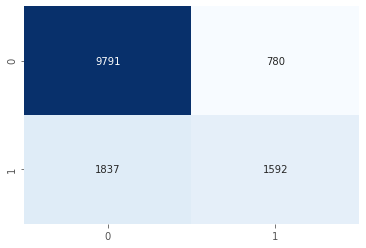

In [102]:
# Predicting the Test set results
y_pred = bag_predictions_scaled[:,0]
#table["CatBoost"] = bag_predictions[:,0]
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)
print(f"AUC for Cat {roc_auc_score(y_test, bag_predictions_scaled[:,0])}")

accuracy of the model:  0.8112857142857143
AUC for Cat 0.8419040917586561


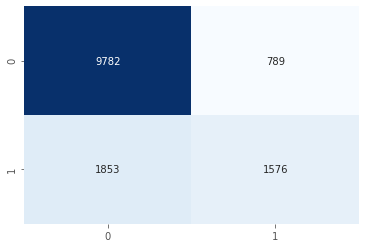

In [103]:
y_pred = bag_predictions_scaled[:,1]
#table["LightBoost_Scaled"] = bag_predictions_scaled[:,1]

import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)
print(f"AUC for Cat {roc_auc_score(y_test, bag_predictions_scaled[:,1])}")

In [104]:
itr2 = pd.concat([train, test])
#itr2 = pd.concat( [itr2, pd.get_dummies(itr2['form_field47'], prefix='_')], axis=1 )
itr2['form_field47'] = itr2['form_field47'].factorize()[0]
itr2 = itr2.fillna(-999)

In [105]:
target = train['default_status']
train_data = itr2.loc[itr2['is_train']==1].drop(['Applicant_ID', 'default_status',
                                'form_field40', 'form_field41', 'form_field31', 'is_train'], axis=1)
test_data = itr2.loc[itr2['is_train']==0].drop(['Applicant_ID', 'default_status',
                                'form_field40', 'form_field41', 'form_field31', 'is_train'], axis=1)

In [106]:
train_data.head()

form_field1  form_field2  form_field3  form_field4  form_field5  \
0       3436.0      0.28505       1.6560          0.0        0.000   
1       3456.0      0.67400       0.2342          0.0        0.000   
2       3276.0      0.53845       3.1510          0.0        6.282   
3       3372.0      0.17005       0.5050          0.0        0.000   
4       3370.0      0.77270       1.1010          0.0        0.000   

   form_field6  form_field7  form_field8  form_field9  form_field10  \
0          0.0   10689720.0     252072.0    4272776.0    11333126.0   
1          0.0     898979.0     497531.0    9073814.0     2533168.0   
2       -999.0     956940.0       -999.0     192944.0     1079864.0   
3     192166.0    3044703.0     385499.0    3986472.0     3621979.0   
4       1556.0     214728.0     214728.0    1284089.0      361770.0   

   form_field11  form_field12  form_field13  form_field14  form_field15  \
0     4397256.0     2301324.0     7875694.0      96375139   112181765.0   
1      244292.0     3982971.0     2141445.0      28141427    45169902.0   
2        -999.0        -999.0           0.0      16576457    22452691.0   
3        -999.0      771776.0     1186839.0      48187375   136297820.0   
4      396391.0      818456.0      511535.0      28141427    15292757.0   

   form_field16  form_field17  form_field18  form_field19  form_field20  \
0           1.0           1.0           1.0           3.0           3.0   
1           1.0           1.0           1.0           2.0           2.0   
2        -999.0        -999.0        -999.0           0.0           0.0   
3           0.0           0.0           0.0           1.0           1.0   
4           0.0           0.0           0.0           3.0           3.0   

   form_field21  form_field22  form_field23  form_field24  form_field25  \
0       134.655       -999.00       -999.00       134.655        4000.5   
1       109.230      11385.24      14584.29        86.685        4161.0   
2      -999.000       -999.00       -999.00      -999.000        1597.5   
3       120.120       8580.00          0.00        85.800        1701.0   
4       104.535       8360.19      10326.45       115.335        1551.0   

   form_field26  form_field27  form_field28  form_field29  form_field30  \
0       17064.0       11376.0          60.0       17064.0        5962.0   
1       13413.0        8942.0         304.0       13413.0        5780.0   
2        4746.0        3164.0          60.0       15696.0        -999.0   
3        4014.0        2676.0          60.0       11679.0        -999.0   
4        3285.0        2190.0          60.0       19437.0       12958.0   

   form_field32  form_field33  form_field34  form_field35  form_field36  \
0        1052.0        8.0000           2.0        -999.0          12.0   
1        2554.0       17.5000           0.0           0.0          16.0   
2          70.0        0.6666           0.0        -999.0          12.0   
3         522.0        7.8334           1.0           1.0           4.0   
4         272.0        1.0000           0.0           0.0          24.0   

   form_field37  form_field38  form_field39  form_field42  form_field43  \
0          12.0           4.0           0.0      0.392854          2.02   
1          24.0           8.0           0.0      0.314281          8.08   
2           0.0           6.0           0.0      0.162965         18.18   
3           8.0           4.0           1.0      0.488884          2.02   
4           2.0          24.0           0.0      0.275000         12.12   

   form_field44  form_field45  form_field46  form_field47  form_field48  \
0      0.711632           0.0           0.0             0   -999.000000   
1      0.183584        -999.0           0.0             0    349.805730   
2      0.791136           0.0           0.0             0   -999.000000   
3      0.685168        -999.0           0.0             0     89.940100   
4      0.438168           0.0           0.0             0     97.887502   

In [107]:
_X_train, _X_test, _y_train, _y_test = train_test_split(train_data, target, stratify=target, random_state=42, test_size=.25)
H = test_data
bags = 15
seed = 0
bag_predictions = np.zeros((_X_test.shape[0],2))
bag_test = np.zeros((H.shape[0], 2))

for i in range(bags):
    print(f"Iteration Number {i+1}")
    cat  = CatBoostClassifier(n_estimators=5000, eval_metric='AUC', learning_rate=0.1, use_best_model=True, random_state=seed + i*42 )
    cat.fit(_X_train,_y_train,eval_set=[(_X_train,_y_train),(_X_test, _y_test)], early_stopping_rounds=100, verbose=False)
    predictions = cat.predict_proba(_X_test)[:,1]
    bag_predictions[:,0]+= predictions
    bag_test[:,0]+= cat.predict_proba(H)[:,1]
    print(f"AUC for Cat {round(roc_auc_score(_y_test, cat.predict_proba(_X_test)[:,1]), 6)}")
    
    reg  = LGBMClassifier(learning_rate=0.1, n_estimators=5000, n_jobs=-1, random_state=seed + i*42)
    reg.fit(_X_train,_y_train, eval_metric='AUC', eval_set=[(_X_train,_y_train),(_X_test, _y_test)], early_stopping_rounds=100, verbose=False)
    
    predictions = reg.predict_proba(_X_test)[:,1]
    bag_predictions[:,1]+= predictions
    bag_test[:,1]+= reg.predict_proba(H)[:,1]
    print(f"AUC for light {round(roc_auc_score(_y_test, reg.predict_proba(_X_test)[:,1]), 6)}")
    
    print()
    print()
bag_predictions/= bags
bag_test/= bags
print(roc_auc_score(_y_test, bag_predictions[:,0]))
print(roc_auc_score(_y_test, bag_predictions[:,1]))

Iteration Number 1
AUC for Cat 0.843196
AUC for light 0.841904


Iteration Number 2
AUC for Cat 0.843436
AUC for light 0.841904


Iteration Number 3
AUC for Cat 0.84326
AUC for light 0.841904


Iteration Number 4
AUC for Cat 0.842705
AUC for light 0.841904


Iteration Number 5
AUC for Cat 0.843593
AUC for light 0.841904


Iteration Number 6
AUC for Cat 0.843424
AUC for light 0.841904


Iteration Number 7
AUC for Cat 0.843519
AUC for light 0.841904


Iteration Number 8
AUC for Cat 0.843379
AUC for light 0.841904


Iteration Number 9
AUC for Cat 0.843283
AUC for light 0.841904


Iteration Number 10
AUC for Cat 0.842947
AUC for light 0.841904


Iteration Number 11
AUC for Cat 0.843133
AUC for light 0.841904


Iteration Number 12
AUC for Cat 0.843308
AUC for light 0.841904


Iteration Number 13
AUC for Cat 0.843241
AUC for light 0.841904


Iteration Number 14
AUC for Cat 0.843526
AUC for light 0.841904


Iteration Number 15
AUC for Cat 0.843657
AUC for light 0.841904


0.8435440737504697
0

In [108]:
roc_auc_score(_y_test, bag_predictions[:,0]*.5 + bag_predictions[:,1]*.5)

0.8437020964407954

accuracy of the model:  0.8130714285714286
AUC for Cat 0.8435440737504697


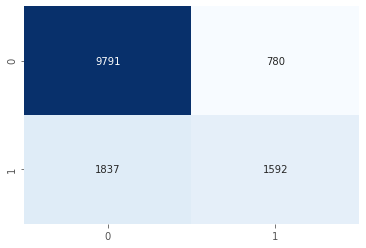

In [109]:
# Predicting the Test set results
y_pred = bag_predictions[:,0]
#table["CatBoost"] = bag_predictions[:,0]
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)
print(f"AUC for Cat {roc_auc_score(y_test, bag_predictions[:,0])}")

accuracy of the model:  0.8112857142857143
AUC for Cat 0.8419040917586561


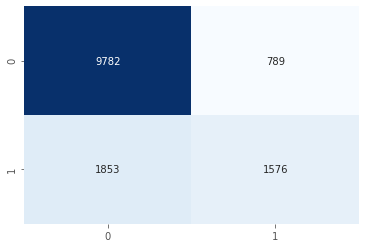

In [110]:
y_pred = bag_predictions[:,1]
#table["LightBoost"] = bag_predictions[:,1]

import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)
print(f"AUC for Cat {roc_auc_score(y_test, bag_predictions[:,1])}")

In [111]:
Submission = pd.read_csv('SampleSubmission.csv')
Submission["default_status"] = (bag_test_scaled[:,0]*.8 + bag_test_scaled[:,1]*.2)*.4 + (bag_test[:,0]*.8 + bag_test[:,1]*.2)*.6
Submission.to_csv("bags_and_scaled2.csv", index=False)